In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import train_cluster_cifar_tf as IFCA

import numpy as np
import random

from util import *

2025-06-19 21:54:06.979177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750362846.999208  902878 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750362847.005575  902878 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750362847.021024  902878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750362847.021052  902878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750362847.021054  902878 computation_placer.cc:177] computation placer alr

Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
random.seed(42)
seeds = random.sample(range(10000), 5)
p_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import train_cluster_cifar_dfca_tf as DFCA
import json
import time
import torch
import numpy as np


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1750362858.825738  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750362858.830777  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750362858.832460  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750362858.834250  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
I0000 00:00:1750362858.875922  902878 mlir_graph_optimization_pas

finding good initializer from train data


2025-06-19 21:54:19.403571: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


I0000 00:00:1750362860.463305  903589 cuda_dnn.cc:529] Loaded cuDNN version 90501


Epoch -1 tr: l 4.674 a 0.119  clct[np.int64(16), np.int64(4)] ans[np.int64(12), np.int64(8)] cl_acc 0.700 2.176sec


2025-06-19 21:54:21.783178: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 0.805sec


2025-06-19 21:54:23.053598: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] cl_acc 0.650 1.078sec


2025-06-19 21:54:24.332965: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.095  clct[np.int64(0), np.int64(20)] ans[np.int64(6), np.int64(14)] cl_acc 0.700 0.948sec


2025-06-19 21:54:26.577218: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(6), np.int64(14)] ans[np.int64(11), np.int64(9)] cl_acc 0.650 0.904sec


2025-06-19 21:54:27.683600: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.115  clct[np.int64(5), np.int64(15)] ans[np.int64(11), np.int64(9)] cl_acc 0.700 0.842sec


2025-06-19 21:54:29.891608: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(12), np.int64(8)] ans[np.int64(13), np.int64(7)] cl_acc 0.550 0.945sec
found good initializer


Epoch -1 tr: l 4.673 a 0.096  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] cl_acc 0.600 0.875sec


Epoch -1 tst: l 4.674 a 0.096  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.155sec


Epoch 0 tr: l 4.645 a 0.109  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.500 10.783sec(train) 1.331sec(infer)


Epoch 0 tst: l 4.654 a 0.102  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.011sec
result written at output/results.pickle


Epoch 1 tr: l 4.562 a 0.138  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.600 10.129sec(train) 0.954sec(infer)


Epoch 1 tst: l 4.654 a 0.102  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.703sec


Epoch 2 tr: l 4.620 a 0.109  clct[np.int64(5), np.int64(15)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.500 8.991sec(train) 0.890sec(infer)


Epoch 2 tst: l 4.633 a 0.107  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.678sec


Epoch 3 tr: l 4.609 a 0.120  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.242575 cl_acc 0.600 9.285sec(train) 0.953sec(infer)


Epoch 3 tst: l 4.597 a 0.114  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.796sec


Epoch 4 tr: l 4.523 a 0.135  clct[np.int64(12), np.int64(8)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.550 9.086sec(train) 0.887sec(infer)


Epoch 4 tst: l 4.573 a 0.121  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.556sec


Epoch 5 tr: l 4.424 a 0.177  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] lr 0.237748 cl_acc 0.550 9.268sec(train) 0.960sec(infer)


Epoch 5 tst: l 4.542 a 0.128  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.784sec


Epoch 6 tr: l 4.449 a 0.161  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.235370 cl_acc 0.500 9.291sec(train) 0.967sec(infer)


Epoch 6 tst: l 4.519 a 0.134  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.722sec


Epoch 7 tr: l 4.416 a 0.180  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.233016 cl_acc 0.550 9.365sec(train) 0.952sec(infer)


Epoch 7 tst: l 4.504 a 0.139  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.547sec


Epoch 8 tr: l 4.348 a 0.171  clct[np.int64(7), np.int64(13)] ans[np.int64(12), np.int64(8)] lr 0.230686 cl_acc 0.550 9.575sec(train) 0.890sec(infer)


Epoch 8 tst: l 4.461 a 0.142  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.733sec


Epoch 9 tr: l 4.394 a 0.175  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.228379 cl_acc 0.500 10.011sec(train) 0.974sec(infer)


Epoch 9 tst: l 4.425 a 0.152  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.856sec


Epoch 10 tr: l 4.422 a 0.159  clct[np.int64(13), np.int64(7)] ans[np.int64(12), np.int64(8)] lr 0.226096 cl_acc 0.550 10.209sec(train) 0.953sec(infer)


Epoch 10 tst: l 4.402 a 0.158  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.557sec
result written at output/results.pickle


Epoch 11 tr: l 4.228 a 0.221  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.600 9.026sec(train) 0.896sec(infer)


Epoch 11 tst: l 4.357 a 0.167  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.677sec


Epoch 12 tr: l 4.206 a 0.224  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 0.600 9.214sec(train) 1.041sec(infer)


Epoch 12 tst: l 4.333 a 0.173  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.636sec


Epoch 13 tr: l 4.194 a 0.209  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 0.600 9.021sec(train) 0.928sec(infer)


Epoch 13 tst: l 4.315 a 0.179  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.866sec


Epoch 14 tr: l 4.201 a 0.215  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.217186 cl_acc 0.600 9.495sec(train) 0.830sec(infer)


Epoch 14 tst: l 4.262 a 0.187  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.451sec


Epoch 15 tr: l 4.273 a 0.190  clct[np.int64(9), np.int64(11)] ans[np.int64(8), np.int64(12)] lr 0.215015 cl_acc 0.550 9.229sec(train) 0.949sec(infer)


Epoch 15 tst: l 4.232 a 0.193  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.802sec


Epoch 16 tr: l 4.136 a 0.234  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 0.500 9.349sec(train) 1.061sec(infer)


Epoch 16 tst: l 4.211 a 0.196  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.832sec


Epoch 17 tr: l 4.092 a 0.246  clct[np.int64(9), np.int64(11)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.550 9.253sec(train) 1.228sec(infer)


Epoch 17 tst: l 4.188 a 0.201  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.848sec


Epoch 18 tr: l 4.181 a 0.214  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600 10.310sec(train) 1.135sec(infer)


Epoch 18 tst: l 4.159 a 0.209  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.061sec


Epoch 19 tr: l 4.048 a 0.238  clct[np.int64(10), np.int64(10)] ans[np.int64(12), np.int64(8)] lr 0.206542 cl_acc 0.700 10.285sec(train) 1.044sec(infer)


Epoch 19 tst: l 4.127 a 0.213  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.950sec


Epoch 20 tr: l 4.121 a 0.222  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] lr 0.204477 cl_acc 0.650 9.338sec(train) 1.159sec(infer)


Epoch 20 tst: l 4.114 a 0.212  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.094sec
result written at output/results.pickle


Epoch 21 tr: l 4.043 a 0.233  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.202432 cl_acc 0.700 9.032sec(train) 1.167sec(infer)


Epoch 21 tst: l 4.082 a 0.223  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.010sec


Epoch 22 tr: l 3.930 a 0.250  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 0.500 9.472sec(train) 0.959sec(infer)


Epoch 22 tst: l 4.047 a 0.225  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.720sec


Epoch 23 tr: l 4.022 a 0.244  clct[np.int64(6), np.int64(14)] ans[np.int64(6), np.int64(14)] lr 0.198404 cl_acc 0.700 9.570sec(train) 0.998sec(infer)


Epoch 23 tst: l 4.022 a 0.232  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.798sec


Epoch 24 tr: l 3.970 a 0.258  clct[np.int64(5), np.int64(15)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.750 8.969sec(train) 0.867sec(infer)


Epoch 24 tst: l 4.022 a 0.232  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.807sec


Epoch 25 tr: l 4.033 a 0.239  clct[np.int64(11), np.int64(9)] ans[np.int64(13), np.int64(7)] lr 0.194455 cl_acc 0.600 9.058sec(train) 0.970sec(infer)


Epoch 25 tst: l 3.998 a 0.234  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.757sec


Epoch 26 tr: l 3.990 a 0.245  clct[np.int64(11), np.int64(9)] ans[np.int64(8), np.int64(12)] lr 0.192511 cl_acc 0.550 9.084sec(train) 1.072sec(infer)


Epoch 26 tst: l 3.959 a 0.245  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.977sec


Epoch 27 tr: l 3.824 a 0.275  clct[np.int64(10), np.int64(10)] ans[np.int64(11), np.int64(9)] lr 0.190586 cl_acc 0.650 9.958sec(train) 0.905sec(infer)


Epoch 27 tst: l 3.944 a 0.248  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.965sec


Epoch 28 tr: l 3.874 a 0.263  clct[np.int64(8), np.int64(12)] ans[np.int64(16), np.int64(4)] lr 0.188680 cl_acc 0.500 10.204sec(train) 0.795sec(infer)


Epoch 28 tst: l 3.934 a 0.247  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.503sec


Epoch 29 tr: l 3.727 a 0.317  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.186793 cl_acc 0.700 9.005sec(train) 0.751sec(infer)


Epoch 29 tst: l 3.870 a 0.262  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.780sec
result written at output/results.pickle
---train cluster Ended in 0.11 hour (392.714 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750363246.249154  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750363246.250717  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750363246.251731  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750363246.257379  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:00:46.574740: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.094  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 3.014sec


2025-06-19 22:00:49.776306: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.668 a 0.097  clct[np.int64(0), np.int64(20)] ans[np.int64(6), np.int64(14)] cl_acc 0.700 0.905sec


2025-06-19 22:00:50.898449: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(2), np.int64(18)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 0.765sec


2025-06-19 22:00:53.044743: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(3), np.int64(17)] ans[np.int64(7), np.int64(13)] cl_acc 0.700 0.931sec


2025-06-19 22:00:54.197234: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(16), np.int64(4)] ans[np.int64(13), np.int64(7)] cl_acc 0.550 1.216sec


2025-06-19 22:00:55.704488: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.112  clct[np.int64(13), np.int64(7)] ans[np.int64(6), np.int64(14)] cl_acc 0.550 1.216sec


2025-06-19 22:00:57.120262: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(18), np.int64(2)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 1.218sec


2025-06-19 22:00:58.548826: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.103  clct[np.int64(20), np.int64(0)] ans[np.int64(14), np.int64(6)] cl_acc 0.700 1.131sec


2025-06-19 22:01:00.146973: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.650 1.159sec


2025-06-19 22:01:01.506197: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.114  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 1.111sec


2025-06-19 22:01:03.463383: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(19), np.int64(1)] ans[np.int64(14), np.int64(6)] cl_acc 0.750 1.126sec


2025-06-19 22:01:04.787977: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.090  clct[np.int64(18), np.int64(2)] ans[np.int64(13), np.int64(7)] cl_acc 0.650 1.031sec


2025-06-19 22:01:06.800106: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.089  clct[np.int64(17), np.int64(3)] ans[np.int64(6), np.int64(14)] cl_acc 0.550 0.983sec


2025-06-19 22:01:07.992532: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(12), np.int64(8)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 0.932sec
found good initializer


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] cl_acc 0.600 0.947sec


Epoch -1 tst: l 4.676 a 0.100  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.909sec


Epoch 0 tr: l 4.632 a 0.119  clct[np.int64(18), np.int64(2)] ans[np.int64(8), np.int64(12)] lr 0.250000 cl_acc 0.600 8.746sec(train) 0.889sec(infer)


Epoch 0 tst: l 4.636 a 0.110  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.817sec
result written at output/results.pickle


Epoch 1 tr: l 4.568 a 0.135  clct[np.int64(17), np.int64(3)] ans[np.int64(11), np.int64(9)] lr 0.247500 cl_acc 0.700 9.739sec(train) 0.957sec(infer)


Epoch 1 tst: l 4.600 a 0.122  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.672sec


Epoch 2 tr: l 4.577 a 0.133  clct[np.int64(16), np.int64(4)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.550 9.757sec(train) 0.877sec(infer)


Epoch 2 tst: l 4.583 a 0.126  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.118sec


Epoch 3 tr: l 4.536 a 0.129  clct[np.int64(18), np.int64(2)] ans[np.int64(12), np.int64(8)] lr 0.242575 cl_acc 0.600 10.443sec(train) 1.004sec(infer)


Epoch 3 tst: l 4.561 a 0.128  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.005sec


Epoch 4 tr: l 4.524 a 0.146  clct[np.int64(17), np.int64(3)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.600 10.440sec(train) 1.003sec(infer)


Epoch 4 tst: l 4.525 a 0.139  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.888sec


Epoch 5 tr: l 4.466 a 0.153  clct[np.int64(17), np.int64(3)] ans[np.int64(7), np.int64(13)] lr 0.237748 cl_acc 0.700 9.244sec(train) 0.909sec(infer)


Epoch 5 tst: l 4.515 a 0.137  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.563sec


Epoch 6 tr: l 4.377 a 0.185  clct[np.int64(17), np.int64(3)] ans[np.int64(8), np.int64(12)] lr 0.235370 cl_acc 0.550 8.663sec(train) 0.874sec(infer)


Epoch 6 tst: l 4.507 a 0.140  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.632sec


Epoch 7 tr: l 4.478 a 0.152  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.233016 cl_acc 0.650 8.654sec(train) 0.927sec(infer)


Epoch 7 tst: l 4.485 a 0.141  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.799sec


Epoch 8 tr: l 4.464 a 0.150  clct[np.int64(17), np.int64(3)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 0.650 9.031sec(train) 0.977sec(infer)


Epoch 8 tst: l 4.457 a 0.146  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.905sec


Epoch 9 tr: l 4.377 a 0.183  clct[np.int64(17), np.int64(3)] ans[np.int64(6), np.int64(14)] lr 0.228379 cl_acc 0.550 9.441sec(train) 0.924sec(infer)


Epoch 9 tst: l 4.416 a 0.157  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.747sec


Epoch 10 tr: l 4.337 a 0.201  clct[np.int64(16), np.int64(4)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.600 9.104sec(train) 0.880sec(infer)


Epoch 10 tst: l 4.401 a 0.162  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.840sec
result written at output/results.pickle


Epoch 11 tr: l 4.217 a 0.207  clct[np.int64(18), np.int64(2)] ans[np.int64(12), np.int64(8)] lr 0.223835 cl_acc 0.600 9.233sec(train) 0.969sec(infer)


Epoch 11 tst: l 4.375 a 0.171  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.965sec


Epoch 12 tr: l 4.345 a 0.187  clct[np.int64(14), np.int64(6)] ans[np.int64(11), np.int64(9)] lr 0.221596 cl_acc 0.650 10.207sec(train) 1.019sec(infer)


Epoch 12 tst: l 4.317 a 0.184  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.119sec


Epoch 13 tr: l 4.207 a 0.216  clct[np.int64(18), np.int64(2)] ans[np.int64(7), np.int64(13)] lr 0.219380 cl_acc 0.550 9.931sec(train) 1.102sec(infer)


Epoch 13 tst: l 4.281 a 0.187  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.797sec


Epoch 14 tr: l 4.321 a 0.185  clct[np.int64(18), np.int64(2)] ans[np.int64(14), np.int64(6)] lr 0.217186 cl_acc 0.600 9.087sec(train) 0.941sec(infer)


Epoch 14 tst: l 4.246 a 0.197  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.893sec


Epoch 15 tr: l 4.186 a 0.225  clct[np.int64(16), np.int64(4)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 0.600 8.639sec(train) 0.821sec(infer)


Epoch 15 tst: l 4.199 a 0.210  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.746sec


Epoch 16 tr: l 4.201 a 0.214  clct[np.int64(20), np.int64(0)] ans[np.int64(13), np.int64(7)] lr 0.212864 cl_acc 0.650 8.652sec(train) 0.944sec(infer)


Epoch 16 tst: l 4.173 a 0.209  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.765sec


Epoch 17 tr: l 4.019 a 0.241  clct[np.int64(18), np.int64(2)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.650 8.811sec(train) 0.944sec(infer)


Epoch 17 tst: l 4.137 a 0.216  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.836sec


Epoch 18 tr: l 4.074 a 0.246  clct[np.int64(18), np.int64(2)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.500 8.745sec(train) 0.980sec(infer)


Epoch 18 tst: l 4.098 a 0.226  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.743sec


Epoch 19 tr: l 4.128 a 0.213  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.206542 cl_acc 0.550 8.997sec(train) 0.956sec(infer)


Epoch 19 tst: l 4.077 a 0.226  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.732sec


Epoch 20 tr: l 4.019 a 0.258  clct[np.int64(18), np.int64(2)] ans[np.int64(14), np.int64(6)] lr 0.204477 cl_acc 0.800 8.856sec(train) 0.900sec(infer)


Epoch 20 tst: l 4.062 a 0.229  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.798sec
result written at output/results.pickle


Epoch 21 tr: l 3.986 a 0.238  clct[np.int64(16), np.int64(4)] ans[np.int64(7), np.int64(13)] lr 0.202432 cl_acc 0.550 9.679sec(train) 1.080sec(infer)


Epoch 21 tst: l 4.039 a 0.230  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.028sec


Epoch 22 tr: l 4.120 a 0.222  clct[np.int64(19), np.int64(1)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 0.500 10.313sec(train) 1.276sec(infer)


Epoch 22 tst: l 4.025 a 0.233  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.245sec


Epoch 23 tr: l 3.969 a 0.256  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] lr 0.198404 cl_acc 0.500 9.666sec(train) 1.118sec(infer)


Epoch 23 tst: l 4.006 a 0.243  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.102sec


Epoch 24 tr: l 3.971 a 0.254  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.500 8.828sec(train) 1.010sec(infer)


Epoch 24 tst: l 3.998 a 0.242  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.766sec


Epoch 25 tr: l 3.909 a 0.277  clct[np.int64(16), np.int64(4)] ans[np.int64(9), np.int64(11)] lr 0.194455 cl_acc 0.650 9.441sec(train) 1.022sec(infer)


Epoch 25 tst: l 3.962 a 0.250  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.864sec


Epoch 26 tr: l 3.993 a 0.269  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.192511 cl_acc 0.550 9.584sec(train) 0.967sec(infer)


Epoch 26 tst: l 3.943 a 0.252  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.498sec


Epoch 27 tr: l 3.849 a 0.263  clct[np.int64(16), np.int64(4)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 0.600 9.386sec(train) 0.793sec(infer)


Epoch 27 tst: l 3.909 a 0.257  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.573sec


Epoch 28 tr: l 3.731 a 0.300  clct[np.int64(19), np.int64(1)] ans[np.int64(12), np.int64(8)] lr 0.188680 cl_acc 0.550 8.974sec(train) 0.757sec(infer)


Epoch 28 tst: l 3.899 a 0.260  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.569sec


Epoch 29 tr: l 3.822 a 0.284  clct[np.int64(17), np.int64(3)] ans[np.int64(10), np.int64(10)] lr 0.186793 cl_acc 0.550 9.163sec(train) 0.768sec(infer)


Epoch 29 tst: l 3.888 a 0.260  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.763sec
result written at output/results.pickle
---train cluster Ended in 0.11 hour (393.982 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750363640.350361  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750363640.351372  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750363640.352581  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750363640.354073  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:07:20.803341: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 2.896sec


2025-06-19 22:07:23.927841: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.094  clct[np.int64(15), np.int64(5)] ans[np.int64(7), np.int64(13)] cl_acc 0.700 1.024sec


2025-06-19 22:07:25.173235: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] cl_acc 0.700 0.842sec


2025-06-19 22:07:26.560071: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] cl_acc 0.700 1.144sec


2025-06-19 22:07:27.958137: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(15), np.int64(5)] ans[np.int64(9), np.int64(11)] cl_acc 0.800 1.022sec


2025-06-19 22:07:30.128455: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.679 a 0.108  clct[np.int64(2), np.int64(18)] ans[np.int64(13), np.int64(7)] cl_acc 0.650 1.168sec


2025-06-19 22:07:31.529435: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(2), np.int64(18)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.084sec


2025-06-19 22:07:33.509423: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.097  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550 1.103sec


2025-06-19 22:07:34.832038: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.099  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 1.033sec


2025-06-19 22:07:36.888852: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.108  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] cl_acc 0.700 1.121sec


2025-06-19 22:07:38.233135: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(19), np.int64(1)] ans[np.int64(8), np.int64(12)] cl_acc 0.550 1.138sec


2025-06-19 22:07:40.390010: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] cl_acc 0.800 1.196sec
found good initializer


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(9), np.int64(11)] ans[np.int64(8), np.int64(12)] cl_acc 0.750 1.176sec


Epoch -1 tst: l 4.673 a 0.103  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.155sec


Epoch 0 tr: l 4.624 a 0.119  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.250000 cl_acc 0.700 9.789sec(train) 1.149sec(infer)


Epoch 0 tst: l 4.642 a 0.110  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.718sec
result written at output/results.pickle


Epoch 1 tr: l 4.552 a 0.138  clct[np.int64(8), np.int64(12)] ans[np.int64(8), np.int64(12)] lr 0.247500 cl_acc 0.800 9.039sec(train) 1.103sec(infer)


Epoch 1 tst: l 4.582 a 0.125  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.147sec


Epoch 2 tr: l 4.599 a 0.116  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 0.800 9.530sec(train) 1.220sec(infer)


Epoch 2 tst: l 4.565 a 0.129  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.189sec


Epoch 3 tr: l 4.578 a 0.130  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] lr 0.242575 cl_acc 0.600 9.317sec(train) 1.128sec(infer)


Epoch 3 tst: l 4.551 a 0.133  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.224sec


Epoch 4 tr: l 4.459 a 0.157  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] lr 0.240149 cl_acc 0.650 9.397sec(train) 1.159sec(infer)


Epoch 4 tst: l 4.506 a 0.140  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.082sec


Epoch 5 tr: l 4.434 a 0.155  clct[np.int64(9), np.int64(11)] ans[np.int64(12), np.int64(8)] lr 0.237748 cl_acc 0.550 9.263sec(train) 1.089sec(infer)


Epoch 5 tst: l 4.468 a 0.149  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.982sec


Epoch 6 tr: l 4.359 a 0.180  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] lr 0.235370 cl_acc 0.700 10.389sec(train) 1.227sec(infer)


Epoch 6 tst: l 4.421 a 0.160  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.802sec


Epoch 7 tr: l 4.429 a 0.168  clct[np.int64(11), np.int64(9)] ans[np.int64(10), np.int64(10)] lr 0.233016 cl_acc 0.650 10.720sec(train) 1.188sec(infer)


Epoch 7 tst: l 4.404 a 0.161  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.988sec


Epoch 8 tr: l 4.387 a 0.161  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.230686 cl_acc 0.600 9.197sec(train) 0.859sec(infer)


Epoch 8 tst: l 4.377 a 0.167  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.818sec


Epoch 9 tr: l 4.418 a 0.151  clct[np.int64(11), np.int64(9)] ans[np.int64(10), np.int64(10)] lr 0.228379 cl_acc 0.750 9.157sec(train) 1.111sec(infer)


Epoch 9 tst: l 4.360 a 0.171  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.939sec


Epoch 10 tr: l 4.398 a 0.165  clct[np.int64(8), np.int64(12)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.600 9.096sec(train) 0.987sec(infer)


Epoch 10 tst: l 4.301 a 0.180  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.779sec
result written at output/results.pickle


Epoch 11 tr: l 4.300 a 0.198  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.550 9.426sec(train) 0.950sec(infer)


Epoch 11 tst: l 4.288 a 0.183  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.060sec


Epoch 12 tr: l 4.283 a 0.197  clct[np.int64(6), np.int64(14)] ans[np.int64(8), np.int64(12)] lr 0.221596 cl_acc 0.600 9.301sec(train) 0.980sec(infer)


Epoch 12 tst: l 4.250 a 0.192  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.884sec


Epoch 13 tr: l 4.283 a 0.198  clct[np.int64(8), np.int64(12)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 0.650 9.227sec(train) 0.961sec(infer)


Epoch 13 tst: l 4.225 a 0.195  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.873sec


Epoch 14 tr: l 4.232 a 0.202  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.217186 cl_acc 0.600 9.999sec(train) 1.050sec(infer)


Epoch 14 tst: l 4.207 a 0.202  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.136sec


Epoch 15 tr: l 4.173 a 0.202  clct[np.int64(11), np.int64(9)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 0.650 10.657sec(train) 1.144sec(infer)


Epoch 15 tst: l 4.190 a 0.200  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.126sec


Epoch 16 tr: l 4.182 a 0.211  clct[np.int64(9), np.int64(11)] ans[np.int64(6), np.int64(14)] lr 0.212864 cl_acc 0.650 10.085sec(train) 1.041sec(infer)


Epoch 16 tst: l 4.145 a 0.213  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.951sec


Epoch 17 tr: l 4.016 a 0.248  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.800 9.280sec(train) 1.004sec(infer)


Epoch 17 tst: l 4.131 a 0.214  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.715sec


Epoch 18 tr: l 4.066 a 0.238  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] lr 0.208628 cl_acc 0.700 9.636sec(train) 0.985sec(infer)


Epoch 18 tst: l 4.104 a 0.221  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.948sec


Epoch 19 tr: l 4.014 a 0.261  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.206542 cl_acc 0.750 9.236sec(train) 1.020sec(infer)


Epoch 19 tst: l 4.081 a 0.226  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.938sec


Epoch 20 tr: l 3.942 a 0.263  clct[np.int64(7), np.int64(13)] ans[np.int64(9), np.int64(11)] lr 0.204477 cl_acc 0.500 9.181sec(train) 1.115sec(infer)


Epoch 20 tst: l 4.053 a 0.233  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.995sec
result written at output/results.pickle


Epoch 21 tr: l 4.047 a 0.233  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.650 9.517sec(train) 0.966sec(infer)


Epoch 21 tst: l 4.009 a 0.242  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.838sec


Epoch 22 tr: l 4.052 a 0.243  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] lr 0.200408 cl_acc 0.550 9.441sec(train) 0.986sec(infer)


Epoch 22 tst: l 3.997 a 0.245  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.854sec


Epoch 23 tr: l 3.965 a 0.257  clct[np.int64(4), np.int64(16)] ans[np.int64(7), np.int64(13)] lr 0.198404 cl_acc 0.650 9.836sec(train) 1.184sec(infer)


Epoch 23 tst: l 3.988 a 0.243  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.998sec


Epoch 24 tr: l 4.014 a 0.243  clct[np.int64(7), np.int64(13)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.650 10.948sec(train) 1.264sec(infer)


Epoch 24 tst: l 3.956 a 0.253  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.999sec


Epoch 25 tr: l 3.838 a 0.292  clct[np.int64(10), np.int64(10)] ans[np.int64(8), np.int64(12)] lr 0.194455 cl_acc 0.700 9.416sec(train) 1.165sec(infer)


Epoch 25 tst: l 3.938 a 0.259  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.856sec


Epoch 26 tr: l 3.885 a 0.273  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 0.550 8.822sec(train) 0.922sec(infer)


Epoch 26 tst: l 3.900 a 0.266  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.654sec


Epoch 27 tr: l 3.890 a 0.280  clct[np.int64(11), np.int64(9)] ans[np.int64(13), np.int64(7)] lr 0.190586 cl_acc 0.800 8.831sec(train) 0.886sec(infer)


Epoch 27 tst: l 3.887 a 0.265  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.812sec


Epoch 28 tr: l 3.905 a 0.256  clct[np.int64(7), np.int64(13)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 0.600 9.549sec(train) 0.944sec(infer)


Epoch 28 tst: l 3.848 a 0.272  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.841sec


Epoch 29 tr: l 3.755 a 0.306  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] lr 0.186793 cl_acc 0.500 9.273sec(train) 0.984sec(infer)


Epoch 29 tst: l 3.841 a 0.271  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.869sec
result written at output/results.pickle
---train cluster Ended in 0.11 hour (405.614 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750364045.898446  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750364045.900143  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750364045.901090  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750364045.902551  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:14:06.217883: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.109  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] cl_acc 0.550 1.925sec
found good initializer


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(6), np.int64(14)] ans[np.int64(9), np.int64(11)] cl_acc 0.750 0.979sec


Epoch -1 tst: l 4.676 a 0.109  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.612sec


Epoch 0 tr: l 4.630 a 0.119  clct[np.int64(7), np.int64(13)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.600 9.562sec(train) 0.774sec(infer)


Epoch 0 tst: l 4.653 a 0.115  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.755sec
result written at output/results.pickle


Epoch 1 tr: l 4.621 a 0.131  clct[np.int64(8), np.int64(12)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.500 9.426sec(train) 1.291sec(infer)


Epoch 1 tst: l 4.635 a 0.119  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.404sec


Epoch 2 tr: l 4.518 a 0.143  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.600 10.232sec(train) 1.184sec(infer)


Epoch 2 tst: l 4.629 a 0.119  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.260sec


Epoch 3 tr: l 4.570 a 0.135  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] lr 0.242575 cl_acc 0.550 9.616sec(train) 1.045sec(infer)


Epoch 3 tst: l 4.592 a 0.126  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.879sec


Epoch 4 tr: l 4.436 a 0.166  clct[np.int64(6), np.int64(14)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.550 9.155sec(train) 1.084sec(infer)


Epoch 4 tst: l 4.566 a 0.132  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.121sec


Epoch 5 tr: l 4.499 a 0.151  clct[np.int64(8), np.int64(12)] ans[np.int64(11), np.int64(9)] lr 0.237748 cl_acc 0.550 8.846sec(train) 1.126sec(infer)


Epoch 5 tst: l 4.535 a 0.138  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.131sec


Epoch 6 tr: l 4.434 a 0.170  clct[np.int64(11), np.int64(9)] ans[np.int64(14), np.int64(6)] lr 0.235370 cl_acc 0.650 9.389sec(train) 1.169sec(infer)


Epoch 6 tst: l 4.488 a 0.154  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.161sec


Epoch 7 tr: l 4.399 a 0.175  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] lr 0.233016 cl_acc 0.550 9.612sec(train) 1.014sec(infer)


Epoch 7 tst: l 4.432 a 0.167  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.211sec


Epoch 8 tr: l 4.247 a 0.209  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 0.550 9.365sec(train) 0.961sec(infer)


Epoch 8 tst: l 4.390 a 0.174  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.840sec


Epoch 9 tr: l 4.448 a 0.163  clct[np.int64(8), np.int64(12)] ans[np.int64(11), np.int64(9)] lr 0.228379 cl_acc 0.650 9.692sec(train) 0.937sec(infer)


Epoch 9 tst: l 4.361 a 0.173  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.801sec


Epoch 10 tr: l 4.266 a 0.195  clct[np.int64(11), np.int64(9)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.550 9.870sec(train) 1.135sec(infer)


Epoch 10 tst: l 4.334 a 0.180  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.061sec
result written at output/results.pickle


Epoch 11 tr: l 4.296 a 0.181  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.600 10.249sec(train) 1.190sec(infer)


Epoch 11 tst: l 4.332 a 0.178  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.029sec


Epoch 12 tr: l 4.276 a 0.192  clct[np.int64(10), np.int64(10)] ans[np.int64(11), np.int64(9)] lr 0.221596 cl_acc 0.550 9.294sec(train) 0.897sec(infer)


Epoch 12 tst: l 4.299 a 0.187  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.510sec


Epoch 13 tr: l 4.280 a 0.210  clct[np.int64(6), np.int64(14)] ans[np.int64(10), np.int64(10)] lr 0.219380 cl_acc 0.500 9.342sec(train) 0.907sec(infer)


Epoch 13 tst: l 4.259 a 0.194  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.723sec


Epoch 14 tr: l 4.236 a 0.198  clct[np.int64(5), np.int64(15)] ans[np.int64(8), np.int64(12)] lr 0.217186 cl_acc 0.650 9.183sec(train) 0.928sec(infer)


Epoch 14 tst: l 4.228 a 0.197  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.774sec


Epoch 15 tr: l 4.220 a 0.213  clct[np.int64(9), np.int64(11)] ans[np.int64(7), np.int64(13)] lr 0.215015 cl_acc 0.700 9.234sec(train) 0.939sec(infer)


Epoch 15 tst: l 4.207 a 0.205  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.817sec


Epoch 16 tr: l 4.147 a 0.223  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.212864 cl_acc 0.500 9.198sec(train) 0.933sec(infer)


Epoch 16 tst: l 4.194 a 0.207  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.824sec


Epoch 17 tr: l 4.163 a 0.217  clct[np.int64(7), np.int64(13)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.650 9.726sec(train) 1.050sec(infer)


Epoch 17 tst: l 4.162 a 0.215  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.894sec


Epoch 18 tr: l 4.241 a 0.205  clct[np.int64(6), np.int64(14)] ans[np.int64(13), np.int64(7)] lr 0.208628 cl_acc 0.550 9.117sec(train) 0.865sec(infer)


Epoch 18 tst: l 4.133 a 0.220  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.817sec


Epoch 19 tr: l 4.074 a 0.234  clct[np.int64(9), np.int64(11)] ans[np.int64(13), np.int64(7)] lr 0.206542 cl_acc 0.600 8.848sec(train) 0.843sec(infer)


Epoch 19 tst: l 4.099 a 0.231  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.006sec


Epoch 20 tr: l 4.069 a 0.236  clct[np.int64(6), np.int64(14)] ans[np.int64(10), np.int64(10)] lr 0.204477 cl_acc 0.700 10.060sec(train) 1.039sec(infer)


Epoch 20 tst: l 4.044 a 0.241  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.149sec
result written at output/results.pickle


Epoch 21 tr: l 4.060 a 0.245  clct[np.int64(5), np.int64(15)] ans[np.int64(16), np.int64(4)] lr 0.202432 cl_acc 0.550 10.149sec(train) 1.162sec(infer)


Epoch 21 tst: l 3.987 a 0.248  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.975sec


Epoch 22 tr: l 4.009 a 0.242  clct[np.int64(6), np.int64(14)] ans[np.int64(7), np.int64(13)] lr 0.200408 cl_acc 0.650 8.850sec(train) 0.921sec(infer)


Epoch 22 tst: l 3.980 a 0.244  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.723sec


Epoch 23 tr: l 4.098 a 0.230  clct[np.int64(7), np.int64(13)] ans[np.int64(11), np.int64(9)] lr 0.198404 cl_acc 0.700 9.176sec(train) 0.888sec(infer)


Epoch 23 tst: l 3.963 a 0.247  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.725sec


Epoch 24 tr: l 3.913 a 0.259  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.600 9.458sec(train) 0.838sec(infer)


Epoch 24 tst: l 3.937 a 0.256  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.762sec


Epoch 25 tr: l 3.971 a 0.253  clct[np.int64(6), np.int64(14)] ans[np.int64(10), np.int64(10)] lr 0.194455 cl_acc 0.600 9.111sec(train) 0.795sec(infer)


Epoch 25 tst: l 3.887 a 0.262  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.448sec


Epoch 26 tr: l 3.930 a 0.254  clct[np.int64(5), np.int64(15)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 0.550 9.497sec(train) 0.845sec(infer)


Epoch 26 tst: l 3.882 a 0.260  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.470sec


Epoch 27 tr: l 3.861 a 0.273  clct[np.int64(6), np.int64(14)] ans[np.int64(11), np.int64(9)] lr 0.190586 cl_acc 0.550 9.392sec(train) 0.947sec(infer)


Epoch 27 tst: l 3.864 a 0.261  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.861sec


Epoch 28 tr: l 3.779 a 0.287  clct[np.int64(7), np.int64(13)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 0.600 9.441sec(train) 1.062sec(infer)


Epoch 28 tst: l 3.848 a 0.260  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.347sec


Epoch 29 tr: l 3.709 a 0.300  clct[np.int64(6), np.int64(14)] ans[np.int64(7), np.int64(13)] lr 0.186793 cl_acc 0.650 9.817sec(train) 1.283sec(infer)


Epoch 29 tst: l 3.839 a 0.263  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.212sec
result written at output/results.pickle
---train cluster Ended in 0.11 hour (381.130 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750364427.319560  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750364427.321087  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750364427.322120  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750364427.323469  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:20:27.790062: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.094  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] cl_acc 0.700 2.582sec


2025-06-19 22:20:30.572962: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(1), np.int64(19)] ans[np.int64(9), np.int64(11)] cl_acc 0.500 0.983sec


2025-06-19 22:20:31.851362: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] cl_acc 0.650 0.913sec


2025-06-19 22:20:34.094554: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] cl_acc 0.600 0.932sec
found good initializer


Epoch -1 tr: l 4.675 a 0.095  clct[np.int64(15), np.int64(5)] ans[np.int64(10), np.int64(10)] cl_acc 0.550 0.763sec


Epoch -1 tst: l 4.674 a 0.095  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.039sec


Epoch 0 tr: l 4.634 a 0.117  clct[np.int64(13), np.int64(7)] ans[np.int64(12), np.int64(8)] lr 0.250000 cl_acc 0.550 8.662sec(train) 1.115sec(infer)


Epoch 0 tst: l 4.639 a 0.102  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.074sec
result written at output/results.pickle


Epoch 1 tr: l 4.565 a 0.131  clct[np.int64(14), np.int64(6)] ans[np.int64(7), np.int64(13)] lr 0.247500 cl_acc 0.550 9.166sec(train) 1.225sec(infer)


Epoch 1 tst: l 4.606 a 0.111  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.025sec


Epoch 2 tr: l 4.563 a 0.126  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 0.550 9.206sec(train) 0.943sec(infer)


Epoch 2 tst: l 4.582 a 0.114  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.692sec


Epoch 3 tr: l 4.516 a 0.136  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] lr 0.242575 cl_acc 0.550 9.058sec(train) 1.031sec(infer)


Epoch 3 tst: l 4.561 a 0.117  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.909sec


Epoch 4 tr: l 4.499 a 0.148  clct[np.int64(14), np.int64(6)] ans[np.int64(12), np.int64(8)] lr 0.240149 cl_acc 0.600 9.264sec(train) 1.050sec(infer)


Epoch 4 tst: l 4.561 a 0.117  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.751sec


Epoch 5 tr: l 4.447 a 0.157  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] lr 0.237748 cl_acc 0.700 9.108sec(train) 0.908sec(infer)


Epoch 5 tst: l 4.542 a 0.120  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.817sec


Epoch 6 tr: l 4.476 a 0.150  clct[np.int64(13), np.int64(7)] ans[np.int64(10), np.int64(10)] lr 0.235370 cl_acc 0.650 9.143sec(train) 1.143sec(infer)


Epoch 6 tst: l 4.502 a 0.127  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.040sec


Epoch 7 tr: l 4.470 a 0.156  clct[np.int64(14), np.int64(6)] ans[np.int64(12), np.int64(8)] lr 0.233016 cl_acc 0.500 10.192sec(train) 0.834sec(infer)


Epoch 7 tst: l 4.458 a 0.137  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.881sec


Epoch 8 tr: l 4.406 a 0.165  clct[np.int64(13), np.int64(7)] ans[np.int64(14), np.int64(6)] lr 0.230686 cl_acc 0.650 10.268sec(train) 0.878sec(infer)


Epoch 8 tst: l 4.436 a 0.146  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.454sec


Epoch 9 tr: l 4.324 a 0.194  clct[np.int64(17), np.int64(3)] ans[np.int64(11), np.int64(9)] lr 0.228379 cl_acc 0.500 9.794sec(train) 1.020sec(infer)


Epoch 9 tst: l 4.421 a 0.151  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.876sec


Epoch 10 tr: l 4.250 a 0.198  clct[np.int64(13), np.int64(7)] ans[np.int64(5), np.int64(15)] lr 0.226096 cl_acc 0.700 9.077sec(train) 0.942sec(infer)


Epoch 10 tst: l 4.378 a 0.162  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.665sec
result written at output/results.pickle


Epoch 11 tr: l 4.347 a 0.203  clct[np.int64(15), np.int64(5)] ans[np.int64(6), np.int64(14)] lr 0.223835 cl_acc 0.550 9.390sec(train) 0.950sec(infer)


Epoch 11 tst: l 4.378 a 0.162  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.775sec


Epoch 12 tr: l 4.273 a 0.197  clct[np.int64(15), np.int64(5)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 0.550 9.412sec(train) 0.956sec(infer)


Epoch 12 tst: l 4.367 a 0.163  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.863sec


Epoch 13 tr: l 4.236 a 0.191  clct[np.int64(12), np.int64(8)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 0.650 9.555sec(train) 1.041sec(infer)


Epoch 13 tst: l 4.318 a 0.177  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.137sec


Epoch 14 tr: l 4.302 a 0.184  clct[np.int64(15), np.int64(5)] ans[np.int64(12), np.int64(8)] lr 0.217186 cl_acc 0.550 9.420sec(train) 1.096sec(infer)


Epoch 14 tst: l 4.292 a 0.181  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.795sec


Epoch 15 tr: l 4.180 a 0.213  clct[np.int64(13), np.int64(7)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 0.650 9.684sec(train) 0.825sec(infer)


Epoch 15 tst: l 4.251 a 0.194  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.941sec


Epoch 16 tr: l 4.157 a 0.222  clct[np.int64(17), np.int64(3)] ans[np.int64(8), np.int64(12)] lr 0.212864 cl_acc 0.550 10.140sec(train) 1.050sec(infer)


Epoch 16 tst: l 4.218 a 0.198  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.014sec


Epoch 17 tr: l 4.074 a 0.247  clct[np.int64(13), np.int64(7)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.700 10.122sec(train) 0.994sec(infer)


Epoch 17 tst: l 4.214 a 0.200  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.857sec


Epoch 18 tr: l 4.044 a 0.250  clct[np.int64(18), np.int64(2)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600 9.722sec(train) 1.002sec(infer)


Epoch 18 tst: l 4.193 a 0.208  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.777sec


Epoch 19 tr: l 4.155 a 0.217  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] lr 0.206542 cl_acc 0.500 9.144sec(train) 0.929sec(infer)


Epoch 19 tst: l 4.165 a 0.218  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.857sec


Epoch 20 tr: l 4.142 a 0.222  clct[np.int64(16), np.int64(4)] ans[np.int64(7), np.int64(13)] lr 0.204477 cl_acc 0.550 9.169sec(train) 1.037sec(infer)


Epoch 20 tst: l 4.149 a 0.219  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.897sec
result written at output/results.pickle


Epoch 21 tr: l 4.016 a 0.243  clct[np.int64(15), np.int64(5)] ans[np.int64(12), np.int64(8)] lr 0.202432 cl_acc 0.550 9.149sec(train) 1.165sec(infer)


Epoch 21 tst: l 4.146 a 0.225  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.944sec


Epoch 22 tr: l 3.807 a 0.265  clct[np.int64(15), np.int64(5)] ans[np.int64(13), np.int64(7)] lr 0.200408 cl_acc 0.600 8.841sec(train) 1.123sec(infer)


Epoch 22 tst: l 4.108 a 0.227  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.002sec


Epoch 23 tr: l 3.987 a 0.251  clct[np.int64(15), np.int64(5)] ans[np.int64(10), np.int64(10)] lr 0.198404 cl_acc 0.550 9.374sec(train) 1.036sec(infer)


Epoch 23 tst: l 4.092 a 0.230  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.127sec


Epoch 24 tr: l 3.827 a 0.280  clct[np.int64(18), np.int64(2)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.500 9.224sec(train) 1.086sec(infer)


Epoch 24 tst: l 4.068 a 0.234  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.205sec


Epoch 25 tr: l 3.877 a 0.277  clct[np.int64(14), np.int64(6)] ans[np.int64(5), np.int64(15)] lr 0.194455 cl_acc 0.550 10.678sec(train) 1.242sec(infer)


Epoch 25 tst: l 4.049 a 0.234  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.205sec


Epoch 26 tr: l 3.890 a 0.262  clct[np.int64(18), np.int64(2)] ans[np.int64(8), np.int64(12)] lr 0.192511 cl_acc 0.700 9.959sec(train) 1.241sec(infer)


Epoch 26 tst: l 4.049 a 0.234  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.324sec


Epoch 27 tr: l 3.896 a 0.261  clct[np.int64(17), np.int64(3)] ans[np.int64(7), np.int64(13)] lr 0.190586 cl_acc 0.600 9.443sec(train) 1.115sec(infer)


Epoch 27 tst: l 4.019 a 0.241  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.085sec


Epoch 28 tr: l 3.918 a 0.262  clct[np.int64(19), np.int64(1)] ans[np.int64(9), np.int64(11)] lr 0.188680 cl_acc 0.500 8.822sec(train) 1.213sec(infer)


Epoch 28 tst: l 3.999 a 0.244  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.139sec


Epoch 29 tr: l 3.833 a 0.273  clct[np.int64(16), np.int64(4)] ans[np.int64(12), np.int64(8)] lr 0.186793 cl_acc 0.600 8.986sec(train) 1.060sec(infer)


Epoch 29 tst: l 3.966 a 0.250  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.941sec
result written at output/results.pickle
---train cluster Ended in 0.11 hour (387.948 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750364816.120968  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750364816.122350  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750364816.123641  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750364816.125016  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:26:56.453912: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.107  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 3.094sec


2025-06-19 22:26:59.747935: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.101  clct[np.int64(24), np.int64(16)] ans[np.int64(22), np.int64(18)] cl_acc 0.550 1.951sec
found good initializer


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(28), np.int64(12)] ans[np.int64(23), np.int64(17)] cl_acc 0.525 1.847sec


Epoch -1 tst: l 4.678 a 0.099  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.772sec


Epoch 0 tr: l 4.634 a 0.112  clct[np.int64(25), np.int64(15)] ans[np.int64(19), np.int64(21)] lr 0.250000 cl_acc 0.500 19.871sec(train) 2.016sec(infer)


Epoch 0 tst: l 4.603 a 0.115  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.765sec
result written at output/results.pickle


Epoch 1 tr: l 4.583 a 0.128  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.247500 cl_acc 0.600 20.183sec(train) 1.857sec(infer)


Epoch 1 tst: l 4.554 a 0.126  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.474sec


Epoch 2 tr: l 4.454 a 0.152  clct[np.int64(20), np.int64(20)] ans[np.int64(19), np.int64(21)] lr 0.245025 cl_acc 0.675 21.503sec(train) 1.912sec(infer)


Epoch 2 tst: l 4.464 a 0.140  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.710sec


Epoch 3 tr: l 4.430 a 0.163  clct[np.int64(28), np.int64(12)] ans[np.int64(18), np.int64(22)] lr 0.242575 cl_acc 0.600 19.308sec(train) 1.932sec(infer)


Epoch 3 tst: l 4.414 a 0.153  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.604sec


Epoch 4 tr: l 4.347 a 0.189  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] lr 0.240149 cl_acc 0.500 19.755sec(train) 2.207sec(infer)


Epoch 4 tst: l 4.345 a 0.161  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.936sec


Epoch 5 tr: l 4.302 a 0.191  clct[np.int64(25), np.int64(15)] ans[np.int64(21), np.int64(19)] lr 0.237748 cl_acc 0.550 19.566sec(train) 2.141sec(infer)


Epoch 5 tst: l 4.274 a 0.178  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.781sec


Epoch 6 tr: l 4.255 a 0.192  clct[np.int64(28), np.int64(12)] ans[np.int64(24), np.int64(16)] lr 0.235370 cl_acc 0.550 21.771sec(train) 2.001sec(infer)


Epoch 6 tst: l 4.227 a 0.186  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.053sec


Epoch 7 tr: l 4.224 a 0.203  clct[np.int64(28), np.int64(12)] ans[np.int64(17), np.int64(23)] lr 0.233016 cl_acc 0.575 19.415sec(train) 1.854sec(infer)


Epoch 7 tst: l 4.128 a 0.213  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.667sec


Epoch 8 tr: l 4.112 a 0.231  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.230686 cl_acc 0.650 19.411sec(train) 1.926sec(infer)


Epoch 8 tst: l 4.066 a 0.232  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.717sec


Epoch 9 tr: l 4.037 a 0.239  clct[np.int64(21), np.int64(19)] ans[np.int64(22), np.int64(18)] lr 0.228379 cl_acc 0.575 19.660sec(train) 2.158sec(infer)


Epoch 9 tst: l 4.016 a 0.239  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.885sec


Epoch 10 tr: l 4.046 a 0.238  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.226096 cl_acc 0.550 19.300sec(train) 2.019sec(infer)


Epoch 10 tst: l 3.958 a 0.247  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.710sec
result written at output/results.pickle


Epoch 11 tr: l 3.978 a 0.244  clct[np.int64(22), np.int64(18)] ans[np.int64(17), np.int64(23)] lr 0.223835 cl_acc 0.575 20.149sec(train) 1.447sec(infer)


Epoch 11 tst: l 3.916 a 0.250  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.543sec


Epoch 12 tr: l 3.899 a 0.256  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.221596 cl_acc 0.600 18.638sec(train) 1.993sec(infer)


Epoch 12 tst: l 3.861 a 0.263  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.955sec


Epoch 13 tr: l 3.817 a 0.279  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.219380 cl_acc 0.600 19.066sec(train) 2.270sec(infer)


Epoch 13 tst: l 3.796 a 0.270  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.916sec


Epoch 14 tr: l 3.858 a 0.261  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] lr 0.217186 cl_acc 0.525 19.391sec(train) 1.875sec(infer)


Epoch 14 tst: l 3.722 a 0.278  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.643sec


Epoch 15 tr: l 3.794 a 0.280  clct[np.int64(23), np.int64(17)] ans[np.int64(21), np.int64(19)] lr 0.215015 cl_acc 0.650 20.134sec(train) 2.214sec(infer)


Epoch 15 tst: l 3.664 a 0.288  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.020sec


Epoch 16 tr: l 3.605 a 0.315  clct[np.int64(17), np.int64(23)] ans[np.int64(21), np.int64(19)] lr 0.212864 cl_acc 0.550 19.895sec(train) 2.021sec(infer)


Epoch 16 tst: l 3.614 a 0.293  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.767sec


Epoch 17 tr: l 3.582 a 0.301  clct[np.int64(10), np.int64(30)] ans[np.int64(23), np.int64(17)] lr 0.210736 cl_acc 0.575 19.670sec(train) 2.479sec(infer)


Epoch 17 tst: l 3.568 a 0.295  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.085sec


Epoch 18 tr: l 3.589 a 0.294  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 0.550 20.045sec(train) 2.322sec(infer)


Epoch 18 tst: l 3.511 a 0.308  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.078sec


Epoch 19 tr: l 3.561 a 0.299  clct[np.int64(9), np.int64(31)] ans[np.int64(21), np.int64(19)] lr 0.206542 cl_acc 0.550 19.349sec(train) 2.580sec(infer)


Epoch 19 tst: l 3.484 a 0.315  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.309sec


Epoch 20 tr: l 3.451 a 0.325  clct[np.int64(13), np.int64(27)] ans[np.int64(15), np.int64(25)] lr 0.204477 cl_acc 0.600 20.886sec(train) 2.119sec(infer)


Epoch 20 tst: l 3.453 a 0.318  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.906sec
result written at output/results.pickle


Epoch 21 tr: l 3.434 a 0.328  clct[np.int64(12), np.int64(28)] ans[np.int64(15), np.int64(25)] lr 0.202432 cl_acc 0.625 19.482sec(train) 2.166sec(infer)


Epoch 21 tst: l 3.422 a 0.324  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.897sec


Epoch 22 tr: l 3.394 a 0.331  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] lr 0.200408 cl_acc 0.500 18.561sec(train) 2.378sec(infer)


Epoch 22 tst: l 3.406 a 0.320  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.168sec


Epoch 23 tr: l 3.452 a 0.314  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] lr 0.198404 cl_acc 0.525 18.681sec(train) 2.100sec(infer)


Epoch 23 tst: l 3.389 a 0.325  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.037sec


Epoch 24 tr: l 3.277 a 0.347  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] lr 0.196420 cl_acc 0.500 19.816sec(train) 2.546sec(infer)


Epoch 24 tst: l 3.339 a 0.334  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.319sec


Epoch 25 tr: l 3.253 a 0.361  clct[np.int64(10), np.int64(30)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 0.500 20.481sec(train) 2.365sec(infer)


Epoch 25 tst: l 3.284 a 0.347  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.072sec


Epoch 26 tr: l 3.262 a 0.345  clct[np.int64(8), np.int64(32)] ans[np.int64(23), np.int64(17)] lr 0.192511 cl_acc 0.525 18.388sec(train) 2.446sec(infer)


Epoch 26 tst: l 3.229 a 0.355  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.013sec


Epoch 27 tr: l 3.175 a 0.363  clct[np.int64(5), np.int64(35)] ans[np.int64(18), np.int64(22)] lr 0.190586 cl_acc 0.575 19.423sec(train) 1.883sec(infer)


Epoch 27 tst: l 3.201 a 0.360  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.775sec


Epoch 28 tr: l 3.182 a 0.349  clct[np.int64(6), np.int64(34)] ans[np.int64(18), np.int64(22)] lr 0.188680 cl_acc 0.600 18.976sec(train) 1.469sec(infer)


Epoch 28 tst: l 3.173 a 0.364  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.686sec


Epoch 29 tr: l 3.159 a 0.367  clct[np.int64(8), np.int64(32)] ans[np.int64(13), np.int64(27)] lr 0.186793 cl_acc 0.575 20.653sec(train) 1.827sec(infer)


Epoch 29 tst: l 3.164 a 0.364  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.843sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (725.272 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750365541.272359  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750365541.273823  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750365541.274834  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750365541.276350  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:39:01.766108: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(12), np.int64(28)] ans[np.int64(16), np.int64(24)] cl_acc 0.550 2.834sec


2025-06-19 22:39:04.795258: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.101  clct[np.int64(4), np.int64(36)] ans[np.int64(15), np.int64(25)] cl_acc 0.575 1.905sec


2025-06-19 22:39:06.911430: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(35), np.int64(5)] ans[np.int64(18), np.int64(22)] cl_acc 0.525 1.862sec


2025-06-19 22:39:10.187154: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.077  clct[np.int64(2), np.int64(38)] ans[np.int64(19), np.int64(21)] cl_acc 0.575 2.104sec


2025-06-19 22:39:12.627179: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.110  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.929sec


2025-06-19 22:39:14.816779: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.087  clct[np.int64(0), np.int64(40)] ans[np.int64(13), np.int64(27)] cl_acc 0.675 2.065sec


2025-06-19 22:39:17.113024: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.391sec


2025-06-19 22:39:20.794858: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(40), np.int64(0)] ans[np.int64(27), np.int64(13)] cl_acc 0.675 1.999sec


2025-06-19 22:39:23.801333: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(22), np.int64(18)] ans[np.int64(23), np.int64(17)] cl_acc 0.625 1.738sec
found good initializer


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.575 2.486sec


Epoch -1 tst: l 4.674 a 0.108  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.646sec


Epoch 0 tr: l 4.614 a 0.128  clct[np.int64(16), np.int64(24)] ans[np.int64(26), np.int64(14)] lr 0.250000 cl_acc 0.650 19.163sec(train) 1.658sec(infer)


Epoch 0 tst: l 4.600 a 0.122  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.582sec
result written at output/results.pickle


Epoch 1 tr: l 4.526 a 0.148  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] lr 0.247500 cl_acc 0.625 18.579sec(train) 2.156sec(infer)


Epoch 1 tst: l 4.524 a 0.141  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.007sec


Epoch 2 tr: l 4.501 a 0.154  clct[np.int64(15), np.int64(25)] ans[np.int64(22), np.int64(18)] lr 0.245025 cl_acc 0.525 18.530sec(train) 1.854sec(infer)


Epoch 2 tst: l 4.485 a 0.144  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.897sec


Epoch 3 tr: l 4.399 a 0.177  clct[np.int64(14), np.int64(26)] ans[np.int64(15), np.int64(25)] lr 0.242575 cl_acc 0.525 20.292sec(train) 2.103sec(infer)


Epoch 3 tst: l 4.407 a 0.159  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.797sec


Epoch 4 tr: l 4.334 a 0.198  clct[np.int64(17), np.int64(23)] ans[np.int64(19), np.int64(21)] lr 0.240149 cl_acc 0.550 18.220sec(train) 1.527sec(infer)


Epoch 4 tst: l 4.342 a 0.174  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.661sec


Epoch 5 tr: l 4.293 a 0.209  clct[np.int64(18), np.int64(22)] ans[np.int64(19), np.int64(21)] lr 0.237748 cl_acc 0.525 18.296sec(train) 2.176sec(infer)


Epoch 5 tst: l 4.313 a 0.175  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.901sec


Epoch 6 tr: l 4.253 a 0.203  clct[np.int64(15), np.int64(25)] ans[np.int64(19), np.int64(21)] lr 0.235370 cl_acc 0.500 18.453sec(train) 1.913sec(infer)


Epoch 6 tst: l 4.266 a 0.183  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.796sec


Epoch 7 tr: l 4.191 a 0.217  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] lr 0.233016 cl_acc 0.500 19.933sec(train) 2.308sec(infer)


Epoch 7 tst: l 4.233 a 0.190  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.134sec


Epoch 8 tr: l 4.152 a 0.218  clct[np.int64(10), np.int64(30)] ans[np.int64(22), np.int64(18)] lr 0.230686 cl_acc 0.500 18.951sec(train) 1.792sec(infer)


Epoch 8 tst: l 4.187 a 0.196  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.636sec


Epoch 9 tr: l 4.098 a 0.225  clct[np.int64(14), np.int64(26)] ans[np.int64(19), np.int64(21)] lr 0.228379 cl_acc 0.575 18.139sec(train) 2.154sec(infer)


Epoch 9 tst: l 4.152 a 0.204  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.940sec


Epoch 10 tr: l 3.907 a 0.269  clct[np.int64(13), np.int64(27)] ans[np.int64(24), np.int64(16)] lr 0.226096 cl_acc 0.675 19.153sec(train) 1.910sec(infer)


Epoch 10 tst: l 4.107 a 0.217  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.576sec
result written at output/results.pickle


Epoch 11 tr: l 3.920 a 0.259  clct[np.int64(16), np.int64(24)] ans[np.int64(23), np.int64(17)] lr 0.223835 cl_acc 0.675 18.539sec(train) 2.418sec(infer)


Epoch 11 tst: l 4.030 a 0.227  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.977sec


Epoch 12 tr: l 3.883 a 0.260  clct[np.int64(14), np.int64(26)] ans[np.int64(17), np.int64(23)] lr 0.221596 cl_acc 0.575 21.161sec(train) 2.431sec(infer)


Epoch 12 tst: l 3.964 a 0.239  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.900sec


Epoch 13 tr: l 3.826 a 0.273  clct[np.int64(13), np.int64(27)] ans[np.int64(13), np.int64(27)] lr 0.219380 cl_acc 0.500 17.671sec(train) 2.094sec(infer)


Epoch 13 tst: l 3.927 a 0.249  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.692sec


Epoch 14 tr: l 3.821 a 0.277  clct[np.int64(12), np.int64(28)] ans[np.int64(23), np.int64(17)] lr 0.217186 cl_acc 0.675 18.939sec(train) 2.437sec(infer)


Epoch 14 tst: l 3.877 a 0.248  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.044sec


Epoch 15 tr: l 3.794 a 0.270  clct[np.int64(13), np.int64(27)] ans[np.int64(18), np.int64(22)] lr 0.215015 cl_acc 0.575 17.793sec(train) 2.514sec(infer)


Epoch 15 tst: l 3.855 a 0.250  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.196sec


Epoch 16 tr: l 3.698 a 0.295  clct[np.int64(11), np.int64(29)] ans[np.int64(15), np.int64(25)] lr 0.212864 cl_acc 0.500 17.500sec(train) 2.599sec(infer)


Epoch 16 tst: l 3.775 a 0.270  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.050sec


Epoch 17 tr: l 3.659 a 0.303  clct[np.int64(10), np.int64(30)] ans[np.int64(19), np.int64(21)] lr 0.210736 cl_acc 0.675 20.950sec(train) 2.575sec(infer)


Epoch 17 tst: l 3.719 a 0.282  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.986sec


Epoch 18 tr: l 3.540 a 0.315  clct[np.int64(7), np.int64(33)] ans[np.int64(21), np.int64(19)] lr 0.208628 cl_acc 0.650 18.648sec(train) 2.280sec(infer)


Epoch 18 tst: l 3.660 a 0.293  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.059sec


Epoch 19 tr: l 3.612 a 0.308  clct[np.int64(8), np.int64(32)] ans[np.int64(27), np.int64(13)] lr 0.206542 cl_acc 0.675 19.741sec(train) 2.406sec(infer)


Epoch 19 tst: l 3.595 a 0.303  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.271sec


Epoch 20 tr: l 3.567 a 0.295  clct[np.int64(8), np.int64(32)] ans[np.int64(23), np.int64(17)] lr 0.204477 cl_acc 0.575 18.797sec(train) 2.310sec(infer)


Epoch 20 tst: l 3.535 a 0.307  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.203sec
result written at output/results.pickle


Epoch 21 tr: l 3.481 a 0.317  clct[np.int64(6), np.int64(34)] ans[np.int64(26), np.int64(14)] lr 0.202432 cl_acc 0.700 19.776sec(train) 2.741sec(infer)


Epoch 21 tst: l 3.507 a 0.309  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.248sec


Epoch 22 tr: l 3.479 a 0.320  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] lr 0.200408 cl_acc 0.500 20.100sec(train) 2.361sec(infer)


Epoch 22 tst: l 3.467 a 0.314  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.131sec


Epoch 23 tr: l 3.398 a 0.326  clct[np.int64(11), np.int64(29)] ans[np.int64(21), np.int64(19)] lr 0.198404 cl_acc 0.550 18.769sec(train) 2.392sec(infer)


Epoch 23 tst: l 3.437 a 0.317  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.113sec


Epoch 24 tr: l 3.333 a 0.351  clct[np.int64(9), np.int64(31)] ans[np.int64(18), np.int64(22)] lr 0.196420 cl_acc 0.575 18.586sec(train) 2.475sec(infer)


Epoch 24 tst: l 3.367 a 0.324  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.059sec


Epoch 25 tr: l 3.252 a 0.346  clct[np.int64(9), np.int64(31)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 0.625 19.611sec(train) 2.445sec(infer)


Epoch 25 tst: l 3.344 a 0.331  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.111sec


Epoch 26 tr: l 3.221 a 0.360  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] lr 0.192511 cl_acc 0.525 21.376sec(train) 2.549sec(infer)


Epoch 26 tst: l 3.316 a 0.335  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.105sec


Epoch 27 tr: l 3.224 a 0.369  clct[np.int64(8), np.int64(32)] ans[np.int64(18), np.int64(22)] lr 0.190586 cl_acc 0.500 18.187sec(train) 2.373sec(infer)


Epoch 27 tst: l 3.291 a 0.337  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.094sec


Epoch 28 tr: l 3.293 a 0.344  clct[np.int64(6), np.int64(34)] ans[np.int64(23), np.int64(17)] lr 0.188680 cl_acc 0.575 18.399sec(train) 2.340sec(infer)


Epoch 28 tst: l 3.242 a 0.343  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.094sec


Epoch 29 tr: l 3.177 a 0.359  clct[np.int64(5), np.int64(35)] ans[np.int64(22), np.int64(18)] lr 0.186793 cl_acc 0.625 17.753sec(train) 2.352sec(infer)


Epoch 29 tst: l 3.191 a 0.353  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.970sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (732.019 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750366272.829401  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750366272.830805  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750366272.831821  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750366272.833576  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 22:51:13.182955: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 3.383sec


2025-06-19 22:51:16.782863: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(40), np.int64(0)] ans[np.int64(15), np.int64(25)] cl_acc 0.625 2.249sec


2025-06-19 22:51:19.241741: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.096  clct[np.int64(40), np.int64(0)] ans[np.int64(24), np.int64(16)] cl_acc 0.600 2.092sec


2025-06-19 22:51:21.906692: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.114  clct[np.int64(5), np.int64(35)] ans[np.int64(19), np.int64(21)] cl_acc 0.650 1.802sec


2025-06-19 22:51:25.048715: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.019sec


2025-06-19 22:51:27.289850: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.094  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.625 2.171sec
found good initializer


Epoch -1 tr: l 4.675 a 0.093  clct[np.int64(17), np.int64(23)] ans[np.int64(21), np.int64(19)] cl_acc 0.700 2.406sec


Epoch -1 tst: l 4.675 a 0.095  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.113sec


Epoch 0 tr: l 4.609 a 0.113  clct[np.int64(17), np.int64(23)] ans[np.int64(18), np.int64(22)] lr 0.250000 cl_acc 0.625 20.640sec(train) 1.771sec(infer)


Epoch 0 tst: l 4.640 a 0.104  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.543sec
result written at output/results.pickle


Epoch 1 tr: l 4.570 a 0.128  clct[np.int64(18), np.int64(22)] ans[np.int64(24), np.int64(16)] lr 0.247500 cl_acc 0.700 18.428sec(train) 2.171sec(infer)


Epoch 1 tst: l 4.585 a 0.119  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.903sec


Epoch 2 tr: l 4.478 a 0.146  clct[np.int64(17), np.int64(23)] ans[np.int64(22), np.int64(18)] lr 0.245025 cl_acc 0.625 18.723sec(train) 1.653sec(infer)


Epoch 2 tst: l 4.503 a 0.138  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.668sec


Epoch 3 tr: l 4.414 a 0.162  clct[np.int64(6), np.int64(34)] ans[np.int64(15), np.int64(25)] lr 0.242575 cl_acc 0.775 19.394sec(train) 1.752sec(infer)


Epoch 3 tst: l 4.447 a 0.151  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.747sec


Epoch 4 tr: l 4.430 a 0.164  clct[np.int64(20), np.int64(20)] ans[np.int64(22), np.int64(18)] lr 0.240149 cl_acc 0.700 20.346sec(train) 2.410sec(infer)


Epoch 4 tst: l 4.386 a 0.166  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.114sec


Epoch 5 tr: l 4.290 a 0.199  clct[np.int64(15), np.int64(25)] ans[np.int64(22), np.int64(18)] lr 0.237748 cl_acc 0.675 19.751sec(train) 2.060sec(infer)


Epoch 5 tst: l 4.306 a 0.186  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.835sec


Epoch 6 tr: l 4.252 a 0.207  clct[np.int64(15), np.int64(25)] ans[np.int64(19), np.int64(21)] lr 0.235370 cl_acc 0.650 18.122sec(train) 2.363sec(infer)


Epoch 6 tst: l 4.251 a 0.192  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.971sec


Epoch 7 tr: l 4.141 a 0.221  clct[np.int64(10), np.int64(30)] ans[np.int64(21), np.int64(19)] lr 0.233016 cl_acc 0.675 19.750sec(train) 2.228sec(infer)


Epoch 7 tst: l 4.216 a 0.202  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.024sec


Epoch 8 tr: l 4.189 a 0.213  clct[np.int64(12), np.int64(28)] ans[np.int64(23), np.int64(17)] lr 0.230686 cl_acc 0.625 18.809sec(train) 2.296sec(infer)


Epoch 8 tst: l 4.189 a 0.204  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.990sec


Epoch 9 tr: l 4.121 a 0.227  clct[np.int64(8), np.int64(32)] ans[np.int64(14), np.int64(26)] lr 0.228379 cl_acc 0.650 20.841sec(train) 2.679sec(infer)


Epoch 9 tst: l 4.118 a 0.222  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.230sec


Epoch 10 tr: l 3.965 a 0.248  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] lr 0.226096 cl_acc 0.600 19.230sec(train) 2.189sec(infer)


Epoch 10 tst: l 4.075 a 0.229  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.046sec
result written at output/results.pickle


Epoch 11 tr: l 4.016 a 0.241  clct[np.int64(12), np.int64(28)] ans[np.int64(17), np.int64(23)] lr 0.223835 cl_acc 0.725 18.263sec(train) 2.442sec(infer)


Epoch 11 tst: l 4.016 a 0.239  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.131sec


Epoch 12 tr: l 3.910 a 0.264  clct[np.int64(10), np.int64(30)] ans[np.int64(19), np.int64(21)] lr 0.221596 cl_acc 0.725 19.002sec(train) 2.386sec(infer)


Epoch 12 tst: l 3.953 a 0.254  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.932sec


Epoch 13 tr: l 3.843 a 0.260  clct[np.int64(12), np.int64(28)] ans[np.int64(16), np.int64(24)] lr 0.219380 cl_acc 0.650 18.713sec(train) 2.472sec(infer)


Epoch 13 tst: l 3.880 a 0.264  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.199sec


Epoch 14 tr: l 3.815 a 0.272  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] lr 0.217186 cl_acc 0.650 20.790sec(train) 2.247sec(infer)


Epoch 14 tst: l 3.850 a 0.270  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.015sec


Epoch 15 tr: l 3.696 a 0.292  clct[np.int64(9), np.int64(31)] ans[np.int64(21), np.int64(19)] lr 0.215015 cl_acc 0.600 18.355sec(train) 1.986sec(infer)


Epoch 15 tst: l 3.821 a 0.271  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.811sec


Epoch 16 tr: l 3.688 a 0.293  clct[np.int64(8), np.int64(32)] ans[np.int64(18), np.int64(22)] lr 0.212864 cl_acc 0.650 19.748sec(train) 2.387sec(infer)


Epoch 16 tst: l 3.805 a 0.273  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.100sec


Epoch 17 tr: l 3.705 a 0.282  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] lr 0.210736 cl_acc 0.700 19.770sec(train) 2.352sec(infer)


Epoch 17 tst: l 3.764 a 0.280  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.136sec


Epoch 18 tr: l 3.554 a 0.308  clct[np.int64(3), np.int64(37)] ans[np.int64(18), np.int64(22)] lr 0.208628 cl_acc 0.575 19.982sec(train) 2.657sec(infer)


Epoch 18 tst: l 3.681 a 0.299  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.241sec


Epoch 19 tr: l 3.553 a 0.324  clct[np.int64(11), np.int64(29)] ans[np.int64(18), np.int64(22)] lr 0.206542 cl_acc 0.775 19.325sec(train) 2.368sec(infer)


Epoch 19 tst: l 3.630 a 0.305  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.080sec


Epoch 20 tr: l 3.478 a 0.326  clct[np.int64(4), np.int64(36)] ans[np.int64(21), np.int64(19)] lr 0.204477 cl_acc 0.575 19.227sec(train) 2.352sec(infer)


Epoch 20 tst: l 3.564 a 0.317  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.052sec
result written at output/results.pickle


Epoch 21 tr: l 3.469 a 0.318  clct[np.int64(8), np.int64(32)] ans[np.int64(18), np.int64(22)] lr 0.202432 cl_acc 0.700 20.256sec(train) 2.479sec(infer)


Epoch 21 tst: l 3.504 a 0.324  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.888sec


Epoch 22 tr: l 3.538 a 0.313  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] lr 0.200408 cl_acc 0.600 18.510sec(train) 2.602sec(infer)


Epoch 22 tst: l 3.441 a 0.330  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.034sec


Epoch 23 tr: l 3.401 a 0.330  clct[np.int64(4), np.int64(36)] ans[np.int64(23), np.int64(17)] lr 0.198404 cl_acc 0.525 20.862sec(train) 2.071sec(infer)


Epoch 23 tst: l 3.361 a 0.339  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.718sec


Epoch 24 tr: l 3.339 a 0.329  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] lr 0.196420 cl_acc 0.525 18.551sec(train) 2.313sec(infer)


Epoch 24 tst: l 3.360 a 0.336  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.964sec


Epoch 25 tr: l 3.266 a 0.346  clct[np.int64(7), np.int64(33)] ans[np.int64(22), np.int64(18)] lr 0.194455 cl_acc 0.625 19.805sec(train) 2.221sec(infer)


Epoch 25 tst: l 3.365 a 0.336  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.819sec


Epoch 26 tr: l 3.280 a 0.342  clct[np.int64(3), np.int64(37)] ans[np.int64(21), np.int64(19)] lr 0.192511 cl_acc 0.550 18.973sec(train) 2.284sec(infer)


Epoch 26 tst: l 3.321 a 0.342  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.853sec


Epoch 27 tr: l 3.220 a 0.360  clct[np.int64(4), np.int64(36)] ans[np.int64(13), np.int64(27)] lr 0.190586 cl_acc 0.775 18.801sec(train) 2.425sec(infer)


Epoch 27 tst: l 3.296 a 0.342  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.094sec


Epoch 28 tr: l 3.157 a 0.357  clct[np.int64(8), np.int64(32)] ans[np.int64(19), np.int64(21)] lr 0.188680 cl_acc 0.675 21.037sec(train) 2.217sec(infer)


Epoch 28 tst: l 3.259 a 0.349  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.059sec


Epoch 29 tr: l 3.185 a 0.348  clct[np.int64(2), np.int64(38)] ans[np.int64(24), np.int64(16)] lr 0.186793 cl_acc 0.550 19.664sec(train) 1.777sec(infer)


Epoch 29 tst: l 3.236 a 0.351  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.688sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (736.514 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750367010.080480  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750367010.081743  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750367010.082953  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750367010.084317  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 23:03:30.580806: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(7), np.int64(33)] ans[np.int64(18), np.int64(22)] cl_acc 0.625 3.110sec


2025-06-19 23:03:34.856602: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(25), np.int64(15)] ans[np.int64(17), np.int64(23)] cl_acc 0.500 1.915sec


2025-06-19 23:03:36.986833: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.096  clct[np.int64(0), np.int64(40)] ans[np.int64(17), np.int64(23)] cl_acc 0.575 1.761sec


2025-06-19 23:03:39.047018: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.102  clct[np.int64(5), np.int64(35)] ans[np.int64(16), np.int64(24)] cl_acc 0.575 2.181sec


2025-06-19 23:03:41.458056: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.120sec
found good initializer


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(24), np.int64(16)] ans[np.int64(24), np.int64(16)] cl_acc 0.550 2.219sec


Epoch -1 tst: l 4.676 a 0.099  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.707sec


Epoch 0 tr: l 4.617 a 0.119  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] lr 0.250000 cl_acc 0.725 19.124sec(train) 1.808sec(infer)


Epoch 0 tst: l 4.604 a 0.122  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.771sec
result written at output/results.pickle


Epoch 1 tr: l 4.517 a 0.146  clct[np.int64(29), np.int64(11)] ans[np.int64(21), np.int64(19)] lr 0.247500 cl_acc 0.500 19.172sec(train) 1.911sec(infer)


Epoch 1 tst: l 4.539 a 0.139  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.762sec


Epoch 2 tr: l 4.444 a 0.165  clct[np.int64(32), np.int64(8)] ans[np.int64(23), np.int64(17)] lr 0.245025 cl_acc 0.525 19.172sec(train) 1.852sec(infer)


Epoch 2 tst: l 4.493 a 0.142  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.766sec


Epoch 3 tr: l 4.394 a 0.169  clct[np.int64(26), np.int64(14)] ans[np.int64(24), np.int64(16)] lr 0.242575 cl_acc 0.550 17.782sec(train) 2.393sec(infer)


Epoch 3 tst: l 4.412 a 0.160  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.866sec


Epoch 4 tr: l 4.299 a 0.205  clct[np.int64(28), np.int64(12)] ans[np.int64(27), np.int64(13)] lr 0.240149 cl_acc 0.575 18.926sec(train) 1.878sec(infer)


Epoch 4 tst: l 4.349 a 0.177  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.863sec


Epoch 5 tr: l 4.293 a 0.194  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] lr 0.237748 cl_acc 0.575 18.283sec(train) 1.877sec(infer)


Epoch 5 tst: l 4.283 a 0.189  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.715sec


Epoch 6 tr: l 4.229 a 0.215  clct[np.int64(31), np.int64(9)] ans[np.int64(18), np.int64(22)] lr 0.235370 cl_acc 0.625 20.348sec(train) 2.410sec(infer)


Epoch 6 tst: l 4.258 a 0.192  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.108sec


Epoch 7 tr: l 4.174 a 0.218  clct[np.int64(34), np.int64(6)] ans[np.int64(19), np.int64(21)] lr 0.233016 cl_acc 0.625 19.103sec(train) 2.113sec(infer)


Epoch 7 tst: l 4.216 a 0.200  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.086sec


Epoch 8 tr: l 4.053 a 0.252  clct[np.int64(32), np.int64(8)] ans[np.int64(16), np.int64(24)] lr 0.230686 cl_acc 0.550 17.640sec(train) 2.235sec(infer)


Epoch 8 tst: l 4.155 a 0.213  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.946sec


Epoch 9 tr: l 4.056 a 0.249  clct[np.int64(34), np.int64(6)] ans[np.int64(19), np.int64(21)] lr 0.228379 cl_acc 0.575 18.751sec(train) 2.235sec(infer)


Epoch 9 tst: l 4.122 a 0.224  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.086sec


Epoch 10 tr: l 3.972 a 0.256  clct[np.int64(32), np.int64(8)] ans[np.int64(18), np.int64(22)] lr 0.226096 cl_acc 0.550 19.142sec(train) 2.337sec(infer)


Epoch 10 tst: l 4.065 a 0.236  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.106sec
result written at output/results.pickle


Epoch 11 tr: l 3.972 a 0.256  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] lr 0.223835 cl_acc 0.525 20.933sec(train) 2.544sec(infer)


Epoch 11 tst: l 4.014 a 0.245  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.163sec


Epoch 12 tr: l 3.862 a 0.280  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] lr 0.221596 cl_acc 0.525 18.645sec(train) 2.382sec(infer)


Epoch 12 tst: l 3.971 a 0.249  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.122sec


Epoch 13 tr: l 3.934 a 0.244  clct[np.int64(30), np.int64(10)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 0.525 18.965sec(train) 2.302sec(infer)


Epoch 13 tst: l 3.917 a 0.254  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.177sec


Epoch 14 tr: l 3.797 a 0.287  clct[np.int64(36), np.int64(4)] ans[np.int64(19), np.int64(21)] lr 0.217186 cl_acc 0.525 19.256sec(train) 2.222sec(infer)


Epoch 14 tst: l 3.851 a 0.264  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.048sec


Epoch 15 tr: l 3.754 a 0.279  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] lr 0.215015 cl_acc 0.575 18.884sec(train) 2.574sec(infer)


Epoch 15 tst: l 3.780 a 0.278  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.003sec


Epoch 16 tr: l 3.687 a 0.308  clct[np.int64(37), np.int64(3)] ans[np.int64(19), np.int64(21)] lr 0.212864 cl_acc 0.600 19.649sec(train) 2.052sec(infer)


Epoch 16 tst: l 3.739 a 0.285  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.880sec


Epoch 17 tr: l 3.611 a 0.315  clct[np.int64(36), np.int64(4)] ans[np.int64(18), np.int64(22)] lr 0.210736 cl_acc 0.600 18.578sec(train) 2.422sec(infer)


Epoch 17 tst: l 3.689 a 0.293  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.837sec


Epoch 18 tr: l 3.619 a 0.302  clct[np.int64(34), np.int64(6)] ans[np.int64(22), np.int64(18)] lr 0.208628 cl_acc 0.500 19.392sec(train) 2.128sec(infer)


Epoch 18 tst: l 3.639 a 0.306  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.767sec


Epoch 19 tr: l 3.494 a 0.326  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] lr 0.206542 cl_acc 0.525 19.690sec(train) 2.389sec(infer)


Epoch 19 tst: l 3.567 a 0.315  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.917sec


Epoch 20 tr: l 3.615 a 0.306  clct[np.int64(38), np.int64(2)] ans[np.int64(24), np.int64(16)] lr 0.204477 cl_acc 0.600 20.223sec(train) 2.160sec(infer)


Epoch 20 tst: l 3.515 a 0.324  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.994sec
result written at output/results.pickle


Epoch 21 tr: l 3.468 a 0.327  clct[np.int64(38), np.int64(2)] ans[np.int64(24), np.int64(16)] lr 0.202432 cl_acc 0.550 20.260sec(train) 1.932sec(infer)


Epoch 21 tst: l 3.484 a 0.328  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.732sec


Epoch 22 tr: l 3.424 a 0.344  clct[np.int64(36), np.int64(4)] ans[np.int64(23), np.int64(17)] lr 0.200408 cl_acc 0.625 18.337sec(train) 1.835sec(infer)


Epoch 22 tst: l 3.444 a 0.332  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.853sec


Epoch 23 tr: l 3.388 a 0.345  clct[np.int64(39), np.int64(1)] ans[np.int64(13), np.int64(27)] lr 0.198404 cl_acc 0.650 20.152sec(train) 1.604sec(infer)


Epoch 23 tst: l 3.413 a 0.336  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.577sec


Epoch 24 tr: l 3.386 a 0.332  clct[np.int64(39), np.int64(1)] ans[np.int64(15), np.int64(25)] lr 0.196420 cl_acc 0.600 18.973sec(train) 2.183sec(infer)


Epoch 24 tst: l 3.398 a 0.334  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.174sec


Epoch 25 tr: l 3.280 a 0.361  clct[np.int64(39), np.int64(1)] ans[np.int64(15), np.int64(25)] lr 0.194455 cl_acc 0.600 21.398sec(train) 2.632sec(infer)


Epoch 25 tst: l 3.372 a 0.341  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.249sec


Epoch 26 tr: l 3.351 a 0.350  clct[np.int64(36), np.int64(4)] ans[np.int64(19), np.int64(21)] lr 0.192511 cl_acc 0.525 18.783sec(train) 2.252sec(infer)


Epoch 26 tst: l 3.346 a 0.343  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.035sec


Epoch 27 tr: l 3.255 a 0.360  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] lr 0.190586 cl_acc 0.525 19.204sec(train) 2.201sec(infer)


Epoch 27 tst: l 3.324 a 0.344  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.977sec


Epoch 28 tr: l 3.189 a 0.369  clct[np.int64(38), np.int64(2)] ans[np.int64(19), np.int64(21)] lr 0.188680 cl_acc 0.525 18.969sec(train) 2.018sec(infer)


Epoch 28 tst: l 3.278 a 0.354  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.927sec


Epoch 29 tr: l 3.201 a 0.364  clct[np.int64(37), np.int64(3)] ans[np.int64(18), np.int64(22)] lr 0.186793 cl_acc 0.575 20.149sec(train) 2.636sec(infer)


Epoch 29 tst: l 3.252 a 0.352  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.345sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (725.748 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750367735.366393  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750367735.367714  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750367735.368920  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750367735.370387  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 23:15:35.687241: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(39), np.int64(1)] ans[np.int64(27), np.int64(13)] cl_acc 0.700 2.760sec


2025-06-19 23:15:39.810158: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(23), np.int64(17)] ans[np.int64(21), np.int64(19)] cl_acc 0.550 1.919sec
found good initializer


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(27), np.int64(13)] ans[np.int64(19), np.int64(21)] cl_acc 0.550 1.954sec


Epoch -1 tst: l 4.676 a 0.103  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.775sec


Epoch 0 tr: l 4.577 a 0.126  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.250000 cl_acc 0.500 19.173sec(train) 1.930sec(infer)


Epoch 0 tst: l 4.597 a 0.125  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.679sec
result written at output/results.pickle


Epoch 1 tr: l 4.595 a 0.117  clct[np.int64(25), np.int64(15)] ans[np.int64(17), np.int64(23)] lr 0.247500 cl_acc 0.550 18.250sec(train) 1.882sec(infer)


Epoch 1 tst: l 4.528 a 0.141  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.840sec


Epoch 2 tr: l 4.476 a 0.158  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] lr 0.245025 cl_acc 0.575 18.975sec(train) 2.327sec(infer)


Epoch 2 tst: l 4.499 a 0.149  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.038sec


Epoch 3 tr: l 4.450 a 0.157  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.242575 cl_acc 0.550 18.603sec(train) 2.076sec(infer)


Epoch 3 tst: l 4.440 a 0.156  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.838sec


Epoch 4 tr: l 4.380 a 0.190  clct[np.int64(26), np.int64(14)] ans[np.int64(24), np.int64(16)] lr 0.240149 cl_acc 0.650 20.403sec(train) 2.518sec(infer)


Epoch 4 tst: l 4.403 a 0.161  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.040sec


Epoch 5 tr: l 4.312 a 0.185  clct[np.int64(22), np.int64(18)] ans[np.int64(14), np.int64(26)] lr 0.237748 cl_acc 0.500 18.422sec(train) 2.336sec(infer)


Epoch 5 tst: l 4.335 a 0.171  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.826sec


Epoch 6 tr: l 4.289 a 0.191  clct[np.int64(19), np.int64(21)] ans[np.int64(18), np.int64(22)] lr 0.235370 cl_acc 0.675 19.291sec(train) 2.472sec(infer)


Epoch 6 tst: l 4.313 a 0.176  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.938sec


Epoch 7 tr: l 4.189 a 0.209  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.233016 cl_acc 0.650 19.586sec(train) 2.299sec(infer)


Epoch 7 tst: l 4.257 a 0.186  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.330sec


Epoch 8 tr: l 4.191 a 0.216  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] lr 0.230686 cl_acc 0.525 21.421sec(train) 2.617sec(infer)


Epoch 8 tst: l 4.210 a 0.195  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.366sec


Epoch 9 tr: l 4.135 a 0.222  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] lr 0.228379 cl_acc 0.550 18.824sec(train) 2.247sec(infer)


Epoch 9 tst: l 4.143 a 0.206  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.990sec


Epoch 10 tr: l 4.082 a 0.228  clct[np.int64(25), np.int64(15)] ans[np.int64(22), np.int64(18)] lr 0.226096 cl_acc 0.525 18.842sec(train) 2.403sec(infer)


Epoch 10 tst: l 4.119 a 0.210  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.854sec
result written at output/results.pickle


Epoch 11 tr: l 3.948 a 0.267  clct[np.int64(23), np.int64(17)] ans[np.int64(18), np.int64(22)] lr 0.223835 cl_acc 0.525 18.935sec(train) 2.351sec(infer)


Epoch 11 tst: l 4.046 a 0.223  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.124sec


Epoch 12 tr: l 3.987 a 0.244  clct[np.int64(25), np.int64(15)] ans[np.int64(14), np.int64(26)] lr 0.221596 cl_acc 0.675 19.228sec(train) 1.958sec(infer)


Epoch 12 tst: l 4.008 a 0.226  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.011sec


Epoch 13 tr: l 3.924 a 0.254  clct[np.int64(28), np.int64(12)] ans[np.int64(25), np.int64(15)] lr 0.219380 cl_acc 0.575 20.955sec(train) 1.946sec(infer)


Epoch 13 tst: l 3.971 a 0.234  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.731sec


Epoch 14 tr: l 3.747 a 0.280  clct[np.int64(29), np.int64(11)] ans[np.int64(15), np.int64(25)] lr 0.217186 cl_acc 0.500 18.576sec(train) 2.431sec(infer)


Epoch 14 tst: l 3.918 a 0.238  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.110sec


Epoch 15 tr: l 3.724 a 0.294  clct[np.int64(29), np.int64(11)] ans[np.int64(19), np.int64(21)] lr 0.215015 cl_acc 0.500 19.812sec(train) 2.486sec(infer)


Epoch 15 tst: l 3.887 a 0.242  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.837sec


Epoch 16 tr: l 3.745 a 0.284  clct[np.int64(25), np.int64(15)] ans[np.int64(19), np.int64(21)] lr 0.212864 cl_acc 0.700 18.082sec(train) 2.395sec(infer)


Epoch 16 tst: l 3.817 a 0.258  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.696sec


Epoch 17 tr: l 3.712 a 0.288  clct[np.int64(31), np.int64(9)] ans[np.int64(21), np.int64(19)] lr 0.210736 cl_acc 0.550 21.691sec(train) 2.585sec(infer)


Epoch 17 tst: l 3.753 a 0.271  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.297sec


Epoch 18 tr: l 3.596 a 0.312  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 0.625 18.423sec(train) 2.287sec(infer)


Epoch 18 tst: l 3.727 a 0.277  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.008sec


Epoch 19 tr: l 3.588 a 0.297  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] lr 0.206542 cl_acc 0.550 18.280sec(train) 2.328sec(infer)


Epoch 19 tst: l 3.640 a 0.290  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.201sec


Epoch 20 tr: l 3.548 a 0.308  clct[np.int64(29), np.int64(11)] ans[np.int64(14), np.int64(26)] lr 0.204477 cl_acc 0.525 19.436sec(train) 2.345sec(infer)


Epoch 20 tst: l 3.596 a 0.295  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.979sec
result written at output/results.pickle


Epoch 21 tr: l 3.517 a 0.325  clct[np.int64(28), np.int64(12)] ans[np.int64(24), np.int64(16)] lr 0.202432 cl_acc 0.600 18.950sec(train) 2.622sec(infer)


Epoch 21 tst: l 3.522 a 0.305  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.020sec


Epoch 22 tr: l 3.492 a 0.322  clct[np.int64(24), np.int64(16)] ans[np.int64(21), np.int64(19)] lr 0.200408 cl_acc 0.575 20.526sec(train) 2.459sec(infer)


Epoch 22 tst: l 3.489 a 0.315  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.082sec


Epoch 23 tr: l 3.414 a 0.324  clct[np.int64(28), np.int64(12)] ans[np.int64(17), np.int64(23)] lr 0.198404 cl_acc 0.625 18.653sec(train) 2.414sec(infer)


Epoch 23 tst: l 3.465 a 0.316  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.094sec


Epoch 24 tr: l 3.372 a 0.332  clct[np.int64(28), np.int64(12)] ans[np.int64(21), np.int64(19)] lr 0.196420 cl_acc 0.575 20.072sec(train) 2.378sec(infer)


Epoch 24 tst: l 3.427 a 0.317  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.937sec


Epoch 25 tr: l 3.332 a 0.337  clct[np.int64(32), np.int64(8)] ans[np.int64(17), np.int64(23)] lr 0.194455 cl_acc 0.525 18.255sec(train) 1.779sec(infer)


Epoch 25 tst: l 3.383 a 0.324  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.336sec


Epoch 26 tr: l 3.378 a 0.319  clct[np.int64(37), np.int64(3)] ans[np.int64(19), np.int64(21)] lr 0.192511 cl_acc 0.600 20.062sec(train) 2.049sec(infer)


Epoch 26 tst: l 3.326 a 0.335  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.054sec


Epoch 27 tr: l 3.261 a 0.359  clct[np.int64(35), np.int64(5)] ans[np.int64(23), np.int64(17)] lr 0.190586 cl_acc 0.600 19.539sec(train) 2.331sec(infer)


Epoch 27 tst: l 3.276 a 0.343  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.970sec


Epoch 28 tr: l 3.202 a 0.359  clct[np.int64(31), np.int64(9)] ans[np.int64(21), np.int64(19)] lr 0.188680 cl_acc 0.500 19.388sec(train) 2.342sec(infer)


Epoch 28 tst: l 3.238 a 0.353  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.860sec


Epoch 29 tr: l 3.219 a 0.362  clct[np.int64(31), np.int64(9)] ans[np.int64(14), np.int64(26)] lr 0.186793 cl_acc 0.625 19.445sec(train) 2.277sec(infer)


Epoch 29 tst: l 3.225 a 0.352  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.193sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (724.325 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750368458.867923  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750368458.869400  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750368458.870459  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750368458.872925  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 23:27:39.389199: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.112  clct[np.int64(51), np.int64(9)] ans[np.int64(30), np.int64(30)] cl_acc 0.517 4.408sec


2025-06-19 23:27:43.991631: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.123  clct[np.int64(5), np.int64(55)] ans[np.int64(30), np.int64(30)] cl_acc 0.583 3.241sec


2025-06-19 23:27:47.442724: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(14), np.int64(46)] ans[np.int64(32), np.int64(28)] cl_acc 0.567 2.808sec


2025-06-19 23:27:50.463663: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.103  clct[np.int64(8), np.int64(52)] ans[np.int64(27), np.int64(33)] cl_acc 0.550 2.981sec


2025-06-19 23:27:53.668916: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(26), np.int64(34)] ans[np.int64(35), np.int64(25)] cl_acc 0.583 3.177sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(31), np.int64(29)] ans[np.int64(28), np.int64(32)] cl_acc 0.617 3.099sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.054sec


Epoch 0 tr: l 4.590 a 0.129  clct[np.int64(34), np.int64(26)] ans[np.int64(27), np.int64(33)] lr 0.250000 cl_acc 0.650 29.255sec(train) 2.847sec(infer)


Epoch 0 tst: l 4.587 a 0.128  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.818sec
result written at output/results.pickle


Epoch 1 tr: l 4.471 a 0.162  clct[np.int64(24), np.int64(36)] ans[np.int64(27), np.int64(33)] lr 0.247500 cl_acc 0.650 27.432sec(train) 3.410sec(infer)


Epoch 1 tst: l 4.524 a 0.146  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.968sec


Epoch 2 tr: l 4.407 a 0.172  clct[np.int64(34), np.int64(26)] ans[np.int64(28), np.int64(32)] lr 0.245025 cl_acc 0.567 28.454sec(train) 3.398sec(infer)


Epoch 2 tst: l 4.449 a 0.158  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.102sec


Epoch 3 tr: l 4.351 a 0.183  clct[np.int64(34), np.int64(26)] ans[np.int64(30), np.int64(30)] lr 0.242575 cl_acc 0.600 30.669sec(train) 3.587sec(infer)


Epoch 3 tst: l 4.384 a 0.170  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.930sec


Epoch 4 tr: l 4.278 a 0.197  clct[np.int64(38), np.int64(22)] ans[np.int64(35), np.int64(25)] lr 0.240149 cl_acc 0.650 26.616sec(train) 3.418sec(infer)


Epoch 4 tst: l 4.259 a 0.197  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.705sec


Epoch 5 tr: l 4.146 a 0.238  clct[np.int64(41), np.int64(19)] ans[np.int64(33), np.int64(27)] lr 0.237748 cl_acc 0.567 27.267sec(train) 3.405sec(infer)


Epoch 5 tst: l 4.156 a 0.221  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.713sec


Epoch 6 tr: l 4.134 a 0.229  clct[np.int64(33), np.int64(27)] ans[np.int64(26), np.int64(34)] lr 0.235370 cl_acc 0.583 28.672sec(train) 3.729sec(infer)


Epoch 6 tst: l 4.031 a 0.240  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.253sec


Epoch 7 tr: l 3.959 a 0.250  clct[np.int64(38), np.int64(22)] ans[np.int64(33), np.int64(27)] lr 0.233016 cl_acc 0.550 28.188sec(train) 2.831sec(infer)


Epoch 7 tst: l 3.972 a 0.249  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.729sec


Epoch 8 tr: l 3.881 a 0.267  clct[np.int64(40), np.int64(20)] ans[np.int64(35), np.int64(25)] lr 0.230686 cl_acc 0.583 28.344sec(train) 3.574sec(infer)


Epoch 8 tst: l 3.925 a 0.250  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.112sec


Epoch 9 tr: l 3.836 a 0.275  clct[np.int64(36), np.int64(24)] ans[np.int64(32), np.int64(28)] lr 0.228379 cl_acc 0.633 29.058sec(train) 3.759sec(infer)


Epoch 9 tst: l 3.809 a 0.272  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.206sec


Epoch 10 tr: l 3.712 a 0.287  clct[np.int64(43), np.int64(17)] ans[np.int64(29), np.int64(31)] lr 0.226096 cl_acc 0.500 28.975sec(train) 3.057sec(infer)


Epoch 10 tst: l 3.717 a 0.296  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.808sec
result written at output/results.pickle


Epoch 11 tr: l 3.608 a 0.296  clct[np.int64(44), np.int64(16)] ans[np.int64(31), np.int64(29)] lr 0.223835 cl_acc 0.583 27.946sec(train) 3.542sec(infer)


Epoch 11 tst: l 3.659 a 0.303  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.023sec


Epoch 12 tr: l 3.622 a 0.304  clct[np.int64(45), np.int64(15)] ans[np.int64(32), np.int64(28)] lr 0.221596 cl_acc 0.650 27.681sec(train) 3.523sec(infer)


Epoch 12 tst: l 3.617 a 0.306  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.060sec


Epoch 13 tr: l 3.487 a 0.319  clct[np.int64(47), np.int64(13)] ans[np.int64(33), np.int64(27)] lr 0.219380 cl_acc 0.633 31.257sec(train) 2.909sec(infer)


Epoch 13 tst: l 3.549 a 0.312  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.679sec


Epoch 14 tr: l 3.458 a 0.318  clct[np.int64(43), np.int64(17)] ans[np.int64(31), np.int64(29)] lr 0.217186 cl_acc 0.633 27.236sec(train) 3.699sec(infer)


Epoch 14 tst: l 3.483 a 0.313  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.091sec


Epoch 15 tr: l 3.387 a 0.318  clct[np.int64(47), np.int64(13)] ans[np.int64(27), np.int64(33)] lr 0.215015 cl_acc 0.533 29.061sec(train) 3.501sec(infer)


Epoch 15 tst: l 3.399 a 0.317  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.837sec


Epoch 16 tr: l 3.302 a 0.337  clct[np.int64(43), np.int64(17)] ans[np.int64(24), np.int64(36)] lr 0.212864 cl_acc 0.517 29.804sec(train) 3.533sec(infer)


Epoch 16 tst: l 3.361 a 0.329  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.899sec


Epoch 17 tr: l 3.304 a 0.341  clct[np.int64(42), np.int64(18)] ans[np.int64(28), np.int64(32)] lr 0.210736 cl_acc 0.567 27.398sec(train) 3.479sec(infer)


Epoch 17 tst: l 3.322 a 0.328  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.985sec


Epoch 18 tr: l 3.225 a 0.348  clct[np.int64(44), np.int64(16)] ans[np.int64(34), np.int64(26)] lr 0.208628 cl_acc 0.667 29.421sec(train) 3.600sec(infer)


Epoch 18 tst: l 3.256 a 0.342  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.149sec


Epoch 19 tr: l 3.173 a 0.349  clct[np.int64(45), np.int64(15)] ans[np.int64(30), np.int64(30)] lr 0.206542 cl_acc 0.617 28.453sec(train) 3.895sec(infer)


Epoch 19 tst: l 3.155 a 0.358  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.149sec


Epoch 20 tr: l 3.105 a 0.367  clct[np.int64(37), np.int64(23)] ans[np.int64(28), np.int64(32)] lr 0.204477 cl_acc 0.717 28.780sec(train) 3.420sec(infer)


Epoch 20 tst: l 3.119 a 0.371  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.123sec
result written at output/results.pickle


Epoch 21 tr: l 3.024 a 0.378  clct[np.int64(36), np.int64(24)] ans[np.int64(30), np.int64(30)] lr 0.202432 cl_acc 0.733 27.878sec(train) 3.637sec(infer)


Epoch 21 tst: l 3.073 a 0.371  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.111sec


Epoch 22 tr: l 2.994 a 0.379  clct[np.int64(40), np.int64(20)] ans[np.int64(31), np.int64(29)] lr 0.200408 cl_acc 0.717 29.241sec(train) 4.020sec(infer)


Epoch 22 tst: l 3.018 a 0.385  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.333sec


Epoch 23 tr: l 2.953 a 0.377  clct[np.int64(33), np.int64(27)] ans[np.int64(30), np.int64(30)] lr 0.198404 cl_acc 0.817 29.744sec(train) 3.501sec(infer)


Epoch 23 tst: l 2.968 a 0.388  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.084sec


Epoch 24 tr: l 2.880 a 0.396  clct[np.int64(32), np.int64(28)] ans[np.int64(34), np.int64(26)] lr 0.196420 cl_acc 0.800 27.375sec(train) 3.467sec(infer)


Epoch 24 tst: l 2.896 a 0.396  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.022sec


Epoch 25 tr: l 2.834 a 0.398  clct[np.int64(30), np.int64(30)] ans[np.int64(31), np.int64(29)] lr 0.194455 cl_acc 0.717 28.317sec(train) 3.795sec(infer)


Epoch 25 tst: l 2.857 a 0.393  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.973sec


Epoch 26 tr: l 2.810 a 0.400  clct[np.int64(27), np.int64(33)] ans[np.int64(28), np.int64(32)] lr 0.192511 cl_acc 0.750 29.668sec(train) 3.650sec(infer)


Epoch 26 tst: l 2.821 a 0.398  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 2.126sec


Epoch 27 tr: l 2.757 a 0.402  clct[np.int64(27), np.int64(33)] ans[np.int64(34), np.int64(26)] lr 0.190586 cl_acc 0.750 27.276sec(train) 3.567sec(infer)


Epoch 27 tst: l 2.804 a 0.402  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 1.680sec


Epoch 28 tr: l 2.747 a 0.408  clct[np.int64(24), np.int64(36)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 0.800 28.884sec(train) 3.562sec(infer)


Epoch 28 tst: l 2.765 a 0.407  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.825 2.010sec


Epoch 29 tr: l 2.700 a 0.414  clct[np.int64(25), np.int64(35)] ans[np.int64(26), np.int64(34)] lr 0.186793 cl_acc 0.750 31.094sec(train) 3.620sec(infer)


Epoch 29 tst: l 2.688 a 0.417  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 1.839sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1051.690 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750369510.953269  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750369510.955199  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750369510.956150  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750369510.957618  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 23:45:11.269213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(9), np.int64(51)] ans[np.int64(27), np.int64(33)] cl_acc 0.500 4.068sec


2025-06-19 23:45:15.610557: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.681 a 0.100  clct[np.int64(11), np.int64(49)] ans[np.int64(28), np.int64(32)] cl_acc 0.517 2.836sec


2025-06-19 23:45:18.740814: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[np.int64(7), np.int64(53)] ans[np.int64(29), np.int64(31)] cl_acc 0.633 2.856sec


2025-06-19 23:45:21.849274: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(56), np.int64(4)] ans[np.int64(31), np.int64(29)] cl_acc 0.517 2.931sec


2025-06-19 23:45:25.002863: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.109  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] cl_acc 0.533 2.879sec
found good initializer


Epoch -1 tr: l 4.670 a 0.106  clct[np.int64(35), np.int64(25)] ans[np.int64(23), np.int64(37)] cl_acc 0.500 2.695sec


Epoch -1 tst: l 4.671 a 0.111  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.821sec


Epoch 0 tr: l 4.571 a 0.135  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.250000 cl_acc 0.533 27.673sec(train) 3.430sec(infer)


Epoch 0 tst: l 4.608 a 0.126  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.009sec
result written at output/results.pickle


Epoch 1 tr: l 4.507 a 0.151  clct[np.int64(33), np.int64(27)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 0.500 27.419sec(train) 3.612sec(infer)


Epoch 1 tst: l 4.542 a 0.146  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.173sec


Epoch 2 tr: l 4.408 a 0.172  clct[np.int64(34), np.int64(26)] ans[np.int64(29), np.int64(31)] lr 0.245025 cl_acc 0.517 29.361sec(train) 3.292sec(infer)


Epoch 2 tst: l 4.449 a 0.165  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.856sec


Epoch 3 tr: l 4.323 a 0.194  clct[np.int64(36), np.int64(24)] ans[np.int64(31), np.int64(29)] lr 0.242575 cl_acc 0.550 27.742sec(train) 3.115sec(infer)


Epoch 3 tst: l 4.365 a 0.175  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.870sec


Epoch 4 tr: l 4.222 a 0.211  clct[np.int64(41), np.int64(19)] ans[np.int64(30), np.int64(30)] lr 0.240149 cl_acc 0.517 27.791sec(train) 2.922sec(infer)


Epoch 4 tst: l 4.296 a 0.189  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.871sec


Epoch 5 tr: l 4.124 a 0.233  clct[np.int64(44), np.int64(16)] ans[np.int64(34), np.int64(26)] lr 0.237748 cl_acc 0.533 29.902sec(train) 2.905sec(infer)


Epoch 5 tst: l 4.161 a 0.214  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.986sec


Epoch 6 tr: l 4.012 a 0.247  clct[np.int64(44), np.int64(16)] ans[np.int64(29), np.int64(31)] lr 0.235370 cl_acc 0.517 26.643sec(train) 3.399sec(infer)


Epoch 6 tst: l 4.075 a 0.234  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.646sec


Epoch 7 tr: l 3.949 a 0.255  clct[np.int64(47), np.int64(13)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 0.500 26.801sec(train) 3.178sec(infer)


Epoch 7 tst: l 4.013 a 0.237  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.897sec


Epoch 8 tr: l 3.902 a 0.265  clct[np.int64(52), np.int64(8)] ans[np.int64(38), np.int64(22)] lr 0.230686 cl_acc 0.567 28.074sec(train) 2.773sec(infer)


Epoch 8 tst: l 3.916 a 0.256  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.878sec


Epoch 9 tr: l 3.822 a 0.279  clct[np.int64(50), np.int64(10)] ans[np.int64(27), np.int64(33)] lr 0.228379 cl_acc 0.583 28.349sec(train) 2.787sec(infer)


Epoch 9 tst: l 3.813 a 0.269  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.770sec


Epoch 10 tr: l 3.714 a 0.291  clct[np.int64(50), np.int64(10)] ans[np.int64(26), np.int64(34)] lr 0.226096 cl_acc 0.567 27.202sec(train) 2.429sec(infer)


Epoch 10 tst: l 3.731 a 0.288  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.410sec
result written at output/results.pickle


Epoch 11 tr: l 3.722 a 0.283  clct[np.int64(51), np.int64(9)] ans[np.int64(30), np.int64(30)] lr 0.223835 cl_acc 0.550 29.515sec(train) 3.047sec(infer)


Epoch 11 tst: l 3.652 a 0.305  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.928sec


Epoch 12 tr: l 3.557 a 0.307  clct[np.int64(49), np.int64(11)] ans[np.int64(28), np.int64(32)] lr 0.221596 cl_acc 0.617 28.689sec(train) 2.498sec(infer)


Epoch 12 tst: l 3.550 a 0.320  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.966sec


Epoch 13 tr: l 3.522 a 0.306  clct[np.int64(54), np.int64(6)] ans[np.int64(29), np.int64(31)] lr 0.219380 cl_acc 0.517 27.264sec(train) 2.966sec(infer)


Epoch 13 tst: l 3.502 a 0.319  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.892sec


Epoch 14 tr: l 3.523 a 0.302  clct[np.int64(51), np.int64(9)] ans[np.int64(30), np.int64(30)] lr 0.217186 cl_acc 0.550 28.518sec(train) 3.670sec(infer)


Epoch 14 tst: l 3.462 a 0.320  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.097sec


Epoch 15 tr: l 3.384 a 0.323  clct[np.int64(57), np.int64(3)] ans[np.int64(22), np.int64(38)] lr 0.215015 cl_acc 0.683 30.741sec(train) 3.509sec(infer)


Epoch 15 tst: l 3.380 a 0.329  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.169sec


Epoch 16 tr: l 3.309 a 0.341  clct[np.int64(56), np.int64(4)] ans[np.int64(29), np.int64(31)] lr 0.212864 cl_acc 0.583 29.163sec(train) 3.462sec(infer)


Epoch 16 tst: l 3.292 a 0.340  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.942sec


Epoch 17 tr: l 3.248 a 0.345  clct[np.int64(55), np.int64(5)] ans[np.int64(26), np.int64(34)] lr 0.210736 cl_acc 0.650 28.908sec(train) 3.590sec(infer)


Epoch 17 tst: l 3.266 a 0.345  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.108sec


Epoch 18 tr: l 3.213 a 0.356  clct[np.int64(58), np.int64(2)] ans[np.int64(23), np.int64(37)] lr 0.208628 cl_acc 0.650 31.004sec(train) 4.013sec(infer)


Epoch 18 tst: l 3.212 a 0.345  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.160sec


Epoch 19 tr: l 3.213 a 0.348  clct[np.int64(58), np.int64(2)] ans[np.int64(29), np.int64(31)] lr 0.206542 cl_acc 0.550 28.219sec(train) 2.896sec(infer)


Epoch 19 tst: l 3.166 a 0.350  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.762sec


Epoch 20 tr: l 3.183 a 0.354  clct[np.int64(57), np.int64(3)] ans[np.int64(27), np.int64(33)] lr 0.204477 cl_acc 0.600 27.302sec(train) 2.883sec(infer)


Epoch 20 tst: l 3.136 a 0.354  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.749sec
result written at output/results.pickle


Epoch 21 tr: l 3.080 a 0.362  clct[np.int64(58), np.int64(2)] ans[np.int64(24), np.int64(36)] lr 0.202432 cl_acc 0.633 27.886sec(train) 3.681sec(infer)


Epoch 21 tst: l 3.101 a 0.358  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.138sec


Epoch 22 tr: l 3.075 a 0.353  clct[np.int64(59), np.int64(1)] ans[np.int64(34), np.int64(26)] lr 0.200408 cl_acc 0.550 28.656sec(train) 2.883sec(infer)


Epoch 22 tst: l 3.062 a 0.363  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.950sec


Epoch 23 tr: l 2.977 a 0.373  clct[np.int64(57), np.int64(3)] ans[np.int64(28), np.int64(32)] lr 0.198404 cl_acc 0.583 28.103sec(train) 3.077sec(infer)


Epoch 23 tst: l 3.002 a 0.366  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.959sec


Epoch 24 tr: l 2.971 a 0.372  clct[np.int64(57), np.int64(3)] ans[np.int64(27), np.int64(33)] lr 0.196420 cl_acc 0.567 26.421sec(train) 3.306sec(infer)


Epoch 24 tst: l 2.946 a 0.376  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.908sec


Epoch 25 tr: l 2.908 a 0.376  clct[np.int64(58), np.int64(2)] ans[np.int64(27), np.int64(33)] lr 0.194455 cl_acc 0.583 30.395sec(train) 3.146sec(infer)


Epoch 25 tst: l 2.890 a 0.388  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.734sec


Epoch 26 tr: l 2.886 a 0.373  clct[np.int64(60), np.int64(0)] ans[np.int64(34), np.int64(26)] lr 0.192511 cl_acc 0.567 27.672sec(train) 2.883sec(infer)


Epoch 26 tst: l 2.851 a 0.395  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.641sec


Epoch 27 tr: l 2.830 a 0.388  clct[np.int64(59), np.int64(1)] ans[np.int64(27), np.int64(33)] lr 0.190586 cl_acc 0.567 28.571sec(train) 3.484sec(infer)


Epoch 27 tst: l 2.831 a 0.392  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.765sec


Epoch 28 tr: l 2.753 a 0.408  clct[np.int64(57), np.int64(3)] ans[np.int64(27), np.int64(33)] lr 0.188680 cl_acc 0.600 29.102sec(train) 2.898sec(infer)


Epoch 28 tst: l 2.806 a 0.390  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.715sec


Epoch 29 tr: l 2.731 a 0.402  clct[np.int64(60), np.int64(0)] ans[np.int64(25), np.int64(35)] lr 0.186793 cl_acc 0.583 28.727sec(train) 3.639sec(infer)


Epoch 29 tst: l 2.758 a 0.395  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.177sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1030.816 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750370541.961379  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750370541.962839  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750370541.963855  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750370541.965360  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 00:02:22.567763: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(1), np.int64(59)] ans[np.int64(25), np.int64(35)] cl_acc 0.567 4.840sec


2025-06-20 00:02:27.664456: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.115  clct[np.int64(0), np.int64(60)] ans[np.int64(26), np.int64(34)] cl_acc 0.567 3.337sec


2025-06-20 00:02:31.249065: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.076  clct[np.int64(0), np.int64(60)] ans[np.int64(34), np.int64(26)] cl_acc 0.567 3.010sec


2025-06-20 00:02:34.512835: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(48), np.int64(12)] ans[np.int64(29), np.int64(31)] cl_acc 0.683 3.299sec


2025-06-20 00:02:38.035555: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] cl_acc 0.700 2.886sec
found good initializer


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(38), np.int64(22)] ans[np.int64(32), np.int64(28)] cl_acc 0.600 2.770sec


Epoch -1 tst: l 4.673 a 0.098  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.466sec


Epoch 0 tr: l 4.578 a 0.124  clct[np.int64(34), np.int64(26)] ans[np.int64(29), np.int64(31)] lr 0.250000 cl_acc 0.617 28.351sec(train) 3.436sec(infer)


Epoch 0 tst: l 4.591 a 0.118  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.029sec
result written at output/results.pickle


Epoch 1 tr: l 4.479 a 0.154  clct[np.int64(35), np.int64(25)] ans[np.int64(30), np.int64(30)] lr 0.247500 cl_acc 0.650 28.741sec(train) 3.290sec(infer)


Epoch 1 tst: l 4.543 a 0.130  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.793sec


Epoch 2 tr: l 4.370 a 0.178  clct[np.int64(41), np.int64(19)] ans[np.int64(29), np.int64(31)] lr 0.245025 cl_acc 0.600 26.709sec(train) 3.522sec(infer)


Epoch 2 tst: l 4.462 a 0.150  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.867sec


Epoch 3 tr: l 4.288 a 0.197  clct[np.int64(43), np.int64(17)] ans[np.int64(34), np.int64(26)] lr 0.242575 cl_acc 0.550 26.260sec(train) 2.740sec(infer)


Epoch 3 tst: l 4.409 a 0.159  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.820sec


Epoch 4 tr: l 4.233 a 0.201  clct[np.int64(46), np.int64(14)] ans[np.int64(28), np.int64(32)] lr 0.240149 cl_acc 0.633 29.541sec(train) 2.768sec(infer)


Epoch 4 tst: l 4.303 a 0.177  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.537sec


Epoch 5 tr: l 4.154 a 0.222  clct[np.int64(48), np.int64(12)] ans[np.int64(22), np.int64(38)] lr 0.237748 cl_acc 0.633 28.300sec(train) 3.200sec(infer)


Epoch 5 tst: l 4.168 a 0.212  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.761sec


Epoch 6 tr: l 4.089 a 0.220  clct[np.int64(39), np.int64(21)] ans[np.int64(37), np.int64(23)] lr 0.235370 cl_acc 0.533 28.406sec(train) 2.936sec(infer)


Epoch 6 tst: l 4.105 a 0.224  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.550sec


Epoch 7 tr: l 3.954 a 0.251  clct[np.int64(47), np.int64(13)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 0.633 29.653sec(train) 3.326sec(infer)


Epoch 7 tst: l 3.984 a 0.249  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.971sec


Epoch 8 tr: l 3.881 a 0.265  clct[np.int64(40), np.int64(20)] ans[np.int64(27), np.int64(33)] lr 0.230686 cl_acc 0.783 27.432sec(train) 2.946sec(infer)


Epoch 8 tst: l 3.912 a 0.253  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.782sec


Epoch 9 tr: l 3.855 a 0.265  clct[np.int64(41), np.int64(19)] ans[np.int64(29), np.int64(31)] lr 0.228379 cl_acc 0.700 26.295sec(train) 3.209sec(infer)


Epoch 9 tst: l 3.824 a 0.274  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.864sec


Epoch 10 tr: l 3.737 a 0.286  clct[np.int64(43), np.int64(17)] ans[np.int64(30), np.int64(30)] lr 0.226096 cl_acc 0.617 26.877sec(train) 2.939sec(infer)


Epoch 10 tst: l 3.761 a 0.280  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.780sec
result written at output/results.pickle


Epoch 11 tr: l 3.670 a 0.290  clct[np.int64(47), np.int64(13)] ans[np.int64(32), np.int64(28)] lr 0.223835 cl_acc 0.550 28.086sec(train) 3.434sec(infer)


Epoch 11 tst: l 3.646 a 0.302  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.707sec


Epoch 12 tr: l 3.612 a 0.302  clct[np.int64(44), np.int64(16)] ans[np.int64(29), np.int64(31)] lr 0.221596 cl_acc 0.750 27.516sec(train) 3.264sec(infer)


Epoch 12 tst: l 3.587 a 0.308  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.754sec


Epoch 13 tr: l 3.483 a 0.323  clct[np.int64(43), np.int64(17)] ans[np.int64(36), np.int64(24)] lr 0.219380 cl_acc 0.617 29.946sec(train) 3.386sec(infer)


Epoch 13 tst: l 3.516 a 0.314  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.988sec


Epoch 14 tr: l 3.421 a 0.332  clct[np.int64(41), np.int64(19)] ans[np.int64(29), np.int64(31)] lr 0.217186 cl_acc 0.733 28.415sec(train) 3.219sec(infer)


Epoch 14 tst: l 3.430 a 0.321  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.954sec


Epoch 15 tr: l 3.391 a 0.329  clct[np.int64(45), np.int64(15)] ans[np.int64(31), np.int64(29)] lr 0.215015 cl_acc 0.633 28.282sec(train) 3.065sec(infer)


Epoch 15 tst: l 3.340 a 0.339  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.894sec


Epoch 16 tr: l 3.324 a 0.339  clct[np.int64(47), np.int64(13)] ans[np.int64(28), np.int64(32)] lr 0.212864 cl_acc 0.650 29.556sec(train) 3.172sec(infer)


Epoch 16 tst: l 3.285 a 0.348  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.783sec


Epoch 17 tr: l 3.223 a 0.348  clct[np.int64(43), np.int64(17)] ans[np.int64(31), np.int64(29)] lr 0.210736 cl_acc 0.633 29.207sec(train) 3.493sec(infer)


Epoch 17 tst: l 3.231 a 0.364  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.796sec


Epoch 18 tr: l 3.200 a 0.347  clct[np.int64(39), np.int64(21)] ans[np.int64(28), np.int64(32)] lr 0.208628 cl_acc 0.717 28.031sec(train) 2.963sec(infer)


Epoch 18 tst: l 3.196 a 0.363  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.874sec


Epoch 19 tr: l 3.134 a 0.367  clct[np.int64(44), np.int64(16)] ans[np.int64(31), np.int64(29)] lr 0.206542 cl_acc 0.683 29.532sec(train) 3.558sec(infer)


Epoch 19 tst: l 3.137 a 0.370  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.029sec


Epoch 20 tr: l 3.066 a 0.378  clct[np.int64(31), np.int64(29)] ans[np.int64(28), np.int64(32)] lr 0.204477 cl_acc 0.817 30.941sec(train) 4.089sec(infer)


Epoch 20 tst: l 3.085 a 0.377  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 2.329sec
result written at output/results.pickle


Epoch 21 tr: l 3.074 a 0.375  clct[np.int64(31), np.int64(29)] ans[np.int64(35), np.int64(25)] lr 0.202432 cl_acc 0.800 29.764sec(train) 3.625sec(infer)


Epoch 21 tst: l 3.070 a 0.376  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.144sec


Epoch 22 tr: l 3.016 a 0.380  clct[np.int64(35), np.int64(25)] ans[np.int64(26), np.int64(34)] lr 0.200408 cl_acc 0.783 27.569sec(train) 3.458sec(infer)


Epoch 22 tst: l 2.996 a 0.389  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.041sec


Epoch 23 tr: l 2.935 a 0.396  clct[np.int64(29), np.int64(31)] ans[np.int64(33), np.int64(27)] lr 0.198404 cl_acc 0.800 27.984sec(train) 3.813sec(infer)


Epoch 23 tst: l 2.925 a 0.403  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 2.148sec


Epoch 24 tr: l 2.878 a 0.397  clct[np.int64(30), np.int64(30)] ans[np.int64(31), np.int64(29)] lr 0.196420 cl_acc 0.850 30.306sec(train) 3.329sec(infer)


Epoch 24 tst: l 2.880 a 0.410  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 2.120sec


Epoch 25 tr: l 2.816 a 0.416  clct[np.int64(26), np.int64(34)] ans[np.int64(33), np.int64(27)] lr 0.194455 cl_acc 0.917 26.757sec(train) 3.467sec(infer)


Epoch 25 tst: l 2.833 a 0.417  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.875 1.996sec


Epoch 26 tr: l 2.821 a 0.414  clct[np.int64(37), np.int64(23)] ans[np.int64(25), np.int64(35)] lr 0.192511 cl_acc 0.900 26.738sec(train) 3.723sec(infer)


Epoch 26 tst: l 2.791 a 0.421  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 2.017sec


Epoch 27 tr: l 2.723 a 0.423  clct[np.int64(29), np.int64(31)] ans[np.int64(32), np.int64(28)] lr 0.190586 cl_acc 0.883 29.804sec(train) 3.258sec(infer)


Epoch 27 tst: l 2.746 a 0.429  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.900 2.118sec


Epoch 28 tr: l 2.727 a 0.420  clct[np.int64(29), np.int64(31)] ans[np.int64(32), np.int64(28)] lr 0.188680 cl_acc 0.917 27.802sec(train) 3.865sec(infer)


Epoch 28 tst: l 2.704 a 0.437  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 2.050sec


Epoch 29 tr: l 2.665 a 0.431  clct[np.int64(30), np.int64(30)] ans[np.int64(27), np.int64(33)] lr 0.186793 cl_acc 0.950 26.620sec(train) 3.676sec(infer)


Epoch 29 tst: l 2.659 a 0.446  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 2.094sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1036.622 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750371579.332545  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750371579.333805  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750371579.334770  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750371579.336130  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 00:19:39.635231: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(22), np.int64(38)] ans[np.int64(28), np.int64(32)] cl_acc 0.600 4.362sec


2025-06-20 00:19:44.207215: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.087  clct[np.int64(6), np.int64(54)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 2.784sec


2025-06-20 00:19:47.212690: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.088  clct[np.int64(18), np.int64(42)] ans[np.int64(27), np.int64(33)] cl_acc 0.550 2.982sec


2025-06-20 00:19:50.427217: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(60), np.int64(0)] ans[np.int64(25), np.int64(35)] cl_acc 0.583 3.287sec


2025-06-20 00:19:53.933808: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.107  clct[np.int64(12), np.int64(48)] ans[np.int64(28), np.int64(32)] cl_acc 0.700 3.257sec


2025-06-20 00:19:57.419093: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.094  clct[np.int64(0), np.int64(60)] ans[np.int64(37), np.int64(23)] cl_acc 0.617 2.882sec


2025-06-20 00:20:00.528322: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.091  clct[np.int64(41), np.int64(19)] ans[np.int64(30), np.int64(30)] cl_acc 0.617 3.007sec


2025-06-20 00:20:03.753257: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.679 a 0.108  clct[np.int64(29), np.int64(31)] ans[np.int64(30), np.int64(30)] cl_acc 0.617 2.890sec
found good initializer


Epoch -1 tr: l 4.679 a 0.109  clct[np.int64(25), np.int64(35)] ans[np.int64(32), np.int64(28)] cl_acc 0.750 2.643sec


Epoch -1 tst: l 4.679 a 0.107  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.431sec


Epoch 0 tr: l 4.614 a 0.125  clct[np.int64(27), np.int64(33)] ans[np.int64(29), np.int64(31)] lr 0.250000 cl_acc 0.667 28.190sec(train) 2.897sec(infer)


Epoch 0 tst: l 4.582 a 0.128  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.591sec
result written at output/results.pickle


Epoch 1 tr: l 4.502 a 0.157  clct[np.int64(32), np.int64(28)] ans[np.int64(33), np.int64(27)] lr 0.247500 cl_acc 0.650 30.132sec(train) 3.113sec(infer)


Epoch 1 tst: l 4.492 a 0.153  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.875sec


Epoch 2 tr: l 4.414 a 0.174  clct[np.int64(27), np.int64(33)] ans[np.int64(29), np.int64(31)] lr 0.245025 cl_acc 0.700 30.314sec(train) 3.855sec(infer)


Epoch 2 tst: l 4.388 a 0.170  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.246sec


Epoch 3 tr: l 4.318 a 0.197  clct[np.int64(29), np.int64(31)] ans[np.int64(33), np.int64(27)] lr 0.242575 cl_acc 0.567 29.262sec(train) 4.049sec(infer)


Epoch 3 tst: l 4.345 a 0.181  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.471sec


Epoch 4 tr: l 4.206 a 0.212  clct[np.int64(34), np.int64(26)] ans[np.int64(32), np.int64(28)] lr 0.240149 cl_acc 0.667 29.993sec(train) 3.322sec(infer)


Epoch 4 tst: l 4.222 a 0.205  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.209sec


Epoch 5 tr: l 4.131 a 0.212  clct[np.int64(34), np.int64(26)] ans[np.int64(25), np.int64(35)] lr 0.237748 cl_acc 0.717 31.107sec(train) 2.975sec(infer)


Epoch 5 tst: l 4.129 a 0.219  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.724sec


Epoch 6 tr: l 4.098 a 0.228  clct[np.int64(35), np.int64(25)] ans[np.int64(37), np.int64(23)] lr 0.235370 cl_acc 0.700 28.924sec(train) 2.536sec(infer)


Epoch 6 tst: l 4.030 a 0.235  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.557sec


Epoch 7 tr: l 4.049 a 0.227  clct[np.int64(35), np.int64(25)] ans[np.int64(30), np.int64(30)] lr 0.233016 cl_acc 0.517 24.750sec(train) 2.257sec(infer)


Epoch 7 tst: l 3.923 a 0.244  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.522sec


Epoch 8 tr: l 3.873 a 0.259  clct[np.int64(36), np.int64(24)] ans[np.int64(28), np.int64(32)] lr 0.230686 cl_acc 0.600 24.055sec(train) 2.620sec(infer)


Epoch 8 tst: l 3.850 a 0.257  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.641sec


Epoch 9 tr: l 3.803 a 0.262  clct[np.int64(41), np.int64(19)] ans[np.int64(33), np.int64(27)] lr 0.228379 cl_acc 0.533 23.594sec(train) 2.632sec(infer)


Epoch 9 tst: l 3.808 a 0.255  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.585sec


Epoch 10 tr: l 3.779 a 0.273  clct[np.int64(46), np.int64(14)] ans[np.int64(31), np.int64(29)] lr 0.226096 cl_acc 0.517 22.664sec(train) 2.524sec(infer)


Epoch 10 tst: l 3.729 a 0.277  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.635sec
result written at output/results.pickle


Epoch 11 tr: l 3.676 a 0.285  clct[np.int64(40), np.int64(20)] ans[np.int64(34), np.int64(26)] lr 0.223835 cl_acc 0.600 25.862sec(train) 2.669sec(infer)


Epoch 11 tst: l 3.665 a 0.285  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.460sec


Epoch 12 tr: l 3.595 a 0.302  clct[np.int64(39), np.int64(21)] ans[np.int64(33), np.int64(27)] lr 0.221596 cl_acc 0.667 24.489sec(train) 2.780sec(infer)


Epoch 12 tst: l 3.589 a 0.291  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.620sec


Epoch 13 tr: l 3.538 a 0.304  clct[np.int64(43), np.int64(17)] ans[np.int64(27), np.int64(33)] lr 0.219380 cl_acc 0.633 23.074sec(train) 2.166sec(infer)


Epoch 13 tst: l 3.516 a 0.297  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.442sec


Epoch 14 tr: l 3.428 a 0.324  clct[np.int64(42), np.int64(18)] ans[np.int64(27), np.int64(33)] lr 0.217186 cl_acc 0.683 19.383sec(train) 2.279sec(infer)


Epoch 14 tst: l 3.472 a 0.303  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.353sec


Epoch 15 tr: l 3.379 a 0.328  clct[np.int64(48), np.int64(12)] ans[np.int64(28), np.int64(32)] lr 0.215015 cl_acc 0.633 18.178sec(train) 2.224sec(infer)


Epoch 15 tst: l 3.406 a 0.320  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.249sec


Epoch 16 tr: l 3.365 a 0.329  clct[np.int64(46), np.int64(14)] ans[np.int64(27), np.int64(33)] lr 0.212864 cl_acc 0.617 19.329sec(train) 2.153sec(infer)


Epoch 16 tst: l 3.332 a 0.332  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.390sec


Epoch 17 tr: l 3.262 a 0.342  clct[np.int64(40), np.int64(20)] ans[np.int64(31), np.int64(29)] lr 0.210736 cl_acc 0.617 20.548sec(train) 2.227sec(infer)


Epoch 17 tst: l 3.273 a 0.341  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.265sec


Epoch 18 tr: l 3.214 a 0.355  clct[np.int64(46), np.int64(14)] ans[np.int64(32), np.int64(28)] lr 0.208628 cl_acc 0.600 20.936sec(train) 2.225sec(infer)


Epoch 18 tst: l 3.202 a 0.355  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.347sec


Epoch 19 tr: l 3.158 a 0.357  clct[np.int64(47), np.int64(13)] ans[np.int64(28), np.int64(32)] lr 0.206542 cl_acc 0.717 20.869sec(train) 2.371sec(infer)


Epoch 19 tst: l 3.110 a 0.370  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.432sec


Epoch 20 tr: l 3.091 a 0.354  clct[np.int64(50), np.int64(10)] ans[np.int64(28), np.int64(32)] lr 0.204477 cl_acc 0.667 19.235sec(train) 2.349sec(infer)


Epoch 20 tst: l 3.096 a 0.365  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.354sec
result written at output/results.pickle


Epoch 21 tr: l 3.066 a 0.356  clct[np.int64(50), np.int64(10)] ans[np.int64(26), np.int64(34)] lr 0.202432 cl_acc 0.700 17.557sec(train) 2.301sec(infer)


Epoch 21 tst: l 3.048 a 0.371  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.307sec


Epoch 22 tr: l 3.005 a 0.387  clct[np.int64(47), np.int64(13)] ans[np.int64(26), np.int64(34)] lr 0.200408 cl_acc 0.683 20.169sec(train) 2.320sec(infer)


Epoch 22 tst: l 3.016 a 0.376  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.308sec


Epoch 23 tr: l 2.948 a 0.378  clct[np.int64(53), np.int64(7)] ans[np.int64(25), np.int64(35)] lr 0.198404 cl_acc 0.700 20.466sec(train) 2.282sec(infer)


Epoch 23 tst: l 2.991 a 0.375  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.324sec


Epoch 24 tr: l 2.925 a 0.380  clct[np.int64(46), np.int64(14)] ans[np.int64(34), np.int64(26)] lr 0.196420 cl_acc 0.667 20.092sec(train) 2.996sec(infer)


Epoch 24 tst: l 2.960 a 0.376  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.538sec


Epoch 25 tr: l 2.889 a 0.388  clct[np.int64(47), np.int64(13)] ans[np.int64(29), np.int64(31)] lr 0.194455 cl_acc 0.733 19.768sec(train) 2.227sec(infer)


Epoch 25 tst: l 2.934 a 0.367  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.382sec


Epoch 26 tr: l 2.810 a 0.397  clct[np.int64(45), np.int64(15)] ans[np.int64(32), np.int64(28)] lr 0.192511 cl_acc 0.717 18.795sec(train) 2.288sec(infer)


Epoch 26 tst: l 2.882 a 0.372  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.425sec


Epoch 27 tr: l 2.778 a 0.408  clct[np.int64(52), np.int64(8)] ans[np.int64(21), np.int64(39)] lr 0.190586 cl_acc 0.783 19.801sec(train) 2.500sec(infer)


Epoch 27 tst: l 2.833 a 0.387  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.375sec


Epoch 28 tr: l 2.781 a 0.396  clct[np.int64(44), np.int64(16)] ans[np.int64(30), np.int64(30)] lr 0.188680 cl_acc 0.733 19.732sec(train) 2.979sec(infer)


Epoch 28 tst: l 2.801 a 0.391  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.412sec


Epoch 29 tr: l 2.720 a 0.409  clct[np.int64(48), np.int64(12)] ans[np.int64(26), np.int64(34)] lr 0.186793 cl_acc 0.733 18.548sec(train) 2.494sec(infer)


Epoch 29 tst: l 2.745 a 0.404  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.628sec
result written at output/results.pickle
---train cluster Ended in 0.24 hour (853.468 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750372431.469134  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750372431.471143  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750372431.472187  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750372431.473535  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 00:33:52.022530: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.100  clct[np.int64(0), np.int64(60)] ans[np.int64(40), np.int64(20)] cl_acc 0.667 4.126sec


2025-06-20 00:33:56.355510: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(5), np.int64(55)] ans[np.int64(27), np.int64(33)] cl_acc 0.533 2.145sec


2025-06-20 00:33:58.961910: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 2.157sec


2025-06-20 00:34:02.241318: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.099  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] cl_acc 0.567 2.315sec
found good initializer


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(21), np.int64(39)] ans[np.int64(33), np.int64(27)] cl_acc 0.567 2.502sec


Epoch -1 tst: l 4.678 a 0.100  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.563sec


Epoch 0 tr: l 4.601 a 0.124  clct[np.int64(27), np.int64(33)] ans[np.int64(28), np.int64(32)] lr 0.250000 cl_acc 0.517 19.951sec(train) 2.303sec(infer)


Epoch 0 tst: l 4.567 a 0.129  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.449sec
result written at output/results.pickle


Epoch 1 tr: l 4.505 a 0.154  clct[np.int64(17), np.int64(43)] ans[np.int64(34), np.int64(26)] lr 0.247500 cl_acc 0.517 19.705sec(train) 2.183sec(infer)


Epoch 1 tst: l 4.483 a 0.150  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.340sec


Epoch 2 tr: l 4.402 a 0.185  clct[np.int64(23), np.int64(37)] ans[np.int64(32), np.int64(28)] lr 0.245025 cl_acc 0.550 18.220sec(train) 2.149sec(infer)


Epoch 2 tst: l 4.355 a 0.178  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.361sec


Epoch 3 tr: l 4.302 a 0.200  clct[np.int64(18), np.int64(42)] ans[np.int64(29), np.int64(31)] lr 0.242575 cl_acc 0.517 19.008sec(train) 2.100sec(infer)


Epoch 3 tst: l 4.253 a 0.194  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.305sec


Epoch 4 tr: l 4.216 a 0.220  clct[np.int64(20), np.int64(40)] ans[np.int64(32), np.int64(28)] lr 0.240149 cl_acc 0.533 18.734sec(train) 2.561sec(infer)


Epoch 4 tst: l 4.216 a 0.199  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.434sec


Epoch 5 tr: l 4.111 a 0.234  clct[np.int64(18), np.int64(42)] ans[np.int64(26), np.int64(34)] lr 0.237748 cl_acc 0.567 18.977sec(train) 2.387sec(infer)


Epoch 5 tst: l 4.123 a 0.207  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.625sec


Epoch 6 tr: l 4.064 a 0.238  clct[np.int64(17), np.int64(43)] ans[np.int64(29), np.int64(31)] lr 0.235370 cl_acc 0.600 18.488sec(train) 2.426sec(infer)


Epoch 6 tst: l 4.066 a 0.222  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.502sec


Epoch 7 tr: l 3.968 a 0.254  clct[np.int64(21), np.int64(39)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 0.567 19.271sec(train) 2.423sec(infer)


Epoch 7 tst: l 4.017 a 0.239  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.447sec


Epoch 8 tr: l 3.959 a 0.245  clct[np.int64(27), np.int64(33)] ans[np.int64(35), np.int64(25)] lr 0.230686 cl_acc 0.667 19.060sec(train) 2.080sec(infer)


Epoch 8 tst: l 3.937 a 0.256  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.467sec


Epoch 9 tr: l 3.839 a 0.271  clct[np.int64(16), np.int64(44)] ans[np.int64(27), np.int64(33)] lr 0.228379 cl_acc 0.617 18.425sec(train) 2.234sec(infer)


Epoch 9 tst: l 3.863 a 0.262  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.318sec


Epoch 10 tr: l 3.812 a 0.267  clct[np.int64(20), np.int64(40)] ans[np.int64(33), np.int64(27)] lr 0.226096 cl_acc 0.583 20.216sec(train) 2.951sec(infer)


Epoch 10 tst: l 3.801 a 0.272  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.568sec
result written at output/results.pickle


Epoch 11 tr: l 3.710 a 0.286  clct[np.int64(24), np.int64(36)] ans[np.int64(30), np.int64(30)] lr 0.223835 cl_acc 0.633 20.559sec(train) 2.967sec(infer)


Epoch 11 tst: l 3.718 a 0.284  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.567sec


Epoch 12 tr: l 3.577 a 0.313  clct[np.int64(22), np.int64(38)] ans[np.int64(27), np.int64(33)] lr 0.221596 cl_acc 0.617 19.648sec(train) 2.461sec(infer)


Epoch 12 tst: l 3.611 a 0.295  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.456sec


Epoch 13 tr: l 3.498 a 0.315  clct[np.int64(21), np.int64(39)] ans[np.int64(30), np.int64(30)] lr 0.219380 cl_acc 0.617 18.703sec(train) 2.881sec(infer)


Epoch 13 tst: l 3.520 a 0.301  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.474sec


Epoch 14 tr: l 3.463 a 0.318  clct[np.int64(20), np.int64(40)] ans[np.int64(27), np.int64(33)] lr 0.217186 cl_acc 0.650 19.849sec(train) 2.897sec(infer)


Epoch 14 tst: l 3.430 a 0.315  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.861sec


Epoch 15 tr: l 3.417 a 0.321  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.215015 cl_acc 0.767 18.662sec(train) 3.006sec(infer)


Epoch 15 tst: l 3.397 a 0.319  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.901sec


Epoch 16 tr: l 3.317 a 0.332  clct[np.int64(22), np.int64(38)] ans[np.int64(35), np.int64(25)] lr 0.212864 cl_acc 0.650 18.579sec(train) 2.978sec(infer)


Epoch 16 tst: l 3.341 a 0.333  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.534sec


Epoch 17 tr: l 3.279 a 0.343  clct[np.int64(28), np.int64(32)] ans[np.int64(37), np.int64(23)] lr 0.210736 cl_acc 0.583 19.177sec(train) 3.092sec(infer)


Epoch 17 tst: l 3.286 a 0.342  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.530sec


Epoch 18 tr: l 3.172 a 0.363  clct[np.int64(26), np.int64(34)] ans[np.int64(27), np.int64(33)] lr 0.208628 cl_acc 0.750 20.725sec(train) 3.028sec(infer)


Epoch 18 tst: l 3.212 a 0.354  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.681sec


Epoch 19 tr: l 3.167 a 0.357  clct[np.int64(26), np.int64(34)] ans[np.int64(30), np.int64(30)] lr 0.206542 cl_acc 0.767 19.835sec(train) 2.149sec(infer)


Epoch 19 tst: l 3.194 a 0.349  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.674sec


Epoch 20 tr: l 3.094 a 0.357  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.204477 cl_acc 0.833 19.330sec(train) 3.076sec(infer)


Epoch 20 tst: l 3.132 a 0.366  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.166sec
result written at output/results.pickle


Epoch 21 tr: l 3.009 a 0.382  clct[np.int64(32), np.int64(28)] ans[np.int64(34), np.int64(26)] lr 0.202432 cl_acc 0.833 20.347sec(train) 2.891sec(infer)


Epoch 21 tst: l 3.062 a 0.385  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.875 1.811sec


Epoch 22 tr: l 2.984 a 0.382  clct[np.int64(31), np.int64(29)] ans[np.int64(36), np.int64(24)] lr 0.200408 cl_acc 0.850 20.889sec(train) 2.017sec(infer)


Epoch 22 tst: l 2.993 a 0.399  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.925 1.337sec


Epoch 23 tr: l 2.962 a 0.391  clct[np.int64(23), np.int64(37)] ans[np.int64(21), np.int64(39)] lr 0.198404 cl_acc 0.900 18.196sec(train) 2.142sec(infer)


Epoch 23 tst: l 2.974 a 0.396  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.900 1.317sec


Epoch 24 tr: l 2.869 a 0.412  clct[np.int64(28), np.int64(32)] ans[np.int64(29), np.int64(31)] lr 0.196420 cl_acc 0.850 19.724sec(train) 2.855sec(infer)


Epoch 24 tst: l 2.924 a 0.402  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.925 1.698sec


Epoch 25 tr: l 2.857 a 0.399  clct[np.int64(24), np.int64(36)] ans[np.int64(25), np.int64(35)] lr 0.194455 cl_acc 0.917 19.882sec(train) 2.448sec(infer)


Epoch 25 tst: l 2.869 a 0.408  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.643sec


Epoch 26 tr: l 2.776 a 0.410  clct[np.int64(34), np.int64(26)] ans[np.int64(29), np.int64(31)] lr 0.192511 cl_acc 0.917 19.158sec(train) 2.662sec(infer)


Epoch 26 tst: l 2.824 a 0.414  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.850sec


Epoch 27 tr: l 2.740 a 0.417  clct[np.int64(33), np.int64(27)] ans[np.int64(34), np.int64(26)] lr 0.190586 cl_acc 0.983 21.263sec(train) 2.073sec(infer)


Epoch 27 tst: l 2.797 a 0.417  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.925 1.385sec


Epoch 28 tr: l 2.696 a 0.427  clct[np.int64(23), np.int64(37)] ans[np.int64(26), np.int64(34)] lr 0.188680 cl_acc 0.917 20.316sec(train) 2.808sec(infer)


Epoch 28 tst: l 2.723 a 0.432  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.774sec


Epoch 29 tr: l 2.648 a 0.435  clct[np.int64(27), np.int64(33)] ans[np.int64(28), np.int64(32)] lr 0.186793 cl_acc 0.950 20.049sec(train) 2.479sec(infer)


Epoch 29 tst: l 2.679 a 0.442  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.557sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (731.380 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750373163.347859  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750373163.349564  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750373163.350603  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750373163.352099  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 00:46:03.655276: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.086  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] cl_acc 0.500 4.341sec


2025-06-20 00:46:08.190510: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500 3.299sec


2025-06-20 00:46:11.699050: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.119  clct[np.int64(78), np.int64(2)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 3.497sec


2025-06-20 00:46:15.409602: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(57), np.int64(23)] ans[np.int64(33), np.int64(47)] cl_acc 0.550 3.431sec


2025-06-20 00:46:19.995213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(5), np.int64(75)] ans[np.int64(44), np.int64(36)] cl_acc 0.613 2.873sec


2025-06-20 00:46:23.072488: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.091  clct[np.int64(74), np.int64(6)] ans[np.int64(39), np.int64(41)] cl_acc 0.537 3.390sec


2025-06-20 00:46:26.682213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(14), np.int64(66)] ans[np.int64(46), np.int64(34)] cl_acc 0.525 2.849sec


2025-06-20 00:46:29.740904: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.107  clct[np.int64(78), np.int64(2)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 3.064sec


2025-06-20 00:46:33.018755: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(13), np.int64(67)] ans[np.int64(40), np.int64(40)] cl_acc 0.537 3.030sec


2025-06-20 00:46:36.255627: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(57), np.int64(23)] ans[np.int64(45), np.int64(35)] cl_acc 0.525 3.706sec


2025-06-20 00:46:40.167739: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.093  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] cl_acc 0.537 2.965sec


2025-06-20 00:46:43.342171: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 2.783sec


2025-06-20 00:46:46.343541: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.111  clct[np.int64(26), np.int64(54)] ans[np.int64(38), np.int64(42)] cl_acc 0.625 4.330sec


2025-06-20 00:46:50.883691: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.115  clct[np.int64(1), np.int64(79)] ans[np.int64(40), np.int64(40)] cl_acc 0.512 2.851sec


2025-06-20 00:46:53.948687: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(62), np.int64(18)] ans[np.int64(43), np.int64(37)] cl_acc 0.688 4.255sec


2025-06-20 00:46:58.414696: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.107  clct[np.int64(16), np.int64(64)] ans[np.int64(38), np.int64(42)] cl_acc 0.525 2.927sec


2025-06-20 00:47:01.930256: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(10), np.int64(70)] ans[np.int64(42), np.int64(38)] cl_acc 0.550 3.062sec


2025-06-20 00:47:05.305122: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.085  clct[np.int64(69), np.int64(11)] ans[np.int64(38), np.int64(42)] cl_acc 0.588 2.745sec


2025-06-20 00:47:08.275948: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(2), np.int64(78)] ans[np.int64(42), np.int64(38)] cl_acc 0.550 2.782sec


2025-06-20 00:47:11.497610: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.092  clct[np.int64(2), np.int64(78)] ans[np.int64(42), np.int64(38)] cl_acc 0.550 2.727sec


2025-06-20 00:47:14.704606: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 3.297sec


2025-06-20 00:47:18.525456: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(52), np.int64(28)] ans[np.int64(42), np.int64(38)] cl_acc 0.550 2.811sec


2025-06-20 00:47:21.567180: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(38), np.int64(42)] ans[np.int64(43), np.int64(37)] cl_acc 0.662 3.184sec
found good initializer


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(43), np.int64(37)] ans[np.int64(42), np.int64(38)] cl_acc 0.688 2.952sec


Epoch -1 tst: l 4.677 a 0.098  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.639sec


Epoch 0 tr: l 4.544 a 0.138  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.250000 cl_acc 0.675 27.625sec(train) 2.759sec(infer)


Epoch 0 tst: l 4.562 a 0.129  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.518sec
result written at output/results.pickle


Epoch 1 tr: l 4.440 a 0.162  clct[np.int64(41), np.int64(39)] ans[np.int64(42), np.int64(38)] lr 0.247500 cl_acc 0.637 25.310sec(train) 2.779sec(infer)


Epoch 1 tst: l 4.454 a 0.148  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.374sec


Epoch 2 tr: l 4.324 a 0.180  clct[np.int64(55), np.int64(25)] ans[np.int64(41), np.int64(39)] lr 0.245025 cl_acc 0.650 26.429sec(train) 2.570sec(infer)


Epoch 2 tst: l 4.312 a 0.174  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.357sec


Epoch 3 tr: l 4.195 a 0.216  clct[np.int64(63), np.int64(17)] ans[np.int64(34), np.int64(46)] lr 0.242575 cl_acc 0.637 25.916sec(train) 2.840sec(infer)


Epoch 3 tst: l 4.217 a 0.195  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.665sec


Epoch 4 tr: l 4.070 a 0.234  clct[np.int64(61), np.int64(19)] ans[np.int64(45), np.int64(35)] lr 0.240149 cl_acc 0.600 25.336sec(train) 3.838sec(infer)


Epoch 4 tst: l 4.107 a 0.225  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.435sec


Epoch 5 tr: l 3.973 a 0.242  clct[np.int64(69), np.int64(11)] ans[np.int64(43), np.int64(37)] lr 0.237748 cl_acc 0.500 24.690sec(train) 2.815sec(infer)


Epoch 5 tst: l 3.961 a 0.257  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.478sec


Epoch 6 tr: l 3.838 a 0.269  clct[np.int64(74), np.int64(6)] ans[np.int64(38), np.int64(42)] lr 0.235370 cl_acc 0.550 26.583sec(train) 2.820sec(infer)


Epoch 6 tst: l 3.863 a 0.270  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.551sec


Epoch 7 tr: l 3.739 a 0.287  clct[np.int64(73), np.int64(7)] ans[np.int64(38), np.int64(42)] lr 0.233016 cl_acc 0.562 28.054sec(train) 2.782sec(infer)


Epoch 7 tst: l 3.749 a 0.290  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.352sec


Epoch 8 tr: l 3.658 a 0.290  clct[np.int64(77), np.int64(3)] ans[np.int64(40), np.int64(40)] lr 0.230686 cl_acc 0.512 27.255sec(train) 2.333sec(infer)


Epoch 8 tst: l 3.594 a 0.315  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.104sec


Epoch 9 tr: l 3.542 a 0.308  clct[np.int64(75), np.int64(5)] ans[np.int64(40), np.int64(40)] lr 0.228379 cl_acc 0.562 27.585sec(train) 3.264sec(infer)


Epoch 9 tst: l 3.514 a 0.327  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.459sec


Epoch 10 tr: l 3.470 a 0.315  clct[np.int64(79), np.int64(1)] ans[np.int64(42), np.int64(38)] lr 0.226096 cl_acc 0.512 27.172sec(train) 2.747sec(infer)


Epoch 10 tst: l 3.452 a 0.325  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.540sec
result written at output/results.pickle


Epoch 11 tr: l 3.383 a 0.318  clct[np.int64(78), np.int64(2)] ans[np.int64(43), np.int64(37)] lr 0.223835 cl_acc 0.512 27.915sec(train) 2.885sec(infer)


Epoch 11 tst: l 3.344 a 0.339  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.362sec


Epoch 12 tr: l 3.310 a 0.338  clct[np.int64(79), np.int64(1)] ans[np.int64(33), np.int64(47)] lr 0.221596 cl_acc 0.600 26.641sec(train) 2.840sec(infer)


Epoch 12 tst: l 3.290 a 0.335  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.505sec


Epoch 13 tr: l 3.245 a 0.331  clct[np.int64(80), np.int64(0)] ans[np.int64(46), np.int64(34)] lr 0.219380 cl_acc 0.575 24.838sec(train) 2.594sec(infer)


Epoch 13 tst: l 3.219 a 0.353  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.475sec


Epoch 14 tr: l 3.132 a 0.360  clct[np.int64(79), np.int64(1)] ans[np.int64(44), np.int64(36)] lr 0.217186 cl_acc 0.537 24.895sec(train) 2.928sec(infer)


Epoch 14 tst: l 3.135 a 0.364  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.631sec


Epoch 15 tr: l 3.124 a 0.355  clct[np.int64(78), np.int64(2)] ans[np.int64(35), np.int64(45)] lr 0.215015 cl_acc 0.588 28.141sec(train) 2.757sec(infer)


Epoch 15 tst: l 3.072 a 0.374  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.385sec


Epoch 16 tr: l 3.031 a 0.366  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.212864 cl_acc 0.500 25.829sec(train) 3.329sec(infer)


Epoch 16 tst: l 2.976 a 0.386  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.346sec


Epoch 17 tr: l 2.965 a 0.370  clct[np.int64(79), np.int64(1)] ans[np.int64(40), np.int64(40)] lr 0.210736 cl_acc 0.512 25.089sec(train) 3.023sec(infer)


Epoch 17 tst: l 2.930 a 0.393  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.616sec


Epoch 18 tr: l 2.928 a 0.376  clct[np.int64(79), np.int64(1)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 0.512 28.378sec(train) 4.090sec(infer)


Epoch 18 tst: l 2.886 a 0.401  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.528sec


Epoch 19 tr: l 2.860 a 0.387  clct[np.int64(80), np.int64(0)] ans[np.int64(37), np.int64(43)] lr 0.206542 cl_acc 0.537 25.345sec(train) 3.383sec(infer)


Epoch 19 tst: l 2.814 a 0.405  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.606sec


Epoch 20 tr: l 2.811 a 0.387  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.204477 cl_acc 0.500 27.416sec(train) 3.672sec(infer)


Epoch 20 tst: l 2.768 a 0.409  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.709sec
result written at output/results.pickle


Epoch 21 tr: l 2.796 a 0.384  clct[np.int64(79), np.int64(1)] ans[np.int64(44), np.int64(36)] lr 0.202432 cl_acc 0.537 27.886sec(train) 3.886sec(infer)


Epoch 21 tst: l 2.720 a 0.417  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.764sec


Epoch 22 tr: l 2.715 a 0.395  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] lr 0.200408 cl_acc 0.512 26.131sec(train) 2.784sec(infer)


Epoch 22 tst: l 2.679 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.461sec


Epoch 23 tr: l 2.674 a 0.401  clct[np.int64(80), np.int64(0)] ans[np.int64(37), np.int64(43)] lr 0.198404 cl_acc 0.537 27.229sec(train) 3.993sec(infer)


Epoch 23 tst: l 2.628 a 0.423  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.388sec


Epoch 24 tr: l 2.638 a 0.413  clct[np.int64(79), np.int64(1)] ans[np.int64(35), np.int64(45)] lr 0.196420 cl_acc 0.575 25.189sec(train) 3.617sec(infer)


Epoch 24 tst: l 2.578 a 0.432  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.631sec


Epoch 25 tr: l 2.590 a 0.411  clct[np.int64(80), np.int64(0)] ans[np.int64(43), np.int64(37)] lr 0.194455 cl_acc 0.537 26.014sec(train) 3.959sec(infer)


Epoch 25 tst: l 2.556 a 0.432  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.867sec


Epoch 26 tr: l 2.553 a 0.411  clct[np.int64(79), np.int64(1)] ans[np.int64(38), np.int64(42)] lr 0.192511 cl_acc 0.537 28.627sec(train) 3.568sec(infer)


Epoch 26 tst: l 2.506 a 0.438  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.736sec


Epoch 27 tr: l 2.501 a 0.425  clct[np.int64(79), np.int64(1)] ans[np.int64(35), np.int64(45)] lr 0.190586 cl_acc 0.575 27.261sec(train) 2.867sec(infer)


Epoch 27 tst: l 2.456 a 0.444  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.452sec


Epoch 28 tr: l 2.466 a 0.424  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.188680 cl_acc 0.500 24.669sec(train) 2.755sec(infer)


Epoch 28 tst: l 2.429 a 0.445  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.401sec


Epoch 29 tr: l 2.437 a 0.432  clct[np.int64(79), np.int64(1)] ans[np.int64(37), np.int64(43)] lr 0.186793 cl_acc 0.550 26.453sec(train) 2.870sec(infer)


Epoch 29 tst: l 2.404 a 0.444  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.333sec
result written at output/results.pickle
---train cluster Ended in 0.28 hour (1025.437 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750374188.866111  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750374188.867397  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750374188.868385  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750374188.869762  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 01:03:09.452623: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(50), np.int64(30)] ans[np.int64(38), np.int64(42)] cl_acc 0.850 3.790sec


2025-06-20 01:03:13.439740: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.125  clct[np.int64(1), np.int64(79)] ans[np.int64(36), np.int64(44)] cl_acc 0.562 3.057sec


2025-06-20 01:03:16.723555: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.093  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 3.312sec


2025-06-20 01:03:20.242568: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.090  clct[np.int64(80), np.int64(0)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 3.132sec


2025-06-20 01:03:23.584979: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 3.059sec


2025-06-20 01:03:26.850888: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(55), np.int64(25)] ans[np.int64(35), np.int64(45)] cl_acc 0.700 3.072sec


2025-06-20 01:03:30.136407: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.113  clct[np.int64(23), np.int64(57)] ans[np.int64(37), np.int64(43)] cl_acc 0.575 3.042sec


2025-06-20 01:03:33.384148: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(3), np.int64(77)] ans[np.int64(47), np.int64(33)] cl_acc 0.575 2.944sec


2025-06-20 01:03:36.542748: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.101  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 2.833sec


2025-06-20 01:03:39.585187: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.091  clct[np.int64(34), np.int64(46)] ans[np.int64(38), np.int64(42)] cl_acc 0.650 2.878sec
found good initializer


Epoch -1 tr: l 4.676 a 0.093  clct[np.int64(30), np.int64(50)] ans[np.int64(47), np.int64(33)] cl_acc 0.613 2.768sec


Epoch -1 tst: l 4.676 a 0.088  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.412sec


Epoch 0 tr: l 4.561 a 0.136  clct[np.int64(30), np.int64(50)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.662 25.873sec(train) 2.784sec(infer)


Epoch 0 tst: l 4.523 a 0.147  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.317sec
result written at output/results.pickle


Epoch 1 tr: l 4.408 a 0.173  clct[np.int64(33), np.int64(47)] ans[np.int64(39), np.int64(41)] lr 0.247500 cl_acc 0.650 25.505sec(train) 2.923sec(infer)


Epoch 1 tst: l 4.398 a 0.177  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.385sec


Epoch 2 tr: l 4.306 a 0.197  clct[np.int64(36), np.int64(44)] ans[np.int64(39), np.int64(41)] lr 0.245025 cl_acc 0.637 26.035sec(train) 2.869sec(infer)


Epoch 2 tst: l 4.316 a 0.195  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.584sec


Epoch 3 tr: l 4.186 a 0.218  clct[np.int64(26), np.int64(54)] ans[np.int64(42), np.int64(38)] lr 0.242575 cl_acc 0.650 25.464sec(train) 2.975sec(infer)


Epoch 3 tst: l 4.166 a 0.226  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.287sec


Epoch 4 tr: l 4.063 a 0.240  clct[np.int64(31), np.int64(49)] ans[np.int64(48), np.int64(32)] lr 0.240149 cl_acc 0.613 24.280sec(train) 2.979sec(infer)


Epoch 4 tst: l 4.032 a 0.248  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.394sec


Epoch 5 tr: l 3.941 a 0.261  clct[np.int64(23), np.int64(57)] ans[np.int64(40), np.int64(40)] lr 0.237748 cl_acc 0.688 26.572sec(train) 3.024sec(infer)


Epoch 5 tst: l 3.944 a 0.256  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.541sec


Epoch 6 tr: l 3.869 a 0.273  clct[np.int64(24), np.int64(56)] ans[np.int64(40), np.int64(40)] lr 0.235370 cl_acc 0.675 25.239sec(train) 3.811sec(infer)


Epoch 6 tst: l 3.856 a 0.268  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.533sec


Epoch 7 tr: l 3.733 a 0.291  clct[np.int64(31), np.int64(49)] ans[np.int64(39), np.int64(41)] lr 0.233016 cl_acc 0.750 25.498sec(train) 2.525sec(infer)


Epoch 7 tst: l 3.807 a 0.278  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.426sec


Epoch 8 tr: l 3.656 a 0.299  clct[np.int64(29), np.int64(51)] ans[np.int64(41), np.int64(39)] lr 0.230686 cl_acc 0.700 25.553sec(train) 3.129sec(infer)


Epoch 8 tst: l 3.644 a 0.308  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.503sec


Epoch 9 tr: l 3.604 a 0.307  clct[np.int64(26), np.int64(54)] ans[np.int64(40), np.int64(40)] lr 0.228379 cl_acc 0.700 25.423sec(train) 2.666sec(infer)


Epoch 9 tst: l 3.572 a 0.309  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.346sec


Epoch 10 tr: l 3.479 a 0.316  clct[np.int64(28), np.int64(52)] ans[np.int64(42), np.int64(38)] lr 0.226096 cl_acc 0.775 25.465sec(train) 3.601sec(infer)


Epoch 10 tst: l 3.441 a 0.335  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.789sec
result written at output/results.pickle


Epoch 11 tr: l 3.363 a 0.337  clct[np.int64(27), np.int64(53)] ans[np.int64(38), np.int64(42)] lr 0.223835 cl_acc 0.863 25.095sec(train) 3.726sec(infer)


Epoch 11 tst: l 3.375 a 0.339  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.828sec


Epoch 12 tr: l 3.261 a 0.359  clct[np.int64(28), np.int64(52)] ans[np.int64(37), np.int64(43)] lr 0.221596 cl_acc 0.863 24.500sec(train) 2.630sec(infer)


Epoch 12 tst: l 3.286 a 0.360  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 1.222sec


Epoch 13 tr: l 3.198 a 0.358  clct[np.int64(34), np.int64(46)] ans[np.int64(36), np.int64(44)] lr 0.219380 cl_acc 0.925 24.067sec(train) 2.342sec(infer)


Epoch 13 tst: l 3.172 a 0.374  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.159sec


Epoch 14 tr: l 3.141 a 0.367  clct[np.int64(31), np.int64(49)] ans[np.int64(35), np.int64(45)] lr 0.217186 cl_acc 0.900 24.251sec(train) 2.864sec(infer)


Epoch 14 tst: l 3.072 a 0.400  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.382sec


Epoch 15 tr: l 3.055 a 0.380  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.215015 cl_acc 0.875 25.029sec(train) 2.836sec(infer)


Epoch 15 tst: l 3.028 a 0.406  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.432sec


Epoch 16 tr: l 2.953 a 0.396  clct[np.int64(36), np.int64(44)] ans[np.int64(38), np.int64(42)] lr 0.212864 cl_acc 0.925 24.765sec(train) 2.814sec(infer)


Epoch 16 tst: l 2.949 a 0.413  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.407sec


Epoch 17 tr: l 2.904 a 0.403  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.210736 cl_acc 0.975 26.901sec(train) 2.882sec(infer)


Epoch 17 tst: l 2.883 a 0.423  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.357sec


Epoch 18 tr: l 2.842 a 0.416  clct[np.int64(42), np.int64(38)] ans[np.int64(44), np.int64(36)] lr 0.208628 cl_acc 0.975 27.646sec(train) 2.800sec(infer)


Epoch 18 tst: l 2.824 a 0.429  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.333sec


Epoch 19 tr: l 2.753 a 0.425  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.206542 cl_acc 1.000 25.889sec(train) 2.917sec(infer)


Epoch 19 tst: l 2.754 a 0.435  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.409sec


Epoch 20 tr: l 2.747 a 0.418  clct[np.int64(44), np.int64(36)] ans[np.int64(45), np.int64(35)] lr 0.204477 cl_acc 0.988 27.231sec(train) 3.009sec(infer)


Epoch 20 tst: l 2.711 a 0.440  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.510sec
result written at output/results.pickle


Epoch 21 tr: l 2.694 a 0.430  clct[np.int64(42), np.int64(38)] ans[np.int64(43), np.int64(37)] lr 0.202432 cl_acc 0.988 29.066sec(train) 2.852sec(infer)


Epoch 21 tst: l 2.638 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.384sec


Epoch 22 tr: l 2.637 a 0.438  clct[np.int64(39), np.int64(41)] ans[np.int64(40), np.int64(40)] lr 0.200408 cl_acc 0.988 29.806sec(train) 2.827sec(infer)


Epoch 22 tst: l 2.600 a 0.461  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.460sec


Epoch 23 tr: l 2.578 a 0.444  clct[np.int64(37), np.int64(43)] ans[np.int64(36), np.int64(44)] lr 0.198404 cl_acc 0.988 25.780sec(train) 2.812sec(infer)


Epoch 23 tst: l 2.546 a 0.468  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.644sec


Epoch 24 tr: l 2.528 a 0.450  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.196420 cl_acc 1.000 30.144sec(train) 4.347sec(infer)


Epoch 24 tst: l 2.516 a 0.469  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.716sec


Epoch 25 tr: l 2.462 a 0.463  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.194455 cl_acc 1.000 27.179sec(train) 3.833sec(infer)


Epoch 25 tst: l 2.475 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.961sec


Epoch 26 tr: l 2.424 a 0.471  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.192511 cl_acc 1.000 24.567sec(train) 3.866sec(infer)


Epoch 26 tst: l 2.440 a 0.479  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.681sec


Epoch 27 tr: l 2.390 a 0.475  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.190586 cl_acc 1.000 29.715sec(train) 3.830sec(infer)


Epoch 27 tst: l 2.419 a 0.480  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.895sec


Epoch 28 tr: l 2.371 a 0.474  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.188680 cl_acc 1.000 28.968sec(train) 3.814sec(infer)


Epoch 28 tst: l 2.349 a 0.493  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.939sec


Epoch 29 tr: l 2.318 a 0.487  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.186793 cl_acc 1.000 25.122sec(train) 3.766sec(infer)


Epoch 29 tst: l 2.313 a 0.499  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.840sec
result written at output/results.pickle
---train cluster Ended in 0.27 hour (969.353 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750375157.481274  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750375157.482435  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750375157.483388  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750375157.484897  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 01:19:17.757750: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(3), np.int64(77)] ans[np.int64(35), np.int64(45)] cl_acc 0.550 3.785sec


2025-06-20 01:19:21.739993: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(69), np.int64(11)] ans[np.int64(39), np.int64(41)] cl_acc 0.550 3.188sec


2025-06-20 01:19:25.140833: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.113  clct[np.int64(80), np.int64(0)] ans[np.int64(43), np.int64(37)] cl_acc 0.537 2.839sec


2025-06-20 01:19:28.185614: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(2), np.int64(78)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 2.828sec


2025-06-20 01:19:31.234493: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[np.int64(6), np.int64(74)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 3.066sec


2025-06-20 01:19:34.507400: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(80), np.int64(0)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 3.618sec


2025-06-20 01:19:38.345742: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(56), np.int64(24)] ans[np.int64(43), np.int64(37)] cl_acc 0.562 3.220sec


2025-06-20 01:19:41.838924: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 3.109sec


2025-06-20 01:19:45.220835: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(4), np.int64(76)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 2.899sec


2025-06-20 01:19:48.352313: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.109  clct[np.int64(3), np.int64(77)] ans[np.int64(45), np.int64(35)] cl_acc 0.575 3.625sec


2025-06-20 01:19:52.212638: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(1), np.int64(79)] ans[np.int64(37), np.int64(43)] cl_acc 0.550 4.158sec


2025-06-20 01:19:57.704510: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.089  clct[np.int64(2), np.int64(78)] ans[np.int64(36), np.int64(44)] cl_acc 0.525 4.912sec


2025-06-20 01:20:02.815863: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.093  clct[np.int64(4), np.int64(76)] ans[np.int64(42), np.int64(38)] cl_acc 0.575 5.414sec


2025-06-20 01:20:08.683259: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(45), np.int64(35)] ans[np.int64(38), np.int64(42)] cl_acc 0.662 4.107sec
found good initializer


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(38), np.int64(42)] ans[np.int64(40), np.int64(40)] cl_acc 0.700 4.076sec


Epoch -1 tst: l 4.677 a 0.097  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.731sec


Epoch 0 tr: l 4.546 a 0.136  clct[np.int64(45), np.int64(35)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.650 27.135sec(train) 4.147sec(infer)


Epoch 0 tst: l 4.536 a 0.141  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.155sec
result written at output/results.pickle


Epoch 1 tr: l 4.401 a 0.164  clct[np.int64(31), np.int64(49)] ans[np.int64(42), np.int64(38)] lr 0.247500 cl_acc 0.637 28.316sec(train) 4.768sec(infer)


Epoch 1 tst: l 4.443 a 0.152  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.730sec


Epoch 2 tr: l 4.293 a 0.188  clct[np.int64(23), np.int64(57)] ans[np.int64(42), np.int64(38)] lr 0.245025 cl_acc 0.512 26.759sec(train) 3.743sec(infer)


Epoch 2 tst: l 4.310 a 0.183  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.538sec


Epoch 3 tr: l 4.198 a 0.211  clct[np.int64(15), np.int64(65)] ans[np.int64(44), np.int64(36)] lr 0.242575 cl_acc 0.537 30.116sec(train) 4.015sec(infer)


Epoch 3 tst: l 4.214 a 0.197  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.882sec


Epoch 4 tr: l 4.053 a 0.241  clct[np.int64(14), np.int64(66)] ans[np.int64(41), np.int64(39)] lr 0.240149 cl_acc 0.613 30.105sec(train) 4.269sec(infer)


Epoch 4 tst: l 4.139 a 0.220  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.921sec


Epoch 5 tr: l 3.954 a 0.254  clct[np.int64(12), np.int64(68)] ans[np.int64(41), np.int64(39)] lr 0.237748 cl_acc 0.537 29.863sec(train) 3.743sec(infer)


Epoch 5 tst: l 3.973 a 0.260  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.884sec


Epoch 6 tr: l 3.801 a 0.278  clct[np.int64(3), np.int64(77)] ans[np.int64(37), np.int64(43)] lr 0.235370 cl_acc 0.575 26.586sec(train) 2.903sec(infer)


Epoch 6 tst: l 3.864 a 0.271  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.494sec


Epoch 7 tr: l 3.750 a 0.276  clct[np.int64(4), np.int64(76)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 0.512 26.744sec(train) 2.870sec(infer)


Epoch 7 tst: l 3.744 a 0.290  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.475sec


Epoch 8 tr: l 3.619 a 0.302  clct[np.int64(4), np.int64(76)] ans[np.int64(37), np.int64(43)] lr 0.230686 cl_acc 0.588 28.991sec(train) 2.860sec(infer)


Epoch 8 tst: l 3.636 a 0.309  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.599sec


Epoch 9 tr: l 3.535 a 0.315  clct[np.int64(4), np.int64(76)] ans[np.int64(41), np.int64(39)] lr 0.228379 cl_acc 0.537 29.248sec(train) 2.948sec(infer)


Epoch 9 tst: l 3.532 a 0.327  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.447sec


Epoch 10 tr: l 3.426 a 0.325  clct[np.int64(1), np.int64(79)] ans[np.int64(43), np.int64(37)] lr 0.226096 cl_acc 0.525 25.779sec(train) 2.866sec(infer)


Epoch 10 tst: l 3.440 a 0.339  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.537sec
result written at output/results.pickle


Epoch 11 tr: l 3.379 a 0.324  clct[np.int64(2), np.int64(78)] ans[np.int64(41), np.int64(39)] lr 0.223835 cl_acc 0.512 28.714sec(train) 2.921sec(infer)


Epoch 11 tst: l 3.325 a 0.353  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.510sec


Epoch 12 tr: l 3.278 a 0.340  clct[np.int64(1), np.int64(79)] ans[np.int64(41), np.int64(39)] lr 0.221596 cl_acc 0.500 26.733sec(train) 2.827sec(infer)


Epoch 12 tst: l 3.265 a 0.361  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.396sec


Epoch 13 tr: l 3.229 a 0.344  clct[np.int64(2), np.int64(78)] ans[np.int64(43), np.int64(37)] lr 0.219380 cl_acc 0.512 29.343sec(train) 2.856sec(infer)


Epoch 13 tst: l 3.186 a 0.373  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.360sec


Epoch 14 tr: l 3.129 a 0.362  clct[np.int64(1), np.int64(79)] ans[np.int64(37), np.int64(43)] lr 0.217186 cl_acc 0.550 28.758sec(train) 3.149sec(infer)


Epoch 14 tst: l 3.121 a 0.377  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.327sec


Epoch 15 tr: l 3.064 a 0.361  clct[np.int64(2), np.int64(78)] ans[np.int64(38), np.int64(42)] lr 0.215015 cl_acc 0.550 29.037sec(train) 2.986sec(infer)


Epoch 15 tst: l 3.042 a 0.387  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.460sec


Epoch 16 tr: l 2.983 a 0.370  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.212864 cl_acc 0.500 27.148sec(train) 3.993sec(infer)


Epoch 16 tst: l 2.981 a 0.389  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.050sec


Epoch 17 tr: l 2.930 a 0.380  clct[np.int64(2), np.int64(78)] ans[np.int64(40), np.int64(40)] lr 0.210736 cl_acc 0.525 28.650sec(train) 4.004sec(infer)


Epoch 17 tst: l 2.904 a 0.392  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.662sec


Epoch 18 tr: l 2.898 a 0.376  clct[np.int64(2), np.int64(78)] ans[np.int64(35), np.int64(45)] lr 0.208628 cl_acc 0.588 29.572sec(train) 3.847sec(infer)


Epoch 18 tst: l 2.864 a 0.394  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.573sec


Epoch 19 tr: l 2.853 a 0.387  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.206542 cl_acc 0.537 28.169sec(train) 3.453sec(infer)


Epoch 19 tst: l 2.819 a 0.401  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.622sec


Epoch 20 tr: l 2.778 a 0.398  clct[np.int64(2), np.int64(78)] ans[np.int64(43), np.int64(37)] lr 0.204477 cl_acc 0.512 28.200sec(train) 4.241sec(infer)


Epoch 20 tst: l 2.777 a 0.400  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.861sec
result written at output/results.pickle


Epoch 21 tr: l 2.729 a 0.403  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.202432 cl_acc 0.512 30.043sec(train) 3.734sec(infer)


Epoch 21 tst: l 2.720 a 0.411  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.740sec


Epoch 22 tr: l 2.703 a 0.400  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.200408 cl_acc 0.525 26.613sec(train) 2.835sec(infer)


Epoch 22 tst: l 2.674 a 0.423  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.422sec


Epoch 23 tr: l 2.662 a 0.398  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.198404 cl_acc 0.512 26.555sec(train) 2.827sec(infer)


Epoch 23 tst: l 2.619 a 0.433  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.425sec


Epoch 24 tr: l 2.612 a 0.411  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.196420 cl_acc 0.512 29.039sec(train) 3.369sec(infer)


Epoch 24 tst: l 2.587 a 0.429  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.310sec


Epoch 25 tr: l 2.578 a 0.416  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] lr 0.194455 cl_acc 0.575 29.038sec(train) 3.030sec(infer)


Epoch 25 tst: l 2.565 a 0.428  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.391sec


Epoch 26 tr: l 2.550 a 0.415  clct[np.int64(1), np.int64(79)] ans[np.int64(47), np.int64(33)] lr 0.192511 cl_acc 0.575 29.317sec(train) 3.001sec(infer)


Epoch 26 tst: l 2.519 a 0.431  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.361sec


Epoch 27 tr: l 2.520 a 0.411  clct[np.int64(2), np.int64(78)] ans[np.int64(37), np.int64(43)] lr 0.190586 cl_acc 0.562 27.783sec(train) 3.282sec(infer)


Epoch 27 tst: l 2.465 a 0.430  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.650sec


Epoch 28 tr: l 2.433 a 0.441  clct[np.int64(2), np.int64(78)] ans[np.int64(41), np.int64(39)] lr 0.188680 cl_acc 0.512 28.832sec(train) 3.026sec(infer)


Epoch 28 tst: l 2.437 a 0.434  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.479sec


Epoch 29 tr: l 2.429 a 0.433  clct[np.int64(1), np.int64(79)] ans[np.int64(42), np.int64(38)] lr 0.186793 cl_acc 0.512 28.748sec(train) 3.599sec(infer)


Epoch 29 tst: l 2.392 a 0.446  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.621sec
result written at output/results.pickle
---train cluster Ended in 0.30 hour (1066.434 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750376224.091250  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750376224.092716  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750376224.093761  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750376224.095202  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 01:37:04.671594: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(51), np.int64(29)] ans[np.int64(41), np.int64(39)] cl_acc 0.625 5.898sec


2025-06-20 01:37:10.789496: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(42), np.int64(38)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 3.098sec
found good initializer


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(42), np.int64(38)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 3.155sec


Epoch -1 tst: l 4.675 a 0.109  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.442sec


Epoch 0 tr: l 4.563 a 0.139  clct[np.int64(38), np.int64(42)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.537 27.749sec(train) 3.379sec(infer)


Epoch 0 tst: l 4.563 a 0.137  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.614sec
result written at output/results.pickle


Epoch 1 tr: l 4.443 a 0.165  clct[np.int64(38), np.int64(42)] ans[np.int64(41), np.int64(39)] lr 0.247500 cl_acc 0.537 28.707sec(train) 2.784sec(infer)


Epoch 1 tst: l 4.451 a 0.163  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.426sec


Epoch 2 tr: l 4.311 a 0.194  clct[np.int64(23), np.int64(57)] ans[np.int64(39), np.int64(41)] lr 0.245025 cl_acc 0.550 26.649sec(train) 4.155sec(infer)


Epoch 2 tst: l 4.339 a 0.183  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.964sec


Epoch 3 tr: l 4.179 a 0.222  clct[np.int64(19), np.int64(61)] ans[np.int64(41), np.int64(39)] lr 0.242575 cl_acc 0.550 26.971sec(train) 3.330sec(infer)


Epoch 3 tst: l 4.218 a 0.211  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.388sec


Epoch 4 tr: l 4.086 a 0.237  clct[np.int64(23), np.int64(57)] ans[np.int64(37), np.int64(43)] lr 0.240149 cl_acc 0.500 26.955sec(train) 3.100sec(infer)


Epoch 4 tst: l 4.096 a 0.229  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.438sec


Epoch 5 tr: l 3.975 a 0.248  clct[np.int64(9), np.int64(71)] ans[np.int64(49), np.int64(31)] lr 0.237748 cl_acc 0.575 26.247sec(train) 3.061sec(infer)


Epoch 5 tst: l 3.994 a 0.251  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.517sec


Epoch 6 tr: l 3.863 a 0.273  clct[np.int64(12), np.int64(68)] ans[np.int64(38), np.int64(42)] lr 0.235370 cl_acc 0.525 27.051sec(train) 3.090sec(infer)


Epoch 6 tst: l 3.871 a 0.273  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.326sec


Epoch 7 tr: l 3.743 a 0.288  clct[np.int64(8), np.int64(72)] ans[np.int64(39), np.int64(41)] lr 0.233016 cl_acc 0.562 29.266sec(train) 2.906sec(infer)


Epoch 7 tst: l 3.752 a 0.291  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.489sec


Epoch 8 tr: l 3.626 a 0.299  clct[np.int64(6), np.int64(74)] ans[np.int64(42), np.int64(38)] lr 0.230686 cl_acc 0.525 28.278sec(train) 2.767sec(infer)


Epoch 8 tst: l 3.627 a 0.314  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.559sec


Epoch 9 tr: l 3.541 a 0.310  clct[np.int64(3), np.int64(77)] ans[np.int64(42), np.int64(38)] lr 0.228379 cl_acc 0.512 28.699sec(train) 2.733sec(infer)


Epoch 9 tst: l 3.536 a 0.328  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.397sec


Epoch 10 tr: l 3.469 a 0.319  clct[np.int64(6), np.int64(74)] ans[np.int64(45), np.int64(35)] lr 0.226096 cl_acc 0.512 28.858sec(train) 4.087sec(infer)


Epoch 10 tst: l 3.450 a 0.336  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.589sec
result written at output/results.pickle


Epoch 11 tr: l 3.410 a 0.320  clct[np.int64(5), np.int64(75)] ans[np.int64(39), np.int64(41)] lr 0.223835 cl_acc 0.550 29.510sec(train) 4.977sec(infer)


Epoch 11 tst: l 3.361 a 0.338  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.840sec


Epoch 12 tr: l 3.299 a 0.340  clct[np.int64(6), np.int64(74)] ans[np.int64(42), np.int64(38)] lr 0.221596 cl_acc 0.525 25.692sec(train) 3.839sec(infer)


Epoch 12 tst: l 3.260 a 0.359  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.624sec


Epoch 13 tr: l 3.254 a 0.341  clct[np.int64(5), np.int64(75)] ans[np.int64(45), np.int64(35)] lr 0.219380 cl_acc 0.500 27.450sec(train) 3.363sec(infer)


Epoch 13 tst: l 3.187 a 0.363  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.422sec


Epoch 14 tr: l 3.188 a 0.348  clct[np.int64(5), np.int64(75)] ans[np.int64(33), np.int64(47)] lr 0.217186 cl_acc 0.600 25.276sec(train) 2.966sec(infer)


Epoch 14 tst: l 3.117 a 0.371  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.382sec


Epoch 15 tr: l 3.095 a 0.360  clct[np.int64(6), np.int64(74)] ans[np.int64(44), np.int64(36)] lr 0.215015 cl_acc 0.500 27.568sec(train) 3.104sec(infer)


Epoch 15 tst: l 3.060 a 0.379  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.405sec


Epoch 16 tr: l 3.018 a 0.372  clct[np.int64(6), np.int64(74)] ans[np.int64(41), np.int64(39)] lr 0.212864 cl_acc 0.562 25.537sec(train) 3.635sec(infer)


Epoch 16 tst: l 2.995 a 0.383  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.294sec


Epoch 17 tr: l 2.980 a 0.367  clct[np.int64(5), np.int64(75)] ans[np.int64(31), np.int64(49)] lr 0.210736 cl_acc 0.675 28.644sec(train) 3.291sec(infer)


Epoch 17 tst: l 2.950 a 0.390  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.534sec


Epoch 18 tr: l 2.917 a 0.383  clct[np.int64(5), np.int64(75)] ans[np.int64(37), np.int64(43)] lr 0.208628 cl_acc 0.600 29.156sec(train) 3.235sec(infer)


Epoch 18 tst: l 2.903 a 0.395  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.510sec


Epoch 19 tr: l 2.857 a 0.386  clct[np.int64(8), np.int64(72)] ans[np.int64(39), np.int64(41)] lr 0.206542 cl_acc 0.613 29.845sec(train) 3.302sec(infer)


Epoch 19 tst: l 2.853 a 0.397  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.330sec


Epoch 20 tr: l 2.818 a 0.390  clct[np.int64(8), np.int64(72)] ans[np.int64(42), np.int64(38)] lr 0.204477 cl_acc 0.575 29.956sec(train) 3.020sec(infer)


Epoch 20 tst: l 2.792 a 0.400  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.352sec
result written at output/results.pickle


Epoch 21 tr: l 2.748 a 0.405  clct[np.int64(9), np.int64(71)] ans[np.int64(35), np.int64(45)] lr 0.202432 cl_acc 0.675 29.877sec(train) 3.439sec(infer)


Epoch 21 tst: l 2.713 a 0.407  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.443sec


Epoch 22 tr: l 2.696 a 0.408  clct[np.int64(10), np.int64(70)] ans[np.int64(42), np.int64(38)] lr 0.200408 cl_acc 0.600 26.578sec(train) 3.004sec(infer)


Epoch 22 tst: l 2.671 a 0.413  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.419sec


Epoch 23 tr: l 2.657 a 0.410  clct[np.int64(9), np.int64(71)] ans[np.int64(41), np.int64(39)] lr 0.198404 cl_acc 0.600 25.989sec(train) 2.783sec(infer)


Epoch 23 tst: l 2.624 a 0.416  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.458sec


Epoch 24 tr: l 2.594 a 0.421  clct[np.int64(20), np.int64(60)] ans[np.int64(44), np.int64(36)] lr 0.196420 cl_acc 0.700 25.579sec(train) 4.000sec(infer)


Epoch 24 tst: l 2.586 a 0.421  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.729sec


Epoch 25 tr: l 2.559 a 0.431  clct[np.int64(22), np.int64(58)] ans[np.int64(45), np.int64(35)] lr 0.194455 cl_acc 0.713 27.424sec(train) 4.155sec(infer)


Epoch 25 tst: l 2.536 a 0.430  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 2.142sec


Epoch 26 tr: l 2.515 a 0.435  clct[np.int64(24), np.int64(56)] ans[np.int64(40), np.int64(40)] lr 0.192511 cl_acc 0.800 27.916sec(train) 2.744sec(infer)


Epoch 26 tst: l 2.487 a 0.439  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.825 1.386sec


Epoch 27 tr: l 2.450 a 0.454  clct[np.int64(24), np.int64(56)] ans[np.int64(35), np.int64(45)] lr 0.190586 cl_acc 0.863 26.962sec(train) 3.570sec(infer)


Epoch 27 tst: l 2.450 a 0.448  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.875 1.354sec


Epoch 28 tr: l 2.400 a 0.467  clct[np.int64(31), np.int64(49)] ans[np.int64(35), np.int64(45)] lr 0.188680 cl_acc 0.950 27.141sec(train) 3.747sec(infer)


Epoch 28 tst: l 2.423 a 0.455  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.900 1.888sec


Epoch 29 tr: l 2.363 a 0.466  clct[np.int64(29), np.int64(51)] ans[np.int64(35), np.int64(45)] lr 0.186793 cl_acc 0.925 27.379sec(train) 4.219sec(infer)


Epoch 29 tst: l 2.362 a 0.472  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.925 2.018sec
result written at output/results.pickle
---train cluster Ended in 0.28 hour (995.982 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750377220.120920  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750377220.122518  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750377220.123607  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750377220.125093  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 01:53:40.428802: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(10), np.int64(70)] ans[np.int64(49), np.int64(31)] cl_acc 0.613 4.148sec


2025-06-20 01:53:44.770988: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(28), np.int64(52)] ans[np.int64(39), np.int64(41)] cl_acc 0.588 2.924sec


2025-06-20 01:53:47.899554: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.106  clct[np.int64(13), np.int64(67)] ans[np.int64(38), np.int64(42)] cl_acc 0.512 2.778sec


2025-06-20 01:53:50.899456: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(1), np.int64(79)] ans[np.int64(44), np.int64(36)] cl_acc 0.537 2.796sec


2025-06-20 01:53:53.903741: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.114  clct[np.int64(13), np.int64(67)] ans[np.int64(43), np.int64(37)] cl_acc 0.550 2.788sec


2025-06-20 01:53:56.911584: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(67), np.int64(13)] ans[np.int64(36), np.int64(44)] cl_acc 0.537 3.630sec


2025-06-20 01:54:00.756202: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.106  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 3.017sec


2025-06-20 01:54:04.002417: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.090  clct[np.int64(77), np.int64(3)] ans[np.int64(39), np.int64(41)] cl_acc 0.525 2.826sec


2025-06-20 01:54:07.053754: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 2.999sec


2025-06-20 01:54:10.269425: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.088  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] cl_acc 0.562 2.938sec


2025-06-20 01:54:13.440423: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.114  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] cl_acc 0.562 3.048sec


2025-06-20 01:54:16.702697: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(71), np.int64(9)] ans[np.int64(38), np.int64(42)] cl_acc 0.562 3.139sec


2025-06-20 01:54:20.064519: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(56), np.int64(24)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 2.995sec


2025-06-20 01:54:23.267526: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.092  clct[np.int64(55), np.int64(25)] ans[np.int64(33), np.int64(47)] cl_acc 0.500 3.680sec


2025-06-20 01:54:27.159164: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(9), np.int64(71)] ans[np.int64(36), np.int64(44)] cl_acc 0.512 3.370sec


2025-06-20 01:54:30.748877: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.110  clct[np.int64(21), np.int64(59)] ans[np.int64(37), np.int64(43)] cl_acc 0.525 3.081sec


2025-06-20 01:54:34.039094: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.093  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] cl_acc 0.562 2.895sec


2025-06-20 01:54:37.143578: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(14), np.int64(66)] ans[np.int64(34), np.int64(46)] cl_acc 0.525 3.106sec


2025-06-20 01:54:40.468421: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(5), np.int64(75)] ans[np.int64(43), np.int64(37)] cl_acc 0.500 3.282sec


2025-06-20 01:54:43.967677: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(80), np.int64(0)] ans[np.int64(35), np.int64(45)] cl_acc 0.562 3.203sec


2025-06-20 01:54:47.383617: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500 2.975sec


2025-06-20 01:54:50.567939: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.071  clct[np.int64(80), np.int64(0)] ans[np.int64(46), np.int64(34)] cl_acc 0.575 2.953sec


2025-06-20 01:54:53.734583: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(17), np.int64(63)] ans[np.int64(36), np.int64(44)] cl_acc 0.662 3.055sec


2025-06-20 01:54:57.002342: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.090  clct[np.int64(3), np.int64(77)] ans[np.int64(38), np.int64(42)] cl_acc 0.512 3.248sec


2025-06-20 01:55:00.472003: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(73), np.int64(7)] ans[np.int64(39), np.int64(41)] cl_acc 0.550 2.879sec


2025-06-20 01:55:03.587681: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(16), np.int64(64)] ans[np.int64(39), np.int64(41)] cl_acc 0.588 2.949sec


2025-06-20 01:55:06.770367: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(13), np.int64(67)] ans[np.int64(34), np.int64(46)] cl_acc 0.512 2.902sec


2025-06-20 01:55:09.886460: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(59), np.int64(21)] ans[np.int64(40), np.int64(40)] cl_acc 0.512 2.892sec


2025-06-20 01:55:12.995751: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(16), np.int64(64)] ans[np.int64(41), np.int64(39)] cl_acc 0.613 2.927sec


2025-06-20 01:55:16.131878: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(11), np.int64(69)] ans[np.int64(39), np.int64(41)] cl_acc 0.525 3.028sec


2025-06-20 01:55:19.418142: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 2.867sec


2025-06-20 01:55:22.517499: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.093  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 2.821sec


2025-06-20 01:55:25.562818: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.105  clct[np.int64(17), np.int64(63)] ans[np.int64(37), np.int64(43)] cl_acc 0.625 2.897sec


2025-06-20 01:55:28.674236: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(22), np.int64(58)] ans[np.int64(41), np.int64(39)] cl_acc 0.562 3.340sec


2025-06-20 01:55:32.234118: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(1), np.int64(79)] ans[np.int64(34), np.int64(46)] cl_acc 0.562 3.620sec


2025-06-20 01:55:36.062081: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(41), np.int64(39)] ans[np.int64(40), np.int64(40)] cl_acc 0.662 3.922sec
found good initializer


Epoch -1 tr: l 4.674 a 0.106  clct[np.int64(46), np.int64(34)] ans[np.int64(36), np.int64(44)] cl_acc 0.675 3.863sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.992sec


Epoch 0 tr: l 4.576 a 0.135  clct[np.int64(47), np.int64(33)] ans[np.int64(38), np.int64(42)] lr 0.250000 cl_acc 0.613 24.651sec(train) 4.086sec(infer)


Epoch 0 tst: l 4.565 a 0.135  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.903sec
result written at output/results.pickle


Epoch 1 tr: l 4.422 a 0.171  clct[np.int64(46), np.int64(34)] ans[np.int64(33), np.int64(47)] lr 0.247500 cl_acc 0.637 26.482sec(train) 2.769sec(infer)


Epoch 1 tst: l 4.473 a 0.148  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.453sec


Epoch 2 tr: l 4.317 a 0.192  clct[np.int64(46), np.int64(34)] ans[np.int64(41), np.int64(39)] lr 0.245025 cl_acc 0.588 25.190sec(train) 2.772sec(infer)


Epoch 2 tst: l 4.377 a 0.167  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.652sec


Epoch 3 tr: l 4.235 a 0.205  clct[np.int64(52), np.int64(28)] ans[np.int64(41), np.int64(39)] lr 0.242575 cl_acc 0.512 24.564sec(train) 2.721sec(infer)


Epoch 3 tst: l 4.223 a 0.209  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.412sec


Epoch 4 tr: l 4.106 a 0.224  clct[np.int64(53), np.int64(27)] ans[np.int64(45), np.int64(35)] lr 0.240149 cl_acc 0.500 25.125sec(train) 3.597sec(infer)


Epoch 4 tst: l 4.119 a 0.221  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.735sec


Epoch 5 tr: l 4.011 a 0.243  clct[np.int64(57), np.int64(23)] ans[np.int64(47), np.int64(33)] lr 0.237748 cl_acc 0.575 25.012sec(train) 3.707sec(infer)


Epoch 5 tst: l 4.035 a 0.228  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.676sec


Epoch 6 tr: l 3.860 a 0.268  clct[np.int64(64), np.int64(16)] ans[np.int64(40), np.int64(40)] lr 0.235370 cl_acc 0.625 26.239sec(train) 3.248sec(infer)


Epoch 6 tst: l 3.886 a 0.253  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.682sec


Epoch 7 tr: l 3.762 a 0.276  clct[np.int64(65), np.int64(15)] ans[np.int64(40), np.int64(40)] lr 0.233016 cl_acc 0.562 24.312sec(train) 3.687sec(infer)


Epoch 7 tst: l 3.771 a 0.280  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.754sec


Epoch 8 tr: l 3.709 a 0.285  clct[np.int64(68), np.int64(12)] ans[np.int64(36), np.int64(44)] lr 0.230686 cl_acc 0.600 24.853sec(train) 3.687sec(infer)


Epoch 8 tst: l 3.662 a 0.296  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.878sec


Epoch 9 tr: l 3.579 a 0.309  clct[np.int64(65), np.int64(15)] ans[np.int64(47), np.int64(33)] lr 0.228379 cl_acc 0.550 26.983sec(train) 3.625sec(infer)


Epoch 9 tst: l 3.575 a 0.314  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.680sec


Epoch 10 tr: l 3.492 a 0.317  clct[np.int64(65), np.int64(15)] ans[np.int64(42), np.int64(38)] lr 0.226096 cl_acc 0.613 26.867sec(train) 3.843sec(infer)


Epoch 10 tst: l 3.474 a 0.331  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.548sec
result written at output/results.pickle


Epoch 11 tr: l 3.409 a 0.333  clct[np.int64(64), np.int64(16)] ans[np.int64(43), np.int64(37)] lr 0.223835 cl_acc 0.637 25.359sec(train) 2.764sec(infer)


Epoch 11 tst: l 3.402 a 0.343  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.443sec


Epoch 12 tr: l 3.309 a 0.335  clct[np.int64(54), np.int64(26)] ans[np.int64(43), np.int64(37)] lr 0.221596 cl_acc 0.688 25.966sec(train) 2.910sec(infer)


Epoch 12 tst: l 3.316 a 0.355  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.627sec


Epoch 13 tr: l 3.225 a 0.350  clct[np.int64(49), np.int64(31)] ans[np.int64(43), np.int64(37)] lr 0.219380 cl_acc 0.700 26.742sec(train) 3.132sec(infer)


Epoch 13 tst: l 3.222 a 0.362  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 1.684sec


Epoch 14 tr: l 3.178 a 0.356  clct[np.int64(52), np.int64(28)] ans[np.int64(43), np.int64(37)] lr 0.217186 cl_acc 0.762 27.700sec(train) 2.951sec(infer)


Epoch 14 tst: l 3.158 a 0.370  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 1.699sec


Epoch 15 tr: l 3.071 a 0.367  clct[np.int64(47), np.int64(33)] ans[np.int64(39), np.int64(41)] lr 0.215015 cl_acc 0.875 24.558sec(train) 2.843sec(infer)


Epoch 15 tst: l 3.071 a 0.381  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.875 1.460sec


Epoch 16 tr: l 3.026 a 0.379  clct[np.int64(54), np.int64(26)] ans[np.int64(39), np.int64(41)] lr 0.212864 cl_acc 0.762 23.728sec(train) 2.811sec(infer)


Epoch 16 tst: l 2.985 a 0.397  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.925 1.501sec


Epoch 17 tr: l 2.935 a 0.390  clct[np.int64(40), np.int64(40)] ans[np.int64(41), np.int64(39)] lr 0.210736 cl_acc 0.887 25.848sec(train) 3.092sec(infer)


Epoch 17 tst: l 2.907 a 0.406  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.536sec


Epoch 18 tr: l 2.855 a 0.394  clct[np.int64(38), np.int64(42)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 0.925 24.684sec(train) 3.092sec(infer)


Epoch 18 tst: l 2.844 a 0.414  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.480sec


Epoch 19 tr: l 2.785 a 0.411  clct[np.int64(42), np.int64(38)] ans[np.int64(39), np.int64(41)] lr 0.206542 cl_acc 0.887 25.800sec(train) 3.045sec(infer)


Epoch 19 tst: l 2.794 a 0.424  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.442sec


Epoch 20 tr: l 2.753 a 0.413  clct[np.int64(43), np.int64(37)] ans[np.int64(40), np.int64(40)] lr 0.204477 cl_acc 0.938 27.455sec(train) 2.710sec(infer)


Epoch 20 tst: l 2.756 a 0.424  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.503sec
result written at output/results.pickle


Epoch 21 tr: l 2.701 a 0.418  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.202432 cl_acc 0.975 24.832sec(train) 3.766sec(infer)


Epoch 21 tst: l 2.702 a 0.433  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.598sec


Epoch 22 tr: l 2.657 a 0.426  clct[np.int64(44), np.int64(36)] ans[np.int64(37), np.int64(43)] lr 0.200408 cl_acc 0.988 28.014sec(train) 3.036sec(infer)


Epoch 22 tst: l 2.645 a 0.440  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.440sec


Epoch 23 tr: l 2.579 a 0.440  clct[np.int64(45), np.int64(35)] ans[np.int64(36), np.int64(44)] lr 0.198404 cl_acc 0.988 25.586sec(train) 2.903sec(infer)


Epoch 23 tst: l 2.571 a 0.451  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.359sec


Epoch 24 tr: l 2.522 a 0.449  clct[np.int64(32), np.int64(48)] ans[np.int64(49), np.int64(31)] lr 0.196420 cl_acc 0.988 28.575sec(train) 2.875sec(infer)


Epoch 24 tst: l 2.537 a 0.457  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.433sec


Epoch 25 tr: l 2.483 a 0.454  clct[np.int64(34), np.int64(46)] ans[np.int64(44), np.int64(36)] lr 0.194455 cl_acc 0.975 26.427sec(train) 2.811sec(infer)


Epoch 25 tst: l 2.454 a 0.469  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.455sec


Epoch 26 tr: l 2.462 a 0.453  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.192511 cl_acc 1.000 27.051sec(train) 2.805sec(infer)


Epoch 26 tst: l 2.395 a 0.487  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.522sec


Epoch 27 tr: l 2.412 a 0.460  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.190586 cl_acc 1.000 25.447sec(train) 2.846sec(infer)


Epoch 27 tst: l 2.390 a 0.481  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.715sec


Epoch 28 tr: l 2.338 a 0.481  clct[np.int64(33), np.int64(47)] ans[np.int64(47), np.int64(33)] lr 0.188680 cl_acc 1.000 23.939sec(train) 2.983sec(infer)


Epoch 28 tst: l 2.324 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.444sec


Epoch 29 tr: l 2.316 a 0.480  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.186793 cl_acc 1.000 24.078sec(train) 2.870sec(infer)


Epoch 29 tst: l 2.299 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.329sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1043.542 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750378263.502061  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750378263.503832  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750378263.505904  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750378263.509096  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 02:11:05.246033: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(11), np.int64(89)] ans[np.int64(49), np.int64(51)] cl_acc 0.540 5.366sec


2025-06-20 02:11:10.817640: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(55), np.int64(45)] ans[np.int64(50), np.int64(50)] cl_acc 0.770 3.437sec
found good initializer


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(52), np.int64(48)] ans[np.int64(51), np.int64(49)] cl_acc 0.710 3.383sec


Epoch -1 tst: l 4.675 a 0.107  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.518sec


Epoch 0 tr: l 4.551 a 0.140  clct[np.int64(43), np.int64(57)] ans[np.int64(51), np.int64(49)] lr 0.250000 cl_acc 0.680 34.395sec(train) 3.665sec(infer)


Epoch 0 tst: l 4.542 a 0.141  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 1.678sec
result written at output/results.pickle


Epoch 1 tr: l 4.368 a 0.190  clct[np.int64(52), np.int64(48)] ans[np.int64(46), np.int64(54)] lr 0.247500 cl_acc 0.640 32.613sec(train) 3.594sec(infer)


Epoch 1 tst: l 4.390 a 0.181  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.357sec


Epoch 2 tr: l 4.238 a 0.208  clct[np.int64(57), np.int64(43)] ans[np.int64(47), np.int64(53)] lr 0.245025 cl_acc 0.680 35.760sec(train) 3.619sec(infer)


Epoch 2 tst: l 4.215 a 0.214  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.428sec


Epoch 3 tr: l 4.064 a 0.241  clct[np.int64(71), np.int64(29)] ans[np.int64(51), np.int64(49)] lr 0.242575 cl_acc 0.700 34.558sec(train) 3.637sec(infer)


Epoch 3 tst: l 4.049 a 0.238  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.458sec


Epoch 4 tr: l 3.930 a 0.256  clct[np.int64(79), np.int64(21)] ans[np.int64(49), np.int64(51)] lr 0.240149 cl_acc 0.640 32.077sec(train) 3.402sec(infer)


Epoch 4 tst: l 3.927 a 0.262  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.519sec


Epoch 5 tr: l 3.800 a 0.279  clct[np.int64(79), np.int64(21)] ans[np.int64(42), np.int64(58)] lr 0.237748 cl_acc 0.690 31.504sec(train) 3.434sec(infer)


Epoch 5 tst: l 3.766 a 0.295  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.309sec


Epoch 6 tr: l 3.649 a 0.301  clct[np.int64(91), np.int64(9)] ans[np.int64(50), np.int64(50)] lr 0.235370 cl_acc 0.570 33.152sec(train) 3.612sec(infer)


Epoch 6 tst: l 3.671 a 0.312  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.368sec


Epoch 7 tr: l 3.591 a 0.300  clct[np.int64(96), np.int64(4)] ans[np.int64(52), np.int64(48)] lr 0.233016 cl_acc 0.520 32.224sec(train) 3.466sec(infer)


Epoch 7 tst: l 3.555 a 0.325  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.606sec


Epoch 8 tr: l 3.446 a 0.318  clct[np.int64(93), np.int64(7)] ans[np.int64(53), np.int64(47)] lr 0.230686 cl_acc 0.540 31.930sec(train) 3.662sec(infer)


Epoch 8 tst: l 3.438 a 0.341  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.619sec


Epoch 9 tr: l 3.340 a 0.334  clct[np.int64(97), np.int64(3)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 0.510 33.549sec(train) 3.456sec(infer)


Epoch 9 tst: l 3.320 a 0.350  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.345sec


Epoch 10 tr: l 3.244 a 0.339  clct[np.int64(98), np.int64(2)] ans[np.int64(49), np.int64(51)] lr 0.226096 cl_acc 0.530 32.629sec(train) 3.545sec(infer)


Epoch 10 tst: l 3.219 a 0.360  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.573sec
result written at output/results.pickle


Epoch 11 tr: l 3.145 a 0.345  clct[np.int64(98), np.int64(2)] ans[np.int64(47), np.int64(53)] lr 0.223835 cl_acc 0.550 34.654sec(train) 3.479sec(infer)


Epoch 11 tst: l 3.125 a 0.369  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.514sec


Epoch 12 tr: l 3.086 a 0.353  clct[np.int64(98), np.int64(2)] ans[np.int64(50), np.int64(50)] lr 0.221596 cl_acc 0.520 34.248sec(train) 3.477sec(infer)


Epoch 12 tst: l 3.047 a 0.372  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.434sec


Epoch 13 tr: l 3.000 a 0.363  clct[np.int64(98), np.int64(2)] ans[np.int64(53), np.int64(47)] lr 0.219380 cl_acc 0.510 34.376sec(train) 3.491sec(infer)


Epoch 13 tst: l 2.969 a 0.378  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.369sec


Epoch 14 tr: l 2.931 a 0.372  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.217186 cl_acc 0.520 32.309sec(train) 3.501sec(infer)


Epoch 14 tst: l 2.879 a 0.390  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.384sec


Epoch 15 tr: l 2.865 a 0.376  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.215015 cl_acc 0.540 34.923sec(train) 3.630sec(infer)


Epoch 15 tst: l 2.820 a 0.401  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.415sec


Epoch 16 tr: l 2.785 a 0.385  clct[np.int64(99), np.int64(1)] ans[np.int64(49), np.int64(51)] lr 0.212864 cl_acc 0.520 34.945sec(train) 3.449sec(infer)


Epoch 16 tst: l 2.777 a 0.401  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.421sec


Epoch 17 tr: l 2.732 a 0.390  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.210736 cl_acc 0.520 36.016sec(train) 3.386sec(infer)


Epoch 17 tst: l 2.730 a 0.403  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.352sec


Epoch 18 tr: l 2.688 a 0.394  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.208628 cl_acc 0.520 37.181sec(train) 3.471sec(infer)


Epoch 18 tst: l 2.655 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.345sec


Epoch 19 tr: l 2.645 a 0.398  clct[np.int64(99), np.int64(1)] ans[np.int64(49), np.int64(51)] lr 0.206542 cl_acc 0.520 33.962sec(train) 3.415sec(infer)


Epoch 19 tst: l 2.596 a 0.423  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.369sec


Epoch 20 tr: l 2.583 a 0.403  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.204477 cl_acc 0.540 34.200sec(train) 4.026sec(infer)


Epoch 20 tst: l 2.533 a 0.426  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.610sec
result written at output/results.pickle


Epoch 21 tr: l 2.530 a 0.413  clct[np.int64(99), np.int64(1)] ans[np.int64(46), np.int64(54)] lr 0.202432 cl_acc 0.550 36.887sec(train) 3.629sec(infer)


Epoch 21 tst: l 2.496 a 0.428  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.548sec


Epoch 22 tr: l 2.484 a 0.414  clct[np.int64(100), np.int64(0)] ans[np.int64(42), np.int64(58)] lr 0.200408 cl_acc 0.580 34.649sec(train) 3.821sec(infer)


Epoch 22 tst: l 2.442 a 0.437  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.606sec


Epoch 23 tr: l 2.438 a 0.420  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.198404 cl_acc 0.500 36.017sec(train) 3.744sec(infer)


Epoch 23 tst: l 2.414 a 0.438  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.441sec


Epoch 24 tr: l 2.398 a 0.426  clct[np.int64(100), np.int64(0)] ans[np.int64(44), np.int64(56)] lr 0.196420 cl_acc 0.560 30.523sec(train) 3.496sec(infer)


Epoch 24 tst: l 2.337 a 0.450  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.590sec


Epoch 25 tr: l 2.357 a 0.429  clct[np.int64(98), np.int64(2)] ans[np.int64(54), np.int64(46)] lr 0.194455 cl_acc 0.520 35.070sec(train) 3.448sec(infer)


Epoch 25 tst: l 2.306 a 0.452  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.247sec


Epoch 26 tr: l 2.312 a 0.438  clct[np.int64(99), np.int64(1)] ans[np.int64(52), np.int64(48)] lr 0.192511 cl_acc 0.510 37.505sec(train) 3.552sec(infer)


Epoch 26 tst: l 2.272 a 0.457  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.370sec


Epoch 27 tr: l 2.243 a 0.459  clct[np.int64(99), np.int64(1)] ans[np.int64(45), np.int64(55)] lr 0.190586 cl_acc 0.560 36.133sec(train) 3.462sec(infer)


Epoch 27 tst: l 2.235 a 0.463  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.409sec


Epoch 28 tr: l 2.236 a 0.452  clct[np.int64(100), np.int64(0)] ans[np.int64(38), np.int64(62)] lr 0.188680 cl_acc 0.620 35.619sec(train) 3.314sec(infer)


Epoch 28 tst: l 2.193 a 0.472  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.340sec


Epoch 29 tr: l 2.201 a 0.454  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.186793 cl_acc 0.550 34.400sec(train) 3.250sec(infer)


Epoch 29 tst: l 2.150 a 0.479  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.472sec
result written at output/results.pickle
---train cluster Ended in 0.33 hour (1198.349 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750379462.247348  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750379462.250445  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750379462.251557  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750379462.253032  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 02:31:02.553547: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(1), np.int64(99)] ans[np.int64(49), np.int64(51)] cl_acc 0.500 5.566sec


2025-06-20 02:31:08.323134: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(89), np.int64(11)] ans[np.int64(46), np.int64(54)] cl_acc 0.610 3.784sec


2025-06-20 02:31:12.325845: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.094  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] cl_acc 0.530 3.607sec


2025-06-20 02:31:16.152189: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.112  clct[np.int64(89), np.int64(11)] ans[np.int64(49), np.int64(51)] cl_acc 0.500 3.883sec


2025-06-20 02:31:21.002357: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.091  clct[np.int64(89), np.int64(11)] ans[np.int64(50), np.int64(50)] cl_acc 0.570 3.783sec


2025-06-20 02:31:25.007591: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(95), np.int64(5)] ans[np.int64(43), np.int64(57)] cl_acc 0.540 4.322sec


2025-06-20 02:31:29.549692: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.112  clct[np.int64(64), np.int64(36)] ans[np.int64(50), np.int64(50)] cl_acc 0.600 4.120sec


2025-06-20 02:31:34.117430: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.073  clct[np.int64(0), np.int64(100)] ans[np.int64(56), np.int64(44)] cl_acc 0.560 3.896sec


2025-06-20 02:31:38.231186: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.122  clct[np.int64(7), np.int64(93)] ans[np.int64(53), np.int64(47)] cl_acc 0.600 4.625sec


2025-06-20 02:31:43.077087: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] cl_acc 0.540 4.304sec


2025-06-20 02:31:47.594860: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.091  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] cl_acc 0.520 4.205sec


2025-06-20 02:31:52.033114: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.100  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] cl_acc 0.510 5.828sec


2025-06-20 02:31:58.458340: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.115  clct[np.int64(21), np.int64(79)] ans[np.int64(51), np.int64(49)] cl_acc 0.540 5.633sec


2025-06-20 02:32:04.695367: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(75), np.int64(25)] ans[np.int64(48), np.int64(52)] cl_acc 0.570 5.796sec


2025-06-20 02:32:11.338913: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.103  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] cl_acc 0.530 6.441sec


2025-06-20 02:32:18.398879: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] cl_acc 0.540 6.438sec


2025-06-20 02:32:25.104723: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(2), np.int64(98)] ans[np.int64(40), np.int64(60)] cl_acc 0.580 6.298sec


2025-06-20 02:32:31.620064: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(1), np.int64(99)] ans[np.int64(48), np.int64(52)] cl_acc 0.530 7.020sec


2025-06-20 02:32:38.866371: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(90), np.int64(10)] ans[np.int64(47), np.int64(53)] cl_acc 0.530 6.655sec


2025-06-20 02:32:45.735251: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(44), np.int64(56)] ans[np.int64(49), np.int64(51)] cl_acc 0.590 6.645sec
found good initializer


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(44), np.int64(56)] ans[np.int64(52), np.int64(48)] cl_acc 0.600 6.332sec


Epoch -1 tst: l 4.672 a 0.102  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.362sec


Epoch 0 tr: l 4.540 a 0.139  clct[np.int64(39), np.int64(61)] ans[np.int64(47), np.int64(53)] lr 0.250000 cl_acc 0.620 33.476sec(train) 3.715sec(infer)


Epoch 0 tst: l 4.545 a 0.129  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.405sec
result written at output/results.pickle


Epoch 1 tr: l 4.386 a 0.180  clct[np.int64(45), np.int64(55)] ans[np.int64(54), np.int64(46)] lr 0.247500 cl_acc 0.610 34.510sec(train) 3.787sec(infer)


Epoch 1 tst: l 4.417 a 0.169  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.483sec


Epoch 2 tr: l 4.225 a 0.210  clct[np.int64(35), np.int64(65)] ans[np.int64(49), np.int64(51)] lr 0.245025 cl_acc 0.580 32.127sec(train) 3.659sec(infer)


Epoch 2 tst: l 4.221 a 0.217  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.259sec


Epoch 3 tr: l 4.103 a 0.235  clct[np.int64(17), np.int64(83)] ans[np.int64(48), np.int64(52)] lr 0.242575 cl_acc 0.590 31.605sec(train) 4.635sec(infer)


Epoch 3 tst: l 4.044 a 0.253  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.795sec


Epoch 4 tr: l 3.962 a 0.265  clct[np.int64(14), np.int64(86)] ans[np.int64(47), np.int64(53)] lr 0.240149 cl_acc 0.630 30.696sec(train) 3.527sec(infer)


Epoch 4 tst: l 3.924 a 0.284  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.453sec


Epoch 5 tr: l 3.817 a 0.278  clct[np.int64(10), np.int64(90)] ans[np.int64(46), np.int64(54)] lr 0.237748 cl_acc 0.540 31.226sec(train) 3.539sec(infer)


Epoch 5 tst: l 3.786 a 0.306  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.552sec


Epoch 6 tr: l 3.662 a 0.304  clct[np.int64(8), np.int64(92)] ans[np.int64(48), np.int64(52)] lr 0.235370 cl_acc 0.540 31.775sec(train) 3.619sec(infer)


Epoch 6 tst: l 3.662 a 0.315  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.469sec


Epoch 7 tr: l 3.539 a 0.318  clct[np.int64(3), np.int64(97)] ans[np.int64(55), np.int64(45)] lr 0.233016 cl_acc 0.520 33.677sec(train) 3.544sec(infer)


Epoch 7 tst: l 3.538 a 0.328  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.644sec


Epoch 8 tr: l 3.438 a 0.332  clct[np.int64(7), np.int64(93)] ans[np.int64(48), np.int64(52)] lr 0.230686 cl_acc 0.570 30.439sec(train) 4.724sec(infer)


Epoch 8 tst: l 3.427 a 0.352  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.474sec


Epoch 9 tr: l 3.360 a 0.333  clct[np.int64(5), np.int64(95)] ans[np.int64(53), np.int64(47)] lr 0.228379 cl_acc 0.500 32.497sec(train) 5.025sec(infer)


Epoch 9 tst: l 3.314 a 0.364  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.449sec


Epoch 10 tr: l 3.249 a 0.347  clct[np.int64(3), np.int64(97)] ans[np.int64(48), np.int64(52)] lr 0.226096 cl_acc 0.550 37.748sec(train) 5.522sec(infer)


Epoch 10 tst: l 3.204 a 0.380  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.748sec
result written at output/results.pickle


Epoch 11 tr: l 3.166 a 0.355  clct[np.int64(3), np.int64(97)] ans[np.int64(48), np.int64(52)] lr 0.223835 cl_acc 0.550 36.303sec(train) 3.866sec(infer)


Epoch 11 tst: l 3.105 a 0.387  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.487sec


Epoch 12 tr: l 3.079 a 0.364  clct[np.int64(3), np.int64(97)] ans[np.int64(53), np.int64(47)] lr 0.221596 cl_acc 0.500 36.558sec(train) 3.649sec(infer)


Epoch 12 tst: l 3.046 a 0.392  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.344sec


Epoch 13 tr: l 3.007 a 0.376  clct[np.int64(1), np.int64(99)] ans[np.int64(53), np.int64(47)] lr 0.219380 cl_acc 0.520 35.699sec(train) 3.252sec(infer)


Epoch 13 tst: l 2.943 a 0.405  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.354sec


Epoch 14 tr: l 2.921 a 0.388  clct[np.int64(2), np.int64(98)] ans[np.int64(49), np.int64(51)] lr 0.217186 cl_acc 0.530 32.869sec(train) 4.070sec(infer)


Epoch 14 tst: l 2.873 a 0.409  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.673sec


Epoch 15 tr: l 2.854 a 0.383  clct[np.int64(5), np.int64(95)] ans[np.int64(51), np.int64(49)] lr 0.215015 cl_acc 0.540 31.927sec(train) 3.573sec(infer)


Epoch 15 tst: l 2.820 a 0.414  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.295sec


Epoch 16 tr: l 2.815 a 0.388  clct[np.int64(1), np.int64(99)] ans[np.int64(44), np.int64(56)] lr 0.212864 cl_acc 0.570 35.240sec(train) 3.669sec(infer)


Epoch 16 tst: l 2.773 a 0.416  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.421sec


Epoch 17 tr: l 2.743 a 0.399  clct[np.int64(3), np.int64(97)] ans[np.int64(51), np.int64(49)] lr 0.210736 cl_acc 0.520 34.701sec(train) 3.440sec(infer)


Epoch 17 tst: l 2.735 a 0.412  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.344sec


Epoch 18 tr: l 2.701 a 0.395  clct[np.int64(5), np.int64(95)] ans[np.int64(44), np.int64(56)] lr 0.208628 cl_acc 0.610 32.274sec(train) 3.569sec(infer)


Epoch 18 tst: l 2.676 a 0.413  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.460sec


Epoch 19 tr: l 2.644 a 0.399  clct[np.int64(3), np.int64(97)] ans[np.int64(47), np.int64(53)] lr 0.206542 cl_acc 0.560 35.606sec(train) 3.656sec(infer)


Epoch 19 tst: l 2.624 a 0.421  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.400sec


Epoch 20 tr: l 2.580 a 0.413  clct[np.int64(4), np.int64(96)] ans[np.int64(49), np.int64(51)] lr 0.204477 cl_acc 0.550 32.491sec(train) 3.657sec(infer)


Epoch 20 tst: l 2.563 a 0.432  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.451sec
result written at output/results.pickle


Epoch 21 tr: l 2.534 a 0.422  clct[np.int64(5), np.int64(95)] ans[np.int64(51), np.int64(49)] lr 0.202432 cl_acc 0.540 35.015sec(train) 3.510sec(infer)


Epoch 21 tst: l 2.504 a 0.434  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.465sec


Epoch 22 tr: l 2.487 a 0.424  clct[np.int64(4), np.int64(96)] ans[np.int64(45), np.int64(55)] lr 0.200408 cl_acc 0.590 32.598sec(train) 3.766sec(infer)


Epoch 22 tst: l 2.441 a 0.446  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.266sec


Epoch 23 tr: l 2.421 a 0.436  clct[np.int64(6), np.int64(94)] ans[np.int64(51), np.int64(49)] lr 0.198404 cl_acc 0.550 31.689sec(train) 3.834sec(infer)


Epoch 23 tst: l 2.409 a 0.449  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.005sec


Epoch 24 tr: l 2.407 a 0.430  clct[np.int64(9), np.int64(91)] ans[np.int64(49), np.int64(51)] lr 0.196420 cl_acc 0.600 31.775sec(train) 3.869sec(infer)


Epoch 24 tst: l 2.363 a 0.455  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.350sec


Epoch 25 tr: l 2.348 a 0.440  clct[np.int64(9), np.int64(91)] ans[np.int64(51), np.int64(49)] lr 0.194455 cl_acc 0.580 32.189sec(train) 3.360sec(infer)


Epoch 25 tst: l 2.327 a 0.454  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.437sec


Epoch 26 tr: l 2.312 a 0.449  clct[np.int64(10), np.int64(90)] ans[np.int64(49), np.int64(51)] lr 0.192511 cl_acc 0.610 34.664sec(train) 3.152sec(infer)


Epoch 26 tst: l 2.286 a 0.458  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.102sec


Epoch 27 tr: l 2.248 a 0.465  clct[np.int64(19), np.int64(81)] ans[np.int64(59), np.int64(41)] lr 0.190586 cl_acc 0.600 34.935sec(train) 3.743sec(infer)


Epoch 27 tst: l 2.247 a 0.464  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.473sec


Epoch 28 tr: l 2.228 a 0.462  clct[np.int64(16), np.int64(84)] ans[np.int64(45), np.int64(55)] lr 0.188680 cl_acc 0.710 30.813sec(train) 3.517sec(infer)


Epoch 28 tst: l 2.214 a 0.467  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.422sec


Epoch 29 tr: l 2.174 a 0.476  clct[np.int64(19), np.int64(81)] ans[np.int64(47), np.int64(53)] lr 0.186793 cl_acc 0.720 35.388sec(train) 3.618sec(infer)


Epoch 29 tst: l 2.149 a 0.482  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.366sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1284.210 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750380746.206300  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750380746.207965  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750380746.210341  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750380746.211679  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 02:52:28.000038: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.109  clct[np.int64(14), np.int64(86)] ans[np.int64(46), np.int64(54)] cl_acc 0.540 6.485sec


2025-06-20 02:52:34.680287: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.679 a 0.094  clct[np.int64(20), np.int64(80)] ans[np.int64(47), np.int64(53)] cl_acc 0.650 3.336sec


2025-06-20 02:52:38.236139: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.088  clct[np.int64(1), np.int64(99)] ans[np.int64(50), np.int64(50)] cl_acc 0.510 3.594sec


2025-06-20 02:52:42.043108: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(99), np.int64(1)] ans[np.int64(48), np.int64(52)] cl_acc 0.510 5.202sec


2025-06-20 02:52:47.459875: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.102  clct[np.int64(86), np.int64(14)] ans[np.int64(49), np.int64(51)] cl_acc 0.530 3.849sec


2025-06-20 02:52:51.507972: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(68), np.int64(32)] ans[np.int64(50), np.int64(50)] cl_acc 0.580 3.918sec


2025-06-20 02:52:55.639599: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(32), np.int64(68)] ans[np.int64(50), np.int64(50)] cl_acc 0.560 3.690sec


2025-06-20 02:53:00.488705: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(92), np.int64(8)] ans[np.int64(49), np.int64(51)] cl_acc 0.530 3.732sec


2025-06-20 02:53:04.437154: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.100  clct[np.int64(93), np.int64(7)] ans[np.int64(49), np.int64(51)] cl_acc 0.540 3.892sec


2025-06-20 02:53:08.544331: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.093  clct[np.int64(0), np.int64(100)] ans[np.int64(57), np.int64(43)] cl_acc 0.570 3.997sec


2025-06-20 02:53:13.729227: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(53), np.int64(47)] ans[np.int64(50), np.int64(50)] cl_acc 0.550 3.856sec
found good initializer


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(37), np.int64(63)] ans[np.int64(42), np.int64(58)] cl_acc 0.510 3.799sec


Epoch -1 tst: l 4.674 a 0.106  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.587sec


Epoch 0 tr: l 4.511 a 0.158  clct[np.int64(71), np.int64(29)] ans[np.int64(49), np.int64(51)] lr 0.250000 cl_acc 0.580 36.797sec(train) 4.257sec(infer)


Epoch 0 tst: l 4.539 a 0.144  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.735sec
result written at output/results.pickle


Epoch 1 tr: l 4.401 a 0.181  clct[np.int64(64), np.int64(36)] ans[np.int64(49), np.int64(51)] lr 0.247500 cl_acc 0.550 33.276sec(train) 4.860sec(infer)


Epoch 1 tst: l 4.383 a 0.178  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.714sec


Epoch 2 tr: l 4.218 a 0.219  clct[np.int64(82), np.int64(18)] ans[np.int64(47), np.int64(53)] lr 0.245025 cl_acc 0.510 34.530sec(train) 4.998sec(infer)


Epoch 2 tst: l 4.250 a 0.209  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.819sec


Epoch 3 tr: l 4.091 a 0.244  clct[np.int64(85), np.int64(15)] ans[np.int64(49), np.int64(51)] lr 0.242575 cl_acc 0.520 34.085sec(train) 4.876sec(infer)


Epoch 3 tst: l 4.109 a 0.248  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.661sec


Epoch 4 tr: l 3.944 a 0.267  clct[np.int64(91), np.int64(9)] ans[np.int64(48), np.int64(52)] lr 0.240149 cl_acc 0.530 33.806sec(train) 4.032sec(infer)


Epoch 4 tst: l 3.962 a 0.284  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.891sec


Epoch 5 tr: l 3.773 a 0.296  clct[np.int64(96), np.int64(4)] ans[np.int64(51), np.int64(49)] lr 0.237748 cl_acc 0.510 35.237sec(train) 3.426sec(infer)


Epoch 5 tst: l 3.836 a 0.301  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.352sec


Epoch 6 tr: l 3.661 a 0.310  clct[np.int64(95), np.int64(5)] ans[np.int64(53), np.int64(47)] lr 0.235370 cl_acc 0.540 31.390sec(train) 5.365sec(infer)


Epoch 6 tst: l 3.648 a 0.322  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.135sec


Epoch 7 tr: l 3.551 a 0.317  clct[np.int64(99), np.int64(1)] ans[np.int64(49), np.int64(51)] lr 0.233016 cl_acc 0.520 34.947sec(train) 3.473sec(infer)


Epoch 7 tst: l 3.544 a 0.340  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.315sec


Epoch 8 tr: l 3.433 a 0.329  clct[np.int64(97), np.int64(3)] ans[np.int64(50), np.int64(50)] lr 0.230686 cl_acc 0.510 35.766sec(train) 5.504sec(infer)


Epoch 8 tst: l 3.436 a 0.340  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.003sec


Epoch 9 tr: l 3.345 a 0.339  clct[np.int64(99), np.int64(1)] ans[np.int64(48), np.int64(52)] lr 0.228379 cl_acc 0.510 36.529sec(train) 5.166sec(infer)


Epoch 9 tst: l 3.289 a 0.362  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.729sec


Epoch 10 tr: l 3.262 a 0.343  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.540 34.347sec(train) 5.095sec(infer)


Epoch 10 tst: l 3.188 a 0.363  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.081sec
result written at output/results.pickle


Epoch 11 tr: l 3.151 a 0.357  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.223835 cl_acc 0.510 37.942sec(train) 5.158sec(infer)


Epoch 11 tst: l 3.097 a 0.378  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.533sec


Epoch 12 tr: l 3.068 a 0.361  clct[np.int64(100), np.int64(0)] ans[np.int64(53), np.int64(47)] lr 0.221596 cl_acc 0.530 36.278sec(train) 3.893sec(infer)


Epoch 12 tst: l 3.013 a 0.382  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.692sec


Epoch 13 tr: l 2.997 a 0.369  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.219380 cl_acc 0.530 35.801sec(train) 3.687sec(infer)


Epoch 13 tst: l 2.950 a 0.396  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.658sec


Epoch 14 tr: l 2.926 a 0.376  clct[np.int64(99), np.int64(1)] ans[np.int64(56), np.int64(44)] lr 0.217186 cl_acc 0.550 35.040sec(train) 4.654sec(infer)


Epoch 14 tst: l 2.884 a 0.399  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.464sec


Epoch 15 tr: l 2.868 a 0.379  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.215015 cl_acc 0.510 35.158sec(train) 3.658sec(infer)


Epoch 15 tst: l 2.824 a 0.402  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.457sec


Epoch 16 tr: l 2.805 a 0.387  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.212864 cl_acc 0.510 34.036sec(train) 5.497sec(infer)


Epoch 16 tst: l 2.781 a 0.399  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.919sec


Epoch 17 tr: l 2.724 a 0.400  clct[np.int64(100), np.int64(0)] ans[np.int64(43), np.int64(57)] lr 0.210736 cl_acc 0.570 32.982sec(train) 4.633sec(infer)


Epoch 17 tst: l 2.696 a 0.410  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.643sec


Epoch 18 tr: l 2.689 a 0.400  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.208628 cl_acc 0.520 36.417sec(train) 4.137sec(infer)


Epoch 18 tst: l 2.647 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.523sec


Epoch 19 tr: l 2.615 a 0.415  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.206542 cl_acc 0.550 36.842sec(train) 3.437sec(infer)


Epoch 19 tst: l 2.612 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.332sec


Epoch 20 tr: l 2.586 a 0.410  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.204477 cl_acc 0.520 35.782sec(train) 4.766sec(infer)


Epoch 20 tst: l 2.577 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.520sec
result written at output/results.pickle


Epoch 21 tr: l 2.541 a 0.414  clct[np.int64(99), np.int64(1)] ans[np.int64(56), np.int64(44)] lr 0.202432 cl_acc 0.550 34.005sec(train) 3.710sec(infer)


Epoch 21 tst: l 2.500 a 0.436  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.357sec


Epoch 22 tr: l 2.492 a 0.422  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.200408 cl_acc 0.520 36.670sec(train) 4.633sec(infer)


Epoch 22 tst: l 2.438 a 0.443  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.591sec


Epoch 23 tr: l 2.428 a 0.429  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.198404 cl_acc 0.550 36.575sec(train) 5.695sec(infer)


Epoch 23 tst: l 2.392 a 0.449  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.667sec


Epoch 24 tr: l 2.420 a 0.423  clct[np.int64(99), np.int64(1)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 0.510 34.231sec(train) 5.615sec(infer)


Epoch 24 tst: l 2.366 a 0.449  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.257sec


Epoch 25 tr: l 2.374 a 0.430  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.194455 cl_acc 0.550 35.550sec(train) 5.026sec(infer)


Epoch 25 tst: l 2.314 a 0.455  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.605sec


Epoch 26 tr: l 2.347 a 0.434  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.192511 cl_acc 0.540 37.289sec(train) 4.797sec(infer)


Epoch 26 tst: l 2.280 a 0.458  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.534sec


Epoch 27 tr: l 2.282 a 0.448  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.190586 cl_acc 0.540 36.716sec(train) 3.935sec(infer)


Epoch 27 tst: l 2.251 a 0.459  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.748sec


Epoch 28 tr: l 2.262 a 0.448  clct[np.int64(99), np.int64(1)] ans[np.int64(44), np.int64(56)] lr 0.188680 cl_acc 0.570 37.479sec(train) 5.965sec(infer)


Epoch 28 tst: l 2.202 a 0.469  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.834sec


Epoch 29 tr: l 2.236 a 0.448  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.186793 cl_acc 0.520 32.735sec(train) 5.026sec(infer)


Epoch 29 tst: l 2.177 a 0.471  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.606sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1310.048 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750382057.581476  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750382057.583913  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750382057.585120  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750382057.586469  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 03:14:17.892910: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.096  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510 6.387sec


2025-06-20 03:14:24.479895: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(96), np.int64(4)] ans[np.int64(50), np.int64(50)] cl_acc 0.540 4.368sec


2025-06-20 03:14:29.058296: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.108  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] cl_acc 0.520 6.065sec


2025-06-20 03:14:35.349650: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(33), np.int64(67)] ans[np.int64(48), np.int64(52)] cl_acc 0.610 3.602sec


2025-06-20 03:14:39.326755: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.104  clct[np.int64(98), np.int64(2)] ans[np.int64(48), np.int64(52)] cl_acc 0.520 3.563sec


2025-06-20 03:14:43.199737: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.093  clct[np.int64(37), np.int64(63)] ans[np.int64(54), np.int64(46)] cl_acc 0.650 3.646sec


2025-06-20 03:14:47.067285: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.106  clct[np.int64(42), np.int64(58)] ans[np.int64(47), np.int64(53)] cl_acc 0.550 3.675sec
found good initializer


Epoch -1 tr: l 4.672 a 0.105  clct[np.int64(52), np.int64(48)] ans[np.int64(49), np.int64(51)] cl_acc 0.650 3.452sec


Epoch -1 tst: l 4.672 a 0.103  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.845sec


Epoch 0 tr: l 4.519 a 0.146  clct[np.int64(44), np.int64(56)] ans[np.int64(51), np.int64(49)] lr 0.250000 cl_acc 0.590 37.058sec(train) 3.476sec(infer)


Epoch 0 tst: l 4.523 a 0.135  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.308sec
result written at output/results.pickle


Epoch 1 tr: l 4.400 a 0.180  clct[np.int64(66), np.int64(34)] ans[np.int64(55), np.int64(45)] lr 0.247500 cl_acc 0.650 36.617sec(train) 5.467sec(infer)


Epoch 1 tst: l 4.391 a 0.179  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.812sec


Epoch 2 tr: l 4.223 a 0.222  clct[np.int64(75), np.int64(25)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 0.670 35.530sec(train) 3.437sec(infer)


Epoch 2 tst: l 4.250 a 0.209  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.360sec


Epoch 3 tr: l 4.076 a 0.233  clct[np.int64(72), np.int64(28)] ans[np.int64(43), np.int64(57)] lr 0.242575 cl_acc 0.570 34.670sec(train) 3.685sec(infer)


Epoch 3 tst: l 4.026 a 0.255  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.698sec


Epoch 4 tr: l 3.991 a 0.247  clct[np.int64(77), np.int64(23)] ans[np.int64(43), np.int64(57)] lr 0.240149 cl_acc 0.520 36.825sec(train) 3.555sec(infer)


Epoch 4 tst: l 3.939 a 0.265  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.721sec


Epoch 5 tr: l 3.794 a 0.287  clct[np.int64(84), np.int64(16)] ans[np.int64(54), np.int64(46)] lr 0.237748 cl_acc 0.620 38.179sec(train) 3.594sec(infer)


Epoch 5 tst: l 3.825 a 0.286  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.836sec


Epoch 6 tr: l 3.669 a 0.296  clct[np.int64(88), np.int64(12)] ans[np.int64(57), np.int64(43)] lr 0.235370 cl_acc 0.670 33.138sec(train) 5.333sec(infer)


Epoch 6 tst: l 3.673 a 0.307  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.863sec


Epoch 7 tr: l 3.563 a 0.319  clct[np.int64(81), np.int64(19)] ans[np.int64(48), np.int64(52)] lr 0.233016 cl_acc 0.630 34.533sec(train) 3.496sec(infer)


Epoch 7 tst: l 3.549 a 0.325  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.415sec


Epoch 8 tr: l 3.471 a 0.314  clct[np.int64(81), np.int64(19)] ans[np.int64(50), np.int64(50)] lr 0.230686 cl_acc 0.670 37.435sec(train) 3.549sec(infer)


Epoch 8 tst: l 3.443 a 0.334  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.764sec


Epoch 9 tr: l 3.357 a 0.328  clct[np.int64(75), np.int64(25)] ans[np.int64(51), np.int64(49)] lr 0.228379 cl_acc 0.700 36.444sec(train) 3.757sec(infer)


Epoch 9 tst: l 3.334 a 0.348  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.730sec


Epoch 10 tr: l 3.264 a 0.343  clct[np.int64(76), np.int64(24)] ans[np.int64(49), np.int64(51)] lr 0.226096 cl_acc 0.710 33.774sec(train) 2.933sec(infer)


Epoch 10 tst: l 3.232 a 0.363  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.329sec
result written at output/results.pickle


Epoch 11 tr: l 3.153 a 0.358  clct[np.int64(66), np.int64(34)] ans[np.int64(57), np.int64(43)] lr 0.223835 cl_acc 0.870 37.703sec(train) 3.554sec(infer)


Epoch 11 tst: l 3.106 a 0.387  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 1.384sec


Epoch 12 tr: l 3.052 a 0.377  clct[np.int64(60), np.int64(40)] ans[np.int64(51), np.int64(49)] lr 0.221596 cl_acc 0.910 35.611sec(train) 3.758sec(infer)


Epoch 12 tst: l 3.008 a 0.405  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.691sec


Epoch 13 tr: l 2.959 a 0.383  clct[np.int64(59), np.int64(41)] ans[np.int64(49), np.int64(51)] lr 0.219380 cl_acc 0.900 37.286sec(train) 3.743sec(infer)


Epoch 13 tst: l 2.895 a 0.423  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.743sec


Epoch 14 tr: l 2.889 a 0.393  clct[np.int64(56), np.int64(44)] ans[np.int64(53), np.int64(47)] lr 0.217186 cl_acc 0.950 33.326sec(train) 3.384sec(infer)


Epoch 14 tst: l 2.851 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.430sec


Epoch 15 tr: l 2.790 a 0.407  clct[np.int64(45), np.int64(55)] ans[np.int64(42), np.int64(58)] lr 0.215015 cl_acc 0.970 32.341sec(train) 3.478sec(infer)


Epoch 15 tst: l 2.768 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.750sec


Epoch 16 tr: l 2.694 a 0.426  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.212864 cl_acc 1.000 37.381sec(train) 5.165sec(infer)


Epoch 16 tst: l 2.682 a 0.451  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.857sec


Epoch 17 tr: l 2.679 a 0.419  clct[np.int64(52), np.int64(48)] ans[np.int64(51), np.int64(49)] lr 0.210736 cl_acc 0.970 37.325sec(train) 3.809sec(infer)


Epoch 17 tst: l 2.618 a 0.460  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.438sec


Epoch 18 tr: l 2.572 a 0.444  clct[np.int64(47), np.int64(53)] ans[np.int64(46), np.int64(54)] lr 0.208628 cl_acc 0.990 33.216sec(train) 4.597sec(infer)


Epoch 18 tst: l 2.514 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.665sec


Epoch 19 tr: l 2.505 a 0.452  clct[np.int64(40), np.int64(60)] ans[np.int64(40), np.int64(60)] lr 0.206542 cl_acc 1.000 36.389sec(train) 4.666sec(infer)


Epoch 19 tst: l 2.459 a 0.480  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.800sec


Epoch 20 tr: l 2.446 a 0.461  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.204477 cl_acc 1.000 36.201sec(train) 4.911sec(infer)


Epoch 20 tst: l 2.413 a 0.484  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.888sec
result written at output/results.pickle


Epoch 21 tr: l 2.416 a 0.461  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.202432 cl_acc 1.000 37.369sec(train) 4.598sec(infer)


Epoch 21 tst: l 2.364 a 0.488  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.721sec


Epoch 22 tr: l 2.359 a 0.466  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.200408 cl_acc 1.000 36.822sec(train) 4.537sec(infer)


Epoch 22 tst: l 2.281 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.837sec


Epoch 23 tr: l 2.300 a 0.482  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.198404 cl_acc 1.000 37.075sec(train) 4.797sec(infer)


Epoch 23 tst: l 2.225 a 0.512  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.709sec


Epoch 24 tr: l 2.260 a 0.494  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.196420 cl_acc 1.000 37.010sec(train) 4.716sec(infer)


Epoch 24 tst: l 2.198 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.859sec


Epoch 25 tr: l 2.214 a 0.496  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.194455 cl_acc 1.000 34.266sec(train) 4.976sec(infer)


Epoch 25 tst: l 2.164 a 0.517  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.740sec


Epoch 26 tr: l 2.148 a 0.514  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.192511 cl_acc 1.000 34.431sec(train) 4.625sec(infer)


Epoch 26 tst: l 2.125 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.997sec


Epoch 27 tr: l 2.106 a 0.517  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.190586 cl_acc 1.000 37.136sec(train) 5.150sec(infer)


Epoch 27 tst: l 2.083 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.999sec


Epoch 28 tr: l 2.083 a 0.515  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.188680 cl_acc 1.000 37.866sec(train) 5.642sec(infer)


Epoch 28 tst: l 2.043 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.855sec


Epoch 29 tr: l 2.030 a 0.529  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.186793 cl_acc 1.000 37.073sec(train) 5.731sec(infer)


Epoch 29 tst: l 2.010 a 0.535  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.899sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1303.744 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750383360.014438  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750383360.016946  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750383360.017902  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750383360.019379  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-20 03:36:00.586170: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(83), np.int64(17)] ans[np.int64(56), np.int64(44)] cl_acc 0.570 5.362sec


2025-06-20 03:36:06.153284: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.117  clct[np.int64(72), np.int64(28)] ans[np.int64(50), np.int64(50)] cl_acc 0.600 3.479sec


2025-06-20 03:36:09.841378: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(98), np.int64(2)] ans[np.int64(46), np.int64(54)] cl_acc 0.520 3.457sec


2025-06-20 03:36:13.519761: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(36), np.int64(64)] ans[np.int64(55), np.int64(45)] cl_acc 0.690 3.508sec


2025-06-20 03:36:17.239586: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(99), np.int64(1)] ans[np.int64(50), np.int64(50)] cl_acc 0.510 3.354sec


2025-06-20 03:36:21.611886: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(84), np.int64(16)] ans[np.int64(44), np.int64(56)] cl_acc 0.620 3.446sec


2025-06-20 03:36:25.278270: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(55), np.int64(45)] ans[np.int64(51), np.int64(49)] cl_acc 0.540 3.408sec
found good initializer


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(54), np.int64(46)] ans[np.int64(50), np.int64(50)] cl_acc 0.600 3.218sec


Epoch -1 tst: l 4.675 a 0.094  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.450sec


Epoch 0 tr: l 4.526 a 0.145  clct[np.int64(49), np.int64(51)] ans[np.int64(52), np.int64(48)] lr 0.250000 cl_acc 0.630 33.435sec(train) 3.211sec(infer)


Epoch 0 tst: l 4.543 a 0.135  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.340sec
result written at output/results.pickle


Epoch 1 tr: l 4.378 a 0.177  clct[np.int64(57), np.int64(43)] ans[np.int64(45), np.int64(55)] lr 0.247500 cl_acc 0.580 34.654sec(train) 3.390sec(infer)


Epoch 1 tst: l 4.425 a 0.164  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.424sec


Epoch 2 tr: l 4.235 a 0.205  clct[np.int64(42), np.int64(58)] ans[np.int64(56), np.int64(44)] lr 0.245025 cl_acc 0.640 35.936sec(train) 3.529sec(infer)


Epoch 2 tst: l 4.277 a 0.190  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.366sec


Epoch 3 tr: l 4.123 a 0.224  clct[np.int64(47), np.int64(53)] ans[np.int64(51), np.int64(49)] lr 0.242575 cl_acc 0.560 35.047sec(train) 3.442sec(infer)


Epoch 3 tst: l 4.056 a 0.244  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.352sec


Epoch 4 tr: l 3.988 a 0.252  clct[np.int64(36), np.int64(64)] ans[np.int64(53), np.int64(47)] lr 0.240149 cl_acc 0.610 33.362sec(train) 3.420sec(infer)


Epoch 4 tst: l 3.922 a 0.267  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.414sec


Epoch 5 tr: l 3.822 a 0.281  clct[np.int64(46), np.int64(54)] ans[np.int64(53), np.int64(47)] lr 0.237748 cl_acc 0.590 35.737sec(train) 4.787sec(infer)


Epoch 5 tst: l 3.788 a 0.282  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.711sec


Epoch 6 tr: l 3.722 a 0.285  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.235370 cl_acc 0.620 32.805sec(train) 3.446sec(infer)


Epoch 6 tst: l 3.664 a 0.292  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.219sec


Epoch 7 tr: l 3.582 a 0.305  clct[np.int64(48), np.int64(52)] ans[np.int64(53), np.int64(47)] lr 0.233016 cl_acc 0.630 33.606sec(train) 3.236sec(infer)


Epoch 7 tst: l 3.568 a 0.311  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.245sec


Epoch 8 tr: l 3.460 a 0.323  clct[np.int64(64), np.int64(36)] ans[np.int64(52), np.int64(48)] lr 0.230686 cl_acc 0.640 34.553sec(train) 3.428sec(infer)


Epoch 8 tst: l 3.437 a 0.337  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.375sec


Epoch 9 tr: l 3.350 a 0.338  clct[np.int64(67), np.int64(33)] ans[np.int64(46), np.int64(54)] lr 0.228379 cl_acc 0.690 35.582sec(train) 3.482sec(infer)


Epoch 9 tst: l 3.310 a 0.357  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.334sec


Epoch 10 tr: l 3.247 a 0.344  clct[np.int64(67), np.int64(33)] ans[np.int64(47), np.int64(53)] lr 0.226096 cl_acc 0.660 37.367sec(train) 3.702sec(infer)


Epoch 10 tst: l 3.212 a 0.373  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.579sec
result written at output/results.pickle


Epoch 11 tr: l 3.151 a 0.357  clct[np.int64(57), np.int64(43)] ans[np.int64(58), np.int64(42)] lr 0.223835 cl_acc 0.830 35.286sec(train) 3.383sec(infer)


Epoch 11 tst: l 3.121 a 0.386  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.825 1.473sec


Epoch 12 tr: l 3.063 a 0.372  clct[np.int64(64), np.int64(36)] ans[np.int64(47), np.int64(53)] lr 0.221596 cl_acc 0.830 32.132sec(train) 4.833sec(infer)


Epoch 12 tst: l 3.015 a 0.402  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.875 1.373sec


Epoch 13 tr: l 2.968 a 0.376  clct[np.int64(62), np.int64(38)] ans[np.int64(49), np.int64(51)] lr 0.219380 cl_acc 0.870 36.967sec(train) 3.642sec(infer)


Epoch 13 tst: l 2.908 a 0.418  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950 1.336sec


Epoch 14 tr: l 2.889 a 0.395  clct[np.int64(59), np.int64(41)] ans[np.int64(45), np.int64(55)] lr 0.217186 cl_acc 0.900 35.877sec(train) 3.339sec(infer)


Epoch 14 tst: l 2.848 a 0.428  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.452sec


Epoch 15 tr: l 2.812 a 0.405  clct[np.int64(46), np.int64(54)] ans[np.int64(55), np.int64(45)] lr 0.215015 cl_acc 0.990 37.536sec(train) 3.756sec(infer)


Epoch 15 tst: l 2.766 a 0.430  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.705sec


Epoch 16 tr: l 2.731 a 0.415  clct[np.int64(55), np.int64(45)] ans[np.int64(45), np.int64(55)] lr 0.212864 cl_acc 1.000 32.933sec(train) 3.551sec(infer)


Epoch 16 tst: l 2.686 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.615sec


Epoch 17 tr: l 2.641 a 0.435  clct[np.int64(45), np.int64(55)] ans[np.int64(55), np.int64(45)] lr 0.210736 cl_acc 1.000 37.087sec(train) 3.430sec(infer)


Epoch 17 tst: l 2.612 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.447sec


Epoch 18 tr: l 2.597 a 0.435  clct[np.int64(58), np.int64(42)] ans[np.int64(40), np.int64(60)] lr 0.208628 cl_acc 0.980 34.158sec(train) 3.437sec(infer)


Epoch 18 tst: l 2.522 a 0.468  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.372sec


Epoch 19 tr: l 2.522 a 0.448  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.206542 cl_acc 1.000 31.904sec(train) 3.401sec(infer)


Epoch 19 tst: l 2.501 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.164sec


Epoch 20 tr: l 2.474 a 0.448  clct[np.int64(57), np.int64(43)] ans[np.int64(44), np.int64(56)] lr 0.204477 cl_acc 0.990 31.672sec(train) 3.042sec(infer)


Epoch 20 tst: l 2.439 a 0.480  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.288sec
result written at output/results.pickle


Epoch 21 tr: l 2.405 a 0.463  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.202432 cl_acc 1.000 34.376sec(train) 2.984sec(infer)


Epoch 21 tst: l 2.386 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.165sec


Epoch 22 tr: l 2.345 a 0.476  clct[np.int64(42), np.int64(58)] ans[np.int64(58), np.int64(42)] lr 0.200408 cl_acc 1.000 35.731sec(train) 3.287sec(infer)


Epoch 22 tst: l 2.309 a 0.503  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.279sec


Epoch 23 tr: l 2.282 a 0.495  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.198404 cl_acc 1.000 36.353sec(train) 3.546sec(infer)


Epoch 23 tst: l 2.253 a 0.509  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.493sec


Epoch 24 tr: l 2.265 a 0.484  clct[np.int64(45), np.int64(55)] ans[np.int64(55), np.int64(45)] lr 0.196420 cl_acc 1.000 33.766sec(train) 3.511sec(infer)


Epoch 24 tst: l 2.223 a 0.507  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.520sec


Epoch 25 tr: l 2.217 a 0.495  clct[np.int64(56), np.int64(44)] ans[np.int64(45), np.int64(55)] lr 0.194455 cl_acc 0.990 35.285sec(train) 3.375sec(infer)


Epoch 25 tst: l 2.172 a 0.518  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.614sec


Epoch 26 tr: l 2.163 a 0.503  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.192511 cl_acc 1.000 30.696sec(train) 3.479sec(infer)


Epoch 26 tst: l 2.148 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.278sec


Epoch 27 tr: l 2.131 a 0.511  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.190586 cl_acc 1.000 31.336sec(train) 3.472sec(infer)


Epoch 27 tst: l 2.096 a 0.524  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.494sec


Epoch 28 tr: l 2.088 a 0.513  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.188680 cl_acc 1.000 33.813sec(train) 3.520sec(infer)


Epoch 28 tst: l 2.043 a 0.536  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.561sec


Epoch 29 tr: l 2.050 a 0.523  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.186793 cl_acc 1.000 35.957sec(train) 3.375sec(infer)


Epoch 29 tst: l 1.999 a 0.545  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.458sec
result written at output/results.pickle
---train cluster Ended in 0.34 hour (1220.885 sec) 


Running the ifca experiment

In [4]:
import train_cluster_cifar_tf as IFCA
import json
import time
import torch
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        tf.reset_default_graph()
        print(f"---------------------------------IFCA, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



---------------------------------IFCA, Participation Rate: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750384581.061435  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750384581.062906  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750384581.063864  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750384581.065209  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 03:56:21.130494: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] cl_acc 0.600000 1.502sec


2025-06-20 03:56:22.675234: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] cl_acc 0.500000 0.977sec
found good initializer


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(16), np.int64(4)] ans[np.int64(13), np.int64(7)] cl_acc 0.550000 0.951sec


Epoch -1 tst: l 4.674 a 0.098  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.749sec


Epoch 0 tr: l 4.399 a 0.166  clct[np.int64(4), np.int64(16)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.550000 7.064sec(train) 1.019sec(infer)


Epoch 0 tst: l 4.403 a 0.168  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.909sec
result written at output/results.pickle


Epoch 1 tr: l 4.097 a 0.211  clct[np.int64(3), np.int64(17)] ans[np.int64(13), np.int64(7)] lr 0.247500 cl_acc 0.700000 6.583sec(train) 1.020sec(infer)


Epoch 1 tst: l 4.097 a 0.254  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950000 2.044sec


Epoch 2 tr: l 3.856 a 0.257  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] lr 0.245025 cl_acc 0.650000 6.899sec(train) 1.062sec(infer)


Epoch 2 tst: l 3.848 a 0.266  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 2.024sec


Epoch 3 tr: l 3.554 a 0.280  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] lr 0.242575 cl_acc 0.700000 6.109sec(train) 1.000sec(infer)


Epoch 3 tst: l 3.527 a 0.309  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.850000 2.059sec


Epoch 4 tr: l 3.445 a 0.306  clct[np.int64(3), np.int64(17)] ans[np.int64(13), np.int64(7)] lr 0.240149 cl_acc 0.800000 6.991sec(train) 1.065sec(infer)


Epoch 4 tst: l 3.429 a 0.323  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.259sec


Epoch 5 tr: l 3.199 a 0.347  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.237748 cl_acc 0.900000 6.020sec(train) 1.031sec(infer)


Epoch 5 tst: l 3.141 a 0.389  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.069sec


Epoch 6 tr: l 2.970 a 0.372  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] lr 0.235370 cl_acc 1.000000 5.807sec(train) 0.924sec(infer)


Epoch 6 tst: l 2.917 a 0.408  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.693sec


Epoch 7 tr: l 2.863 a 0.376  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.233016 cl_acc 1.000000 6.254sec(train) 0.989sec(infer)


Epoch 7 tst: l 2.769 a 0.428  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.078sec


Epoch 8 tr: l 2.680 a 0.412  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.230686 cl_acc 1.000000 6.636sec(train) 1.070sec(infer)


Epoch 8 tst: l 2.591 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.992sec


Epoch 9 tr: l 2.555 a 0.432  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.228379 cl_acc 1.000000 6.829sec(train) 1.030sec(infer)


Epoch 9 tst: l 2.462 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.999sec


Epoch 10 tr: l 2.475 a 0.431  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.226096 cl_acc 1.000000 6.778sec(train) 0.796sec(infer)


Epoch 10 tst: l 2.380 a 0.478  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.606sec
result written at output/results.pickle


Epoch 11 tr: l 2.367 a 0.444  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 1.000000 6.267sec(train) 0.842sec(infer)


Epoch 11 tst: l 2.263 a 0.494  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.581sec


Epoch 12 tr: l 2.258 a 0.457  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.221596 cl_acc 1.000000 6.162sec(train) 0.804sec(infer)


Epoch 12 tst: l 2.148 a 0.510  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.746sec


Epoch 13 tr: l 2.172 a 0.475  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.219380 cl_acc 1.000000 5.698sec(train) 0.824sec(infer)


Epoch 13 tst: l 2.064 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 14 tr: l 2.112 a 0.478  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.217186 cl_acc 1.000000 6.086sec(train) 0.941sec(infer)


Epoch 14 tst: l 1.970 a 0.540  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.673sec


Epoch 15 tr: l 2.006 a 0.515  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 1.000000 6.384sec(train) 1.056sec(infer)


Epoch 15 tst: l 1.909 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.918sec


Epoch 16 tr: l 1.951 a 0.516  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.212864 cl_acc 1.000000 6.145sec(train) 0.876sec(infer)


Epoch 16 tst: l 1.843 a 0.560  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.789sec


Epoch 17 tr: l 1.850 a 0.540  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 1.000000 6.092sec(train) 1.015sec(infer)


Epoch 17 tst: l 1.772 a 0.571  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.111sec


Epoch 18 tr: l 1.823 a 0.538  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.208628 cl_acc 1.000000 6.580sec(train) 1.030sec(infer)


Epoch 18 tst: l 1.726 a 0.576  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.929sec


Epoch 19 tr: l 1.742 a 0.555  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.206542 cl_acc 1.000000 6.264sec(train) 0.954sec(infer)


Epoch 19 tst: l 1.652 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.716sec


Epoch 20 tr: l 1.719 a 0.546  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.204477 cl_acc 1.000000 6.020sec(train) 1.053sec(infer)


Epoch 20 tst: l 1.605 a 0.597  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.018sec
result written at output/results.pickle


Epoch 21 tr: l 1.660 a 0.565  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 1.000000 6.580sec(train) 0.921sec(infer)


Epoch 21 tst: l 1.553 a 0.606  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.732sec


Epoch 22 tr: l 1.651 a 0.561  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 1.000000 6.189sec(train) 1.002sec(infer)


Epoch 22 tst: l 1.515 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.129sec


Epoch 23 tr: l 1.591 a 0.569  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.198404 cl_acc 1.000000 6.219sec(train) 0.955sec(infer)


Epoch 23 tst: l 1.480 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.699sec


Epoch 24 tr: l 1.511 a 0.593  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] lr 0.196420 cl_acc 1.000000 6.298sec(train) 0.855sec(infer)


Epoch 24 tst: l 1.439 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.778sec


Epoch 25 tr: l 1.529 a 0.581  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.194455 cl_acc 1.000000 6.359sec(train) 0.939sec(infer)


Epoch 25 tst: l 1.400 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.851sec


Epoch 26 tr: l 1.490 a 0.594  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.192511 cl_acc 1.000000 5.872sec(train) 0.720sec(infer)


Epoch 26 tst: l 1.397 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.740sec


Epoch 27 tr: l 1.451 a 0.609  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.190586 cl_acc 1.000000 6.508sec(train) 1.128sec(infer)


Epoch 27 tst: l 1.345 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.040sec


Epoch 28 tr: l 1.431 a 0.605  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.188680 cl_acc 1.000000 6.192sec(train) 0.954sec(infer)


Epoch 28 tst: l 1.325 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.697sec


Epoch 29 tr: l 1.387 a 0.616  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.186793 cl_acc 1.000000 6.164sec(train) 1.068sec(infer)


Epoch 29 tst: l 1.309 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.886sec
result written at output/results.pickle
---train cluster Ended in 0.08 hour (285.440 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750384866.353030  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750384866.354369  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750384866.355316  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750384866.360244  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:01:06.425032: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.093  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 2.902sec


2025-06-20 04:01:09.368773: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(7), np.int64(13)] ans[np.int64(6), np.int64(14)] cl_acc 0.650000 0.909sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 1.006sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 2.318sec


Epoch 0 tr: l 4.396 a 0.155  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.550000 7.462sec(train) 1.024sec(infer)


Epoch 0 tst: l 4.398 a 0.158  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.698sec
result written at output/results.pickle


Epoch 1 tr: l 4.113 a 0.254  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.500000 6.954sec(train) 1.024sec(infer)


Epoch 1 tst: l 4.112 a 0.272  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.072sec


Epoch 2 tr: l 3.839 a 0.296  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.550000 6.504sec(train) 1.001sec(infer)


Epoch 2 tst: l 3.826 a 0.321  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.908sec


Epoch 3 tr: l 3.599 a 0.290  clct[np.int64(20), np.int64(0)] ans[np.int64(13), np.int64(7)] lr 0.242575 cl_acc 0.650000 6.183sec(train) 0.994sec(infer)


Epoch 3 tst: l 3.576 a 0.325  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.778sec


Epoch 4 tr: l 3.436 a 0.323  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.240149 cl_acc 0.600000 5.869sec(train) 0.869sec(infer)


Epoch 4 tst: l 3.400 a 0.363  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.601sec


Epoch 5 tr: l 3.214 a 0.344  clct[np.int64(20), np.int64(0)] ans[np.int64(6), np.int64(14)] lr 0.237748 cl_acc 0.700000 6.445sec(train) 0.835sec(infer)


Epoch 5 tst: l 3.161 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.697sec


Epoch 6 tr: l 3.068 a 0.339  clct[np.int64(20), np.int64(0)] ans[np.int64(14), np.int64(6)] lr 0.235370 cl_acc 0.700000 6.180sec(train) 0.946sec(infer)


Epoch 6 tst: l 2.997 a 0.383  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.805sec


Epoch 7 tr: l 2.910 a 0.360  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.233016 cl_acc 0.550000 6.202sec(train) 0.828sec(infer)


Epoch 7 tst: l 2.847 a 0.404  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.654sec


Epoch 8 tr: l 2.789 a 0.360  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 0.500000 6.544sec(train) 0.966sec(infer)


Epoch 8 tst: l 2.705 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.919sec


Epoch 9 tr: l 2.645 a 0.395  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.228379 cl_acc 0.550000 6.452sec(train) 0.988sec(infer)


Epoch 9 tst: l 2.580 a 0.428  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.710sec


Epoch 10 tr: l 2.608 a 0.366  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.226096 cl_acc 0.600000 6.260sec(train) 0.895sec(infer)


Epoch 10 tst: l 2.515 a 0.411  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.782sec
result written at output/results.pickle


Epoch 11 tr: l 2.478 a 0.399  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.223835 cl_acc 0.600000 6.394sec(train) 0.850sec(infer)


Epoch 11 tst: l 2.382 a 0.437  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.619sec


Epoch 12 tr: l 2.380 a 0.417  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.221596 cl_acc 0.600000 6.256sec(train) 0.846sec(infer)


Epoch 12 tst: l 2.323 a 0.449  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.710sec


Epoch 13 tr: l 2.306 a 0.420  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.219380 cl_acc 0.650000 6.649sec(train) 0.998sec(infer)


Epoch 13 tst: l 2.226 a 0.459  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.972sec


Epoch 14 tr: l 2.231 a 0.429  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.217186 cl_acc 0.550000 6.649sec(train) 1.011sec(infer)


Epoch 14 tst: l 2.165 a 0.458  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.255sec


Epoch 15 tr: l 2.192 a 0.427  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.215015 cl_acc 0.650000 6.160sec(train) 0.840sec(infer)


Epoch 15 tst: l 2.111 a 0.463  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.581sec


Epoch 16 tr: l 2.076 a 0.455  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 0.550000 6.203sec(train) 0.907sec(infer)


Epoch 16 tst: l 2.024 a 0.479  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.918sec


Epoch 17 tr: l 2.089 a 0.450  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.550000 6.366sec(train) 1.070sec(infer)


Epoch 17 tst: l 1.988 a 0.487  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.742sec


Epoch 18 tr: l 2.002 a 0.444  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600000 6.268sec(train) 0.837sec(infer)


Epoch 18 tst: l 1.923 a 0.484  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.665sec


Epoch 19 tr: l 1.931 a 0.470  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.206542 cl_acc 0.600000 6.269sec(train) 0.924sec(infer)


Epoch 19 tst: l 1.844 a 0.512  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.575sec


Epoch 20 tr: l 1.883 a 0.482  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.204477 cl_acc 0.500000 6.241sec(train) 0.860sec(infer)


Epoch 20 tst: l 1.801 a 0.515  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.577sec
result written at output/results.pickle


Epoch 21 tr: l 1.859 a 0.476  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.202432 cl_acc 0.500000 5.918sec(train) 0.882sec(infer)


Epoch 21 tst: l 1.771 a 0.515  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.619sec


Epoch 22 tr: l 1.813 a 0.492  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.200408 cl_acc 0.600000 5.845sec(train) 0.822sec(infer)


Epoch 22 tst: l 1.715 a 0.531  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.641sec


Epoch 23 tr: l 1.765 a 0.511  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.198404 cl_acc 0.650000 6.304sec(train) 0.843sec(infer)


Epoch 23 tst: l 1.687 a 0.539  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.669sec


Epoch 24 tr: l 1.763 a 0.499  clct[np.int64(20), np.int64(0)] ans[np.int64(14), np.int64(6)] lr 0.196420 cl_acc 0.700000 6.580sec(train) 0.924sec(infer)


Epoch 24 tst: l 1.660 a 0.544  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.831sec


Epoch 25 tr: l 1.718 a 0.502  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.194455 cl_acc 0.550000 6.337sec(train) 0.839sec(infer)


Epoch 25 tst: l 1.626 a 0.541  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.675sec


Epoch 26 tr: l 1.683 a 0.512  clct[np.int64(20), np.int64(0)] ans[np.int64(6), np.int64(14)] lr 0.192511 cl_acc 0.700000 6.429sec(train) 0.882sec(infer)


Epoch 26 tst: l 1.584 a 0.555  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.649sec


Epoch 27 tr: l 1.653 a 0.516  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 0.500000 6.057sec(train) 0.859sec(infer)


Epoch 27 tst: l 1.554 a 0.557  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.610sec


Epoch 28 tr: l 1.642 a 0.517  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 0.600000 5.944sec(train) 0.814sec(infer)


Epoch 28 tst: l 1.529 a 0.561  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.679sec


Epoch 29 tr: l 1.656 a 0.504  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.186793 cl_acc 0.600000 6.077sec(train) 0.832sec(infer)


Epoch 29 tst: l 1.514 a 0.565  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.626sec
result written at output/results.pickle
---train cluster Ended in 0.08 hour (281.237 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750385148.395207  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750385148.396470  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750385148.397473  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750385148.398838  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:05:48.488721: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.673 a 0.104  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.550000 1.598sec


2025-06-20 04:05:50.140387: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(2), np.int64(18)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 0.750sec


2025-06-20 04:05:50.943891: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.086  clct[np.int64(3), np.int64(17)] ans[np.int64(14), np.int64(6)] cl_acc 0.650000 0.928sec


2025-06-20 04:05:52.577837: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 0.666sec


2025-06-20 04:05:53.292027: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.123  clct[np.int64(4), np.int64(16)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.685sec


2025-06-20 04:05:54.022879: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(5), np.int64(15)] ans[np.int64(13), np.int64(7)] cl_acc 0.600000 0.830sec


2025-06-20 04:05:55.741006: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.095  clct[np.int64(5), np.int64(15)] ans[np.int64(11), np.int64(9)] cl_acc 0.500000 0.702sec


2025-06-20 04:05:56.493199: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.108  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.885sec


2025-06-20 04:05:57.425122: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600000 0.867sec


2025-06-20 04:05:59.015225: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] cl_acc 0.600000 0.736sec


2025-06-20 04:05:59.802412: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(17), np.int64(3)] ans[np.int64(8), np.int64(12)] cl_acc 0.650000 0.763sec


2025-06-20 04:06:00.613199: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.105  clct[np.int64(6), np.int64(14)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 0.804sec


2025-06-20 04:06:02.265090: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(3), np.int64(17)] ans[np.int64(8), np.int64(12)] cl_acc 0.550000 0.805sec


2025-06-20 04:06:03.111508: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(2), np.int64(18)] ans[np.int64(10), np.int64(10)] cl_acc 0.600000 0.778sec


2025-06-20 04:06:03.936018: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(1), np.int64(19)] ans[np.int64(10), np.int64(10)] cl_acc 0.550000 1.070sec


2025-06-20 04:06:05.737334: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.096  clct[np.int64(19), np.int64(1)] ans[np.int64(9), np.int64(11)] cl_acc 0.500000 0.974sec


2025-06-20 04:06:06.763159: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(5), np.int64(15)] ans[np.int64(8), np.int64(12)] cl_acc 0.850000 0.885sec


2025-06-20 04:06:08.766290: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.872sec


2025-06-20 04:06:09.680333: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 0.862sec


2025-06-20 04:06:10.588021: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(18), np.int64(2)] ans[np.int64(14), np.int64(6)] cl_acc 0.600000 0.985sec


2025-06-20 04:06:12.130103: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(0), np.int64(20)] ans[np.int64(6), np.int64(14)] cl_acc 0.700000 0.959sec


2025-06-20 04:06:13.135234: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] cl_acc 0.700000 0.914sec


2025-06-20 04:06:14.093504: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.093  clct[np.int64(3), np.int64(17)] ans[np.int64(11), np.int64(9)] cl_acc 0.700000 0.881sec


2025-06-20 04:06:15.291207: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.650000 1.061sec


2025-06-20 04:06:16.402529: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 1.032sec


2025-06-20 04:06:17.480150: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.107  clct[np.int64(0), np.int64(20)] ans[np.int64(4), np.int64(16)] cl_acc 0.800000 1.148sec


2025-06-20 04:06:18.791625: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.091  clct[np.int64(15), np.int64(5)] ans[np.int64(11), np.int64(9)] cl_acc 0.600000 0.987sec


2025-06-20 04:06:19.831968: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 0.995sec


2025-06-20 04:06:21.898391: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(19), np.int64(1)] ans[np.int64(13), np.int64(7)] cl_acc 0.600000 0.889sec


2025-06-20 04:06:22.839051: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.110  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.976sec


2025-06-20 04:06:23.870044: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 0.785sec


2025-06-20 04:06:24.937974: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(5), np.int64(15)] ans[np.int64(7), np.int64(13)] cl_acc 0.700000 0.866sec


2025-06-20 04:06:25.854563: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(3), np.int64(17)] ans[np.int64(7), np.int64(13)] cl_acc 0.500000 0.888sec


2025-06-20 04:06:26.785221: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.115  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] cl_acc 0.700000 0.887sec
found good initializer


Epoch -1 tr: l 4.676 a 0.113  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] cl_acc 0.600000 1.033sec


Epoch -1 tst: l 4.677 a 0.113  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.725000 1.868sec


Epoch 0 tr: l 4.423 a 0.168  clct[np.int64(5), np.int64(15)] ans[np.int64(8), np.int64(12)] lr 0.250000 cl_acc 0.650000 6.625sec(train) 0.867sec(infer)


Epoch 0 tst: l 4.421 a 0.184  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.626sec
result written at output/results.pickle


Epoch 1 tr: l 4.076 a 0.238  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.700000 6.798sec(train) 0.870sec(infer)


Epoch 1 tst: l 4.074 a 0.254  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.608sec


Epoch 2 tr: l 3.860 a 0.265  clct[np.int64(7), np.int64(13)] ans[np.int64(7), np.int64(13)] lr 0.245025 cl_acc 1.000000 6.496sec(train) 0.880sec(infer)


Epoch 2 tst: l 3.836 a 0.295  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.689sec


Epoch 3 tr: l 3.554 a 0.318  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.242575 cl_acc 1.000000 6.398sec(train) 0.893sec(infer)


Epoch 3 tst: l 3.511 a 0.346  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.026sec


Epoch 4 tr: l 3.324 a 0.336  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.240149 cl_acc 1.000000 6.398sec(train) 1.077sec(infer)


Epoch 4 tst: l 3.268 a 0.372  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.892sec


Epoch 5 tr: l 3.184 a 0.348  clct[np.int64(13), np.int64(7)] ans[np.int64(13), np.int64(7)] lr 0.237748 cl_acc 1.000000 6.237sec(train) 0.898sec(infer)


Epoch 5 tst: l 3.124 a 0.387  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.846sec


Epoch 6 tr: l 2.948 a 0.390  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.235370 cl_acc 1.000000 6.856sec(train) 0.902sec(infer)


Epoch 6 tst: l 2.872 a 0.428  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.644sec


Epoch 7 tr: l 2.802 a 0.405  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.233016 cl_acc 1.000000 5.677sec(train) 0.887sec(infer)


Epoch 7 tst: l 2.730 a 0.439  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.821sec


Epoch 8 tr: l 2.670 a 0.424  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.230686 cl_acc 1.000000 5.677sec(train) 0.974sec(infer)


Epoch 8 tst: l 2.580 a 0.466  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.754sec


Epoch 9 tr: l 2.552 a 0.423  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.228379 cl_acc 1.000000 6.469sec(train) 0.857sec(infer)


Epoch 9 tst: l 2.442 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.681sec


Epoch 10 tr: l 2.423 a 0.449  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 1.000000 6.438sec(train) 0.908sec(infer)


Epoch 10 tst: l 2.331 a 0.491  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.860sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.457  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 1.000000 6.050sec(train) 0.891sec(infer)


Epoch 11 tst: l 2.207 a 0.503  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.863sec


Epoch 12 tr: l 2.261 a 0.466  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.221596 cl_acc 1.000000 6.317sec(train) 0.980sec(infer)


Epoch 12 tst: l 2.137 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.676sec


Epoch 13 tr: l 2.185 a 0.473  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 1.000000 6.205sec(train) 0.948sec(infer)


Epoch 13 tst: l 2.100 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.920sec


Epoch 14 tr: l 2.085 a 0.497  clct[np.int64(14), np.int64(6)] ans[np.int64(14), np.int64(6)] lr 0.217186 cl_acc 1.000000 6.453sec(train) 0.864sec(infer)


Epoch 14 tst: l 1.973 a 0.542  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.763sec


Epoch 15 tr: l 2.053 a 0.492  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 1.000000 6.843sec(train) 0.969sec(infer)


Epoch 15 tst: l 1.920 a 0.545  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.059sec


Epoch 16 tr: l 1.894 a 0.530  clct[np.int64(8), np.int64(12)] ans[np.int64(8), np.int64(12)] lr 0.212864 cl_acc 1.000000 6.978sec(train) 0.837sec(infer)


Epoch 16 tst: l 1.823 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 17 tr: l 1.880 a 0.518  clct[np.int64(14), np.int64(6)] ans[np.int64(14), np.int64(6)] lr 0.210736 cl_acc 1.000000 6.537sec(train) 0.885sec(infer)


Epoch 17 tst: l 1.783 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.631sec


Epoch 18 tr: l 1.837 a 0.526  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 1.000000 6.717sec(train) 0.839sec(infer)


Epoch 18 tst: l 1.690 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.666sec


Epoch 19 tr: l 1.752 a 0.552  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.206542 cl_acc 1.000000 6.618sec(train) 0.816sec(infer)


Epoch 19 tst: l 1.652 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.585sec


Epoch 20 tr: l 1.685 a 0.559  clct[np.int64(13), np.int64(7)] ans[np.int64(13), np.int64(7)] lr 0.204477 cl_acc 1.000000 6.429sec(train) 0.789sec(infer)


Epoch 20 tst: l 1.600 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.567sec
result written at output/results.pickle


Epoch 21 tr: l 1.634 a 0.567  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 1.000000 6.636sec(train) 0.821sec(infer)


Epoch 21 tst: l 1.562 a 0.597  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.561sec


Epoch 22 tr: l 1.659 a 0.552  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 1.000000 6.127sec(train) 0.751sec(infer)


Epoch 22 tst: l 1.534 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.552sec


Epoch 23 tr: l 1.563 a 0.589  clct[np.int64(14), np.int64(6)] ans[np.int64(14), np.int64(6)] lr 0.198404 cl_acc 1.000000 6.099sec(train) 0.820sec(infer)


Epoch 23 tst: l 1.482 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.612sec


Epoch 24 tr: l 1.563 a 0.583  clct[np.int64(7), np.int64(13)] ans[np.int64(7), np.int64(13)] lr 0.196420 cl_acc 1.000000 6.673sec(train) 0.949sec(infer)


Epoch 24 tst: l 1.457 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.788sec


Epoch 25 tr: l 1.491 a 0.598  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.194455 cl_acc 1.000000 6.117sec(train) 0.980sec(infer)


Epoch 25 tst: l 1.405 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.970sec


Epoch 26 tr: l 1.438 a 0.613  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 1.000000 6.748sec(train) 1.005sec(infer)


Epoch 26 tst: l 1.370 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.951sec


Epoch 27 tr: l 1.401 a 0.621  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.190586 cl_acc 1.000000 6.660sec(train) 0.854sec(infer)


Epoch 27 tst: l 1.332 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.833sec


Epoch 28 tr: l 1.414 a 0.609  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 1.000000 6.177sec(train) 0.874sec(infer)


Epoch 28 tst: l 1.304 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.737sec


Epoch 29 tr: l 1.422 a 0.599  clct[np.int64(8), np.int64(12)] ans[np.int64(8), np.int64(12)] lr 0.186793 cl_acc 1.000000 6.631sec(train) 0.917sec(infer)


Epoch 29 tst: l 1.280 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.956sec
result written at output/results.pickle
---train cluster Ended in 0.09 hour (320.806 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750385468.911684  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750385468.913017  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750385468.914212  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750385468.917355  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:11:08.988377: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.671 a 0.121  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 2.387sec


2025-06-20 04:11:11.422702: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[np.int64(1), np.int64(19)] ans[np.int64(9), np.int64(11)] cl_acc 0.600000 0.595sec


2025-06-20 04:11:12.062072: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.604sec


2025-06-20 04:11:12.723222: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.102  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.671sec


2025-06-20 04:11:14.442604: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.586sec


2025-06-20 04:11:15.086201: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.550000 0.590sec


2025-06-20 04:11:15.724494: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 0.584sec


2025-06-20 04:11:16.362025: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.104  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 0.685sec


2025-06-20 04:11:17.707298: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(12), np.int64(8)] ans[np.int64(11), np.int64(9)] cl_acc 0.650000 0.575sec
found good initializer


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(15), np.int64(5)] ans[np.int64(9), np.int64(11)] cl_acc 0.700000 0.612sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.557sec


Epoch 0 tr: l 4.416 a 0.177  clct[np.int64(2), np.int64(18)] ans[np.int64(10), np.int64(10)] lr 0.250000 cl_acc 0.600000 6.477sec(train) 0.634sec(infer)


Epoch 0 tst: l 4.417 a 0.171  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.392sec
result written at output/results.pickle


Epoch 1 tr: l 4.097 a 0.229  clct[np.int64(11), np.int64(9)] ans[np.int64(13), np.int64(7)] lr 0.247500 cl_acc 0.800000 6.742sec(train) 0.618sec(infer)


Epoch 1 tst: l 4.085 a 0.243  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.529sec


Epoch 2 tr: l 3.803 a 0.292  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.245025 cl_acc 1.000000 7.015sec(train) 0.594sec(infer)


Epoch 2 tst: l 3.767 a 0.315  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.488sec


Epoch 3 tr: l 3.584 a 0.303  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.242575 cl_acc 1.000000 6.247sec(train) 0.567sec(infer)


Epoch 3 tst: l 3.547 a 0.335  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.393sec


Epoch 4 tr: l 3.313 a 0.346  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.240149 cl_acc 1.000000 5.703sec(train) 0.475sec(infer)


Epoch 4 tst: l 3.255 a 0.375  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.306sec


Epoch 5 tr: l 3.124 a 0.358  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.237748 cl_acc 1.000000 6.281sec(train) 0.590sec(infer)


Epoch 5 tst: l 3.033 a 0.405  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.289sec


Epoch 6 tr: l 2.982 a 0.378  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.235370 cl_acc 1.000000 6.130sec(train) 0.685sec(infer)


Epoch 6 tst: l 2.880 a 0.430  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.516sec


Epoch 7 tr: l 2.765 a 0.417  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.233016 cl_acc 1.000000 6.200sec(train) 0.585sec(infer)


Epoch 7 tst: l 2.701 a 0.452  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.766sec


Epoch 8 tr: l 2.662 a 0.411  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 1.000000 6.433sec(train) 0.662sec(infer)


Epoch 8 tst: l 2.576 a 0.451  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.313sec


Epoch 9 tr: l 2.540 a 0.436  clct[np.int64(15), np.int64(5)] ans[np.int64(5), np.int64(15)] lr 0.228379 cl_acc 1.000000 5.710sec(train) 0.502sec(infer)


Epoch 9 tst: l 2.443 a 0.478  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.474sec


Epoch 10 tr: l 2.423 a 0.456  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.226096 cl_acc 1.000000 5.978sec(train) 0.683sec(infer)


Epoch 10 tst: l 2.340 a 0.488  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.431sec
result written at output/results.pickle


Epoch 11 tr: l 2.317 a 0.457  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.223835 cl_acc 1.000000 5.610sec(train) 0.464sec(infer)


Epoch 11 tst: l 2.223 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.494sec


Epoch 12 tr: l 2.214 a 0.480  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.221596 cl_acc 1.000000 5.802sec(train) 0.546sec(infer)


Epoch 12 tst: l 2.141 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.563sec


Epoch 13 tr: l 2.132 a 0.495  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.219380 cl_acc 1.000000 5.808sec(train) 0.473sec(infer)


Epoch 13 tst: l 2.047 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.409sec


Epoch 14 tr: l 2.071 a 0.500  clct[np.int64(5), np.int64(15)] ans[np.int64(15), np.int64(5)] lr 0.217186 cl_acc 1.000000 5.667sec(train) 0.645sec(infer)


Epoch 14 tst: l 1.965 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.470sec


Epoch 15 tr: l 2.010 a 0.503  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 1.000000 5.929sec(train) 0.601sec(infer)


Epoch 15 tst: l 1.911 a 0.544  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.246sec


Epoch 16 tr: l 1.916 a 0.522  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 1.000000 5.713sec(train) 0.486sec(infer)


Epoch 16 tst: l 1.812 a 0.566  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.210sec


Epoch 17 tr: l 1.841 a 0.548  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 1.000000 5.894sec(train) 0.490sec(infer)


Epoch 17 tst: l 1.758 a 0.575  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.192sec


Epoch 18 tr: l 1.772 a 0.557  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 1.000000 6.443sec(train) 0.926sec(infer)


Epoch 18 tst: l 1.694 a 0.586  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.835sec


Epoch 19 tr: l 1.742 a 0.550  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.206542 cl_acc 1.000000 6.416sec(train) 0.853sec(infer)


Epoch 19 tst: l 1.647 a 0.588  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.558sec


Epoch 20 tr: l 1.726 a 0.554  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.204477 cl_acc 1.000000 6.098sec(train) 0.863sec(infer)


Epoch 20 tst: l 1.592 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.690sec
result written at output/results.pickle


Epoch 21 tr: l 1.696 a 0.548  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.202432 cl_acc 1.000000 5.992sec(train) 0.580sec(infer)


Epoch 21 tst: l 1.554 a 0.607  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.417sec


Epoch 22 tr: l 1.629 a 0.567  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.200408 cl_acc 1.000000 6.173sec(train) 0.869sec(infer)


Epoch 22 tst: l 1.509 a 0.613  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.773sec


Epoch 23 tr: l 1.564 a 0.583  clct[np.int64(15), np.int64(5)] ans[np.int64(5), np.int64(15)] lr 0.198404 cl_acc 1.000000 5.877sec(train) 0.918sec(infer)


Epoch 23 tst: l 1.458 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.734sec


Epoch 24 tr: l 1.535 a 0.589  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.196420 cl_acc 1.000000 5.752sec(train) 0.922sec(infer)


Epoch 24 tst: l 1.443 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.720sec


Epoch 25 tr: l 1.501 a 0.586  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.194455 cl_acc 1.000000 5.795sec(train) 0.589sec(infer)


Epoch 25 tst: l 1.391 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.285sec


Epoch 26 tr: l 1.484 a 0.592  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.192511 cl_acc 1.000000 5.818sec(train) 0.531sec(infer)


Epoch 26 tst: l 1.364 a 0.638  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.391sec


Epoch 27 tr: l 1.433 a 0.613  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 1.000000 5.779sec(train) 0.491sec(infer)


Epoch 27 tst: l 1.319 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.519sec


Epoch 28 tr: l 1.394 a 0.621  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 1.000000 5.582sec(train) 0.721sec(infer)


Epoch 28 tst: l 1.297 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.447sec


Epoch 29 tr: l 1.372 a 0.624  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.186793 cl_acc 1.000000 5.864sec(train) 0.556sec(infer)


Epoch 29 tst: l 1.299 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.369sec
result written at output/results.pickle
---train cluster Ended in 0.07 hour (260.870 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750385729.744882  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750385729.746227  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750385729.747177  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750385729.748533  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:15:29.816227: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(17), np.int64(3)] ans[np.int64(14), np.int64(6)] cl_acc 0.550000 1.684sec


2025-06-20 04:15:31.548022: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.867sec


2025-06-20 04:15:32.807559: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(19), np.int64(1)] ans[np.int64(7), np.int64(13)] cl_acc 0.600000 0.882sec


2025-06-20 04:15:33.741048: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] cl_acc 0.750000 0.884sec
found good initializer


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] cl_acc 0.700000 0.761sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.654sec


Epoch 0 tr: l 4.387 a 0.200  clct[np.int64(3), np.int64(17)] ans[np.int64(10), np.int64(10)] lr 0.250000 cl_acc 0.650000 6.049sec(train) 0.882sec(infer)


Epoch 0 tst: l 4.389 a 0.199  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.716sec
result written at output/results.pickle


Epoch 1 tr: l 4.049 a 0.247  clct[np.int64(13), np.int64(7)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.850000 5.986sec(train) 0.735sec(infer)


Epoch 1 tst: l 4.026 a 0.278  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.712sec


Epoch 2 tr: l 3.788 a 0.280  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 1.000000 6.132sec(train) 0.901sec(infer)


Epoch 2 tst: l 3.766 a 0.309  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.667sec


Epoch 3 tr: l 3.512 a 0.333  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.242575 cl_acc 1.000000 6.090sec(train) 0.845sec(infer)


Epoch 3 tst: l 3.476 a 0.363  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.588sec


Epoch 4 tr: l 3.349 a 0.330  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 1.000000 6.021sec(train) 0.923sec(infer)


Epoch 4 tst: l 3.294 a 0.367  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.609sec


Epoch 5 tr: l 3.128 a 0.365  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.237748 cl_acc 1.000000 5.883sec(train) 0.864sec(infer)


Epoch 5 tst: l 3.057 a 0.413  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.713sec


Epoch 6 tr: l 2.936 a 0.402  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.235370 cl_acc 1.000000 6.260sec(train) 0.950sec(infer)


Epoch 6 tst: l 2.858 a 0.437  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.786sec


Epoch 7 tr: l 2.803 a 0.404  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.233016 cl_acc 1.000000 6.483sec(train) 0.853sec(infer)


Epoch 7 tst: l 2.716 a 0.445  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.635sec


Epoch 8 tr: l 2.664 a 0.413  clct[np.int64(3), np.int64(17)] ans[np.int64(17), np.int64(3)] lr 0.230686 cl_acc 1.000000 6.082sec(train) 0.853sec(infer)


Epoch 8 tst: l 2.557 a 0.463  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.744sec


Epoch 9 tr: l 2.526 a 0.436  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.228379 cl_acc 1.000000 5.784sec(train) 0.875sec(infer)


Epoch 9 tst: l 2.446 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.688sec


Epoch 10 tr: l 2.521 a 0.405  clct[np.int64(16), np.int64(4)] ans[np.int64(4), np.int64(16)] lr 0.226096 cl_acc 1.000000 6.009sec(train) 0.835sec(infer)


Epoch 10 tst: l 2.381 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.502sec
result written at output/results.pickle


Epoch 11 tr: l 2.352 a 0.448  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.223835 cl_acc 1.000000 5.965sec(train) 0.881sec(infer)


Epoch 11 tst: l 2.264 a 0.486  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.899sec


Epoch 12 tr: l 2.210 a 0.482  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 1.000000 5.890sec(train) 0.861sec(infer)


Epoch 12 tst: l 2.128 a 0.517  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.655sec


Epoch 13 tr: l 2.163 a 0.482  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.219380 cl_acc 1.000000 6.044sec(train) 0.833sec(infer)


Epoch 13 tst: l 2.037 a 0.530  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.587sec


Epoch 14 tr: l 2.063 a 0.494  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.217186 cl_acc 1.000000 6.099sec(train) 0.862sec(infer)


Epoch 14 tst: l 1.965 a 0.541  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.726sec


Epoch 15 tr: l 1.967 a 0.515  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 1.000000 6.099sec(train) 0.885sec(infer)


Epoch 15 tst: l 1.874 a 0.555  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.725sec


Epoch 16 tr: l 1.935 a 0.518  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.212864 cl_acc 1.000000 6.028sec(train) 0.825sec(infer)


Epoch 16 tst: l 1.822 a 0.564  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.630sec


Epoch 17 tr: l 1.837 a 0.539  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.210736 cl_acc 1.000000 5.956sec(train) 0.890sec(infer)


Epoch 17 tst: l 1.765 a 0.568  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.743sec


Epoch 18 tr: l 1.819 a 0.530  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 1.000000 5.798sec(train) 0.831sec(infer)


Epoch 18 tst: l 1.701 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.709sec


Epoch 19 tr: l 1.739 a 0.553  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.206542 cl_acc 1.000000 5.741sec(train) 0.881sec(infer)


Epoch 19 tst: l 1.659 a 0.586  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.725sec


Epoch 20 tr: l 1.668 a 0.572  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.204477 cl_acc 1.000000 6.110sec(train) 0.864sec(infer)


Epoch 20 tst: l 1.591 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.721sec
result written at output/results.pickle


Epoch 21 tr: l 1.643 a 0.568  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.202432 cl_acc 1.000000 6.026sec(train) 0.953sec(infer)


Epoch 21 tst: l 1.548 a 0.609  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.726sec


Epoch 22 tr: l 1.607 a 0.574  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] lr 0.200408 cl_acc 1.000000 5.872sec(train) 0.791sec(infer)


Epoch 22 tst: l 1.509 a 0.622  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.708sec


Epoch 23 tr: l 1.632 a 0.555  clct[np.int64(5), np.int64(15)] ans[np.int64(15), np.int64(5)] lr 0.198404 cl_acc 1.000000 6.093sec(train) 0.927sec(infer)


Epoch 23 tst: l 1.474 a 0.624  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.790sec


Epoch 24 tr: l 1.524 a 0.597  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.196420 cl_acc 1.000000 5.903sec(train) 0.839sec(infer)


Epoch 24 tst: l 1.443 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.681sec


Epoch 25 tr: l 1.466 a 0.610  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.194455 cl_acc 1.000000 5.931sec(train) 0.868sec(infer)


Epoch 25 tst: l 1.404 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.751sec


Epoch 26 tr: l 1.476 a 0.603  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 1.000000 5.843sec(train) 0.863sec(infer)


Epoch 26 tst: l 1.358 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.691sec


Epoch 27 tr: l 1.461 a 0.601  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.190586 cl_acc 1.000000 6.006sec(train) 0.820sec(infer)


Epoch 27 tst: l 1.324 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 28 tr: l 1.429 a 0.612  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 1.000000 6.248sec(train) 0.879sec(infer)


Epoch 28 tst: l 1.311 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.708sec


Epoch 29 tr: l 1.359 a 0.627  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.186793 cl_acc 1.000000 5.836sec(train) 1.043sec(infer)


Epoch 29 tst: l 1.272 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.814sec
result written at output/results.pickle
---train cluster Ended in 0.07 hour (269.736 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750385999.571582  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750385999.573027  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750385999.574087  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750385999.575439  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:19:59.651960: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.095  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.521sec


2025-06-20 04:20:02.226014: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(27), np.int64(13)] ans[np.int64(22), np.int64(18)] cl_acc 0.625000 1.037sec


2025-06-20 04:20:03.887293: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(40), np.int64(0)] ans[np.int64(23), np.int64(17)] cl_acc 0.575000 1.007sec


2025-06-20 04:20:04.954020: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(40), np.int64(0)] ans[np.int64(14), np.int64(26)] cl_acc 0.650000 1.358sec


2025-06-20 04:20:07.492375: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.106  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.286sec


2025-06-20 04:20:08.832251: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.120  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.342sec


2025-06-20 04:20:10.705653: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(16), np.int64(24)] ans[np.int64(25), np.int64(15)] cl_acc 0.575000 1.168sec
found good initializer


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 1.328sec


Epoch -1 tst: l 4.676 a 0.104  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.350sec


Epoch 0 tr: l 4.404 a 0.185  clct[np.int64(32), np.int64(8)] ans[np.int64(17), np.int64(23)] lr 0.250000 cl_acc 0.575000 12.147sec(train) 1.548sec(infer)


Epoch 0 tst: l 4.407 a 0.189  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.599sec
result written at output/results.pickle


Epoch 1 tr: l 4.060 a 0.232  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] lr 0.247500 cl_acc 0.975000 12.379sec(train) 1.287sec(infer)


Epoch 1 tst: l 4.047 a 0.253  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.193sec


Epoch 2 tr: l 3.802 a 0.290  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.245025 cl_acc 1.000000 12.235sec(train) 0.986sec(infer)


Epoch 2 tst: l 3.780 a 0.316  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.296sec


Epoch 3 tr: l 3.534 a 0.334  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.242575 cl_acc 1.000000 12.064sec(train) 1.146sec(infer)


Epoch 3 tst: l 3.498 a 0.363  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.458sec


Epoch 4 tr: l 3.327 a 0.347  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.240149 cl_acc 1.000000 12.554sec(train) 1.120sec(infer)


Epoch 4 tst: l 3.278 a 0.383  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.143sec


Epoch 5 tr: l 3.131 a 0.390  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.237748 cl_acc 1.000000 12.249sec(train) 1.138sec(infer)


Epoch 5 tst: l 3.073 a 0.423  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.238sec


Epoch 6 tr: l 2.930 a 0.397  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.235370 cl_acc 1.000000 11.946sec(train) 1.549sec(infer)


Epoch 6 tst: l 2.857 a 0.435  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.089sec


Epoch 7 tr: l 2.786 a 0.410  clct[np.int64(14), np.int64(26)] ans[np.int64(14), np.int64(26)] lr 0.233016 cl_acc 1.000000 12.291sec(train) 1.158sec(infer)


Epoch 7 tst: l 2.699 a 0.460  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.120sec


Epoch 8 tr: l 2.644 a 0.428  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 1.000000 12.135sec(train) 0.968sec(infer)


Epoch 8 tst: l 2.550 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.547sec


Epoch 9 tr: l 2.543 a 0.433  clct[np.int64(24), np.int64(16)] ans[np.int64(24), np.int64(16)] lr 0.228379 cl_acc 1.000000 12.262sec(train) 0.969sec(infer)


Epoch 9 tst: l 2.439 a 0.480  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.337sec


Epoch 10 tr: l 2.436 a 0.446  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.226096 cl_acc 1.000000 11.942sec(train) 1.188sec(infer)


Epoch 10 tst: l 2.333 a 0.494  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.054sec
result written at output/results.pickle


Epoch 11 tr: l 2.312 a 0.475  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.223835 cl_acc 1.000000 12.082sec(train) 1.152sec(infer)


Epoch 11 tst: l 2.217 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.236sec


Epoch 12 tr: l 2.204 a 0.487  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.221596 cl_acc 1.000000 12.147sec(train) 0.956sec(infer)


Epoch 12 tst: l 2.112 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.411sec


Epoch 13 tr: l 2.124 a 0.493  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.219380 cl_acc 1.000000 12.286sec(train) 1.238sec(infer)


Epoch 13 tst: l 2.032 a 0.535  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.090sec


Epoch 14 tr: l 2.059 a 0.505  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.217186 cl_acc 1.000000 11.873sec(train) 0.932sec(infer)


Epoch 14 tst: l 1.951 a 0.546  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.266sec


Epoch 15 tr: l 1.965 a 0.519  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.215015 cl_acc 1.000000 11.826sec(train) 1.163sec(infer)


Epoch 15 tst: l 1.866 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.340sec


Epoch 16 tr: l 1.902 a 0.534  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 12.179sec(train) 1.138sec(infer)


Epoch 16 tst: l 1.811 a 0.571  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.446sec


Epoch 17 tr: l 1.850 a 0.542  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.210736 cl_acc 1.000000 12.003sec(train) 1.178sec(infer)


Epoch 17 tst: l 1.756 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.497sec


Epoch 18 tr: l 1.797 a 0.542  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.208628 cl_acc 1.000000 12.315sec(train) 0.924sec(infer)


Epoch 18 tst: l 1.679 a 0.588  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.309sec


Epoch 19 tr: l 1.739 a 0.555  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.206542 cl_acc 1.000000 11.380sec(train) 1.221sec(infer)


Epoch 19 tst: l 1.637 a 0.595  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.309sec


Epoch 20 tr: l 1.694 a 0.558  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.204477 cl_acc 1.000000 11.956sec(train) 1.051sec(infer)


Epoch 20 tst: l 1.587 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.500sec
result written at output/results.pickle


Epoch 21 tr: l 1.641 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.202432 cl_acc 1.000000 11.909sec(train) 0.942sec(infer)


Epoch 21 tst: l 1.538 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.239sec


Epoch 22 tr: l 1.570 a 0.596  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.200408 cl_acc 1.000000 12.006sec(train) 1.130sec(infer)


Epoch 22 tst: l 1.493 a 0.624  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.413sec


Epoch 23 tr: l 1.547 a 0.589  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.198404 cl_acc 1.000000 11.813sec(train) 1.220sec(infer)


Epoch 23 tst: l 1.451 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.329sec


Epoch 24 tr: l 1.501 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.196420 cl_acc 1.000000 12.120sec(train) 1.478sec(infer)


Epoch 24 tst: l 1.410 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.433sec


Epoch 25 tr: l 1.499 a 0.599  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.194455 cl_acc 1.000000 12.086sec(train) 1.259sec(infer)


Epoch 25 tst: l 1.374 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.136sec


Epoch 26 tr: l 1.435 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.192511 cl_acc 1.000000 12.935sec(train) 1.137sec(infer)


Epoch 26 tst: l 1.343 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.460sec


Epoch 27 tr: l 1.384 a 0.632  clct[np.int64(13), np.int64(27)] ans[np.int64(13), np.int64(27)] lr 0.190586 cl_acc 1.000000 11.976sec(train) 0.975sec(infer)


Epoch 27 tst: l 1.316 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.124sec


Epoch 28 tr: l 1.372 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.188680 cl_acc 1.000000 12.798sec(train) 1.144sec(infer)


Epoch 28 tst: l 1.295 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.304sec


Epoch 29 tr: l 1.349 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.186793 cl_acc 1.000000 12.235sec(train) 1.322sec(infer)


Epoch 29 tst: l 1.266 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.175sec
result written at output/results.pickle
---train cluster Ended in 0.13 hour (457.952 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750386457.138661  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750386457.139723  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750386457.140763  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750386457.142125  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:27:37.215474: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.678 a 0.086  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] cl_acc 0.600000 2.599sec


2025-06-20 04:27:39.859612: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(11), np.int64(29)] ans[np.int64(15), np.int64(25)] cl_acc 0.650000 1.873sec


2025-06-20 04:27:42.299158: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.113  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] cl_acc 0.600000 1.160sec
found good initializer


Epoch -1 tr: l 4.677 a 0.112  clct[np.int64(17), np.int64(23)] ans[np.int64(19), np.int64(21)] cl_acc 0.700000 1.159sec


Epoch -1 tst: l 4.677 a 0.116  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 1.469sec


Epoch 0 tr: l 4.409 a 0.183  clct[np.int64(11), np.int64(29)] ans[np.int64(21), np.int64(19)] lr 0.250000 cl_acc 0.800000 12.565sec(train) 0.964sec(infer)


Epoch 0 tst: l 4.409 a 0.191  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.900000 1.228sec
result written at output/results.pickle


Epoch 1 tr: l 4.117 a 0.219  clct[np.int64(6), np.int64(34)] ans[np.int64(22), np.int64(18)] lr 0.247500 cl_acc 0.700000 12.446sec(train) 1.136sec(infer)


Epoch 1 tst: l 4.113 a 0.231  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.315sec


Epoch 2 tr: l 3.810 a 0.286  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.245025 cl_acc 1.000000 11.422sec(train) 1.016sec(infer)


Epoch 2 tst: l 3.766 a 0.307  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.187sec


Epoch 3 tr: l 3.544 a 0.328  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.242575 cl_acc 1.000000 12.215sec(train) 1.132sec(infer)


Epoch 3 tst: l 3.493 a 0.367  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.249sec


Epoch 4 tr: l 3.330 a 0.354  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.240149 cl_acc 1.000000 11.710sec(train) 1.116sec(infer)


Epoch 4 tst: l 3.275 a 0.389  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.363sec


Epoch 5 tr: l 3.133 a 0.375  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.237748 cl_acc 1.000000 11.621sec(train) 1.164sec(infer)


Epoch 5 tst: l 3.060 a 0.420  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.403sec


Epoch 6 tr: l 2.931 a 0.398  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.235370 cl_acc 1.000000 12.420sec(train) 1.108sec(infer)


Epoch 6 tst: l 2.872 a 0.433  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.275sec


Epoch 7 tr: l 2.781 a 0.409  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.233016 cl_acc 1.000000 11.599sec(train) 1.141sec(infer)


Epoch 7 tst: l 2.698 a 0.454  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.443sec


Epoch 8 tr: l 2.656 a 0.427  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.230686 cl_acc 1.000000 11.737sec(train) 1.134sec(infer)


Epoch 8 tst: l 2.559 a 0.476  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.199sec


Epoch 9 tr: l 2.505 a 0.449  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.228379 cl_acc 1.000000 12.061sec(train) 1.317sec(infer)


Epoch 9 tst: l 2.423 a 0.488  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.514sec


Epoch 10 tr: l 2.387 a 0.468  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.226096 cl_acc 1.000000 12.020sec(train) 1.139sec(infer)


Epoch 10 tst: l 2.308 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.479sec
result written at output/results.pickle


Epoch 11 tr: l 2.317 a 0.459  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.223835 cl_acc 1.000000 12.318sec(train) 1.114sec(infer)


Epoch 11 tst: l 2.206 a 0.513  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.281sec


Epoch 12 tr: l 2.214 a 0.485  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.221596 cl_acc 1.000000 11.914sec(train) 1.222sec(infer)


Epoch 12 tst: l 2.114 a 0.530  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.216sec


Epoch 13 tr: l 2.152 a 0.486  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.219380 cl_acc 1.000000 12.124sec(train) 1.082sec(infer)


Epoch 13 tst: l 2.019 a 0.545  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.307sec


Epoch 14 tr: l 2.038 a 0.513  clct[np.int64(26), np.int64(14)] ans[np.int64(14), np.int64(26)] lr 0.217186 cl_acc 1.000000 12.050sec(train) 1.152sec(infer)


Epoch 14 tst: l 1.948 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.245sec


Epoch 15 tr: l 1.979 a 0.516  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.215015 cl_acc 1.000000 11.971sec(train) 1.259sec(infer)


Epoch 15 tst: l 1.872 a 0.560  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.060sec


Epoch 16 tr: l 1.900 a 0.532  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.212864 cl_acc 1.000000 12.644sec(train) 1.131sec(infer)


Epoch 16 tst: l 1.796 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.337sec


Epoch 17 tr: l 1.860 a 0.536  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.210736 cl_acc 1.000000 11.944sec(train) 1.121sec(infer)


Epoch 17 tst: l 1.746 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.280sec


Epoch 18 tr: l 1.782 a 0.549  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.208628 cl_acc 1.000000 11.371sec(train) 1.144sec(infer)


Epoch 18 tst: l 1.675 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.283sec


Epoch 19 tr: l 1.745 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.206542 cl_acc 1.000000 12.306sec(train) 1.144sec(infer)


Epoch 19 tst: l 1.617 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.479sec


Epoch 20 tr: l 1.677 a 0.573  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.204477 cl_acc 1.000000 11.344sec(train) 0.984sec(infer)


Epoch 20 tst: l 1.575 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.195sec
result written at output/results.pickle


Epoch 21 tr: l 1.604 a 0.590  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.202432 cl_acc 1.000000 11.263sec(train) 1.112sec(infer)


Epoch 21 tst: l 1.531 a 0.617  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.238sec


Epoch 22 tr: l 1.590 a 0.588  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.200408 cl_acc 1.000000 11.935sec(train) 1.124sec(infer)


Epoch 22 tst: l 1.484 a 0.623  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.554sec


Epoch 23 tr: l 1.548 a 0.588  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.198404 cl_acc 1.000000 11.588sec(train) 1.085sec(infer)


Epoch 23 tst: l 1.433 a 0.632  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.369sec


Epoch 24 tr: l 1.533 a 0.587  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.196420 cl_acc 1.000000 11.747sec(train) 0.959sec(infer)


Epoch 24 tst: l 1.401 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.283sec


Epoch 25 tr: l 1.487 a 0.601  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.194455 cl_acc 1.000000 11.843sec(train) 1.179sec(infer)


Epoch 25 tst: l 1.369 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.265sec


Epoch 26 tr: l 1.429 a 0.614  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.192511 cl_acc 1.000000 11.796sec(train) 1.180sec(infer)


Epoch 26 tst: l 1.331 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.252sec


Epoch 27 tr: l 1.409 a 0.613  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 1.000000 12.407sec(train) 1.112sec(infer)


Epoch 27 tst: l 1.297 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.268sec


Epoch 28 tr: l 1.372 a 0.626  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.188680 cl_acc 1.000000 11.835sec(train) 1.108sec(infer)


Epoch 28 tst: l 1.272 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.369sec


Epoch 29 tr: l 1.358 a 0.627  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.186793 cl_acc 1.000000 12.138sec(train) 1.148sec(infer)


Epoch 29 tst: l 1.251 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.284sec
result written at output/results.pickle
---train cluster Ended in 0.12 hour (445.981 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750386903.633079  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750386903.634154  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750386903.635143  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750386903.636889  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:35:03.732834: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.648sec


2025-06-20 04:35:06.427169: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(2), np.int64(38)] ans[np.int64(15), np.int64(25)] cl_acc 0.625000 1.229sec


2025-06-20 04:35:08.117250: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.088  clct[np.int64(9), np.int64(31)] ans[np.int64(24), np.int64(16)] cl_acc 0.575000 1.353sec


2025-06-20 04:35:09.533999: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.094  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 1.239sec


2025-06-20 04:35:11.369625: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.125  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.190sec


2025-06-20 04:35:12.611299: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(5), np.int64(35)] ans[np.int64(21), np.int64(19)] cl_acc 0.500000 1.361sec


2025-06-20 04:35:14.735016: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.092  clct[np.int64(7), np.int64(33)] ans[np.int64(21), np.int64(19)] cl_acc 0.500000 1.181sec


2025-06-20 04:35:15.976947: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.118  clct[np.int64(33), np.int64(7)] ans[np.int64(18), np.int64(22)] cl_acc 0.675000 1.362sec


2025-06-20 04:35:18.053704: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(38), np.int64(2)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 1.174sec


2025-06-20 04:35:19.282455: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(12), np.int64(28)] ans[np.int64(27), np.int64(13)] cl_acc 0.575000 1.344sec


2025-06-20 04:35:21.339949: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.106  clct[np.int64(30), np.int64(10)] ans[np.int64(18), np.int64(22)] cl_acc 0.650000 1.204sec


2025-06-20 04:35:22.599794: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(5), np.int64(35)] ans[np.int64(16), np.int64(24)] cl_acc 0.525000 1.370sec


2025-06-20 04:35:24.634786: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 1.205sec


2025-06-20 04:35:25.906279: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(4), np.int64(36)] ans[np.int64(18), np.int64(22)] cl_acc 0.550000 1.370sec


2025-06-20 04:35:27.981990: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.180sec


2025-06-20 04:35:29.218099: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(38), np.int64(2)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 1.357sec


2025-06-20 04:35:31.256072: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.675000 1.181sec
found good initializer


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] cl_acc 0.675000 1.173sec


Epoch -1 tst: l 4.675 a 0.108  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.700000 1.298sec


Epoch 0 tr: l 4.413 a 0.198  clct[np.int64(20), np.int64(20)] ans[np.int64(18), np.int64(22)] lr 0.250000 cl_acc 0.850000 12.517sec(train) 1.331sec(infer)


Epoch 0 tst: l 4.412 a 0.206  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.156sec
result written at output/results.pickle


Epoch 1 tr: l 4.060 a 0.265  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.247500 cl_acc 1.000000 12.067sec(train) 1.322sec(infer)


Epoch 1 tst: l 4.050 a 0.266  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.179sec


Epoch 2 tr: l 3.775 a 0.313  clct[np.int64(25), np.int64(15)] ans[np.int64(25), np.int64(15)] lr 0.245025 cl_acc 1.000000 12.412sec(train) 1.167sec(infer)


Epoch 2 tst: l 3.747 a 0.339  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.266sec


Epoch 3 tr: l 3.528 a 0.347  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.242575 cl_acc 1.000000 12.396sec(train) 1.263sec(infer)


Epoch 3 tst: l 3.489 a 0.383  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.261sec


Epoch 4 tr: l 3.363 a 0.330  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.240149 cl_acc 1.000000 11.679sec(train) 1.158sec(infer)


Epoch 4 tst: l 3.297 a 0.377  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.383sec


Epoch 5 tr: l 3.124 a 0.373  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.237748 cl_acc 1.000000 11.215sec(train) 1.246sec(infer)


Epoch 5 tst: l 3.051 a 0.419  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.337sec


Epoch 6 tr: l 2.960 a 0.391  clct[np.int64(15), np.int64(25)] ans[np.int64(15), np.int64(25)] lr 0.235370 cl_acc 1.000000 11.880sec(train) 1.185sec(infer)


Epoch 6 tst: l 2.873 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.319sec


Epoch 7 tr: l 2.823 a 0.393  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.233016 cl_acc 1.000000 11.877sec(train) 1.038sec(infer)


Epoch 7 tst: l 2.734 a 0.444  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.666sec


Epoch 8 tr: l 2.631 a 0.428  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.230686 cl_acc 1.000000 11.964sec(train) 1.417sec(infer)


Epoch 8 tst: l 2.553 a 0.467  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.253sec


Epoch 9 tr: l 2.531 a 0.441  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.228379 cl_acc 1.000000 11.717sec(train) 1.299sec(infer)


Epoch 9 tst: l 2.432 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.310sec


Epoch 10 tr: l 2.422 a 0.457  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.226096 cl_acc 1.000000 12.106sec(train) 1.153sec(infer)


Epoch 10 tst: l 2.335 a 0.495  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.411sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.471  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.223835 cl_acc 1.000000 11.672sec(train) 1.412sec(infer)


Epoch 11 tst: l 2.219 a 0.511  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.095sec


Epoch 12 tr: l 2.244 a 0.474  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.221596 cl_acc 1.000000 12.094sec(train) 1.127sec(infer)


Epoch 12 tst: l 2.128 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.349sec


Epoch 13 tr: l 2.143 a 0.496  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 1.000000 11.409sec(train) 1.337sec(infer)


Epoch 13 tst: l 2.036 a 0.538  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.311sec


Epoch 14 tr: l 2.050 a 0.503  clct[np.int64(25), np.int64(15)] ans[np.int64(25), np.int64(15)] lr 0.217186 cl_acc 1.000000 12.307sec(train) 1.320sec(infer)


Epoch 14 tst: l 1.955 a 0.548  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.205sec


Epoch 15 tr: l 1.992 a 0.515  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.215015 cl_acc 1.000000 11.363sec(train) 1.106sec(infer)


Epoch 15 tst: l 1.881 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.440sec


Epoch 16 tr: l 1.898 a 0.532  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 12.212sec(train) 1.140sec(infer)


Epoch 16 tst: l 1.810 a 0.568  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.348sec


Epoch 17 tr: l 1.856 a 0.537  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.210736 cl_acc 1.000000 11.636sec(train) 0.965sec(infer)


Epoch 17 tst: l 1.758 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.281sec


Epoch 18 tr: l 1.779 a 0.555  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 1.000000 11.234sec(train) 1.253sec(infer)


Epoch 18 tst: l 1.688 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.205sec


Epoch 19 tr: l 1.741 a 0.552  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.206542 cl_acc 1.000000 12.169sec(train) 1.107sec(infer)


Epoch 19 tst: l 1.627 a 0.605  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.518sec


Epoch 20 tr: l 1.703 a 0.558  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.204477 cl_acc 1.000000 11.768sec(train) 1.328sec(infer)


Epoch 20 tst: l 1.592 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.502sec
result written at output/results.pickle


Epoch 21 tr: l 1.647 a 0.573  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.202432 cl_acc 1.000000 11.292sec(train) 1.321sec(infer)


Epoch 21 tst: l 1.541 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.093sec


Epoch 22 tr: l 1.599 a 0.578  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.200408 cl_acc 1.000000 11.279sec(train) 1.323sec(infer)


Epoch 22 tst: l 1.508 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.203sec


Epoch 23 tr: l 1.539 a 0.595  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.198404 cl_acc 1.000000 11.753sec(train) 1.156sec(infer)


Epoch 23 tst: l 1.450 a 0.632  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.370sec


Epoch 24 tr: l 1.542 a 0.588  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.196420 cl_acc 1.000000 11.586sec(train) 0.952sec(infer)


Epoch 24 tst: l 1.421 a 0.634  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.200sec


Epoch 25 tr: l 1.479 a 0.605  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.194455 cl_acc 1.000000 11.666sec(train) 1.136sec(infer)


Epoch 25 tst: l 1.378 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.177sec


Epoch 26 tr: l 1.459 a 0.609  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.192511 cl_acc 1.000000 11.592sec(train) 1.131sec(infer)


Epoch 26 tst: l 1.346 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.264sec


Epoch 27 tr: l 1.397 a 0.624  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.190586 cl_acc 1.000000 11.634sec(train) 1.021sec(infer)


Epoch 27 tst: l 1.319 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.463sec


Epoch 28 tr: l 1.358 a 0.632  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.188680 cl_acc 1.000000 11.742sec(train) 1.170sec(infer)


Epoch 28 tst: l 1.289 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.436sec


Epoch 29 tr: l 1.376 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.186793 cl_acc 1.000000 11.985sec(train) 1.162sec(infer)


Epoch 29 tst: l 1.270 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.348sec
result written at output/results.pickle
---train cluster Ended in 0.13 hour (466.148 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750387369.867694  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750387369.869386  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750387369.870341  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750387369.871435  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:42:49.951680: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.119  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] cl_acc 0.550000 2.460sec


2025-06-20 04:42:52.472059: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.099  clct[np.int64(1), np.int64(39)] ans[np.int64(17), np.int64(23)] cl_acc 0.600000 1.925sec


2025-06-20 04:42:55.193066: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(38), np.int64(2)] ans[np.int64(17), np.int64(23)] cl_acc 0.525000 1.446sec


2025-06-20 04:42:56.692923: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.104  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] cl_acc 0.600000 1.798sec


2025-06-20 04:42:58.539720: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.642sec


2025-06-20 04:43:00.235282: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(2), np.int64(38)] ans[np.int64(24), np.int64(16)] cl_acc 0.550000 1.462sec


2025-06-20 04:43:01.740081: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 1.596sec


2025-06-20 04:43:03.401429: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 1.728sec


2025-06-20 04:43:05.174618: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(29), np.int64(11)] ans[np.int64(22), np.int64(18)] cl_acc 0.525000 1.784sec


2025-06-20 04:43:07.008868: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(12), np.int64(28)] ans[np.int64(18), np.int64(22)] cl_acc 0.500000 1.976sec


2025-06-20 04:43:09.037140: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(3), np.int64(37)] ans[np.int64(17), np.int64(23)] cl_acc 0.600000 2.188sec


2025-06-20 04:43:12.027026: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(40), np.int64(0)] ans[np.int64(23), np.int64(17)] cl_acc 0.575000 1.740sec


2025-06-20 04:43:14.829050: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.107  clct[np.int64(40), np.int64(0)] ans[np.int64(17), np.int64(23)] cl_acc 0.575000 1.755sec


2025-06-20 04:43:16.633039: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(12), np.int64(28)] ans[np.int64(13), np.int64(27)] cl_acc 0.625000 1.947sec


2025-06-20 04:43:18.629682: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.103  clct[np.int64(38), np.int64(2)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 1.626sec


2025-06-20 04:43:21.323754: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(26), np.int64(14)] ans[np.int64(21), np.int64(19)] cl_acc 0.625000 1.595sec
found good initializer


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] cl_acc 0.500000 1.593sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.672sec


Epoch 0 tr: l 4.407 a 0.174  clct[np.int64(36), np.int64(4)] ans[np.int64(18), np.int64(22)] lr 0.250000 cl_acc 0.600000 12.028sec(train) 1.779sec(infer)


Epoch 0 tst: l 4.407 a 0.172  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.712sec
result written at output/results.pickle


Epoch 1 tr: l 4.068 a 0.233  clct[np.int64(12), np.int64(28)] ans[np.int64(19), np.int64(21)] lr 0.247500 cl_acc 0.775000 12.184sec(train) 1.754sec(infer)


Epoch 1 tst: l 4.060 a 0.247  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 2.051sec


Epoch 2 tr: l 3.811 a 0.299  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.245025 cl_acc 1.000000 12.399sec(train) 1.652sec(infer)


Epoch 2 tst: l 3.786 a 0.327  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.661sec


Epoch 3 tr: l 3.536 a 0.340  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.242575 cl_acc 1.000000 11.880sec(train) 1.698sec(infer)


Epoch 3 tst: l 3.501 a 0.374  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.680sec


Epoch 4 tr: l 3.340 a 0.355  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.240149 cl_acc 1.000000 11.792sec(train) 1.488sec(infer)


Epoch 4 tst: l 3.292 a 0.384  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.671sec


Epoch 5 tr: l 3.132 a 0.378  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.237748 cl_acc 1.000000 11.900sec(train) 1.674sec(infer)


Epoch 5 tst: l 3.071 a 0.422  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.668sec


Epoch 6 tr: l 2.965 a 0.382  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.235370 cl_acc 1.000000 12.074sec(train) 1.691sec(infer)


Epoch 6 tst: l 2.878 a 0.439  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.513sec


Epoch 7 tr: l 2.824 a 0.407  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.233016 cl_acc 1.000000 11.689sec(train) 1.908sec(infer)


Epoch 7 tst: l 2.729 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 8 tr: l 2.621 a 0.441  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 1.000000 12.013sec(train) 1.804sec(infer)


Epoch 8 tst: l 2.549 a 0.475  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.814sec


Epoch 9 tr: l 2.542 a 0.443  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.228379 cl_acc 1.000000 11.923sec(train) 1.750sec(infer)


Epoch 9 tst: l 2.447 a 0.487  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.635sec


Epoch 10 tr: l 2.438 a 0.452  clct[np.int64(12), np.int64(28)] ans[np.int64(28), np.int64(12)] lr 0.226096 cl_acc 1.000000 11.615sec(train) 1.566sec(infer)


Epoch 10 tst: l 2.323 a 0.498  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.596sec
result written at output/results.pickle


Epoch 11 tr: l 2.309 a 0.469  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.223835 cl_acc 1.000000 11.666sec(train) 1.792sec(infer)


Epoch 11 tst: l 2.209 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.649sec


Epoch 12 tr: l 2.236 a 0.479  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.221596 cl_acc 1.000000 12.126sec(train) 1.744sec(infer)


Epoch 12 tst: l 2.118 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.670sec


Epoch 13 tr: l 2.134 a 0.496  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.219380 cl_acc 1.000000 11.769sec(train) 1.671sec(infer)


Epoch 13 tst: l 2.025 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.631sec


Epoch 14 tr: l 2.026 a 0.522  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.217186 cl_acc 1.000000 11.937sec(train) 1.674sec(infer)


Epoch 14 tst: l 1.961 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.641sec


Epoch 15 tr: l 2.014 a 0.505  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.215015 cl_acc 1.000000 12.370sec(train) 1.772sec(infer)


Epoch 15 tst: l 1.879 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.659sec


Epoch 16 tr: l 1.896 a 0.540  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.212864 cl_acc 1.000000 12.142sec(train) 1.738sec(infer)


Epoch 16 tst: l 1.807 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.681sec


Epoch 17 tr: l 1.867 a 0.530  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.210736 cl_acc 1.000000 12.132sec(train) 1.643sec(infer)


Epoch 17 tst: l 1.746 a 0.579  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.597sec


Epoch 18 tr: l 1.791 a 0.546  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.208628 cl_acc 1.000000 11.931sec(train) 1.796sec(infer)


Epoch 18 tst: l 1.680 a 0.591  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.729sec


Epoch 19 tr: l 1.739 a 0.557  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.206542 cl_acc 1.000000 12.798sec(train) 1.738sec(infer)


Epoch 19 tst: l 1.623 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.632sec


Epoch 20 tr: l 1.648 a 0.579  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.204477 cl_acc 1.000000 12.345sec(train) 1.755sec(infer)


Epoch 20 tst: l 1.571 a 0.613  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.735sec
result written at output/results.pickle


Epoch 21 tr: l 1.633 a 0.572  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.202432 cl_acc 1.000000 11.752sec(train) 1.763sec(infer)


Epoch 21 tst: l 1.520 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.786sec


Epoch 22 tr: l 1.590 a 0.580  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.200408 cl_acc 1.000000 12.042sec(train) 1.626sec(infer)


Epoch 22 tst: l 1.482 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.638sec


Epoch 23 tr: l 1.528 a 0.604  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.198404 cl_acc 1.000000 11.945sec(train) 1.775sec(infer)


Epoch 23 tst: l 1.440 a 0.632  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.676sec


Epoch 24 tr: l 1.514 a 0.596  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.196420 cl_acc 1.000000 12.148sec(train) 1.666sec(infer)


Epoch 24 tst: l 1.397 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.667sec


Epoch 25 tr: l 1.455 a 0.613  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.194455 cl_acc 1.000000 11.952sec(train) 1.475sec(infer)


Epoch 25 tst: l 1.366 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.531sec


Epoch 26 tr: l 1.449 a 0.608  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.192511 cl_acc 1.000000 12.130sec(train) 1.706sec(infer)


Epoch 26 tst: l 1.334 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.686sec


Epoch 27 tr: l 1.421 a 0.617  clct[np.int64(13), np.int64(27)] ans[np.int64(27), np.int64(13)] lr 0.190586 cl_acc 1.000000 13.258sec(train) 1.861sec(infer)


Epoch 27 tst: l 1.307 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.931sec


Epoch 28 tr: l 1.398 a 0.614  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.188680 cl_acc 1.000000 12.484sec(train) 1.890sec(infer)


Epoch 28 tst: l 1.273 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.789sec


Epoch 29 tr: l 1.347 a 0.633  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.186793 cl_acc 1.000000 12.021sec(train) 1.689sec(infer)


Epoch 29 tst: l 1.256 a 0.668  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.685sec
result written at output/results.pickle
---train cluster Ended in 0.14 hour (506.456 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750387876.505600  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750387876.507309  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750387876.508265  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750387876.509618  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:51:16.587778: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.097  clct[np.int64(38), np.int64(2)] ans[np.int64(27), np.int64(13)] cl_acc 0.625000 2.185sec


2025-06-20 04:51:18.822070: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 1.180sec


2025-06-20 04:51:21.001521: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(35), np.int64(5)] ans[np.int64(19), np.int64(21)] cl_acc 0.550000 1.134sec


2025-06-20 04:51:22.202722: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(15), np.int64(25)] ans[np.int64(22), np.int64(18)] cl_acc 0.825000 1.165sec
found good initializer


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.725000 1.276sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 2.201sec


Epoch 0 tr: l 4.400 a 0.199  clct[np.int64(18), np.int64(22)] ans[np.int64(16), np.int64(24)] lr 0.250000 cl_acc 0.800000 13.032sec(train) 1.419sec(infer)


Epoch 0 tst: l 4.397 a 0.223  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.055sec
result written at output/results.pickle


Epoch 1 tr: l 4.085 a 0.254  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.247500 cl_acc 1.000000 11.932sec(train) 1.484sec(infer)


Epoch 1 tst: l 4.079 a 0.272  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.223sec


Epoch 2 tr: l 3.768 a 0.311  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.245025 cl_acc 1.000000 12.146sec(train) 1.063sec(infer)


Epoch 2 tst: l 3.733 a 0.344  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.513sec


Epoch 3 tr: l 3.572 a 0.322  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.242575 cl_acc 1.000000 12.379sec(train) 1.095sec(infer)


Epoch 3 tst: l 3.546 a 0.350  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.628sec


Epoch 4 tr: l 3.306 a 0.358  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.240149 cl_acc 1.000000 12.622sec(train) 1.703sec(infer)


Epoch 4 tst: l 3.254 a 0.397  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.946sec


Epoch 5 tr: l 3.098 a 0.377  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.237748 cl_acc 1.000000 12.421sec(train) 1.097sec(infer)


Epoch 5 tst: l 3.031 a 0.420  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.536sec


Epoch 6 tr: l 2.945 a 0.403  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.235370 cl_acc 1.000000 12.238sec(train) 1.127sec(infer)


Epoch 6 tst: l 2.882 a 0.437  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.440sec


Epoch 7 tr: l 2.791 a 0.408  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.233016 cl_acc 1.000000 11.950sec(train) 1.133sec(infer)


Epoch 7 tst: l 2.688 a 0.461  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.249sec


Epoch 8 tr: l 2.647 a 0.426  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.230686 cl_acc 1.000000 11.916sec(train) 1.020sec(infer)


Epoch 8 tst: l 2.547 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.337sec


Epoch 9 tr: l 2.529 a 0.438  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.228379 cl_acc 1.000000 12.078sec(train) 1.132sec(infer)


Epoch 9 tst: l 2.420 a 0.487  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.313sec


Epoch 10 tr: l 2.423 a 0.445  clct[np.int64(11), np.int64(29)] ans[np.int64(29), np.int64(11)] lr 0.226096 cl_acc 1.000000 12.346sec(train) 1.310sec(infer)


Epoch 10 tst: l 2.305 a 0.503  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.371sec
result written at output/results.pickle


Epoch 11 tr: l 2.307 a 0.474  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.223835 cl_acc 1.000000 12.894sec(train) 1.276sec(infer)


Epoch 11 tst: l 2.217 a 0.515  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.231sec


Epoch 12 tr: l 2.212 a 0.484  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.221596 cl_acc 1.000000 12.395sec(train) 1.308sec(infer)


Epoch 12 tst: l 2.109 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.341sec


Epoch 13 tr: l 2.130 a 0.497  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 1.000000 12.042sec(train) 1.240sec(infer)


Epoch 13 tst: l 2.032 a 0.540  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.274sec


Epoch 14 tr: l 2.056 a 0.508  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.217186 cl_acc 1.000000 11.758sec(train) 1.236sec(infer)


Epoch 14 tst: l 1.953 a 0.553  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.481sec


Epoch 15 tr: l 1.975 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.215015 cl_acc 1.000000 12.307sec(train) 1.120sec(infer)


Epoch 15 tst: l 1.872 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.350sec


Epoch 16 tr: l 1.886 a 0.537  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 12.957sec(train) 0.969sec(infer)


Epoch 16 tst: l 1.799 a 0.572  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.182sec


Epoch 17 tr: l 1.844 a 0.542  clct[np.int64(12), np.int64(28)] ans[np.int64(28), np.int64(12)] lr 0.210736 cl_acc 1.000000 11.968sec(train) 1.514sec(infer)


Epoch 17 tst: l 1.740 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.179sec


Epoch 18 tr: l 1.787 a 0.551  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.208628 cl_acc 1.000000 11.798sec(train) 1.481sec(infer)


Epoch 18 tst: l 1.681 a 0.594  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.145sec


Epoch 19 tr: l 1.738 a 0.554  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.206542 cl_acc 1.000000 12.395sec(train) 1.277sec(infer)


Epoch 19 tst: l 1.618 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.186sec


Epoch 20 tr: l 1.678 a 0.566  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.204477 cl_acc 1.000000 13.241sec(train) 1.136sec(infer)


Epoch 20 tst: l 1.577 a 0.607  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.272sec
result written at output/results.pickle


Epoch 21 tr: l 1.640 a 0.574  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.202432 cl_acc 1.000000 12.439sec(train) 1.081sec(infer)


Epoch 21 tst: l 1.522 a 0.618  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.319sec


Epoch 22 tr: l 1.587 a 0.587  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.200408 cl_acc 1.000000 12.085sec(train) 1.032sec(infer)


Epoch 22 tst: l 1.484 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.422sec


Epoch 23 tr: l 1.523 a 0.610  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.198404 cl_acc 1.000000 12.204sec(train) 1.128sec(infer)


Epoch 23 tst: l 1.444 a 0.638  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.280sec


Epoch 24 tr: l 1.523 a 0.595  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.196420 cl_acc 1.000000 12.123sec(train) 1.083sec(infer)


Epoch 24 tst: l 1.392 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.025sec


Epoch 25 tr: l 1.484 a 0.601  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 1.000000 13.243sec(train) 1.154sec(infer)


Epoch 25 tst: l 1.367 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.324sec


Epoch 26 tr: l 1.426 a 0.615  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.192511 cl_acc 1.000000 12.420sec(train) 1.125sec(infer)


Epoch 26 tst: l 1.328 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.464sec


Epoch 27 tr: l 1.398 a 0.623  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 1.000000 11.650sec(train) 0.934sec(infer)


Epoch 27 tst: l 1.302 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.500sec


Epoch 28 tr: l 1.363 a 0.628  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.188680 cl_acc 1.000000 12.246sec(train) 1.153sec(infer)


Epoch 28 tst: l 1.263 a 0.668  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.661sec


Epoch 29 tr: l 1.339 a 0.636  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.186793 cl_acc 1.000000 12.475sec(train) 1.318sec(infer)


Epoch 29 tst: l 1.248 a 0.672  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.173sec
result written at output/results.pickle
---train cluster Ended in 0.13 hour (461.998 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750388337.745692  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750388337.747423  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750388337.748385  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750388337.749429  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 04:58:57.817563: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.098  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 3.201sec


2025-06-20 04:59:01.074511: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(41), np.int64(19)] ans[np.int64(30), np.int64(30)] cl_acc 0.650000 1.944sec


2025-06-20 04:59:03.073389: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.087  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 1.437sec


2025-06-20 04:59:04.662891: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(59), np.int64(1)] ans[np.int64(27), np.int64(33)] cl_acc 0.566667 1.714sec


2025-06-20 04:59:06.423652: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(1), np.int64(59)] ans[np.int64(35), np.int64(25)] cl_acc 0.600000 1.951sec


2025-06-20 04:59:08.519690: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(59), np.int64(1)] ans[np.int64(28), np.int64(32)] cl_acc 0.550000 1.723sec


2025-06-20 04:59:10.296970: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(18), np.int64(42)] ans[np.int64(36), np.int64(24)] cl_acc 0.500000 1.769sec


2025-06-20 04:59:12.119549: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.097  clct[np.int64(1), np.int64(59)] ans[np.int64(30), np.int64(30)] cl_acc 0.516667 1.717sec


2025-06-20 04:59:14.909735: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(1), np.int64(59)] ans[np.int64(28), np.int64(32)] cl_acc 0.516667 1.715sec


2025-06-20 04:59:16.678178: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(8), np.int64(52)] ans[np.int64(33), np.int64(27)] cl_acc 0.583333 1.722sec


2025-06-20 04:59:18.456526: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(16), np.int64(44)] ans[np.int64(34), np.int64(26)] cl_acc 0.566667 1.702sec


2025-06-20 04:59:20.215619: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.109  clct[np.int64(56), np.int64(4)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 1.739sec


2025-06-20 04:59:22.009239: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] cl_acc 0.516667 2.001sec


2025-06-20 04:59:25.104085: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.086  clct[np.int64(58), np.int64(2)] ans[np.int64(28), np.int64(32)] cl_acc 0.500000 1.812sec


2025-06-20 04:59:26.975010: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.093  clct[np.int64(58), np.int64(2)] ans[np.int64(32), np.int64(28)] cl_acc 0.500000 1.760sec


2025-06-20 04:59:28.793361: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.098  clct[np.int64(1), np.int64(59)] ans[np.int64(29), np.int64(31)] cl_acc 0.533333 1.994sec


2025-06-20 04:59:31.612019: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(42), np.int64(18)] ans[np.int64(32), np.int64(28)] cl_acc 0.500000 1.716sec


2025-06-20 04:59:33.385099: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 1.770sec


2025-06-20 04:59:35.206831: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.097  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 1.994sec


2025-06-20 04:59:38.149284: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.102  clct[np.int64(7), np.int64(53)] ans[np.int64(31), np.int64(29)] cl_acc 0.600000 1.472sec


2025-06-20 04:59:39.678879: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(53), np.int64(7)] ans[np.int64(34), np.int64(26)] cl_acc 0.583333 1.872sec


2025-06-20 04:59:41.602788: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(56), np.int64(4)] ans[np.int64(38), np.int64(22)] cl_acc 0.566667 1.950sec


2025-06-20 04:59:44.679505: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(3), np.int64(57)] ans[np.int64(31), np.int64(29)] cl_acc 0.566667 1.542sec


2025-06-20 04:59:46.284342: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(38), np.int64(22)] ans[np.int64(34), np.int64(26)] cl_acc 0.566667 1.667sec
found good initializer


Epoch -1 tr: l 4.678 a 0.101  clct[np.int64(44), np.int64(16)] ans[np.int64(27), np.int64(33)] cl_acc 0.583333 1.607sec


Epoch -1 tst: l 4.677 a 0.100  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550000 1.656sec


Epoch 0 tr: l 4.413 a 0.184  clct[np.int64(22), np.int64(38)] ans[np.int64(34), np.int64(26)] lr 0.250000 cl_acc 0.733333 17.815sec(train) 1.661sec(infer)


Epoch 0 tst: l 4.414 a 0.208  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 1.446sec
result written at output/results.pickle


Epoch 1 tr: l 4.036 a 0.278  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 0.966667 17.609sec(train) 1.530sec(infer)


Epoch 1 tst: l 4.025 a 0.294  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.331sec


Epoch 2 tr: l 3.809 a 0.304  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.245025 cl_acc 1.000000 18.309sec(train) 1.686sec(infer)


Epoch 2 tst: l 3.787 a 0.326  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.250sec


Epoch 3 tr: l 3.503 a 0.345  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.242575 cl_acc 1.000000 17.316sec(train) 2.039sec(infer)


Epoch 3 tst: l 3.455 a 0.385  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.101sec


Epoch 4 tr: l 3.287 a 0.373  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.240149 cl_acc 1.000000 17.268sec(train) 1.671sec(infer)


Epoch 4 tst: l 3.230 a 0.407  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.248sec


Epoch 5 tr: l 3.122 a 0.381  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.237748 cl_acc 1.000000 17.184sec(train) 1.688sec(infer)


Epoch 5 tst: l 3.041 a 0.429  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.481sec


Epoch 6 tr: l 2.923 a 0.408  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.235370 cl_acc 1.000000 16.752sec(train) 2.082sec(infer)


Epoch 6 tst: l 2.839 a 0.453  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.946sec


Epoch 7 tr: l 2.780 a 0.415  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.233016 cl_acc 1.000000 17.098sec(train) 1.982sec(infer)


Epoch 7 tst: l 2.690 a 0.460  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.133sec


Epoch 8 tr: l 2.631 a 0.437  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.230686 cl_acc 1.000000 16.111sec(train) 1.907sec(infer)


Epoch 8 tst: l 2.545 a 0.476  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.316sec


Epoch 9 tr: l 2.526 a 0.443  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.228379 cl_acc 1.000000 16.313sec(train) 2.091sec(infer)


Epoch 9 tst: l 2.416 a 0.497  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.201sec


Epoch 10 tr: l 2.395 a 0.467  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.226096 cl_acc 1.000000 15.770sec(train) 1.797sec(infer)


Epoch 10 tst: l 2.302 a 0.509  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.303sec
result written at output/results.pickle


Epoch 11 tr: l 2.292 a 0.476  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.223835 cl_acc 1.000000 17.187sec(train) 2.044sec(infer)


Epoch 11 tst: l 2.192 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.147sec


Epoch 12 tr: l 2.213 a 0.484  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.221596 cl_acc 1.000000 17.088sec(train) 1.701sec(infer)


Epoch 12 tst: l 2.095 a 0.536  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.422sec


Epoch 13 tr: l 2.111 a 0.504  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.219380 cl_acc 1.000000 17.481sec(train) 1.705sec(infer)


Epoch 13 tst: l 2.010 a 0.548  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.291sec


Epoch 14 tr: l 2.029 a 0.517  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.217186 cl_acc 1.000000 16.769sec(train) 2.248sec(infer)


Epoch 14 tst: l 1.931 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.032sec


Epoch 15 tr: l 1.975 a 0.518  clct[np.int64(36), np.int64(24)] ans[np.int64(36), np.int64(24)] lr 0.215015 cl_acc 1.000000 17.096sec(train) 1.723sec(infer)


Epoch 15 tst: l 1.851 a 0.571  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.282sec


Epoch 16 tr: l 1.898 a 0.534  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.212864 cl_acc 1.000000 17.240sec(train) 1.747sec(infer)


Epoch 16 tst: l 1.788 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.371sec


Epoch 17 tr: l 1.818 a 0.552  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.210736 cl_acc 1.000000 17.000sec(train) 1.966sec(infer)


Epoch 17 tst: l 1.717 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.144sec


Epoch 18 tr: l 1.775 a 0.556  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.208628 cl_acc 1.000000 17.421sec(train) 2.043sec(infer)


Epoch 18 tst: l 1.666 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.595sec


Epoch 19 tr: l 1.706 a 0.572  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.206542 cl_acc 1.000000 17.014sec(train) 1.950sec(infer)


Epoch 19 tst: l 1.612 a 0.610  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.431sec


Epoch 20 tr: l 1.660 a 0.575  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.204477 cl_acc 1.000000 17.301sec(train) 1.926sec(infer)


Epoch 20 tst: l 1.557 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.190sec
result written at output/results.pickle


Epoch 21 tr: l 1.610 a 0.592  clct[np.int64(23), np.int64(37)] ans[np.int64(23), np.int64(37)] lr 0.202432 cl_acc 1.000000 16.856sec(train) 1.891sec(infer)


Epoch 21 tst: l 1.514 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.100sec


Epoch 22 tr: l 1.560 a 0.597  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.200408 cl_acc 1.000000 17.485sec(train) 1.542sec(infer)


Epoch 22 tst: l 1.462 a 0.634  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.393sec


Epoch 23 tr: l 1.514 a 0.607  clct[np.int64(37), np.int64(23)] ans[np.int64(37), np.int64(23)] lr 0.198404 cl_acc 1.000000 16.519sec(train) 1.485sec(infer)


Epoch 23 tst: l 1.425 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.319sec


Epoch 24 tr: l 1.492 a 0.604  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.196420 cl_acc 1.000000 17.878sec(train) 1.673sec(infer)


Epoch 24 tst: l 1.397 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.249sec


Epoch 25 tr: l 1.457 a 0.612  clct[np.int64(36), np.int64(24)] ans[np.int64(36), np.int64(24)] lr 0.194455 cl_acc 1.000000 17.317sec(train) 1.651sec(infer)


Epoch 25 tst: l 1.355 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.231sec


Epoch 26 tr: l 1.422 a 0.616  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.192511 cl_acc 1.000000 17.470sec(train) 1.983sec(infer)


Epoch 26 tst: l 1.327 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.160sec


Epoch 27 tr: l 1.378 a 0.629  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.190586 cl_acc 1.000000 17.649sec(train) 1.685sec(infer)


Epoch 27 tst: l 1.290 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.358sec


Epoch 28 tr: l 1.365 a 0.627  clct[np.int64(24), np.int64(36)] ans[np.int64(24), np.int64(36)] lr 0.188680 cl_acc 1.000000 17.719sec(train) 1.704sec(infer)


Epoch 28 tst: l 1.262 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.327sec


Epoch 29 tr: l 1.338 a 0.634  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.186793 cl_acc 1.000000 18.073sec(train) 1.634sec(infer)


Epoch 29 tst: l 1.236 a 0.675  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.526sec
result written at output/results.pickle
---train cluster Ended in 0.19 hour (667.104 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750389005.644890  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750389005.646816  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750389005.647840  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750389005.649230  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 05:10:05.732655: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(0), np.int64(60)] ans[np.int64(27), np.int64(33)] cl_acc 0.550000 3.382sec


2025-06-20 05:10:09.166475: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(21), np.int64(39)] ans[np.int64(28), np.int64(32)] cl_acc 0.683333 2.489sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(20), np.int64(40)] ans[np.int64(29), np.int64(31)] cl_acc 0.683333 2.542sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 2.826sec


Epoch 0 tr: l 4.425 a 0.199  clct[np.int64(16), np.int64(44)] ans[np.int64(27), np.int64(33)] lr 0.250000 cl_acc 0.816667 18.834sec(train) 2.622sec(infer)


Epoch 0 tst: l 4.423 a 0.205  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.925000 1.629sec
result written at output/results.pickle


Epoch 1 tr: l 4.035 a 0.280  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.247500 cl_acc 1.000000 18.684sec(train) 2.583sec(infer)


Epoch 1 tst: l 4.020 a 0.307  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.685sec


Epoch 2 tr: l 3.806 a 0.296  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.245025 cl_acc 1.000000 17.991sec(train) 2.586sec(infer)


Epoch 2 tst: l 3.773 a 0.334  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.726sec


Epoch 3 tr: l 3.540 a 0.339  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.242575 cl_acc 1.000000 18.698sec(train) 2.543sec(infer)


Epoch 3 tst: l 3.495 a 0.374  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.852sec


Epoch 4 tr: l 3.284 a 0.358  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.240149 cl_acc 1.000000 18.973sec(train) 2.636sec(infer)


Epoch 4 tst: l 3.213 a 0.407  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.757sec


Epoch 5 tr: l 3.116 a 0.377  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.237748 cl_acc 1.000000 18.387sec(train) 2.491sec(infer)


Epoch 5 tst: l 3.040 a 0.431  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.705sec


Epoch 6 tr: l 2.940 a 0.399  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.235370 cl_acc 1.000000 18.654sec(train) 2.605sec(infer)


Epoch 6 tst: l 2.868 a 0.436  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.694sec


Epoch 7 tr: l 2.797 a 0.409  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.233016 cl_acc 1.000000 19.025sec(train) 2.647sec(infer)


Epoch 7 tst: l 2.702 a 0.462  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.717sec


Epoch 8 tr: l 2.647 a 0.430  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.230686 cl_acc 1.000000 19.032sec(train) 2.529sec(infer)


Epoch 8 tst: l 2.557 a 0.477  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.682sec


Epoch 9 tr: l 2.546 a 0.444  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.228379 cl_acc 1.000000 18.982sec(train) 2.592sec(infer)


Epoch 9 tst: l 2.450 a 0.491  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.768sec


Epoch 10 tr: l 2.415 a 0.456  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.226096 cl_acc 1.000000 19.534sec(train) 2.603sec(infer)


Epoch 10 tst: l 2.320 a 0.499  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.687sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.471  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.223835 cl_acc 1.000000 18.914sec(train) 2.619sec(infer)


Epoch 11 tst: l 2.222 a 0.517  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.682sec


Epoch 12 tr: l 2.239 a 0.474  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.221596 cl_acc 1.000000 19.226sec(train) 2.559sec(infer)


Epoch 12 tst: l 2.113 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.784sec


Epoch 13 tr: l 2.133 a 0.500  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.219380 cl_acc 1.000000 18.703sec(train) 2.652sec(infer)


Epoch 13 tst: l 2.040 a 0.536  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 14 tr: l 2.058 a 0.505  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.217186 cl_acc 1.000000 17.961sec(train) 2.583sec(infer)


Epoch 14 tst: l 1.956 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.744sec


Epoch 15 tr: l 2.032 a 0.497  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.215015 cl_acc 1.000000 19.010sec(train) 2.524sec(infer)


Epoch 15 tst: l 1.889 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.684sec


Epoch 16 tr: l 1.904 a 0.528  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.212864 cl_acc 1.000000 18.720sec(train) 2.508sec(infer)


Epoch 16 tst: l 1.799 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.664sec


Epoch 17 tr: l 1.844 a 0.541  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.210736 cl_acc 1.000000 18.447sec(train) 2.535sec(infer)


Epoch 17 tst: l 1.749 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.702sec


Epoch 18 tr: l 1.796 a 0.545  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.208628 cl_acc 1.000000 18.343sec(train) 2.333sec(infer)


Epoch 18 tst: l 1.685 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.613sec


Epoch 19 tr: l 1.741 a 0.553  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.206542 cl_acc 1.000000 18.594sec(train) 2.235sec(infer)


Epoch 19 tst: l 1.632 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.598sec


Epoch 20 tr: l 1.674 a 0.569  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.204477 cl_acc 1.000000 18.243sec(train) 2.718sec(infer)


Epoch 20 tst: l 1.568 a 0.607  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.699sec
result written at output/results.pickle


Epoch 21 tr: l 1.648 a 0.570  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.202432 cl_acc 1.000000 18.346sec(train) 2.605sec(infer)


Epoch 21 tst: l 1.533 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.568sec


Epoch 22 tr: l 1.575 a 0.590  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.200408 cl_acc 1.000000 18.333sec(train) 2.433sec(infer)


Epoch 22 tst: l 1.487 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.681sec


Epoch 23 tr: l 1.554 a 0.586  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.198404 cl_acc 1.000000 19.570sec(train) 2.485sec(infer)


Epoch 23 tst: l 1.453 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.711sec


Epoch 24 tr: l 1.524 a 0.595  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.196420 cl_acc 1.000000 18.869sec(train) 2.613sec(infer)


Epoch 24 tst: l 1.410 a 0.637  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.699sec


Epoch 25 tr: l 1.471 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.194455 cl_acc 1.000000 18.807sec(train) 2.459sec(infer)


Epoch 25 tst: l 1.370 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.630sec


Epoch 26 tr: l 1.427 a 0.617  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.192511 cl_acc 1.000000 18.531sec(train) 2.485sec(infer)


Epoch 26 tst: l 1.342 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 27 tr: l 1.393 a 0.624  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.190586 cl_acc 1.000000 19.091sec(train) 2.463sec(infer)


Epoch 27 tst: l 1.304 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.576sec


Epoch 28 tr: l 1.377 a 0.625  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 1.000000 18.328sec(train) 2.501sec(infer)


Epoch 28 tst: l 1.280 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.668sec


Epoch 29 tr: l 1.345 a 0.633  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 1.000000 18.561sec(train) 2.453sec(infer)


Epoch 29 tst: l 1.258 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.497sec
result written at output/results.pickle
---train cluster Ended in 0.20 hour (705.127 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750389709.874888  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750389709.876476  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750389709.877443  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750389709.878708  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 05:21:49.948558: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(2), np.int64(58)] ans[np.int64(25), np.int64(35)] cl_acc 0.583333 3.474sec


2025-06-20 05:21:53.473751: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(2), np.int64(58)] ans[np.int64(26), np.int64(34)] cl_acc 0.566667 2.534sec


2025-06-20 05:21:56.056654: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.078  clct[np.int64(7), np.int64(53)] ans[np.int64(34), np.int64(26)] cl_acc 0.583333 1.957sec


2025-06-20 05:21:58.442932: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 1.710sec


2025-06-20 05:22:00.215195: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.119  clct[np.int64(14), np.int64(46)] ans[np.int64(30), np.int64(30)] cl_acc 0.533333 1.796sec


2025-06-20 05:22:02.065235: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(6), np.int64(54)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 1.790sec


2025-06-20 05:22:04.891178: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(11), np.int64(49)] ans[np.int64(37), np.int64(23)] cl_acc 0.533333 1.875sec


2025-06-20 05:22:06.823312: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(52), np.int64(8)] ans[np.int64(29), np.int64(31)] cl_acc 0.650000 1.959sec


2025-06-20 05:22:08.846624: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(59), np.int64(1)] ans[np.int64(26), np.int64(34)] cl_acc 0.550000 1.929sec


2025-06-20 05:22:11.604675: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(23), np.int64(37)] ans[np.int64(35), np.int64(25)] cl_acc 0.600000 1.720sec
found good initializer


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(26), np.int64(34)] ans[np.int64(28), np.int64(32)] cl_acc 0.600000 1.765sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 2.509sec


Epoch 0 tr: l 4.406 a 0.198  clct[np.int64(48), np.int64(12)] ans[np.int64(34), np.int64(26)] lr 0.250000 cl_acc 0.633333 18.290sec(train) 1.820sec(infer)


Epoch 0 tst: l 4.404 a 0.203  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.317sec
result written at output/results.pickle


Epoch 1 tr: l 4.069 a 0.251  clct[np.int64(27), np.int64(33)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 0.966667 17.510sec(train) 1.432sec(infer)


Epoch 1 tst: l 4.063 a 0.272  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.240sec


Epoch 2 tr: l 3.803 a 0.306  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.245025 cl_acc 1.000000 17.249sec(train) 1.715sec(infer)


Epoch 2 tst: l 3.783 a 0.331  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.354sec


Epoch 3 tr: l 3.531 a 0.337  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.242575 cl_acc 1.000000 17.549sec(train) 1.731sec(infer)


Epoch 3 tst: l 3.484 a 0.375  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.207sec


Epoch 4 tr: l 3.312 a 0.358  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.240149 cl_acc 1.000000 17.320sec(train) 1.698sec(infer)


Epoch 4 tst: l 3.259 a 0.398  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.360sec


Epoch 5 tr: l 3.128 a 0.385  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.237748 cl_acc 1.000000 17.464sec(train) 1.558sec(infer)


Epoch 5 tst: l 3.068 a 0.422  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.348sec


Epoch 6 tr: l 2.935 a 0.402  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.235370 cl_acc 1.000000 17.591sec(train) 1.635sec(infer)


Epoch 6 tst: l 2.866 a 0.446  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.415sec


Epoch 7 tr: l 2.813 a 0.409  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.233016 cl_acc 1.000000 17.235sec(train) 1.659sec(infer)


Epoch 7 tst: l 2.722 a 0.455  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.372sec


Epoch 8 tr: l 2.656 a 0.429  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.230686 cl_acc 1.000000 17.423sec(train) 1.519sec(infer)


Epoch 8 tst: l 2.577 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.348sec


Epoch 9 tr: l 2.553 a 0.438  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.228379 cl_acc 1.000000 17.391sec(train) 1.694sec(infer)


Epoch 9 tst: l 2.456 a 0.487  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.265sec


Epoch 10 tr: l 2.435 a 0.453  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.226096 cl_acc 1.000000 18.441sec(train) 2.274sec(infer)


Epoch 10 tst: l 2.324 a 0.508  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.516sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.471  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.223835 cl_acc 1.000000 16.916sec(train) 2.455sec(infer)


Epoch 11 tst: l 2.219 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.658sec


Epoch 12 tr: l 2.225 a 0.483  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.221596 cl_acc 1.000000 17.185sec(train) 2.561sec(infer)


Epoch 12 tst: l 2.120 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.987sec


Epoch 13 tr: l 2.135 a 0.494  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.219380 cl_acc 1.000000 18.113sec(train) 1.730sec(infer)


Epoch 13 tst: l 2.039 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.338sec


Epoch 14 tr: l 2.073 a 0.499  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.217186 cl_acc 1.000000 17.349sec(train) 1.726sec(infer)


Epoch 14 tst: l 1.960 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.368sec


Epoch 15 tr: l 1.997 a 0.516  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.215015 cl_acc 1.000000 17.370sec(train) 1.727sec(infer)


Epoch 15 tst: l 1.890 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.308sec


Epoch 16 tr: l 1.919 a 0.527  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.212864 cl_acc 1.000000 18.042sec(train) 1.906sec(infer)


Epoch 16 tst: l 1.819 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.322sec


Epoch 17 tr: l 1.863 a 0.529  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.210736 cl_acc 1.000000 17.941sec(train) 1.703sec(infer)


Epoch 17 tst: l 1.737 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.216sec


Epoch 18 tr: l 1.788 a 0.550  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.208628 cl_acc 1.000000 16.965sec(train) 1.749sec(infer)


Epoch 18 tst: l 1.683 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.243sec


Epoch 19 tr: l 1.721 a 0.565  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.206542 cl_acc 1.000000 17.430sec(train) 1.664sec(infer)


Epoch 19 tst: l 1.639 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.596sec


Epoch 20 tr: l 1.679 a 0.573  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.204477 cl_acc 1.000000 17.958sec(train) 1.728sec(infer)


Epoch 20 tst: l 1.596 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.354sec
result written at output/results.pickle


Epoch 21 tr: l 1.646 a 0.575  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.202432 cl_acc 1.000000 17.062sec(train) 2.544sec(infer)


Epoch 21 tst: l 1.527 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.597sec


Epoch 22 tr: l 1.589 a 0.583  clct[np.int64(22), np.int64(38)] ans[np.int64(38), np.int64(22)] lr 0.200408 cl_acc 1.000000 16.732sec(train) 1.789sec(infer)


Epoch 22 tst: l 1.483 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.241sec


Epoch 23 tr: l 1.536 a 0.597  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.198404 cl_acc 1.000000 17.502sec(train) 1.660sec(infer)


Epoch 23 tst: l 1.443 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.544sec


Epoch 24 tr: l 1.493 a 0.606  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.196420 cl_acc 1.000000 17.374sec(train) 1.702sec(infer)


Epoch 24 tst: l 1.410 a 0.641  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.341sec


Epoch 25 tr: l 1.463 a 0.607  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.194455 cl_acc 1.000000 17.597sec(train) 1.660sec(infer)


Epoch 25 tst: l 1.367 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.233sec


Epoch 26 tr: l 1.440 a 0.609  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.192511 cl_acc 1.000000 17.530sec(train) 1.672sec(infer)


Epoch 26 tst: l 1.337 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.396sec


Epoch 27 tr: l 1.389 a 0.625  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.190586 cl_acc 1.000000 17.497sec(train) 1.735sec(infer)


Epoch 27 tst: l 1.304 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.404sec


Epoch 28 tr: l 1.383 a 0.623  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 1.000000 17.784sec(train) 1.753sec(infer)


Epoch 28 tst: l 1.272 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.275sec


Epoch 29 tr: l 1.378 a 0.618  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 1.000000 17.630sec(train) 1.702sec(infer)


Epoch 29 tst: l 1.251 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.249sec
result written at output/results.pickle
---train cluster Ended in 0.18 hour (652.131 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750390362.425068  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750390362.426549  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750390362.427540  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750390362.428912  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 05:32:42.528685: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 3.302sec


2025-06-20 05:32:45.875714: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 1.859sec


2025-06-20 05:32:47.787304: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(55), np.int64(5)] ans[np.int64(27), np.int64(33)] cl_acc 0.533333 1.979sec


2025-06-20 05:32:50.984128: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.105  clct[np.int64(0), np.int64(60)] ans[np.int64(25), np.int64(35)] cl_acc 0.583333 1.722sec


2025-06-20 05:32:52.771354: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 1.831sec


2025-06-20 05:32:54.651576: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.091  clct[np.int64(0), np.int64(60)] ans[np.int64(37), np.int64(23)] cl_acc 0.616667 1.886sec


2025-06-20 05:32:57.552840: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 1.716sec


2025-06-20 05:32:59.326255: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 1.701sec


2025-06-20 05:33:01.079503: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(38), np.int64(22)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 1.950sec
found good initializer


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(35), np.int64(25)] ans[np.int64(31), np.int64(29)] cl_acc 0.600000 1.937sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.345sec


Epoch 0 tr: l 4.428 a 0.142  clct[np.int64(29), np.int64(31)] ans[np.int64(27), np.int64(33)] lr 0.250000 cl_acc 0.766667 17.734sec(train) 1.723sec(infer)


Epoch 0 tst: l 4.427 a 0.147  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 1.429sec
result written at output/results.pickle


Epoch 1 tr: l 4.066 a 0.252  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.247500 cl_acc 0.966667 18.172sec(train) 1.445sec(infer)


Epoch 1 tst: l 4.057 a 0.270  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.360sec


Epoch 2 tr: l 3.816 a 0.309  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.245025 cl_acc 1.000000 17.262sec(train) 1.567sec(infer)


Epoch 2 tst: l 3.795 a 0.338  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.372sec


Epoch 3 tr: l 3.550 a 0.330  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.242575 cl_acc 1.000000 17.164sec(train) 1.607sec(infer)


Epoch 3 tst: l 3.518 a 0.368  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.334sec


Epoch 4 tr: l 3.300 a 0.359  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.240149 cl_acc 1.000000 17.610sec(train) 1.438sec(infer)


Epoch 4 tst: l 3.246 a 0.401  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.494sec


Epoch 5 tr: l 3.097 a 0.382  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.237748 cl_acc 1.000000 18.163sec(train) 1.436sec(infer)


Epoch 5 tst: l 3.028 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.252sec


Epoch 6 tr: l 2.923 a 0.400  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.235370 cl_acc 1.000000 17.920sec(train) 1.742sec(infer)


Epoch 6 tst: l 2.850 a 0.443  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.478sec


Epoch 7 tr: l 2.787 a 0.418  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 1.000000 17.509sec(train) 1.424sec(infer)


Epoch 7 tst: l 2.712 a 0.453  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.317sec


Epoch 8 tr: l 2.636 a 0.435  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.230686 cl_acc 1.000000 17.107sec(train) 1.589sec(infer)


Epoch 8 tst: l 2.555 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.474sec


Epoch 9 tr: l 2.531 a 0.442  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.228379 cl_acc 1.000000 18.207sec(train) 1.665sec(infer)


Epoch 9 tst: l 2.440 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.483sec


Epoch 10 tr: l 2.418 a 0.455  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.226096 cl_acc 1.000000 17.257sec(train) 2.130sec(infer)


Epoch 10 tst: l 2.319 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.231sec
result written at output/results.pickle


Epoch 11 tr: l 2.299 a 0.475  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.223835 cl_acc 1.000000 17.552sec(train) 1.955sec(infer)


Epoch 11 tst: l 2.204 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.236sec


Epoch 12 tr: l 2.213 a 0.484  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.221596 cl_acc 1.000000 17.636sec(train) 1.436sec(infer)


Epoch 12 tst: l 2.113 a 0.525  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.263sec


Epoch 13 tr: l 2.124 a 0.500  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.219380 cl_acc 1.000000 16.963sec(train) 1.913sec(infer)


Epoch 13 tst: l 2.036 a 0.541  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.169sec


Epoch 14 tr: l 2.055 a 0.503  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.217186 cl_acc 1.000000 17.495sec(train) 1.680sec(infer)


Epoch 14 tst: l 1.952 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.380sec


Epoch 15 tr: l 1.982 a 0.518  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.215015 cl_acc 1.000000 17.228sec(train) 1.671sec(infer)


Epoch 15 tst: l 1.881 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.276sec


Epoch 16 tr: l 1.922 a 0.518  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.212864 cl_acc 1.000000 17.493sec(train) 2.153sec(infer)


Epoch 16 tst: l 1.801 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.605sec


Epoch 17 tr: l 1.840 a 0.542  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.210736 cl_acc 1.000000 17.690sec(train) 1.638sec(infer)


Epoch 17 tst: l 1.739 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.374sec


Epoch 18 tr: l 1.793 a 0.550  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.208628 cl_acc 1.000000 16.706sec(train) 1.585sec(infer)


Epoch 18 tst: l 1.687 a 0.588  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.527sec


Epoch 19 tr: l 1.719 a 0.566  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.206542 cl_acc 1.000000 17.774sec(train) 1.506sec(infer)


Epoch 19 tst: l 1.636 a 0.598  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.365sec


Epoch 20 tr: l 1.685 a 0.566  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.204477 cl_acc 1.000000 17.361sec(train) 2.242sec(infer)


Epoch 20 tst: l 1.571 a 0.607  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.515sec
result written at output/results.pickle


Epoch 21 tr: l 1.620 a 0.583  clct[np.int64(33), np.int64(27)] ans[np.int64(27), np.int64(33)] lr 0.202432 cl_acc 1.000000 18.172sec(train) 1.722sec(infer)


Epoch 21 tst: l 1.517 a 0.617  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.352sec


Epoch 22 tr: l 1.575 a 0.587  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.200408 cl_acc 1.000000 17.591sec(train) 1.627sec(infer)


Epoch 22 tst: l 1.477 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.244sec


Epoch 23 tr: l 1.528 a 0.597  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.198404 cl_acc 1.000000 17.480sec(train) 1.766sec(infer)


Epoch 23 tst: l 1.436 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.161sec


Epoch 24 tr: l 1.477 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.196420 cl_acc 1.000000 18.344sec(train) 1.694sec(infer)


Epoch 24 tst: l 1.396 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.254sec


Epoch 25 tr: l 1.465 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.194455 cl_acc 1.000000 17.841sec(train) 2.056sec(infer)


Epoch 25 tst: l 1.363 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.002sec


Epoch 26 tr: l 1.413 a 0.625  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.192511 cl_acc 1.000000 16.941sec(train) 2.129sec(infer)


Epoch 26 tst: l 1.325 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.945sec


Epoch 27 tr: l 1.389 a 0.623  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.190586 cl_acc 1.000000 17.389sec(train) 2.327sec(infer)


Epoch 27 tst: l 1.293 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.667sec


Epoch 28 tr: l 1.349 a 0.635  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.188680 cl_acc 1.000000 17.194sec(train) 1.948sec(infer)


Epoch 28 tst: l 1.270 a 0.664  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.268sec


Epoch 29 tr: l 1.332 a 0.636  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.186793 cl_acc 1.000000 17.097sec(train) 2.149sec(infer)


Epoch 29 tst: l 1.237 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.107sec
result written at output/results.pickle
---train cluster Ended in 0.18 hour (649.010 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750391011.890019  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750391011.891576  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750391011.892523  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750391011.893871  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 05:43:31.959859: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(53), np.int64(7)] ans[np.int64(40), np.int64(20)] cl_acc 0.583333 2.970sec


2025-06-20 05:43:34.984947: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] cl_acc 0.550000 1.798sec


2025-06-20 05:43:36.837237: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.089  clct[np.int64(54), np.int64(6)] ans[np.int64(28), np.int64(32)] cl_acc 0.566667 1.676sec


2025-06-20 05:43:38.565763: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(22), np.int64(38)] ans[np.int64(33), np.int64(27)] cl_acc 0.716667 1.679sec
found good initializer


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(26), np.int64(34)] ans[np.int64(33), np.int64(27)] cl_acc 0.750000 1.597sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.204sec


Epoch 0 tr: l 4.411 a 0.201  clct[np.int64(33), np.int64(27)] ans[np.int64(31), np.int64(29)] lr 0.250000 cl_acc 0.933333 18.197sec(train) 1.637sec(infer)


Epoch 0 tst: l 4.410 a 0.208  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.460sec
result written at output/results.pickle


Epoch 1 tr: l 4.040 a 0.282  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.247500 cl_acc 1.000000 18.812sec(train) 1.599sec(infer)


Epoch 1 tst: l 4.028 a 0.304  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.295sec


Epoch 2 tr: l 3.786 a 0.321  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.245025 cl_acc 1.000000 18.097sec(train) 1.745sec(infer)


Epoch 2 tst: l 3.762 a 0.345  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.204sec


Epoch 3 tr: l 3.524 a 0.342  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.242575 cl_acc 1.000000 18.047sec(train) 1.732sec(infer)


Epoch 3 tst: l 3.478 a 0.385  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.354sec


Epoch 4 tr: l 3.303 a 0.368  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.240149 cl_acc 1.000000 18.235sec(train) 1.903sec(infer)


Epoch 4 tst: l 3.250 a 0.406  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.092sec


Epoch 5 tr: l 3.148 a 0.372  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.237748 cl_acc 1.000000 17.608sec(train) 1.623sec(infer)


Epoch 5 tst: l 3.064 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.413sec


Epoch 6 tr: l 2.927 a 0.405  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.235370 cl_acc 1.000000 18.219sec(train) 1.773sec(infer)


Epoch 6 tst: l 2.858 a 0.442  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.456sec


Epoch 7 tr: l 2.785 a 0.412  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 1.000000 17.770sec(train) 1.584sec(infer)


Epoch 7 tst: l 2.699 a 0.454  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.360sec


Epoch 8 tr: l 2.670 a 0.433  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.230686 cl_acc 1.000000 17.434sec(train) 1.936sec(infer)


Epoch 8 tst: l 2.577 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.335sec


Epoch 9 tr: l 2.522 a 0.444  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.228379 cl_acc 1.000000 17.688sec(train) 1.441sec(infer)


Epoch 9 tst: l 2.427 a 0.486  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.327sec


Epoch 10 tr: l 2.402 a 0.459  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.226096 cl_acc 1.000000 18.309sec(train) 1.563sec(infer)


Epoch 10 tst: l 2.298 a 0.503  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.529sec
result written at output/results.pickle


Epoch 11 tr: l 2.310 a 0.474  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.223835 cl_acc 1.000000 18.598sec(train) 1.699sec(infer)


Epoch 11 tst: l 2.209 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.302sec


Epoch 12 tr: l 2.181 a 0.495  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.221596 cl_acc 1.000000 17.759sec(train) 1.873sec(infer)


Epoch 12 tst: l 2.093 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.421sec


Epoch 13 tr: l 2.114 a 0.500  clct[np.int64(33), np.int64(27)] ans[np.int64(27), np.int64(33)] lr 0.219380 cl_acc 1.000000 17.717sec(train) 1.686sec(infer)


Epoch 13 tst: l 2.010 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.377sec


Epoch 14 tr: l 2.022 a 0.521  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.217186 cl_acc 1.000000 18.948sec(train) 1.714sec(infer)


Epoch 14 tst: l 1.943 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.450sec


Epoch 15 tr: l 1.977 a 0.520  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.215015 cl_acc 1.000000 18.635sec(train) 2.281sec(infer)


Epoch 15 tst: l 1.866 a 0.564  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.124sec


Epoch 16 tr: l 1.910 a 0.527  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.212864 cl_acc 1.000000 17.865sec(train) 1.907sec(infer)


Epoch 16 tst: l 1.786 a 0.577  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.304sec


Epoch 17 tr: l 1.840 a 0.542  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.210736 cl_acc 1.000000 18.450sec(train) 1.859sec(infer)


Epoch 17 tst: l 1.736 a 0.591  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.299sec


Epoch 18 tr: l 1.744 a 0.566  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.208628 cl_acc 1.000000 18.194sec(train) 1.688sec(infer)


Epoch 18 tst: l 1.660 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.410sec


Epoch 19 tr: l 1.725 a 0.559  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.206542 cl_acc 1.000000 17.580sec(train) 1.619sec(infer)


Epoch 19 tst: l 1.609 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.446sec


Epoch 20 tr: l 1.668 a 0.570  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.204477 cl_acc 1.000000 19.068sec(train) 1.398sec(infer)


Epoch 20 tst: l 1.559 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.333sec
result written at output/results.pickle


Epoch 21 tr: l 1.596 a 0.591  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.202432 cl_acc 1.000000 17.708sec(train) 1.675sec(infer)


Epoch 21 tst: l 1.509 a 0.624  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.220sec


Epoch 22 tr: l 1.577 a 0.588  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.200408 cl_acc 1.000000 17.566sec(train) 1.638sec(infer)


Epoch 22 tst: l 1.472 a 0.631  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.215sec


Epoch 23 tr: l 1.508 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.198404 cl_acc 1.000000 17.890sec(train) 1.426sec(infer)


Epoch 23 tst: l 1.430 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.211sec


Epoch 24 tr: l 1.470 a 0.619  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.196420 cl_acc 1.000000 18.239sec(train) 1.713sec(infer)


Epoch 24 tst: l 1.384 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.364sec


Epoch 25 tr: l 1.477 a 0.602  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.194455 cl_acc 1.000000 18.777sec(train) 2.292sec(infer)


Epoch 25 tst: l 1.356 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.274sec


Epoch 26 tr: l 1.421 a 0.620  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.192511 cl_acc 1.000000 17.905sec(train) 2.148sec(infer)


Epoch 26 tst: l 1.317 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.894sec


Epoch 27 tr: l 1.372 a 0.629  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.190586 cl_acc 1.000000 17.861sec(train) 1.599sec(infer)


Epoch 27 tst: l 1.280 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.468sec


Epoch 28 tr: l 1.362 a 0.630  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.188680 cl_acc 1.000000 17.736sec(train) 1.537sec(infer)


Epoch 28 tst: l 1.265 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.305sec


Epoch 29 tr: l 1.340 a 0.633  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.186793 cl_acc 1.000000 17.859sec(train) 1.669sec(infer)


Epoch 29 tst: l 1.233 a 0.673  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.445sec
result written at output/results.pickle
---train cluster Ended in 0.18 hour (651.099 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750391663.144551  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750391663.145704  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750391663.146665  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750391663.148990  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 05:54:23.222960: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.484sec


2025-06-20 05:54:27.760548: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(54), np.int64(26)] ans[np.int64(40), np.int64(40)] cl_acc 0.650000 2.402sec


2025-06-20 05:54:30.210985: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 2.402sec


2025-06-20 05:54:32.661140: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(80), np.int64(0)] ans[np.int64(33), np.int64(47)] cl_acc 0.587500 2.712sec


2025-06-20 05:54:35.705013: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(3), np.int64(77)] ans[np.int64(44), np.int64(36)] cl_acc 0.587500 2.307sec


2025-06-20 05:54:38.587345: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.116  clct[np.int64(78), np.int64(2)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 2.631sec


2025-06-20 05:54:42.180740: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(25), np.int64(55)] ans[np.int64(46), np.int64(34)] cl_acc 0.562500 2.470sec


2025-06-20 05:54:45.308516: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(2), np.int64(78)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.373sec


2025-06-20 05:54:48.546903: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(1), np.int64(79)] ans[np.int64(40), np.int64(40)] cl_acc 0.512500 2.220sec


2025-06-20 05:54:51.640194: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.104  clct[np.int64(9), np.int64(71)] ans[np.int64(45), np.int64(35)] cl_acc 0.575000 2.417sec


2025-06-20 05:54:55.146598: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(19), np.int64(61)] ans[np.int64(43), np.int64(37)] cl_acc 0.600000 2.604sec


2025-06-20 05:54:58.632013: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(74), np.int64(6)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 2.284sec


2025-06-20 05:55:01.622013: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.114  clct[np.int64(80), np.int64(0)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 2.487sec


2025-06-20 05:55:05.120512: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.087  clct[np.int64(78), np.int64(2)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.252sec


2025-06-20 05:55:08.176309: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.093  clct[np.int64(78), np.int64(2)] ans[np.int64(43), np.int64(37)] cl_acc 0.512500 2.159sec


2025-06-20 05:55:11.414533: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 2.488sec


2025-06-20 05:55:15.028414: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.109  clct[np.int64(59), np.int64(21)] ans[np.int64(42), np.int64(38)] cl_acc 0.512500 2.181sec


2025-06-20 05:55:18.063739: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(79), np.int64(1)] ans[np.int64(38), np.int64(42)] cl_acc 0.537500 2.256sec


2025-06-20 05:55:21.434646: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.099  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 2.697sec


2025-06-20 05:55:25.155067: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.103  clct[np.int64(6), np.int64(74)] ans[np.int64(42), np.int64(38)] cl_acc 0.550000 2.344sec


2025-06-20 05:55:28.108172: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[np.int64(74), np.int64(6)] ans[np.int64(41), np.int64(39)] cl_acc 0.537500 2.336sec


2025-06-20 05:55:31.389522: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.101  clct[np.int64(71), np.int64(9)] ans[np.int64(42), np.int64(38)] cl_acc 0.562500 2.203sec


2025-06-20 05:55:34.534990: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(6), np.int64(74)] ans[np.int64(43), np.int64(37)] cl_acc 0.612500 2.279sec


2025-06-20 05:55:37.906591: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(56), np.int64(24)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 2.554sec


2025-06-20 05:55:41.441621: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.095  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 2.217sec


2025-06-20 05:55:44.426614: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.102  clct[np.int64(54), np.int64(26)] ans[np.int64(48), np.int64(32)] cl_acc 0.650000 2.136sec


2025-06-20 05:55:47.609297: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(76), np.int64(4)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 1.922sec


2025-06-20 05:55:50.650017: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(21), np.int64(59)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 2.304sec


2025-06-20 05:55:53.004686: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(53), np.int64(27)] ans[np.int64(40), np.int64(40)] cl_acc 0.687500 2.251sec


2025-06-20 05:55:55.308818: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.110  clct[np.int64(74), np.int64(6)] ans[np.int64(39), np.int64(41)] cl_acc 0.587500 2.467sec


2025-06-20 05:55:57.837305: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.112  clct[np.int64(11), np.int64(69)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 2.331sec


2025-06-20 05:56:00.927017: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.513sec


2025-06-20 05:56:04.423869: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.095  clct[np.int64(15), np.int64(65)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 2.218sec


2025-06-20 05:56:07.426900: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(73), np.int64(7)] ans[np.int64(40), np.int64(40)] cl_acc 0.537500 2.416sec


2025-06-20 05:56:10.920899: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 2.615sec


2025-06-20 05:56:14.438648: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.097  clct[np.int64(4), np.int64(76)] ans[np.int64(37), np.int64(43)] cl_acc 0.587500 2.172sec


2025-06-20 05:56:17.290623: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.480sec


2025-06-20 05:56:20.890362: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 2.146sec


2025-06-20 05:56:23.842644: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.111  clct[np.int64(79), np.int64(1)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 2.347sec


2025-06-20 05:56:27.319581: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.113  clct[np.int64(11), np.int64(69)] ans[np.int64(44), np.int64(36)] cl_acc 0.512500 2.081sec


2025-06-20 05:56:30.384774: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.103  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 2.442sec


2025-06-20 05:56:34.015978: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(10), np.int64(70)] ans[np.int64(43), np.int64(37)] cl_acc 0.587500 2.485sec


2025-06-20 05:56:37.398576: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(24), np.int64(56)] ans[np.int64(43), np.int64(37)] cl_acc 0.537500 2.497sec


2025-06-20 05:56:40.739596: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(80), np.int64(0)] ans[np.int64(33), np.int64(47)] cl_acc 0.587500 2.323sec


2025-06-20 05:56:43.856504: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(3), np.int64(77)] ans[np.int64(38), np.int64(42)] cl_acc 0.537500 2.196sec


2025-06-20 05:56:47.021142: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[np.int64(76), np.int64(4)] ans[np.int64(38), np.int64(42)] cl_acc 0.500000 2.172sec


2025-06-20 05:56:50.266425: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(48), np.int64(32)] ans[np.int64(31), np.int64(49)] cl_acc 0.512500 2.410sec
found good initializer


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(51), np.int64(29)] ans[np.int64(46), np.int64(34)] cl_acc 0.637500 2.307sec


Epoch -1 tst: l 4.676 a 0.105  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.473sec


Epoch 0 tr: l 4.429 a 0.181  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.250000 cl_acc 0.900000 24.361sec(train) 2.982sec(infer)


Epoch 0 tst: l 4.428 a 0.192  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.110sec
result written at output/results.pickle


Epoch 1 tr: l 4.073 a 0.270  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.247500 cl_acc 1.000000 24.298sec(train) 2.772sec(infer)


Epoch 1 tst: l 4.063 a 0.288  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.094sec


Epoch 2 tr: l 3.786 a 0.308  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.245025 cl_acc 1.000000 24.314sec(train) 2.814sec(infer)


Epoch 2 tst: l 3.760 a 0.331  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.307sec


Epoch 3 tr: l 3.553 a 0.332  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.242575 cl_acc 1.000000 24.613sec(train) 2.591sec(infer)


Epoch 3 tst: l 3.518 a 0.366  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.339sec


Epoch 4 tr: l 3.328 a 0.361  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.240149 cl_acc 1.000000 24.498sec(train) 2.863sec(infer)


Epoch 4 tst: l 3.275 a 0.400  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.185sec


Epoch 5 tr: l 3.124 a 0.382  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.237748 cl_acc 1.000000 23.907sec(train) 2.728sec(infer)


Epoch 5 tst: l 3.062 a 0.427  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.143sec


Epoch 6 tr: l 2.973 a 0.391  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.235370 cl_acc 1.000000 24.253sec(train) 2.720sec(infer)


Epoch 6 tst: l 2.892 a 0.442  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.171sec


Epoch 7 tr: l 2.798 a 0.413  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 1.000000 24.252sec(train) 2.808sec(infer)


Epoch 7 tst: l 2.707 a 0.462  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.015sec


Epoch 8 tr: l 2.670 a 0.425  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.230686 cl_acc 1.000000 23.969sec(train) 3.522sec(infer)


Epoch 8 tst: l 2.574 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.827sec


Epoch 9 tr: l 2.549 a 0.438  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.228379 cl_acc 1.000000 25.072sec(train) 2.243sec(infer)


Epoch 9 tst: l 2.438 a 0.491  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.530sec


Epoch 10 tr: l 2.420 a 0.460  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 1.000000 24.179sec(train) 2.539sec(infer)


Epoch 10 tst: l 2.334 a 0.499  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.969sec
result written at output/results.pickle


Epoch 11 tr: l 2.311 a 0.478  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.223835 cl_acc 1.000000 24.642sec(train) 2.702sec(infer)


Epoch 11 tst: l 2.223 a 0.518  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.117sec


Epoch 12 tr: l 2.249 a 0.474  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.221596 cl_acc 1.000000 24.707sec(train) 2.672sec(infer)


Epoch 12 tst: l 2.138 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.314sec


Epoch 13 tr: l 2.129 a 0.497  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.219380 cl_acc 1.000000 25.834sec(train) 2.331sec(infer)


Epoch 13 tst: l 2.035 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.373sec


Epoch 14 tr: l 2.059 a 0.504  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.217186 cl_acc 1.000000 25.075sec(train) 2.412sec(infer)


Epoch 14 tst: l 1.947 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.314sec


Epoch 15 tr: l 1.978 a 0.521  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.215015 cl_acc 1.000000 24.020sec(train) 2.576sec(infer)


Epoch 15 tst: l 1.875 a 0.564  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.360sec


Epoch 16 tr: l 1.907 a 0.531  clct[np.int64(47), np.int64(33)] ans[np.int64(47), np.int64(33)] lr 0.212864 cl_acc 1.000000 24.937sec(train) 3.202sec(infer)


Epoch 16 tst: l 1.806 a 0.575  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.512sec


Epoch 17 tr: l 1.847 a 0.540  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.210736 cl_acc 1.000000 24.297sec(train) 3.067sec(infer)


Epoch 17 tst: l 1.738 a 0.587  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.101sec


Epoch 18 tr: l 1.789 a 0.550  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.208628 cl_acc 1.000000 24.334sec(train) 2.515sec(infer)


Epoch 18 tst: l 1.685 a 0.595  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.098sec


Epoch 19 tr: l 1.749 a 0.550  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.206542 cl_acc 1.000000 24.339sec(train) 2.734sec(infer)


Epoch 19 tst: l 1.625 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.155sec


Epoch 20 tr: l 1.683 a 0.568  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.204477 cl_acc 1.000000 24.032sec(train) 2.531sec(infer)


Epoch 20 tst: l 1.577 a 0.614  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.072sec
result written at output/results.pickle


Epoch 21 tr: l 1.617 a 0.582  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.202432 cl_acc 1.000000 25.449sec(train) 3.420sec(infer)


Epoch 21 tst: l 1.523 a 0.623  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.690sec


Epoch 22 tr: l 1.592 a 0.582  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.200408 cl_acc 1.000000 24.980sec(train) 2.556sec(infer)


Epoch 22 tst: l 1.474 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.404sec


Epoch 23 tr: l 1.528 a 0.600  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.198404 cl_acc 1.000000 25.248sec(train) 2.653sec(infer)


Epoch 23 tst: l 1.432 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.475sec


Epoch 24 tr: l 1.520 a 0.593  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 1.000000 25.045sec(train) 2.717sec(infer)


Epoch 24 tst: l 1.405 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.196sec


Epoch 25 tr: l 1.462 a 0.608  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.194455 cl_acc 1.000000 24.775sec(train) 2.255sec(infer)


Epoch 25 tst: l 1.356 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.351sec


Epoch 26 tr: l 1.415 a 0.620  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.192511 cl_acc 1.000000 23.459sec(train) 3.055sec(infer)


Epoch 26 tst: l 1.325 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.299sec


Epoch 27 tr: l 1.399 a 0.623  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.190586 cl_acc 1.000000 25.323sec(train) 2.794sec(infer)


Epoch 27 tst: l 1.291 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.339sec


Epoch 28 tr: l 1.372 a 0.627  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.188680 cl_acc 1.000000 24.663sec(train) 2.800sec(infer)


Epoch 28 tst: l 1.266 a 0.668  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.084sec


Epoch 29 tr: l 1.349 a 0.632  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.186793 cl_acc 1.000000 23.785sec(train) 2.663sec(infer)


Epoch 29 tst: l 1.242 a 0.672  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.082sec
result written at output/results.pickle
---train cluster Ended in 0.28 hour (1017.010 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750392679.714995  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750392679.716630  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750392679.717579  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750392679.718964  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 06:11:19.791295: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 3.727sec


2025-06-20 06:11:23.560696: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(26), np.int64(54)] ans[np.int64(36), np.int64(44)] cl_acc 0.675000 2.346sec


2025-06-20 06:11:25.956921: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.113  clct[np.int64(40), np.int64(40)] ans[np.int64(39), np.int64(41)] cl_acc 0.712500 2.666sec
found good initializer


Epoch -1 tr: l 4.677 a 0.115  clct[np.int64(36), np.int64(44)] ans[np.int64(42), np.int64(38)] cl_acc 0.625000 2.581sec


Epoch -1 tst: l 4.677 a 0.116  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 1.253sec


Epoch 0 tr: l 4.430 a 0.153  clct[np.int64(55), np.int64(25)] ans[np.int64(44), np.int64(36)] lr 0.250000 cl_acc 0.687500 24.272sec(train) 2.812sec(infer)


Epoch 0 tst: l 4.430 a 0.169  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.925000 1.227sec
result written at output/results.pickle


Epoch 1 tr: l 4.083 a 0.253  clct[np.int64(44), np.int64(36)] ans[np.int64(36), np.int64(44)] lr 0.247500 cl_acc 1.000000 25.736sec(train) 2.427sec(infer)


Epoch 1 tst: l 4.075 a 0.267  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.431sec


Epoch 2 tr: l 3.826 a 0.300  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.245025 cl_acc 1.000000 25.018sec(train) 3.177sec(infer)


Epoch 2 tst: l 3.807 a 0.320  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.642sec


Epoch 3 tr: l 3.561 a 0.333  clct[np.int64(44), np.int64(36)] ans[np.int64(36), np.int64(44)] lr 0.242575 cl_acc 1.000000 23.863sec(train) 2.797sec(infer)


Epoch 3 tst: l 3.520 a 0.366  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.167sec


Epoch 4 tr: l 3.348 a 0.357  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.240149 cl_acc 1.000000 25.902sec(train) 2.933sec(infer)


Epoch 4 tst: l 3.298 a 0.397  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.143sec


Epoch 5 tr: l 3.126 a 0.382  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.237748 cl_acc 1.000000 25.425sec(train) 2.973sec(infer)


Epoch 5 tst: l 3.052 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.564sec


Epoch 6 tr: l 2.935 a 0.401  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.235370 cl_acc 1.000000 25.046sec(train) 3.288sec(infer)


Epoch 6 tst: l 2.859 a 0.442  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.584sec


Epoch 7 tr: l 2.776 a 0.415  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 1.000000 24.984sec(train) 3.518sec(infer)


Epoch 7 tst: l 2.692 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.593sec


Epoch 8 tr: l 2.656 a 0.428  clct[np.int64(32), np.int64(48)] ans[np.int64(48), np.int64(32)] lr 0.230686 cl_acc 1.000000 25.349sec(train) 3.251sec(infer)


Epoch 8 tst: l 2.556 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.093sec


Epoch 9 tr: l 2.544 a 0.441  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.228379 cl_acc 1.000000 24.978sec(train) 3.082sec(infer)


Epoch 9 tst: l 2.441 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.649sec


Epoch 10 tr: l 2.419 a 0.453  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 1.000000 23.985sec(train) 2.487sec(infer)


Epoch 10 tst: l 2.309 a 0.504  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.420sec
result written at output/results.pickle


Epoch 11 tr: l 2.332 a 0.461  clct[np.int64(31), np.int64(49)] ans[np.int64(49), np.int64(31)] lr 0.223835 cl_acc 1.000000 24.040sec(train) 2.653sec(infer)


Epoch 11 tst: l 2.217 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.133sec


Epoch 12 tr: l 2.222 a 0.478  clct[np.int64(34), np.int64(46)] ans[np.int64(46), np.int64(34)] lr 0.221596 cl_acc 1.000000 25.473sec(train) 2.248sec(infer)


Epoch 12 tst: l 2.114 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.358sec


Epoch 13 tr: l 2.153 a 0.489  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.219380 cl_acc 1.000000 24.947sec(train) 2.453sec(infer)


Epoch 13 tst: l 2.028 a 0.538  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.349sec


Epoch 14 tr: l 2.032 a 0.518  clct[np.int64(33), np.int64(47)] ans[np.int64(47), np.int64(33)] lr 0.217186 cl_acc 1.000000 24.251sec(train) 2.524sec(infer)


Epoch 14 tst: l 1.941 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.103sec


Epoch 15 tr: l 1.963 a 0.526  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.215015 cl_acc 1.000000 25.759sec(train) 2.229sec(infer)


Epoch 15 tst: l 1.865 a 0.566  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.331sec


Epoch 16 tr: l 1.909 a 0.529  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 1.000000 25.224sec(train) 2.253sec(infer)


Epoch 16 tst: l 1.798 a 0.577  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.281sec


Epoch 17 tr: l 1.839 a 0.545  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.210736 cl_acc 1.000000 24.496sec(train) 2.347sec(infer)


Epoch 17 tst: l 1.730 a 0.586  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.302sec


Epoch 18 tr: l 1.762 a 0.561  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 1.000000 25.286sec(train) 2.287sec(infer)


Epoch 18 tst: l 1.667 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.321sec


Epoch 19 tr: l 1.722 a 0.566  clct[np.int64(38), np.int64(42)] ans[np.int64(42), np.int64(38)] lr 0.206542 cl_acc 1.000000 24.370sec(train) 2.505sec(infer)


Epoch 19 tst: l 1.621 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.166sec


Epoch 20 tr: l 1.674 a 0.569  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.204477 cl_acc 1.000000 24.922sec(train) 2.706sec(infer)


Epoch 20 tst: l 1.559 a 0.614  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.123sec
result written at output/results.pickle


Epoch 21 tr: l 1.630 a 0.577  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.202432 cl_acc 1.000000 25.168sec(train) 2.274sec(infer)


Epoch 21 tst: l 1.524 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.304sec


Epoch 22 tr: l 1.600 a 0.586  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.200408 cl_acc 1.000000 24.849sec(train) 2.311sec(infer)


Epoch 22 tst: l 1.503 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.359sec


Epoch 23 tr: l 1.532 a 0.593  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.198404 cl_acc 1.000000 24.879sec(train) 3.218sec(infer)


Epoch 23 tst: l 1.425 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.602sec


Epoch 24 tr: l 1.482 a 0.607  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.196420 cl_acc 1.000000 24.034sec(train) 2.266sec(infer)


Epoch 24 tst: l 1.390 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.336sec


Epoch 25 tr: l 1.453 a 0.614  clct[np.int64(38), np.int64(42)] ans[np.int64(42), np.int64(38)] lr 0.194455 cl_acc 1.000000 25.032sec(train) 3.118sec(infer)


Epoch 25 tst: l 1.352 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.672sec


Epoch 26 tr: l 1.434 a 0.612  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.192511 cl_acc 1.000000 25.157sec(train) 3.313sec(infer)


Epoch 26 tst: l 1.328 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.684sec


Epoch 27 tr: l 1.398 a 0.623  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.190586 cl_acc 1.000000 24.359sec(train) 2.450sec(infer)


Epoch 27 tst: l 1.290 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.395sec


Epoch 28 tr: l 1.368 a 0.628  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.188680 cl_acc 1.000000 23.829sec(train) 2.519sec(infer)


Epoch 28 tst: l 1.261 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.128sec


Epoch 29 tr: l 1.343 a 0.632  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.186793 cl_acc 1.000000 23.727sec(train) 2.596sec(infer)


Epoch 29 tst: l 1.237 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.116sec
result written at output/results.pickle
---train cluster Ended in 0.25 hour (884.231 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750393563.121300  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750393563.122803  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750393563.123750  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750393563.125231  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 06:26:03.192868: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(3), np.int64(77)] ans[np.int64(35), np.int64(45)] cl_acc 0.550000 5.484sec


2025-06-20 06:26:08.727136: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(2), np.int64(78)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 2.191sec


2025-06-20 06:26:10.972232: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.080  clct[np.int64(9), np.int64(71)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 2.615sec


2025-06-20 06:26:14.362268: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.717sec


2025-06-20 06:26:17.732123: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.122  clct[np.int64(15), np.int64(65)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 2.729sec


2025-06-20 06:26:21.091486: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(8), np.int64(72)] ans[np.int64(42), np.int64(38)] cl_acc 0.500000 2.515sec


2025-06-20 06:26:24.142203: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(20), np.int64(60)] ans[np.int64(43), np.int64(37)] cl_acc 0.537500 2.660sec


2025-06-20 06:26:27.580591: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(72), np.int64(8)] ans[np.int64(39), np.int64(41)] cl_acc 0.612500 2.332sec


2025-06-20 06:26:30.541680: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(78), np.int64(2)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.667sec


2025-06-20 06:26:34.171210: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(34), np.int64(46)] ans[np.int64(45), np.int64(35)] cl_acc 0.687500 2.728sec
found good initializer


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(35), np.int64(45)] ans[np.int64(37), np.int64(43)] cl_acc 0.650000 2.756sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 2.529sec


Epoch 0 tr: l 4.418 a 0.174  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.250000 cl_acc 0.512500 26.050sec(train) 2.906sec(infer)


Epoch 0 tst: l 4.418 a 0.185  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.458sec
result written at output/results.pickle


Epoch 1 tr: l 4.078 a 0.240  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.247500 cl_acc 0.537500 26.587sec(train) 2.744sec(infer)


Epoch 1 tst: l 4.072 a 0.260  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.295sec


Epoch 2 tr: l 3.844 a 0.280  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.245025 cl_acc 0.525000 26.539sec(train) 2.567sec(infer)


Epoch 2 tst: l 3.828 a 0.314  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.374sec


Epoch 3 tr: l 3.605 a 0.312  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.242575 cl_acc 0.512500 25.144sec(train) 3.001sec(infer)


Epoch 3 tst: l 3.579 a 0.342  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.110sec


Epoch 4 tr: l 3.439 a 0.315  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.240149 cl_acc 0.525000 24.723sec(train) 2.534sec(infer)


Epoch 4 tst: l 3.400 a 0.350  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.021sec


Epoch 5 tr: l 3.210 a 0.338  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.237748 cl_acc 0.525000 24.583sec(train) 2.707sec(infer)


Epoch 5 tst: l 3.161 a 0.377  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.256sec


Epoch 6 tr: l 3.045 a 0.354  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.235370 cl_acc 0.512500 25.669sec(train) 2.546sec(infer)


Epoch 6 tst: l 2.989 a 0.392  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.151sec


Epoch 7 tr: l 2.905 a 0.365  clct[np.int64(0), np.int64(80)] ans[np.int64(35), np.int64(45)] lr 0.233016 cl_acc 0.562500 26.065sec(train) 2.969sec(infer)


Epoch 7 tst: l 2.847 a 0.396  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.189sec


Epoch 8 tr: l 2.795 a 0.368  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.230686 cl_acc 0.512500 26.077sec(train) 2.635sec(infer)


Epoch 8 tst: l 2.725 a 0.404  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.164sec


Epoch 9 tr: l 2.675 a 0.382  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.228379 cl_acc 0.550000 26.433sec(train) 3.047sec(infer)


Epoch 9 tst: l 2.597 a 0.420  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.231sec


Epoch 10 tr: l 2.569 a 0.396  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 0.512500 25.982sec(train) 2.666sec(infer)


Epoch 10 tst: l 2.498 a 0.429  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.141sec
result written at output/results.pickle


Epoch 11 tr: l 2.480 a 0.402  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.223835 cl_acc 0.550000 26.001sec(train) 2.743sec(infer)


Epoch 11 tst: l 2.397 a 0.437  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.131sec


Epoch 12 tr: l 2.396 a 0.413  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.221596 cl_acc 0.537500 24.896sec(train) 2.787sec(infer)


Epoch 12 tst: l 2.316 a 0.448  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.003sec


Epoch 13 tr: l 2.305 a 0.424  clct[np.int64(0), np.int64(80)] ans[np.int64(47), np.int64(33)] lr 0.219380 cl_acc 0.587500 24.828sec(train) 3.083sec(infer)


Epoch 13 tst: l 2.228 a 0.458  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.476sec


Epoch 14 tr: l 2.255 a 0.425  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.217186 cl_acc 0.537500 24.667sec(train) 2.887sec(infer)


Epoch 14 tst: l 2.166 a 0.468  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.383sec


Epoch 15 tr: l 2.168 a 0.440  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.215015 cl_acc 0.512500 25.383sec(train) 2.531sec(infer)


Epoch 15 tst: l 2.082 a 0.478  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.215sec


Epoch 16 tr: l 2.097 a 0.453  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.212864 cl_acc 0.587500 26.062sec(train) 3.532sec(infer)


Epoch 16 tst: l 2.022 a 0.486  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.760sec


Epoch 17 tr: l 2.038 a 0.461  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.210736 cl_acc 0.550000 25.663sec(train) 2.791sec(infer)


Epoch 17 tst: l 1.963 a 0.492  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.118sec


Epoch 18 tr: l 1.988 a 0.469  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.208628 cl_acc 0.525000 25.469sec(train) 2.521sec(infer)


Epoch 18 tst: l 1.906 a 0.505  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.154sec


Epoch 19 tr: l 1.947 a 0.469  clct[np.int64(0), np.int64(80)] ans[np.int64(32), np.int64(48)] lr 0.206542 cl_acc 0.600000 25.480sec(train) 2.930sec(infer)


Epoch 19 tst: l 1.858 a 0.510  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.209sec


Epoch 20 tr: l 1.895 a 0.477  clct[np.int64(0), np.int64(80)] ans[np.int64(32), np.int64(48)] lr 0.204477 cl_acc 0.600000 25.075sec(train) 2.601sec(infer)


Epoch 20 tst: l 1.806 a 0.516  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.106sec
result written at output/results.pickle


Epoch 21 tr: l 1.847 a 0.488  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.202432 cl_acc 0.500000 24.918sec(train) 3.012sec(infer)


Epoch 21 tst: l 1.770 a 0.524  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.157sec


Epoch 22 tr: l 1.820 a 0.493  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.200408 cl_acc 0.562500 24.346sec(train) 2.775sec(infer)


Epoch 22 tst: l 1.730 a 0.530  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.155sec


Epoch 23 tr: l 1.771 a 0.502  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.198404 cl_acc 0.512500 25.912sec(train) 2.794sec(infer)


Epoch 23 tst: l 1.687 a 0.538  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.176sec


Epoch 24 tr: l 1.733 a 0.509  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 0.525000 25.339sec(train) 3.254sec(infer)


Epoch 24 tst: l 1.648 a 0.543  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.763sec


Epoch 25 tr: l 1.704 a 0.517  clct[np.int64(0), np.int64(80)] ans[np.int64(31), np.int64(49)] lr 0.194455 cl_acc 0.612500 25.528sec(train) 3.280sec(infer)


Epoch 25 tst: l 1.623 a 0.547  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.603sec


Epoch 26 tr: l 1.679 a 0.515  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] lr 0.192511 cl_acc 0.575000 25.233sec(train) 2.498sec(infer)


Epoch 26 tst: l 1.591 a 0.552  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.392sec


Epoch 27 tr: l 1.655 a 0.521  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.190586 cl_acc 0.537500 25.516sec(train) 3.127sec(infer)


Epoch 27 tst: l 1.558 a 0.562  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.142sec


Epoch 28 tr: l 1.614 a 0.533  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.188680 cl_acc 0.512500 25.633sec(train) 2.935sec(infer)


Epoch 28 tst: l 1.527 a 0.565  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.269sec


Epoch 29 tr: l 1.577 a 0.540  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.186793 cl_acc 0.525000 26.231sec(train) 2.902sec(infer)


Epoch 29 tst: l 1.493 a 0.575  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.135sec
result written at output/results.pickle
---train cluster Ended in 0.26 hour (933.114 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750394496.540142  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750394496.541707  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750394496.542649  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750394496.545277  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 06:41:36.616660: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.117  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 4.054sec


2025-06-20 06:41:40.716758: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.096  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 3.275sec


2025-06-20 06:41:44.040649: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(76), np.int64(4)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.351sec


2025-06-20 06:41:46.448083: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.108  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] cl_acc 0.575000 2.359sec


2025-06-20 06:41:48.860710: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 2.681sec


2025-06-20 06:41:51.781851: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(1), np.int64(79)] ans[np.int64(44), np.int64(36)] cl_acc 0.537500 2.666sec


2025-06-20 06:41:55.012254: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 2.638sec


2025-06-20 06:41:58.289181: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 2.674sec


2025-06-20 06:42:01.622865: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(58), np.int64(22)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.592sec


2025-06-20 06:42:04.822532: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.097  clct[np.int64(24), np.int64(56)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 2.423sec


2025-06-20 06:42:07.957606: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.110  clct[np.int64(9), np.int64(71)] ans[np.int64(36), np.int64(44)] cl_acc 0.612500 3.109sec


2025-06-20 06:42:11.915196: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.108  clct[np.int64(78), np.int64(2)] ans[np.int64(44), np.int64(36)] cl_acc 0.525000 2.650sec


2025-06-20 06:42:14.751227: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.108  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 2.643sec


2025-06-20 06:42:18.027670: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(17), np.int64(63)] ans[np.int64(37), np.int64(43)] cl_acc 0.675000 2.574sec


2025-06-20 06:42:21.244267: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(77), np.int64(3)] ans[np.int64(41), np.int64(39)] cl_acc 0.500000 2.628sec


2025-06-20 06:42:24.576935: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(48), np.int64(32)] ans[np.int64(38), np.int64(42)] cl_acc 0.550000 2.680sec
found good initializer


Epoch -1 tr: l 4.677 a 0.107  clct[np.int64(51), np.int64(29)] ans[np.int64(41), np.int64(39)] cl_acc 0.600000 2.528sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.489sec


Epoch 0 tr: l 4.412 a 0.188  clct[np.int64(79), np.int64(1)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.525000 24.363sec(train) 2.552sec(infer)


Epoch 0 tst: l 4.412 a 0.196  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.264sec
result written at output/results.pickle


Epoch 1 tr: l 4.111 a 0.248  clct[np.int64(74), np.int64(6)] ans[np.int64(38), np.int64(42)] lr 0.247500 cl_acc 0.550000 24.133sec(train) 2.859sec(infer)


Epoch 1 tst: l 4.108 a 0.269  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.123sec


Epoch 2 tr: l 3.823 a 0.294  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.245025 cl_acc 1.000000 24.013sec(train) 3.108sec(infer)


Epoch 2 tst: l 3.795 a 0.324  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.654sec


Epoch 3 tr: l 3.533 a 0.338  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.242575 cl_acc 1.000000 24.881sec(train) 2.971sec(infer)


Epoch 3 tst: l 3.493 a 0.367  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.164sec


Epoch 4 tr: l 3.320 a 0.356  clct[np.int64(35), np.int64(45)] ans[np.int64(35), np.int64(45)] lr 0.240149 cl_acc 1.000000 25.128sec(train) 3.451sec(infer)


Epoch 4 tst: l 3.263 a 0.404  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.788sec


Epoch 5 tr: l 3.118 a 0.381  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.237748 cl_acc 1.000000 24.985sec(train) 3.816sec(infer)


Epoch 5 tst: l 3.051 a 0.420  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.920sec


Epoch 6 tr: l 2.972 a 0.384  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.235370 cl_acc 1.000000 23.689sec(train) 3.429sec(infer)


Epoch 6 tst: l 2.885 a 0.437  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.577sec


Epoch 7 tr: l 2.784 a 0.417  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.233016 cl_acc 1.000000 24.254sec(train) 2.822sec(infer)


Epoch 7 tst: l 2.700 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.111sec


Epoch 8 tr: l 2.662 a 0.424  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.230686 cl_acc 1.000000 23.296sec(train) 2.723sec(infer)


Epoch 8 tst: l 2.569 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.365sec


Epoch 9 tr: l 2.535 a 0.443  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.228379 cl_acc 1.000000 24.430sec(train) 2.820sec(infer)


Epoch 9 tst: l 2.443 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.469sec


Epoch 10 tr: l 2.427 a 0.454  clct[np.int64(46), np.int64(34)] ans[np.int64(46), np.int64(34)] lr 0.226096 cl_acc 1.000000 24.604sec(train) 2.950sec(infer)


Epoch 10 tst: l 2.328 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.580sec
result written at output/results.pickle


Epoch 11 tr: l 2.327 a 0.468  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.223835 cl_acc 1.000000 25.939sec(train) 2.801sec(infer)


Epoch 11 tst: l 2.234 a 0.512  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.001sec


Epoch 12 tr: l 2.205 a 0.486  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.221596 cl_acc 1.000000 25.130sec(train) 2.695sec(infer)


Epoch 12 tst: l 2.126 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.968sec


Epoch 13 tr: l 2.122 a 0.498  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.219380 cl_acc 1.000000 23.693sec(train) 3.240sec(infer)


Epoch 13 tst: l 2.027 a 0.538  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.629sec


Epoch 14 tr: l 2.056 a 0.503  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.217186 cl_acc 1.000000 24.077sec(train) 3.052sec(infer)


Epoch 14 tst: l 1.956 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.343sec


Epoch 15 tr: l 1.981 a 0.517  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.215015 cl_acc 1.000000 23.235sec(train) 2.661sec(infer)


Epoch 15 tst: l 1.880 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.505sec


Epoch 16 tr: l 1.931 a 0.523  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.212864 cl_acc 1.000000 23.113sec(train) 2.785sec(infer)


Epoch 16 tst: l 1.822 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.035sec


Epoch 17 tr: l 1.853 a 0.537  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.210736 cl_acc 1.000000 24.637sec(train) 3.109sec(infer)


Epoch 17 tst: l 1.752 a 0.580  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.116sec


Epoch 18 tr: l 1.797 a 0.545  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 1.000000 23.081sec(train) 2.239sec(infer)


Epoch 18 tst: l 1.694 a 0.586  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.494sec


Epoch 19 tr: l 1.739 a 0.556  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.206542 cl_acc 1.000000 24.042sec(train) 3.298sec(infer)


Epoch 19 tst: l 1.631 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.561sec


Epoch 20 tr: l 1.691 a 0.566  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.204477 cl_acc 1.000000 24.626sec(train) 2.483sec(infer)


Epoch 20 tst: l 1.582 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.112sec
result written at output/results.pickle


Epoch 21 tr: l 1.627 a 0.578  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.202432 cl_acc 1.000000 23.398sec(train) 2.658sec(infer)


Epoch 21 tst: l 1.530 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.119sec


Epoch 22 tr: l 1.563 a 0.597  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.200408 cl_acc 1.000000 24.054sec(train) 2.906sec(infer)


Epoch 22 tst: l 1.485 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.158sec


Epoch 23 tr: l 1.554 a 0.588  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.198404 cl_acc 1.000000 24.403sec(train) 3.011sec(infer)


Epoch 23 tst: l 1.446 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.132sec


Epoch 24 tr: l 1.500 a 0.601  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.196420 cl_acc 1.000000 23.685sec(train) 2.594sec(infer)


Epoch 24 tst: l 1.400 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.226sec


Epoch 25 tr: l 1.462 a 0.611  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.194455 cl_acc 1.000000 24.023sec(train) 2.492sec(infer)


Epoch 25 tst: l 1.376 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.268sec


Epoch 26 tr: l 1.438 a 0.614  clct[np.int64(35), np.int64(45)] ans[np.int64(35), np.int64(45)] lr 0.192511 cl_acc 1.000000 23.414sec(train) 3.489sec(infer)


Epoch 26 tst: l 1.334 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.041sec


Epoch 27 tr: l 1.407 a 0.618  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.190586 cl_acc 1.000000 24.040sec(train) 2.558sec(infer)


Epoch 27 tst: l 1.304 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.102sec


Epoch 28 tr: l 1.350 a 0.634  clct[np.int64(34), np.int64(46)] ans[np.int64(34), np.int64(46)] lr 0.188680 cl_acc 1.000000 23.710sec(train) 2.824sec(infer)


Epoch 28 tst: l 1.269 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.095sec


Epoch 29 tr: l 1.348 a 0.633  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.186793 cl_acc 1.000000 22.980sec(train) 2.679sec(infer)


Epoch 29 tst: l 1.245 a 0.670  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.089sec
result written at output/results.pickle
---train cluster Ended in 0.25 hour (909.217 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750395405.381687  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750395405.383287  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750395405.384233  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750395405.385727  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 06:56:45.451160: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(68), np.int64(12)] ans[np.int64(49), np.int64(31)] cl_acc 0.512500 4.269sec


2025-06-20 06:56:49.776924: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 3.157sec


2025-06-20 06:56:52.984928: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(73), np.int64(7)] ans[np.int64(38), np.int64(42)] cl_acc 0.512500 2.308sec


2025-06-20 06:56:55.340698: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] cl_acc 0.700000 2.284sec
found good initializer


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(33), np.int64(47)] ans[np.int64(43), np.int64(37)] cl_acc 0.625000 2.301sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 2.673sec


Epoch 0 tr: l 4.418 a 0.163  clct[np.int64(24), np.int64(56)] ans[np.int64(35), np.int64(45)] lr 0.250000 cl_acc 0.662500 23.911sec(train) 2.266sec(infer)


Epoch 0 tst: l 4.418 a 0.161  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.417sec
result written at output/results.pickle


Epoch 1 tr: l 4.082 a 0.268  clct[np.int64(35), np.int64(45)] ans[np.int64(39), np.int64(41)] lr 0.247500 cl_acc 0.925000 23.907sec(train) 2.307sec(infer)


Epoch 1 tst: l 4.076 a 0.295  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.342sec


Epoch 2 tr: l 3.808 a 0.300  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.245025 cl_acc 1.000000 22.963sec(train) 3.653sec(infer)


Epoch 2 tst: l 3.785 a 0.327  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.503sec


Epoch 3 tr: l 3.541 a 0.340  clct[np.int64(46), np.int64(34)] ans[np.int64(34), np.int64(46)] lr 0.242575 cl_acc 1.000000 22.726sec(train) 3.355sec(infer)


Epoch 3 tst: l 3.498 a 0.377  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.676sec


Epoch 4 tr: l 3.312 a 0.358  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.240149 cl_acc 1.000000 22.824sec(train) 2.098sec(infer)


Epoch 4 tst: l 3.254 a 0.400  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.555sec


Epoch 5 tr: l 3.108 a 0.381  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.237748 cl_acc 1.000000 24.139sec(train) 2.486sec(infer)


Epoch 5 tst: l 3.040 a 0.424  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.000sec


Epoch 6 tr: l 2.926 a 0.404  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.235370 cl_acc 1.000000 23.781sec(train) 2.210sec(infer)


Epoch 6 tst: l 2.863 a 0.439  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.339sec


Epoch 7 tr: l 2.807 a 0.411  clct[np.int64(47), np.int64(33)] ans[np.int64(33), np.int64(47)] lr 0.233016 cl_acc 1.000000 21.878sec(train) 2.288sec(infer)


Epoch 7 tst: l 2.709 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.224sec


Epoch 8 tr: l 2.646 a 0.434  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.230686 cl_acc 1.000000 23.417sec(train) 2.805sec(infer)


Epoch 8 tst: l 2.558 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.109sec


Epoch 9 tr: l 2.530 a 0.438  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.228379 cl_acc 1.000000 23.114sec(train) 3.008sec(infer)


Epoch 9 tst: l 2.429 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.131sec


Epoch 10 tr: l 2.407 a 0.462  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.226096 cl_acc 1.000000 23.244sec(train) 2.640sec(infer)


Epoch 10 tst: l 2.314 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.087sec
result written at output/results.pickle


Epoch 11 tr: l 2.287 a 0.485  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.223835 cl_acc 1.000000 23.330sec(train) 2.809sec(infer)


Epoch 11 tst: l 2.207 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.193sec


Epoch 12 tr: l 2.227 a 0.481  clct[np.int64(33), np.int64(47)] ans[np.int64(47), np.int64(33)] lr 0.221596 cl_acc 1.000000 23.103sec(train) 2.960sec(infer)


Epoch 12 tst: l 2.115 a 0.529  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.043sec


Epoch 13 tr: l 2.117 a 0.503  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.219380 cl_acc 1.000000 23.322sec(train) 3.405sec(infer)


Epoch 13 tst: l 2.017 a 0.542  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.299sec


Epoch 14 tr: l 2.032 a 0.518  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.217186 cl_acc 1.000000 23.267sec(train) 3.612sec(infer)


Epoch 14 tst: l 1.943 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.727sec


Epoch 15 tr: l 1.971 a 0.520  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.215015 cl_acc 1.000000 23.773sec(train) 2.512sec(infer)


Epoch 15 tst: l 1.861 a 0.565  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.316sec


Epoch 16 tr: l 1.901 a 0.531  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 1.000000 23.568sec(train) 3.251sec(infer)


Epoch 16 tst: l 1.797 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.623sec


Epoch 17 tr: l 1.822 a 0.545  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.210736 cl_acc 1.000000 23.051sec(train) 2.439sec(infer)


Epoch 17 tst: l 1.726 a 0.586  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.695sec


Epoch 18 tr: l 1.761 a 0.561  clct[np.int64(34), np.int64(46)] ans[np.int64(46), np.int64(34)] lr 0.208628 cl_acc 1.000000 23.901sec(train) 3.331sec(infer)


Epoch 18 tst: l 1.673 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.700sec


Epoch 19 tr: l 1.730 a 0.560  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.206542 cl_acc 1.000000 22.619sec(train) 2.303sec(infer)


Epoch 19 tst: l 1.621 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.319sec


Epoch 20 tr: l 1.654 a 0.578  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.204477 cl_acc 1.000000 23.341sec(train) 2.339sec(infer)


Epoch 20 tst: l 1.557 a 0.614  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.292sec
result written at output/results.pickle


Epoch 21 tr: l 1.607 a 0.582  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.202432 cl_acc 1.000000 23.624sec(train) 2.604sec(infer)


Epoch 21 tst: l 1.510 a 0.621  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.145sec


Epoch 22 tr: l 1.571 a 0.593  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.200408 cl_acc 1.000000 23.403sec(train) 2.872sec(infer)


Epoch 22 tst: l 1.477 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.400sec


Epoch 23 tr: l 1.530 a 0.598  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.198404 cl_acc 1.000000 23.818sec(train) 2.582sec(infer)


Epoch 23 tst: l 1.425 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.315sec


Epoch 24 tr: l 1.505 a 0.602  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.196420 cl_acc 1.000000 24.186sec(train) 3.595sec(infer)


Epoch 24 tst: l 1.388 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.742sec


Epoch 25 tr: l 1.475 a 0.604  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.194455 cl_acc 1.000000 23.355sec(train) 3.238sec(infer)


Epoch 25 tst: l 1.347 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.539sec


Epoch 26 tr: l 1.406 a 0.623  clct[np.int64(35), np.int64(45)] ans[np.int64(45), np.int64(35)] lr 0.192511 cl_acc 1.000000 23.416sec(train) 3.279sec(infer)


Epoch 26 tst: l 1.314 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.520sec


Epoch 27 tr: l 1.393 a 0.620  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.190586 cl_acc 1.000000 24.361sec(train) 3.579sec(infer)


Epoch 27 tst: l 1.289 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.135sec


Epoch 28 tr: l 1.369 a 0.628  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.188680 cl_acc 1.000000 24.688sec(train) 2.820sec(infer)


Epoch 28 tst: l 1.257 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.559sec


Epoch 29 tr: l 1.344 a 0.631  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.186793 cl_acc 1.000000 22.735sec(train) 2.623sec(infer)


Epoch 29 tst: l 1.230 a 0.678  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.131sec
result written at output/results.pickle
---train cluster Ended in 0.24 hour (850.675 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750396256.192191  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750396256.193462  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750396256.194661  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750396256.196108  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 07:10:56.332511: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 5.715sec


2025-06-20 07:11:02.092005: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(74), np.int64(26)] ans[np.int64(50), np.int64(50)] cl_acc 0.600000 2.700sec


2025-06-20 07:11:04.851055: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 2.907sec


2025-06-20 07:11:07.806522: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(100), np.int64(0)] ans[np.int64(41), np.int64(59)] cl_acc 0.590000 2.892sec


2025-06-20 07:11:10.760211: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(1), np.int64(99)] ans[np.int64(56), np.int64(44)] cl_acc 0.570000 3.247sec


2025-06-20 07:11:14.352175: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.117  clct[np.int64(98), np.int64(2)] ans[np.int64(48), np.int64(52)] cl_acc 0.500000 2.838sec


2025-06-20 07:11:17.245610: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(42), np.int64(58)] ans[np.int64(54), np.int64(46)] cl_acc 0.540000 2.882sec
found good initializer


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(36), np.int64(64)] ans[np.int64(51), np.int64(49)] cl_acc 0.530000 2.898sec


Epoch -1 tst: l 4.676 a 0.104  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.214sec


Epoch 0 tr: l 4.419 a 0.175  clct[np.int64(63), np.int64(37)] ans[np.int64(49), np.int64(51)] lr 0.250000 cl_acc 0.600000 30.032sec(train) 3.259sec(infer)


Epoch 0 tst: l 4.421 a 0.180  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.700000 1.434sec
result written at output/results.pickle


Epoch 1 tr: l 4.082 a 0.263  clct[np.int64(29), np.int64(71)] ans[np.int64(52), np.int64(48)] lr 0.247500 cl_acc 0.770000 29.463sec(train) 3.142sec(infer)


Epoch 1 tst: l 4.077 a 0.284  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.410sec


Epoch 2 tr: l 3.814 a 0.306  clct[np.int64(51), np.int64(49)] ans[np.int64(53), np.int64(47)] lr 0.245025 cl_acc 0.980000 29.393sec(train) 3.378sec(infer)


Epoch 2 tst: l 3.792 a 0.335  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.262sec


Epoch 3 tr: l 3.559 a 0.331  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.242575 cl_acc 1.000000 29.203sec(train) 3.545sec(infer)


Epoch 3 tst: l 3.525 a 0.364  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.068sec


Epoch 4 tr: l 3.319 a 0.353  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.240149 cl_acc 1.000000 29.297sec(train) 4.374sec(infer)


Epoch 4 tst: l 3.262 a 0.397  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.570sec


Epoch 5 tr: l 3.115 a 0.377  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.237748 cl_acc 1.000000 29.252sec(train) 3.890sec(infer)


Epoch 5 tst: l 3.044 a 0.424  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.409sec


Epoch 6 tr: l 2.959 a 0.388  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.235370 cl_acc 1.000000 28.454sec(train) 2.941sec(infer)


Epoch 6 tst: l 2.875 a 0.437  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.321sec


Epoch 7 tr: l 2.790 a 0.416  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.233016 cl_acc 1.000000 28.832sec(train) 3.528sec(infer)


Epoch 7 tst: l 2.715 a 0.454  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.312sec


Epoch 8 tr: l 2.661 a 0.427  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.230686 cl_acc 1.000000 28.934sec(train) 2.732sec(infer)


Epoch 8 tst: l 2.574 a 0.470  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.286sec


Epoch 9 tr: l 2.518 a 0.446  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.228379 cl_acc 1.000000 28.774sec(train) 3.421sec(infer)


Epoch 9 tst: l 2.431 a 0.486  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.230sec


Epoch 10 tr: l 2.404 a 0.462  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.226096 cl_acc 1.000000 29.101sec(train) 3.293sec(infer)


Epoch 10 tst: l 2.311 a 0.504  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.369sec
result written at output/results.pickle


Epoch 11 tr: l 2.324 a 0.471  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.223835 cl_acc 1.000000 29.312sec(train) 4.224sec(infer)


Epoch 11 tst: l 2.232 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.407sec


Epoch 12 tr: l 2.218 a 0.485  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.221596 cl_acc 1.000000 29.436sec(train) 3.196sec(infer)


Epoch 12 tst: l 2.120 a 0.527  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.336sec


Epoch 13 tr: l 2.123 a 0.499  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.219380 cl_acc 1.000000 28.768sec(train) 3.435sec(infer)


Epoch 13 tst: l 2.034 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.384sec


Epoch 14 tr: l 2.048 a 0.507  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.217186 cl_acc 1.000000 29.740sec(train) 3.111sec(infer)


Epoch 14 tst: l 1.944 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.670sec


Epoch 15 tr: l 1.978 a 0.520  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.215015 cl_acc 1.000000 28.040sec(train) 3.485sec(infer)


Epoch 15 tst: l 1.881 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.465sec


Epoch 16 tr: l 1.915 a 0.529  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.212864 cl_acc 1.000000 28.080sec(train) 3.245sec(infer)


Epoch 16 tst: l 1.808 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.437sec


Epoch 17 tr: l 1.857 a 0.536  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.210736 cl_acc 1.000000 27.509sec(train) 2.322sec(infer)


Epoch 17 tst: l 1.736 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.257sec


Epoch 18 tr: l 1.791 a 0.549  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.208628 cl_acc 1.000000 28.360sec(train) 3.006sec(infer)


Epoch 18 tst: l 1.687 a 0.590  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.114sec


Epoch 19 tr: l 1.715 a 0.561  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.206542 cl_acc 1.000000 30.373sec(train) 3.678sec(infer)


Epoch 19 tst: l 1.620 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.675sec


Epoch 20 tr: l 1.658 a 0.577  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 1.000000 29.856sec(train) 2.876sec(infer)


Epoch 20 tst: l 1.571 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.401sec
result written at output/results.pickle


Epoch 21 tr: l 1.623 a 0.575  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.202432 cl_acc 1.000000 28.968sec(train) 2.767sec(infer)


Epoch 21 tst: l 1.516 a 0.621  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.396sec


Epoch 22 tr: l 1.569 a 0.590  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.200408 cl_acc 1.000000 29.920sec(train) 3.381sec(infer)


Epoch 22 tst: l 1.469 a 0.631  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.949sec


Epoch 23 tr: l 1.533 a 0.600  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.198404 cl_acc 1.000000 29.330sec(train) 3.468sec(infer)


Epoch 23 tst: l 1.432 a 0.638  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.059sec


Epoch 24 tr: l 1.499 a 0.601  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 1.000000 28.518sec(train) 3.335sec(infer)


Epoch 24 tst: l 1.402 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.243sec


Epoch 25 tr: l 1.458 a 0.608  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.194455 cl_acc 1.000000 28.546sec(train) 3.089sec(infer)


Epoch 25 tst: l 1.364 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.164sec


Epoch 26 tr: l 1.431 a 0.614  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.192511 cl_acc 1.000000 30.704sec(train) 4.630sec(infer)


Epoch 26 tst: l 1.328 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.796sec


Epoch 27 tr: l 1.399 a 0.619  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.190586 cl_acc 1.000000 29.678sec(train) 4.454sec(infer)


Epoch 27 tst: l 1.300 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.544sec


Epoch 28 tr: l 1.368 a 0.623  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.188680 cl_acc 1.000000 29.163sec(train) 3.766sec(infer)


Epoch 28 tst: l 1.268 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.587sec


Epoch 29 tr: l 1.342 a 0.631  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.186793 cl_acc 1.000000 29.196sec(train) 3.619sec(infer)


Epoch 29 tst: l 1.245 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.374sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1051.648 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750397308.189355  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750397308.190817  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750397308.191853  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750397308.193180  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 07:28:28.259403: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.678 a 0.096  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 5.106sec


2025-06-20 07:28:33.408669: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(35), np.int64(65)] ans[np.int64(46), np.int64(54)] cl_acc 0.670000 4.246sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(34), np.int64(66)] ans[np.int64(47), np.int64(53)] cl_acc 0.650000 4.090sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.486sec


Epoch 0 tr: l 4.412 a 0.195  clct[np.int64(11), np.int64(89)] ans[np.int64(46), np.int64(54)] lr 0.250000 cl_acc 0.650000 32.024sec(train) 4.244sec(infer)


Epoch 0 tst: l 4.412 a 0.195  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.672sec
result written at output/results.pickle


Epoch 1 tr: l 4.050 a 0.266  clct[np.int64(52), np.int64(48)] ans[np.int64(51), np.int64(49)] lr 0.247500 cl_acc 0.990000 31.316sec(train) 4.147sec(infer)


Epoch 1 tst: l 4.038 a 0.293  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.707sec


Epoch 2 tr: l 3.782 a 0.321  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.245025 cl_acc 1.000000 30.675sec(train) 4.093sec(infer)


Epoch 2 tst: l 3.756 a 0.355  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 3 tr: l 3.533 a 0.347  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.242575 cl_acc 1.000000 29.950sec(train) 4.200sec(infer)


Epoch 3 tst: l 3.496 a 0.385  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.605sec


Epoch 4 tr: l 3.314 a 0.360  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.240149 cl_acc 1.000000 31.260sec(train) 4.040sec(infer)


Epoch 4 tst: l 3.258 a 0.405  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.744sec


Epoch 5 tr: l 3.143 a 0.373  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.237748 cl_acc 1.000000 31.546sec(train) 4.262sec(infer)


Epoch 5 tst: l 3.071 a 0.422  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.696sec


Epoch 6 tr: l 2.933 a 0.401  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.235370 cl_acc 1.000000 31.596sec(train) 4.538sec(infer)


Epoch 6 tst: l 2.853 a 0.448  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.647sec


Epoch 7 tr: l 2.794 a 0.418  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.233016 cl_acc 1.000000 31.703sec(train) 2.856sec(infer)


Epoch 7 tst: l 2.705 a 0.466  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.525sec


Epoch 8 tr: l 2.666 a 0.428  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.230686 cl_acc 1.000000 32.031sec(train) 2.855sec(infer)


Epoch 8 tst: l 2.574 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.464sec


Epoch 9 tr: l 2.514 a 0.452  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 1.000000 31.683sec(train) 4.118sec(infer)


Epoch 9 tst: l 2.421 a 0.494  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.661sec


Epoch 10 tr: l 2.402 a 0.461  clct[np.int64(56), np.int64(44)] ans[np.int64(56), np.int64(44)] lr 0.226096 cl_acc 1.000000 31.738sec(train) 4.269sec(infer)


Epoch 10 tst: l 2.309 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.691sec
result written at output/results.pickle


Epoch 11 tr: l 2.310 a 0.475  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.223835 cl_acc 1.000000 31.615sec(train) 3.770sec(infer)


Epoch 11 tst: l 2.216 a 0.518  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.668sec


Epoch 12 tr: l 2.198 a 0.494  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.221596 cl_acc 1.000000 30.169sec(train) 4.107sec(infer)


Epoch 12 tst: l 2.114 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.531sec


Epoch 13 tr: l 2.126 a 0.500  clct[np.int64(43), np.int64(57)] ans[np.int64(43), np.int64(57)] lr 0.219380 cl_acc 1.000000 31.118sec(train) 4.047sec(infer)


Epoch 13 tst: l 2.033 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.569sec


Epoch 14 tr: l 2.061 a 0.503  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.217186 cl_acc 1.000000 30.165sec(train) 4.147sec(infer)


Epoch 14 tst: l 1.953 a 0.552  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.675sec


Epoch 15 tr: l 1.970 a 0.523  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.215015 cl_acc 1.000000 31.033sec(train) 3.883sec(infer)


Epoch 15 tst: l 1.875 a 0.564  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.526sec


Epoch 16 tr: l 1.914 a 0.528  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.212864 cl_acc 1.000000 29.218sec(train) 3.947sec(infer)


Epoch 16 tst: l 1.803 a 0.577  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.695sec


Epoch 17 tr: l 1.849 a 0.536  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.210736 cl_acc 1.000000 29.096sec(train) 4.130sec(infer)


Epoch 17 tst: l 1.742 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.657sec


Epoch 18 tr: l 1.793 a 0.549  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.208628 cl_acc 1.000000 30.973sec(train) 4.114sec(infer)


Epoch 18 tst: l 1.683 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.611sec


Epoch 19 tr: l 1.733 a 0.559  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.206542 cl_acc 1.000000 32.005sec(train) 4.270sec(infer)


Epoch 19 tst: l 1.627 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.727sec


Epoch 20 tr: l 1.672 a 0.570  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 1.000000 31.096sec(train) 4.247sec(infer)


Epoch 20 tst: l 1.573 a 0.610  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.769sec
result written at output/results.pickle


Epoch 21 tr: l 1.623 a 0.580  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.202432 cl_acc 1.000000 30.811sec(train) 4.158sec(infer)


Epoch 21 tst: l 1.526 a 0.622  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.641sec


Epoch 22 tr: l 1.595 a 0.579  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.200408 cl_acc 1.000000 30.506sec(train) 4.117sec(infer)


Epoch 22 tst: l 1.488 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.734sec


Epoch 23 tr: l 1.522 a 0.600  clct[np.int64(57), np.int64(43)] ans[np.int64(57), np.int64(43)] lr 0.198404 cl_acc 1.000000 30.871sec(train) 2.490sec(infer)


Epoch 23 tst: l 1.436 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.417sec


Epoch 24 tr: l 1.501 a 0.603  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.196420 cl_acc 1.000000 30.372sec(train) 4.577sec(infer)


Epoch 24 tst: l 1.399 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.781sec


Epoch 25 tr: l 1.470 a 0.606  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.194455 cl_acc 1.000000 30.601sec(train) 4.388sec(infer)


Epoch 25 tst: l 1.364 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.675sec


Epoch 26 tr: l 1.433 a 0.617  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.192511 cl_acc 1.000000 31.929sec(train) 4.223sec(infer)


Epoch 26 tst: l 1.331 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.553sec


Epoch 27 tr: l 1.396 a 0.622  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.190586 cl_acc 1.000000 31.917sec(train) 4.157sec(infer)


Epoch 27 tst: l 1.302 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.406sec


Epoch 28 tr: l 1.363 a 0.629  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.188680 cl_acc 1.000000 30.447sec(train) 3.829sec(infer)


Epoch 28 tst: l 1.270 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.514sec


Epoch 29 tr: l 1.332 a 0.636  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.186793 cl_acc 1.000000 30.574sec(train) 4.084sec(infer)


Epoch 29 tst: l 1.240 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.551sec
result written at output/results.pickle
---train cluster Ended in 0.31 hour (1119.017 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750398426.841358  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750398426.842547  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750398426.843498  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750398426.846474  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 07:47:06.912306: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(4), np.int64(96)] ans[np.int64(46), np.int64(54)] cl_acc 0.520000 5.766sec


2025-06-20 07:47:12.722900: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(7), np.int64(93)] ans[np.int64(47), np.int64(53)] cl_acc 0.580000 3.070sec


2025-06-20 07:47:15.853113: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.075  clct[np.int64(8), np.int64(92)] ans[np.int64(50), np.int64(50)] cl_acc 0.520000 2.966sec


2025-06-20 07:47:18.878652: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.101  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 2.899sec


2025-06-20 07:47:21.829982: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.123  clct[np.int64(18), np.int64(82)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 2.922sec


2025-06-20 07:47:24.813567: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(15), np.int64(85)] ans[np.int64(50), np.int64(50)] cl_acc 0.530000 3.082sec


2025-06-20 07:47:27.952485: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.095  clct[np.int64(22), np.int64(78)] ans[np.int64(50), np.int64(50)] cl_acc 0.500000 2.923sec


2025-06-20 07:47:31.046859: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(91), np.int64(9)] ans[np.int64(49), np.int64(51)] cl_acc 0.580000 2.693sec


2025-06-20 07:47:34.115948: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.107  clct[np.int64(93), np.int64(7)] ans[np.int64(49), np.int64(51)] cl_acc 0.520000 3.141sec


2025-06-20 07:47:37.799772: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(40), np.int64(60)] ans[np.int64(57), np.int64(43)] cl_acc 0.670000 3.277sec
found good initializer


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(44), np.int64(56)] ans[np.int64(50), np.int64(50)] cl_acc 0.660000 3.277sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.427sec


Epoch 0 tr: l 4.415 a 0.178  clct[np.int64(20), np.int64(80)] ans[np.int64(48), np.int64(52)] lr 0.250000 cl_acc 0.600000 30.474sec(train) 2.880sec(infer)


Epoch 0 tst: l 4.416 a 0.183  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.505sec
result written at output/results.pickle


Epoch 1 tr: l 4.066 a 0.267  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.247500 cl_acc 0.940000 29.027sec(train) 2.602sec(infer)


Epoch 1 tst: l 4.057 a 0.299  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.347sec


Epoch 2 tr: l 3.838 a 0.299  clct[np.int64(45), np.int64(55)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 0.990000 28.366sec(train) 3.028sec(infer)


Epoch 2 tst: l 3.819 a 0.331  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.221sec


Epoch 3 tr: l 3.555 a 0.330  clct[np.int64(56), np.int64(44)] ans[np.int64(44), np.int64(56)] lr 0.242575 cl_acc 1.000000 28.811sec(train) 3.393sec(infer)


Epoch 3 tst: l 3.516 a 0.372  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.163sec


Epoch 4 tr: l 3.322 a 0.358  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.240149 cl_acc 1.000000 28.686sec(train) 3.395sec(infer)


Epoch 4 tst: l 3.275 a 0.402  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.298sec


Epoch 5 tr: l 3.131 a 0.380  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.237748 cl_acc 1.000000 29.727sec(train) 3.116sec(infer)


Epoch 5 tst: l 3.065 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.322sec


Epoch 6 tr: l 2.940 a 0.398  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.235370 cl_acc 1.000000 28.585sec(train) 2.988sec(infer)


Epoch 6 tst: l 2.870 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.386sec


Epoch 7 tr: l 2.788 a 0.418  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.233016 cl_acc 1.000000 28.403sec(train) 2.897sec(infer)


Epoch 7 tst: l 2.706 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.501sec


Epoch 8 tr: l 2.668 a 0.430  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.230686 cl_acc 1.000000 29.261sec(train) 3.274sec(infer)


Epoch 8 tst: l 2.584 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.102sec


Epoch 9 tr: l 2.527 a 0.448  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 1.000000 30.796sec(train) 3.196sec(infer)


Epoch 9 tst: l 2.448 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.197sec


Epoch 10 tr: l 2.427 a 0.455  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.226096 cl_acc 1.000000 29.807sec(train) 3.041sec(infer)


Epoch 10 tst: l 2.331 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.177sec
result written at output/results.pickle


Epoch 11 tr: l 2.309 a 0.477  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.223835 cl_acc 1.000000 30.024sec(train) 3.046sec(infer)


Epoch 11 tst: l 2.216 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.149sec


Epoch 12 tr: l 2.209 a 0.485  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.221596 cl_acc 1.000000 29.388sec(train) 3.121sec(infer)


Epoch 12 tst: l 2.119 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 0.963sec


Epoch 13 tr: l 2.156 a 0.489  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.219380 cl_acc 1.000000 29.119sec(train) 2.993sec(infer)


Epoch 13 tst: l 2.046 a 0.535  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.142sec


Epoch 14 tr: l 2.075 a 0.497  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.217186 cl_acc 1.000000 29.360sec(train) 3.068sec(infer)


Epoch 14 tst: l 1.963 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.154sec


Epoch 15 tr: l 1.986 a 0.515  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.215015 cl_acc 1.000000 29.022sec(train) 3.372sec(infer)


Epoch 15 tst: l 1.880 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.095sec


Epoch 16 tr: l 1.916 a 0.529  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.212864 cl_acc 1.000000 29.258sec(train) 3.331sec(infer)


Epoch 16 tst: l 1.810 a 0.572  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.461sec


Epoch 17 tr: l 1.848 a 0.538  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.210736 cl_acc 1.000000 29.130sec(train) 3.388sec(infer)


Epoch 17 tst: l 1.740 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.157sec


Epoch 18 tr: l 1.788 a 0.551  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.208628 cl_acc 1.000000 29.224sec(train) 3.394sec(infer)


Epoch 18 tst: l 1.685 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.191sec


Epoch 19 tr: l 1.730 a 0.565  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.206542 cl_acc 1.000000 29.869sec(train) 3.577sec(infer)


Epoch 19 tst: l 1.641 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.106sec


Epoch 20 tr: l 1.688 a 0.563  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.204477 cl_acc 1.000000 29.941sec(train) 4.361sec(infer)


Epoch 20 tst: l 1.575 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.499sec
result written at output/results.pickle


Epoch 21 tr: l 1.645 a 0.571  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.202432 cl_acc 1.000000 29.213sec(train) 2.875sec(infer)


Epoch 21 tst: l 1.532 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.384sec


Epoch 22 tr: l 1.572 a 0.591  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.200408 cl_acc 1.000000 34.890sec(train) 3.110sec(infer)


Epoch 22 tst: l 1.483 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.499sec


Epoch 23 tr: l 1.539 a 0.596  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.198404 cl_acc 1.000000 34.125sec(train) 3.048sec(infer)


Epoch 23 tst: l 1.447 a 0.632  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.730sec


Epoch 24 tr: l 1.500 a 0.603  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 1.000000 33.830sec(train) 4.332sec(infer)


Epoch 24 tst: l 1.409 a 0.637  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.354sec


Epoch 25 tr: l 1.503 a 0.592  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.194455 cl_acc 1.000000 35.586sec(train) 4.202sec(infer)


Epoch 25 tst: l 1.370 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.394sec


Epoch 26 tr: l 1.439 a 0.611  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.192511 cl_acc 1.000000 34.345sec(train) 3.611sec(infer)


Epoch 26 tst: l 1.335 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.222sec


Epoch 27 tr: l 1.403 a 0.617  clct[np.int64(42), np.int64(58)] ans[np.int64(58), np.int64(42)] lr 0.190586 cl_acc 1.000000 33.855sec(train) 3.518sec(infer)


Epoch 27 tst: l 1.304 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.535sec


Epoch 28 tr: l 1.383 a 0.624  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.188680 cl_acc 1.000000 35.043sec(train) 3.657sec(infer)


Epoch 28 tst: l 1.275 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.384sec


Epoch 29 tr: l 1.353 a 0.629  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.186793 cl_acc 1.000000 35.396sec(train) 4.733sec(infer)


Epoch 29 tst: l 1.245 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.838sec
result written at output/results.pickle
---train cluster Ended in 0.31 hour (1106.040 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750399533.416971  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750399533.418331  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750399533.419400  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750399533.420771  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 08:05:33.501722: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 5.581sec


2025-06-20 08:05:39.129852: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(3), np.int64(97)] ans[np.int64(50), np.int64(50)] cl_acc 0.510000 4.429sec


2025-06-20 08:05:44.373580: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(94), np.int64(6)] ans[np.int64(48), np.int64(52)] cl_acc 0.500000 2.985sec


2025-06-20 08:05:47.414786: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.107  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 3.161sec


2025-06-20 08:05:50.628187: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 3.080sec


2025-06-20 08:05:53.759386: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(1), np.int64(99)] ans[np.int64(54), np.int64(46)] cl_acc 0.530000 3.541sec


2025-06-20 08:05:57.355145: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] cl_acc 0.530000 3.540sec


2025-06-20 08:06:00.949462: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 2.933sec


2025-06-20 08:06:03.948698: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.106  clct[np.int64(78), np.int64(22)] ans[np.int64(50), np.int64(50)] cl_acc 0.520000 3.679sec


2025-06-20 08:06:07.673352: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(32), np.int64(68)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 3.327sec


2025-06-20 08:06:11.065430: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.113  clct[np.int64(14), np.int64(86)] ans[np.int64(48), np.int64(52)] cl_acc 0.640000 3.223sec


2025-06-20 08:06:15.410992: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.110  clct[np.int64(97), np.int64(3)] ans[np.int64(50), np.int64(50)] cl_acc 0.510000 3.449sec


2025-06-20 08:06:18.919912: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.107  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 3.391sec


2025-06-20 08:06:22.369021: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.109  clct[np.int64(28), np.int64(72)] ans[np.int64(50), np.int64(50)] cl_acc 0.720000 3.466sec


2025-06-20 08:06:25.893906: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.106  clct[np.int64(96), np.int64(4)] ans[np.int64(47), np.int64(53)] cl_acc 0.550000 3.471sec


2025-06-20 08:06:29.434924: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(61), np.int64(39)] ans[np.int64(51), np.int64(49)] cl_acc 0.640000 3.652sec
found good initializer


Epoch -1 tr: l 4.677 a 0.106  clct[np.int64(70), np.int64(30)] ans[np.int64(53), np.int64(47)] cl_acc 0.610000 3.547sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.644sec


Epoch 0 tr: l 4.407 a 0.213  clct[np.int64(99), np.int64(1)] ans[np.int64(47), np.int64(53)] lr 0.250000 cl_acc 0.520000 36.204sec(train) 4.175sec(infer)


Epoch 0 tst: l 4.406 a 0.230  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.054sec
result written at output/results.pickle


Epoch 1 tr: l 4.079 a 0.236  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.247500 cl_acc 1.000000 36.145sec(train) 3.899sec(infer)


Epoch 1 tst: l 4.069 a 0.248  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.183sec


Epoch 2 tr: l 3.813 a 0.303  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 1.000000 35.514sec(train) 3.783sec(infer)


Epoch 2 tst: l 3.795 a 0.327  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.518sec


Epoch 3 tr: l 3.546 a 0.330  clct[np.int64(42), np.int64(58)] ans[np.int64(42), np.int64(58)] lr 0.242575 cl_acc 1.000000 36.623sec(train) 4.384sec(infer)


Epoch 3 tst: l 3.502 a 0.366  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.263sec


Epoch 4 tr: l 3.330 a 0.358  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.240149 cl_acc 1.000000 37.327sec(train) 4.066sec(infer)


Epoch 4 tst: l 3.270 a 0.401  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.186sec


Epoch 5 tr: l 3.140 a 0.380  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.237748 cl_acc 1.000000 36.276sec(train) 3.619sec(infer)


Epoch 5 tst: l 3.077 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.361sec


Epoch 6 tr: l 2.945 a 0.402  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.235370 cl_acc 1.000000 36.745sec(train) 4.047sec(infer)


Epoch 6 tst: l 2.876 a 0.442  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.383sec


Epoch 7 tr: l 2.799 a 0.417  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.233016 cl_acc 1.000000 35.759sec(train) 3.584sec(infer)


Epoch 7 tst: l 2.722 a 0.462  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.304sec


Epoch 8 tr: l 2.635 a 0.437  clct[np.int64(57), np.int64(43)] ans[np.int64(57), np.int64(43)] lr 0.230686 cl_acc 1.000000 36.527sec(train) 3.980sec(infer)


Epoch 8 tst: l 2.555 a 0.475  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.248sec


Epoch 9 tr: l 2.526 a 0.447  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.228379 cl_acc 1.000000 35.727sec(train) 2.861sec(infer)


Epoch 9 tst: l 2.431 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.427sec


Epoch 10 tr: l 2.415 a 0.459  clct[np.int64(56), np.int64(44)] ans[np.int64(56), np.int64(44)] lr 0.226096 cl_acc 1.000000 37.291sec(train) 2.761sec(infer)


Epoch 10 tst: l 2.320 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.475sec
result written at output/results.pickle


Epoch 11 tr: l 2.296 a 0.476  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.223835 cl_acc 1.000000 36.473sec(train) 3.429sec(infer)


Epoch 11 tst: l 2.199 a 0.518  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.362sec


Epoch 12 tr: l 2.243 a 0.473  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.221596 cl_acc 1.000000 36.516sec(train) 3.696sec(infer)


Epoch 12 tst: l 2.124 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.389sec


Epoch 13 tr: l 2.116 a 0.501  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.219380 cl_acc 1.000000 36.169sec(train) 3.548sec(infer)


Epoch 13 tst: l 2.019 a 0.544  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.054sec


Epoch 14 tr: l 2.043 a 0.512  clct[np.int64(43), np.int64(57)] ans[np.int64(43), np.int64(57)] lr 0.217186 cl_acc 1.000000 35.404sec(train) 4.729sec(infer)


Epoch 14 tst: l 1.945 a 0.551  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.874sec


Epoch 15 tr: l 1.977 a 0.519  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.215015 cl_acc 1.000000 36.758sec(train) 4.593sec(infer)


Epoch 15 tst: l 1.869 a 0.562  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.753sec


Epoch 16 tr: l 1.907 a 0.533  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.212864 cl_acc 1.000000 36.086sec(train) 4.745sec(infer)


Epoch 16 tst: l 1.807 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.819sec


Epoch 17 tr: l 1.859 a 0.533  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.210736 cl_acc 1.000000 35.059sec(train) 3.853sec(infer)


Epoch 17 tst: l 1.740 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.251sec


Epoch 18 tr: l 1.774 a 0.553  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.208628 cl_acc 1.000000 35.256sec(train) 3.582sec(infer)


Epoch 18 tst: l 1.675 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.230sec


Epoch 19 tr: l 1.736 a 0.557  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.206542 cl_acc 1.000000 36.696sec(train) 3.884sec(infer)


Epoch 19 tst: l 1.622 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.555sec


Epoch 20 tr: l 1.682 a 0.569  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.204477 cl_acc 1.000000 36.099sec(train) 3.627sec(infer)


Epoch 20 tst: l 1.577 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.210sec
result written at output/results.pickle


Epoch 21 tr: l 1.633 a 0.577  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.202432 cl_acc 1.000000 36.592sec(train) 3.901sec(infer)


Epoch 21 tst: l 1.528 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.512sec


Epoch 22 tr: l 1.597 a 0.581  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.200408 cl_acc 1.000000 36.996sec(train) 3.733sec(infer)


Epoch 22 tst: l 1.476 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.500sec


Epoch 23 tr: l 1.545 a 0.591  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.198404 cl_acc 1.000000 37.029sec(train) 3.568sec(infer)


Epoch 23 tst: l 1.433 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.601sec


Epoch 24 tr: l 1.501 a 0.602  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.196420 cl_acc 1.000000 36.275sec(train) 3.346sec(infer)


Epoch 24 tst: l 1.401 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.503sec


Epoch 25 tr: l 1.466 a 0.610  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.194455 cl_acc 1.000000 37.528sec(train) 3.188sec(infer)


Epoch 25 tst: l 1.366 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.592sec


Epoch 26 tr: l 1.422 a 0.620  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.192511 cl_acc 1.000000 35.847sec(train) 3.233sec(infer)


Epoch 26 tst: l 1.328 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.594sec


Epoch 27 tr: l 1.405 a 0.619  clct[np.int64(59), np.int64(41)] ans[np.int64(59), np.int64(41)] lr 0.190586 cl_acc 1.000000 36.419sec(train) 3.143sec(infer)


Epoch 27 tst: l 1.297 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.494sec


Epoch 28 tr: l 1.374 a 0.625  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.188680 cl_acc 1.000000 36.916sec(train) 3.914sec(infer)


Epoch 28 tst: l 1.270 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.378sec


Epoch 29 tr: l 1.351 a 0.633  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.186793 cl_acc 1.000000 36.069sec(train) 3.561sec(infer)


Epoch 29 tst: l 1.244 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.269sec
result written at output/results.pickle
---train cluster Ended in 0.37 hour (1314.962 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750400847.654332  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7437 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750400847.655785  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750400847.656994  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37722 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750400847.658358  902878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20804 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-20 08:27:27.724871: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(86), np.int64(14)] ans[np.int64(56), np.int64(44)] cl_acc 0.540000 6.095sec


2025-06-20 08:27:33.867159: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] cl_acc 0.500000 5.034sec


2025-06-20 08:27:38.958616: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.088  clct[np.int64(90), np.int64(10)] ans[np.int64(46), np.int64(54)] cl_acc 0.520000 5.277sec


2025-06-20 08:27:44.286103: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(48), np.int64(52)] ans[np.int64(55), np.int64(45)] cl_acc 0.730000 5.173sec
found good initializer


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(44), np.int64(56)] ans[np.int64(50), np.int64(50)] cl_acc 0.680000 4.831sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.959sec


Epoch 0 tr: l 4.412 a 0.184  clct[np.int64(48), np.int64(52)] ans[np.int64(54), np.int64(46)] lr 0.250000 cl_acc 0.840000 35.999sec(train) 4.875sec(infer)


Epoch 0 tst: l 4.411 a 0.202  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.676sec
result written at output/results.pickle


Epoch 1 tr: l 4.059 a 0.274  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.247500 cl_acc 1.000000 36.605sec(train) 4.649sec(infer)


Epoch 1 tst: l 4.047 a 0.294  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.688sec


Epoch 2 tr: l 3.779 a 0.318  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.245025 cl_acc 1.000000 35.644sec(train) 4.372sec(infer)


Epoch 2 tst: l 3.754 a 0.348  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.671sec


Epoch 3 tr: l 3.547 a 0.337  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.242575 cl_acc 1.000000 35.993sec(train) 4.690sec(infer)


Epoch 3 tst: l 3.508 a 0.375  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.673sec


Epoch 4 tr: l 3.293 a 0.365  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.240149 cl_acc 1.000000 33.691sec(train) 4.664sec(infer)


Epoch 4 tst: l 3.232 a 0.408  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.713sec


Epoch 5 tr: l 3.098 a 0.391  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.237748 cl_acc 1.000000 33.138sec(train) 4.610sec(infer)


Epoch 5 tst: l 3.033 a 0.427  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.799sec


Epoch 6 tr: l 2.934 a 0.403  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.235370 cl_acc 1.000000 32.746sec(train) 4.662sec(infer)


Epoch 6 tst: l 2.855 a 0.446  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.872sec


Epoch 7 tr: l 2.772 a 0.421  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.233016 cl_acc 1.000000 33.977sec(train) 4.698sec(infer)


Epoch 7 tst: l 2.683 a 0.465  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.783sec


Epoch 8 tr: l 2.635 a 0.435  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.230686 cl_acc 1.000000 32.762sec(train) 4.476sec(infer)


Epoch 8 tst: l 2.542 a 0.481  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.807sec


Epoch 9 tr: l 2.503 a 0.453  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.228379 cl_acc 1.000000 34.401sec(train) 4.518sec(infer)


Epoch 9 tst: l 2.416 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.598sec


Epoch 10 tr: l 2.419 a 0.461  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.226096 cl_acc 1.000000 34.184sec(train) 3.464sec(infer)


Epoch 10 tst: l 2.318 a 0.506  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.748sec
result written at output/results.pickle


Epoch 11 tr: l 2.300 a 0.480  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.223835 cl_acc 1.000000 35.146sec(train) 2.732sec(infer)


Epoch 11 tst: l 2.193 a 0.525  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.531sec


Epoch 12 tr: l 2.183 a 0.495  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.221596 cl_acc 1.000000 35.434sec(train) 3.287sec(infer)


Epoch 12 tst: l 2.095 a 0.532  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.437sec


Epoch 13 tr: l 2.105 a 0.506  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.219380 cl_acc 1.000000 35.715sec(train) 4.863sec(infer)


Epoch 13 tst: l 2.007 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.618sec


Epoch 14 tr: l 2.040 a 0.514  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.217186 cl_acc 1.000000 35.366sec(train) 2.987sec(infer)


Epoch 14 tst: l 1.940 a 0.555  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.457sec


Epoch 15 tr: l 1.966 a 0.523  clct[np.int64(44), np.int64(56)] ans[np.int64(56), np.int64(44)] lr 0.215015 cl_acc 1.000000 36.210sec(train) 4.560sec(infer)


Epoch 15 tst: l 1.860 a 0.565  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.767sec


Epoch 16 tr: l 1.877 a 0.540  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.212864 cl_acc 1.000000 35.102sec(train) 4.507sec(infer)


Epoch 16 tst: l 1.782 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.679sec


Epoch 17 tr: l 1.825 a 0.549  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.210736 cl_acc 1.000000 35.865sec(train) 5.193sec(infer)


Epoch 17 tst: l 1.718 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.777sec


Epoch 18 tr: l 1.759 a 0.560  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.208628 cl_acc 1.000000 34.677sec(train) 5.003sec(infer)


Epoch 18 tst: l 1.661 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.957sec


Epoch 19 tr: l 1.705 a 0.568  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.206542 cl_acc 1.000000 34.965sec(train) 5.259sec(infer)


Epoch 19 tst: l 1.604 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.931sec


Epoch 20 tr: l 1.651 a 0.581  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.204477 cl_acc 1.000000 35.685sec(train) 4.591sec(infer)


Epoch 20 tst: l 1.549 a 0.622  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.793sec
result written at output/results.pickle


Epoch 21 tr: l 1.606 a 0.583  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.202432 cl_acc 1.000000 35.340sec(train) 4.496sec(infer)


Epoch 21 tst: l 1.496 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.535sec


Epoch 22 tr: l 1.571 a 0.591  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.200408 cl_acc 1.000000 35.939sec(train) 4.537sec(infer)


Epoch 22 tst: l 1.463 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.669sec


Epoch 23 tr: l 1.517 a 0.601  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.198404 cl_acc 1.000000 35.366sec(train) 4.462sec(infer)


Epoch 23 tst: l 1.410 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.640sec


Epoch 24 tr: l 1.481 a 0.610  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.196420 cl_acc 1.000000 34.847sec(train) 4.659sec(infer)


Epoch 24 tst: l 1.377 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.880sec


Epoch 25 tr: l 1.446 a 0.616  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.194455 cl_acc 1.000000 36.854sec(train) 4.515sec(infer)


Epoch 25 tst: l 1.343 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.707sec


Epoch 26 tr: l 1.408 a 0.624  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.192511 cl_acc 1.000000 34.963sec(train) 5.590sec(infer)


Epoch 26 tst: l 1.303 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.838sec


Epoch 27 tr: l 1.373 a 0.631  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.190586 cl_acc 1.000000 36.087sec(train) 5.354sec(infer)


Epoch 27 tst: l 1.277 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.862sec


Epoch 28 tr: l 1.352 a 0.635  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.188680 cl_acc 1.000000 35.784sec(train) 4.749sec(infer)


Epoch 28 tst: l 1.252 a 0.674  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.626sec


Epoch 29 tr: l 1.328 a 0.639  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.186793 cl_acc 1.000000 35.626sec(train) 5.022sec(infer)


Epoch 29 tst: l 1.224 a 0.681  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.088sec
result written at output/results.pickle
---train cluster Ended in 0.35 hour (1275.814 sec) 


## Plots

DFCA-GI Test Acc:  [[0.1006, 0.10764999999999998, 0.11578, 0.11888000000000001, 0.12357, 0.12991000000000003, 0.13445000000000001, 0.14292, 0.14922, 0.15506999999999999, 0.16071, 0.16855, 0.17223, 0.18004000000000003, 0.18643, 0.19294000000000003, 0.20047, 0.20459, 0.20908000000000002, 0.21698, 0.22291, 0.22681999999999997, 0.23339, 0.23487, 0.23898999999999998, 0.24347, 0.24774999999999997, 0.25148999999999994, 0.25451, 0.25655, 0.26102], [0.10072999999999999, 0.11768, 0.13334, 0.14246, 0.15572999999999998, 0.16762999999999997, 0.17962, 0.18601, 0.19833, 0.20808, 0.21915, 0.22784, 0.23654000000000003, 0.24623999999999996, 0.25423999999999997, 0.25961, 0.26567, 0.27598, 0.28419, 0.29672, 0.30587, 0.31224999999999997, 0.31798000000000004, 0.32237, 0.32663000000000003, 0.32906, 0.33581999999999995, 0.34170000000000006, 0.34529, 0.35245999999999994, 0.35454], [0.10358999999999999, 0.1256, 0.14504999999999998, 0.16413, 0.17584, 0.19342, 0.21465, 0.23104, 0.24369999999999997, 0.254239999999

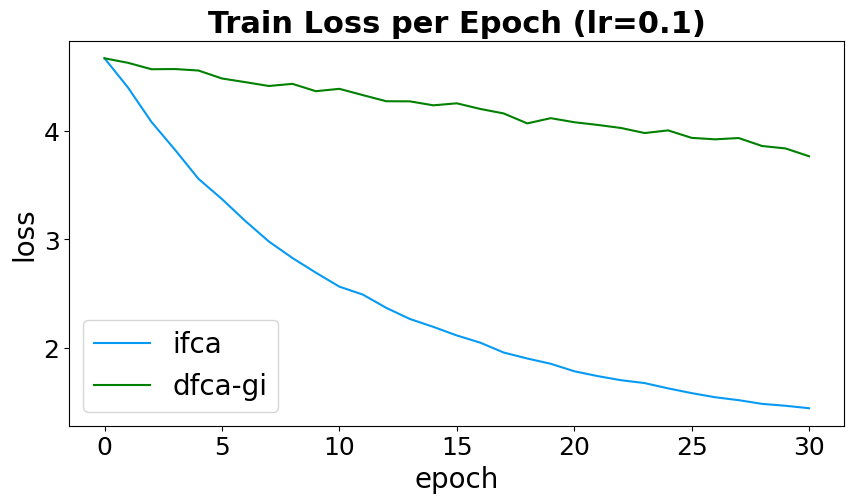

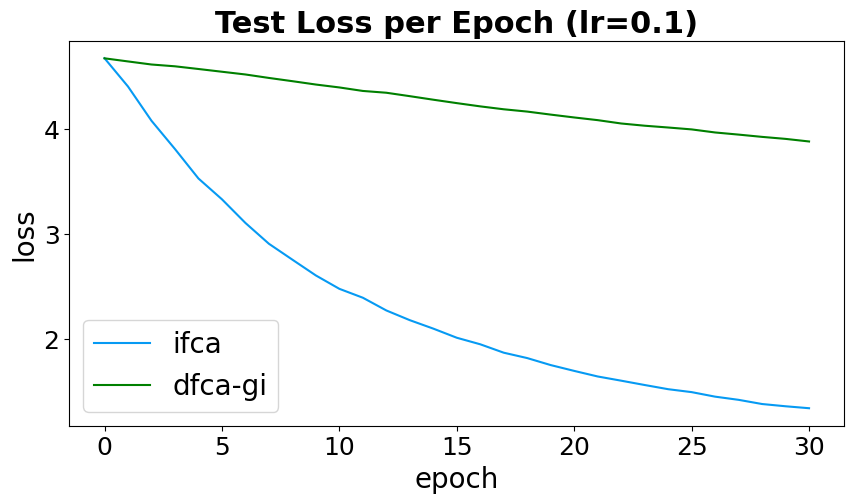

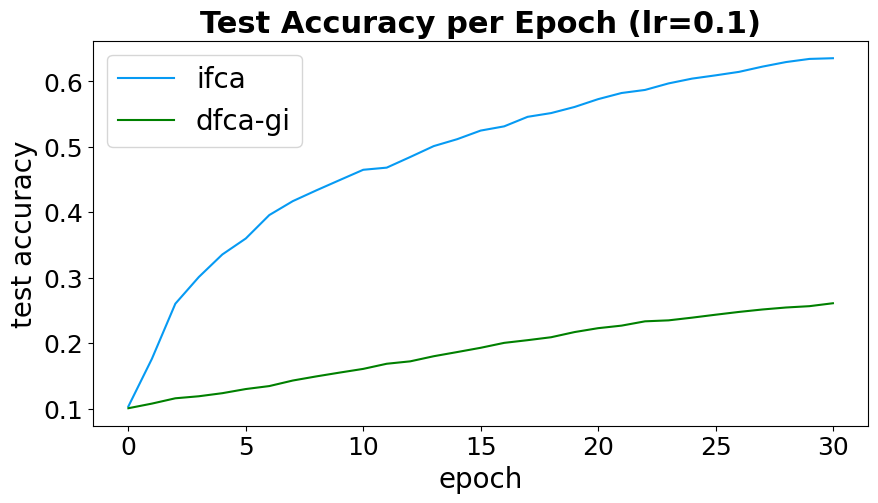

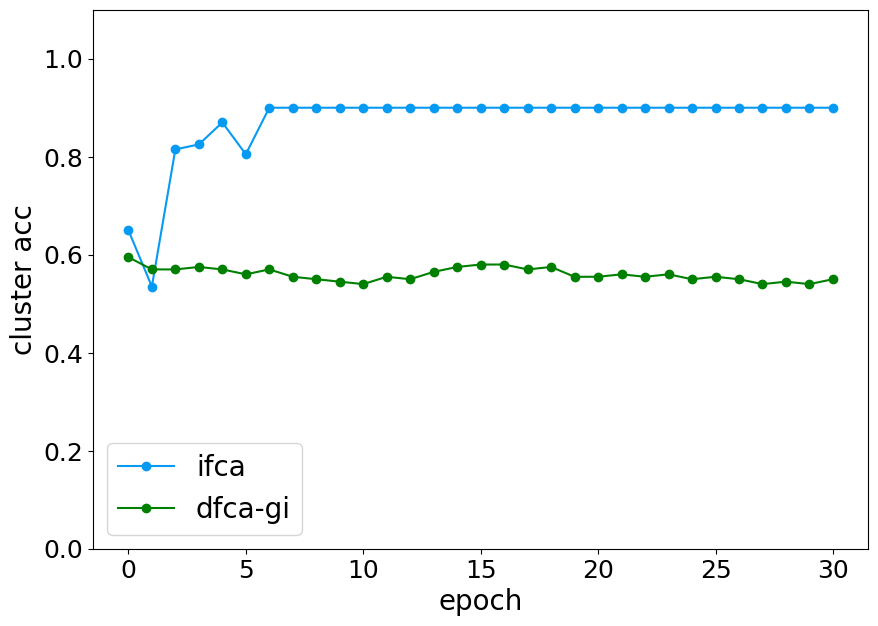

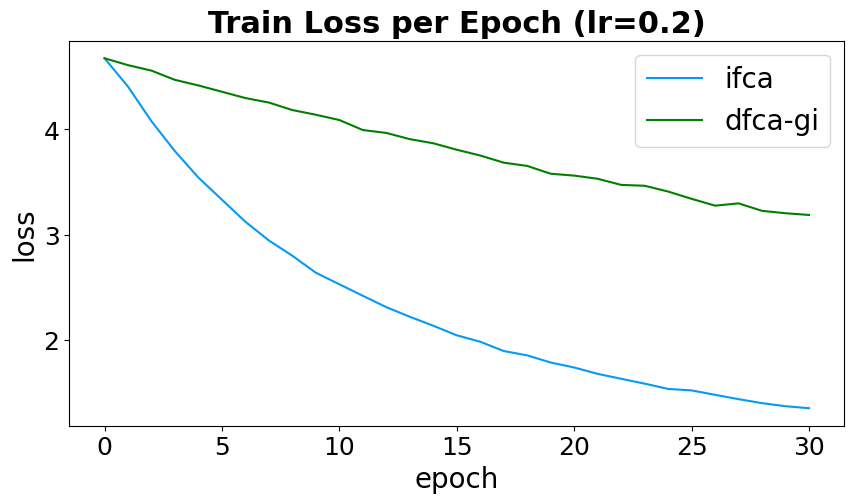

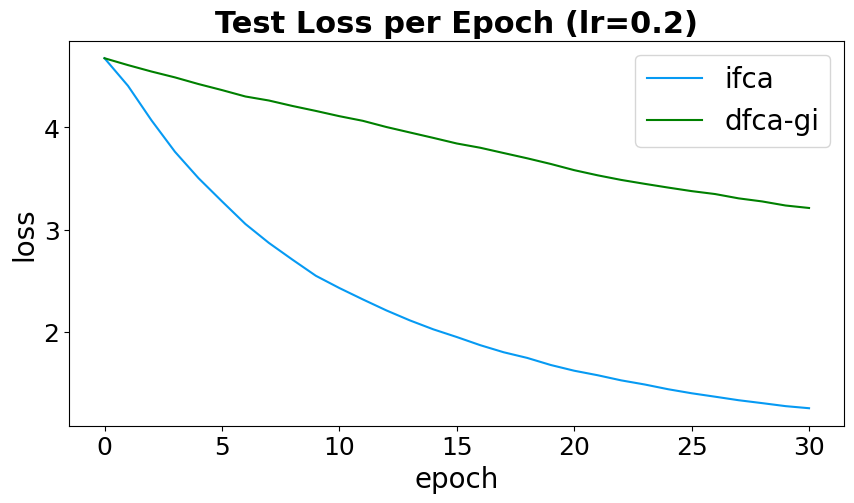

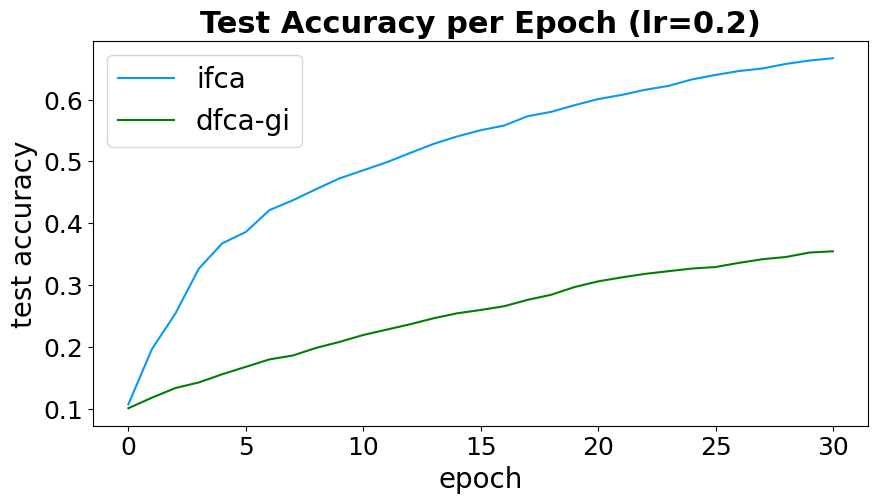

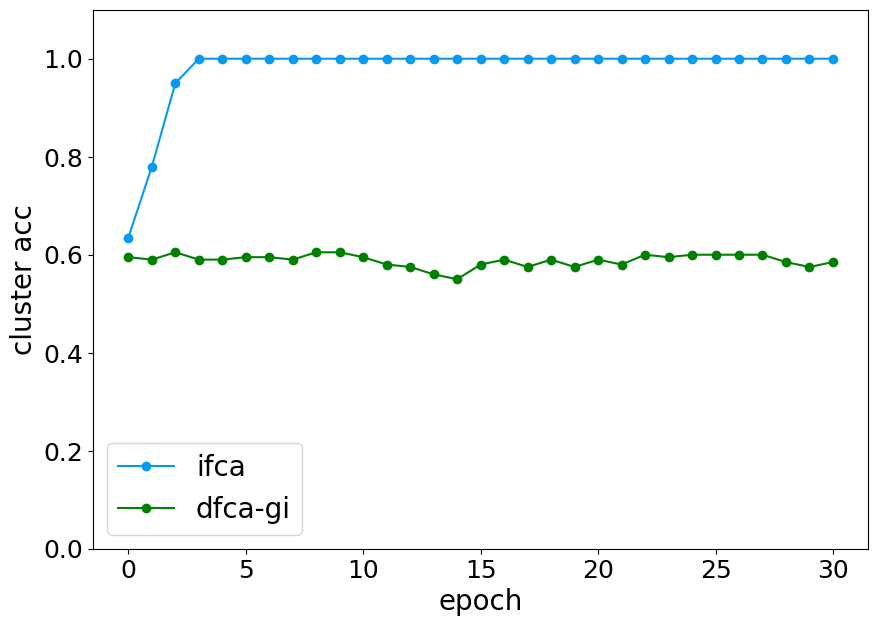

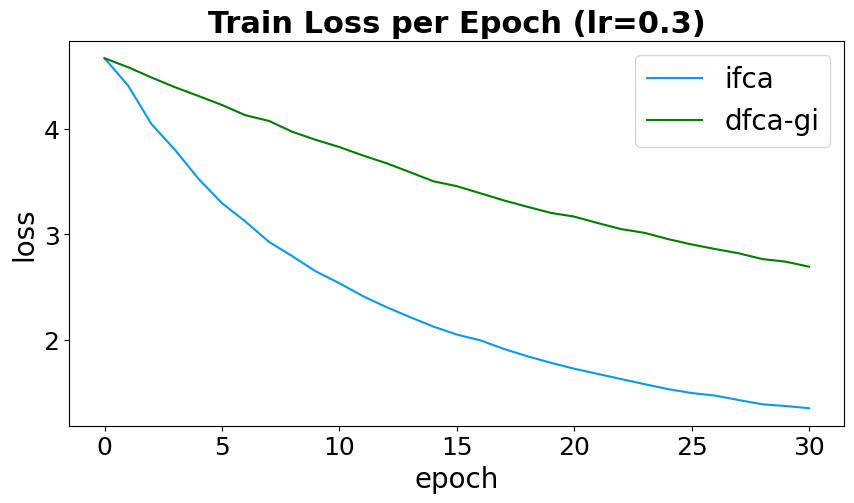

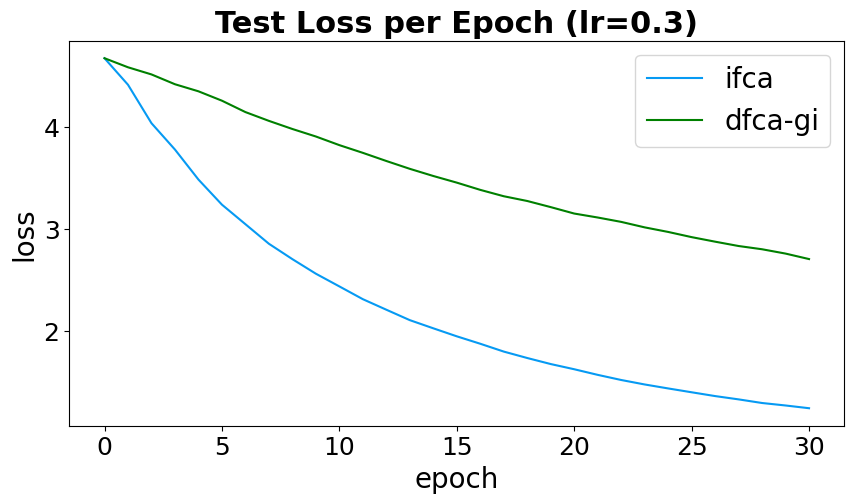

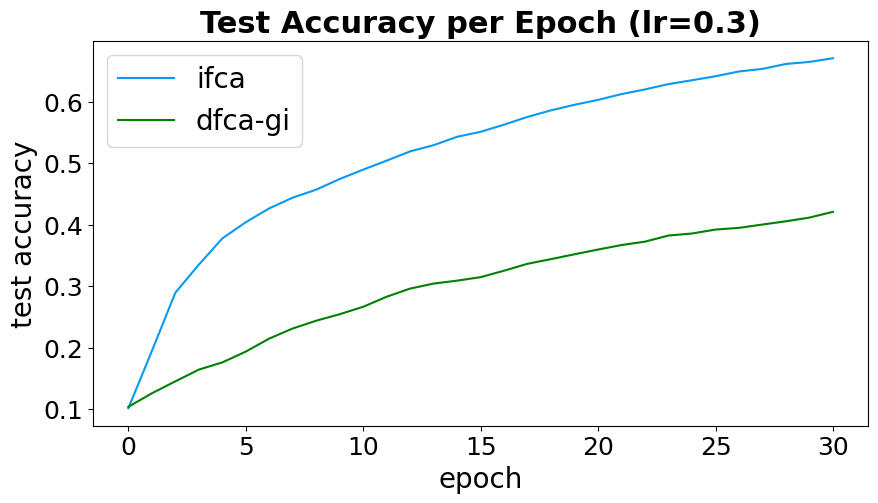

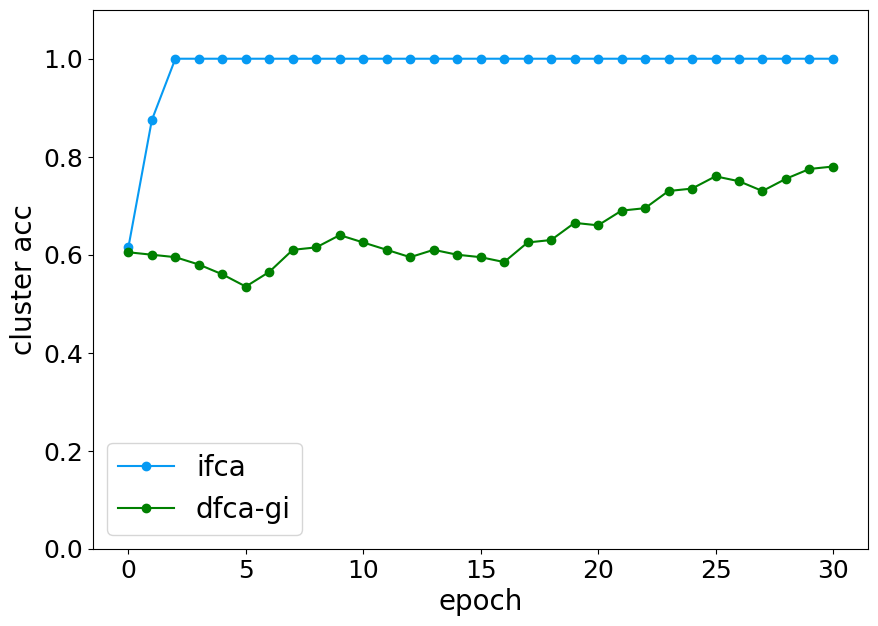

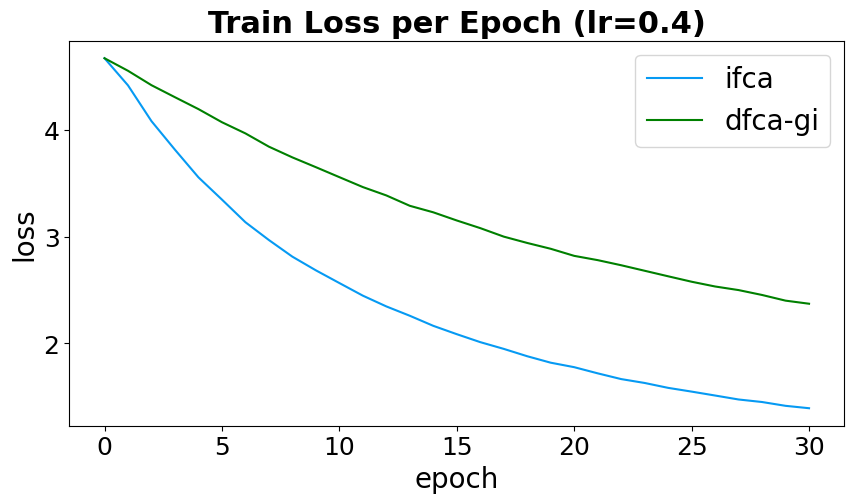

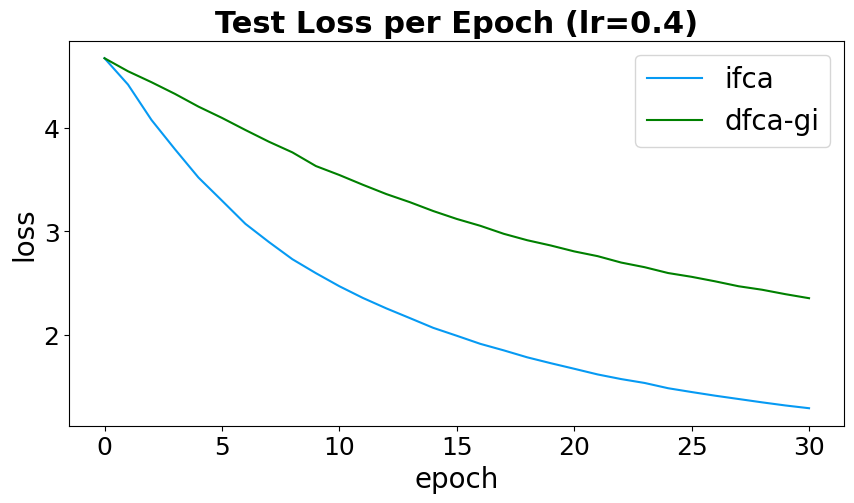

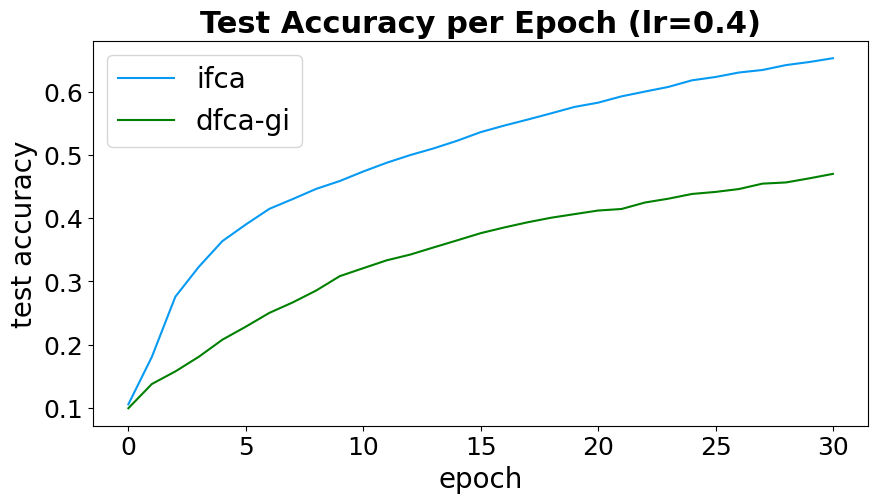

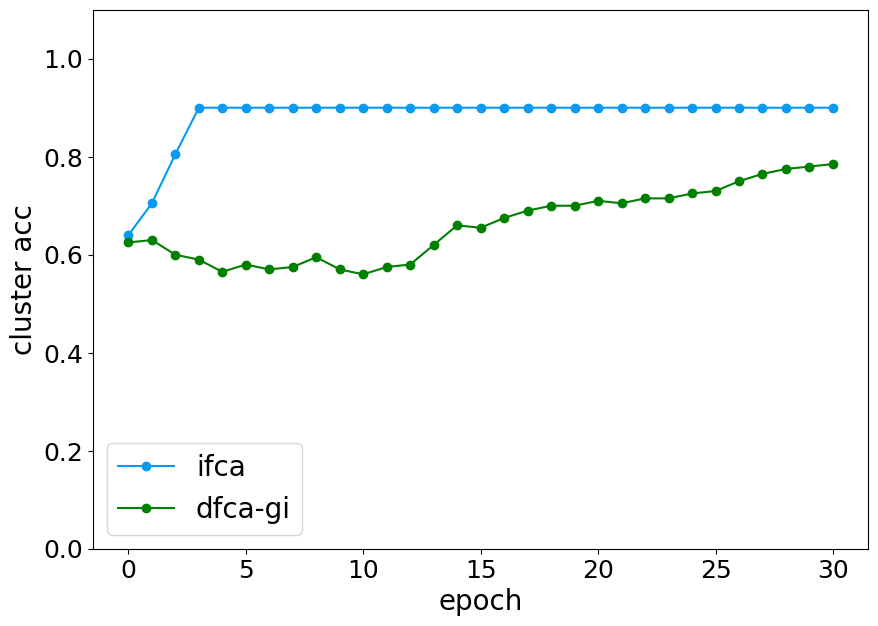

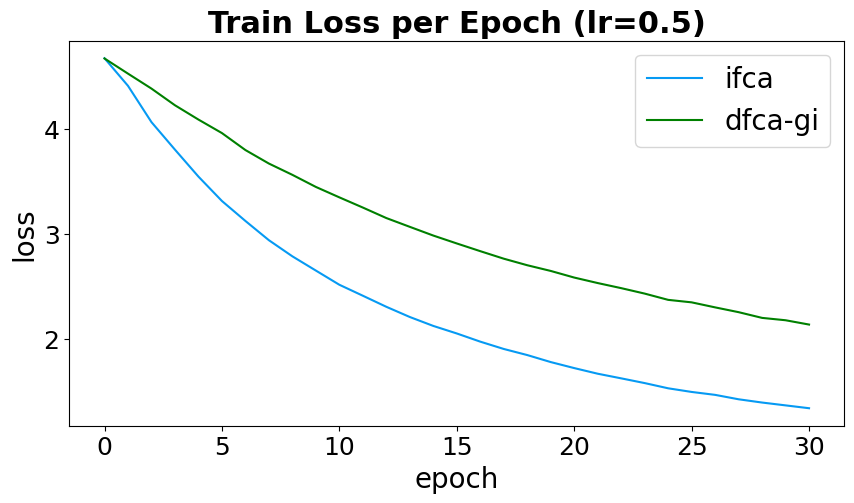

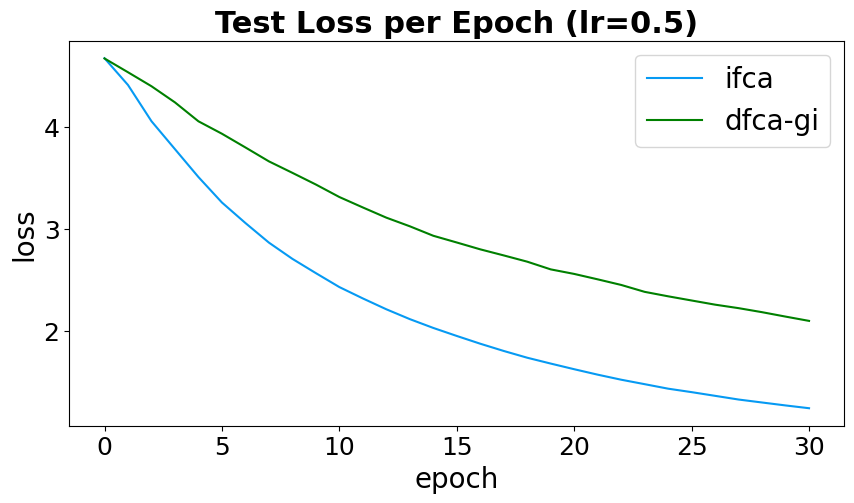

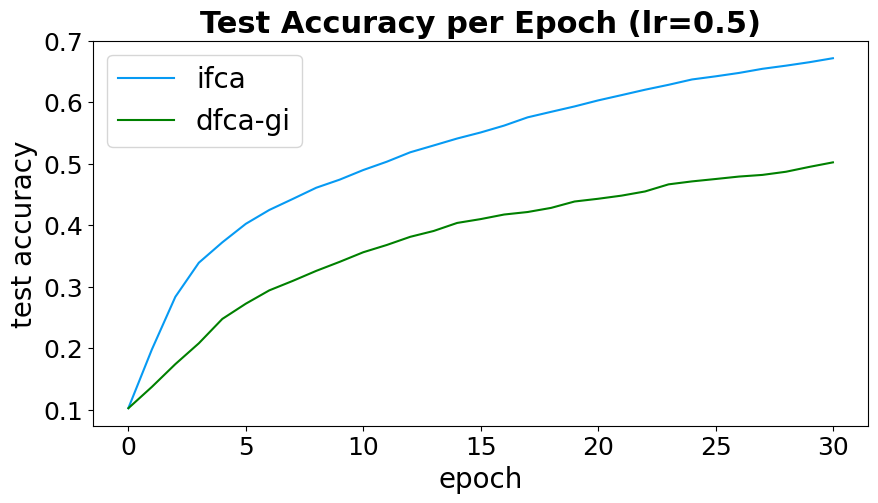

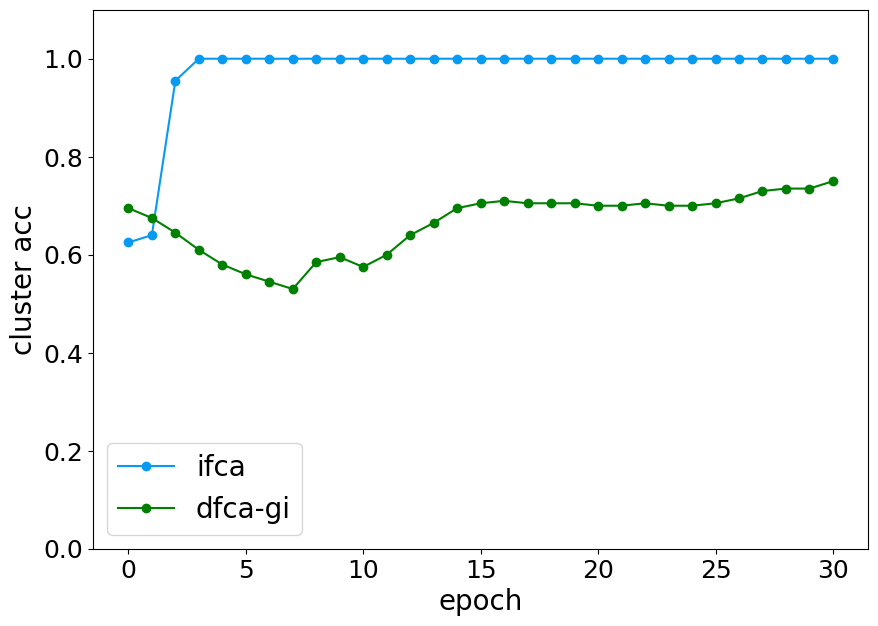

In [5]:

r_ifca = {}
r_dfca_gi = {}

# print("IFCA Test Acc: ", ifca)
# print("DFCA-GI Test Acc: ", dfca_gi)

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(p_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(p_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

print("DFCA-GI Test Acc: ", r_dfca_gi['test_acc'])
print("IFCA Test Acc: ", r_ifca['test_acc'])

os.makedirs('graphs', exist_ok=True)

for l in range(len(p_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Train Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    # plt.title(f'Cluster Accuracy per Epoch (Participation Rate={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', f'cluster_acc_pn_{p_rates[l]}.png'))

